# Autoencoder
* https://medium.com/ai-academy-taiwan/what-are-autoencoders-175b474d74d1
* https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/
* https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/9-Autoencoder_example.py

In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping
from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

Using TensorFlow backend.
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

In [3]:
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Load data

In [4]:
df = pd.read_csv('./input/followingMatrix_over1.csv')
df

movie  20thcenturyfox  a24  accessonline  adamsandler  \
0        21bridgesmovie               0    0             0            0   
1          47metersdown               0    0             0            0   
2    abeautifuldaymovie               0    0             0            0   
3       abominablemovie               0    0             0            0   
4          adastramovie               1    0             0            0   
..                  ...             ...  ...           ...          ...   
160    wrinklestheclown               0    0             0            0   
161          xmenmovies               1    0             0            0   
162          yardiefilm               0    0             0            0   
163      yesterdaymovie               0    0             0            0   
164          zombieland               0    0             0            0   

     adamshankman  agt  aldis_hodge  alecbaldwininsta  alexandrashipppp  ...  \
0               0    0            0                 0                 0  ...   
1               0    0            0                 0                 0  ...   
2               0    0            0                 0                 0  ...   
3               0    0            0                 0                 0  ...   
4               0    0            0                 0                 0  ...   
..            ...  ...          ...               ...               ...  ...   
160             0    0            0                 0                 0  ...   
161             0    0            0                 0                 1  ...   
162             0    0            0                 0                 0  ...   
163             0    0            0                 0                 0  ...   
164             0    0            0                 0                 0  ...   

     willpowerpacker  willsmith  wmag  woodyharrelson  wwe  \
0                  0          0     0               0    0   
1                  0          0     0               0    0   
2                  0          0     0               0    0   
3                  0          0     0               0    0   
4                  0          0     0               0    0   
..               ...        ...   ...             ...  ...   
160                0          0     0               0    0   
161                0          0     0               0    0   
162                0          0     0               0    0   
163                0          0     0               0    0   
164                0          0     0               1    0   

     yahooentertainment  zacefron  zaziebeetz  zendaya  zoeydeutch  
0                     0         0           0        0           0  
1                     0         0           0        0           0  
2                     0         0           0        0           0  
3                     0         0           0        0           0  
4                     0         0           0        0           0  
..                  ...       ...         ...      ...         ...  
160                   0         0           0        0           0  
161                   1         0           0        0           0  
162                   0         0           0        0           0  
163                   0         0           0        0           0  
164                   0         0           0        0           1  

[165 rows x 473 columns]

In [5]:
x_li = []
y_li = []
for i, row in df.iterrows():
    y_li.append(row['movie'])
    x_li.append(row.iloc[1:].tolist())
    
x = np.asarray(x_li)
y = np.asarray(y_li)
print(x.shape, y.shape)

(165, 472) (165,)


In [6]:
from sklearn.preprocessing import MinMaxScaler
print(x)
scaler = MinMaxScaler()
scaler.fit(x)
train_scaled = scaler.transform(x)
print(train_scaled.shape)
print(train_scaled)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
(165, 472)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(132, 472) (33, 472)
(132,) (33,)


In [8]:
input_vec = x.shape[1]

In [9]:
def training(middle_dim, encoding_dim):
    # save setting
    SAVE_NAME = str(middle_dim) + '-' + str(encoding_dim) + 'dim'
    print(SAVE_NAME)
    HISTORY_SAVE = './history/grid/' + SAVE_NAME + '.csv'
    WEIGHTS_SAVE = './weight/grid/' + SAVE_NAME + '.h5'
    
    # model setting
    input_dim = Input(shape = (input_vec, ))

    # Encoder Layers
    encoded1 = Dense(middle_dim, activation = 'relu')(input_dim)
    encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

    # Decoder Layers
    decoded1 = Dense(middle_dim, activation = 'relu')(encoded2)
    decoded2 = Dense(input_vec, activation = 'sigmoid')(decoded1)

    # Combine Encoder and Deocder layers
    autoencoder = Model(inputs = input_dim, outputs = decoded2)
    autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
    
    autoencoder.summary()

    # start training
    callbacks = [EarlyStopping(monitor='val_loss')]
    history = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 50, 
                              validation_data = (X_test, X_test),shuffle = True, callbacks=callbacks)
    
    # save weight
    autoencoder.save(WEIGHTS_SAVE)
    
    # save history
    # acc = history.history['acc']
    # val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    his_df = pd.DataFrame(data = {
        'Epoch' : epochs,
        'Loss' : loss,
    #     'Acc' : acc,
        'Val_loss' : val_loss#,
    #     'Val_acc' : val_acc
    })
    his_df = his_df[['Epoch', 'Loss','Val_loss']]
    his_df.to_csv(HISTORY_SAVE, index = False)
    
    
    # encoding feature
    encoder = Model(inputs = input_dim, outputs = encoded2)

    encoded_train = pd.DataFrame(encoder.predict(train_scaled))
    userContent=np.array(encoded_train)

    encoded_train = encoded_train.add_prefix('feature_')
    print(encoded_train.shape)

    # save dataframe
    encoded_train['movie'] = df['movie']
    encoded_train = encoded_train.set_index('movie')
    encoded_train.to_csv('./output/grid/' + SAVE_NAME + '.csv')
    
    # silhouette part
    silhouette_avgs = []
    ks = range(2, 30)

    for k in ks:
        kmeans_fit = cluster.KMeans(n_clusters = k).fit(encoded_train)
        cluster_labels = kmeans_fit.labels_
        silhouette_avg = metrics.silhouette_score(train_scaled, cluster_labels)
        silhouette_avgs.append(silhouette_avg)

    # 作圖並印出 k = 2 到 30 的績效
    plt.bar(ks, silhouette_avgs)
    plt.show()
    write_json(silhouette_avgs, './score/grid/' + SAVE_NAME + '.json')
    
    # cosine_similarity part
    cos = cosine_similarity(encoded_train)
#     print(cos.shape)
    
    cos_df = pd.DataFrame(cos, index = df['movie'], columns = df['movie'])
    cos_df.to_csv('./cosine_similarity/grid/' + SAVE_NAME + '_cos.csv')
    print('==================================================')

In [10]:
search_list = [i for i in range(400, 0, -10)]
# search_list

400-390dim
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 0.6865 - val_loss: 0.6625
Epoch 2/100
132/132 [==============================] - 0s 61us/step - loss: 0.6433 - val_loss: 0.5763
Epoch 3/100
132/132 [==============================] - 0s 56us/step - loss: 0.5367 - val_loss: 0.3943
Epoch 4/100
132/132 [==============================] - 0s 61us/step - loss: 0.3555 - val_loss: 0.1833
Epoch 5/100
132/132 [==============================] - 0s 57us/step - loss: 0.2224 - val_loss: 0.0963
Epoch 6/100
132/132 [==============================] - 0s 57us/step - loss: 0.1760 - val_loss: 0.0950
Epoch 7/100
132/132 [==============================] - 0s 57us/step - loss: 0.1586 - val_loss: 0.1015
(165, 390)


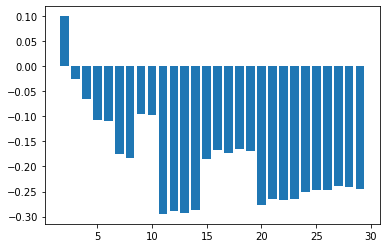

400-380dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6877 - val_loss: 0.6660
Epoch 2/100
132/132 [==============================] - 0s 61us/step - loss: 0.6482 - val_loss: 0.5871
Epoch 3/100
132/132 [==============================] - 0s 57us/step - loss: 0.5424 - val_loss: 0.4144
Epoch 4/100
132/132 [==============================] - 0s 61us/step - loss: 0.3700 - val_loss: 0.1984
Epoch 5/100
132/132 [==============================] - 0s 56us/step - loss: 0.2265 - val_loss: 0.0997
Epoch 6/100
132/132 [==============================] - 0s 58us/step - loss: 0.1870 - val_loss: 0.0963
Epoch 7/100
132/132 [==============================] - 0s 58us/step - loss: 0.1721 - val_loss: 0.1040
(165, 380)


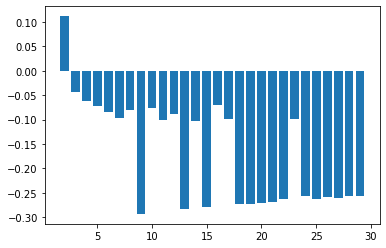

400-370dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6859 - val_loss: 0.6608
Epoch 2/100
132/132 [==============================] - 0s 61us/step - loss: 0.6380 - val_loss: 0.5685
Epoch 3/100
132/132 [==============================] - 0s 57us/step - loss: 0.5195 - val_loss: 0.3746
Epoch 4/100
132/132 [==============================] - 0s 57us/step - loss: 0.3400 - val_loss: 0.1649
Epoch 5/100
132/132 [==============================] - 0s 58us/step - loss: 0.2049 - val_loss: 0.0935
Epoch 6/100
132/132 [==============================] - 0s 57us/step - loss: 0.1890 - val_loss: 0.0985
(165, 370)


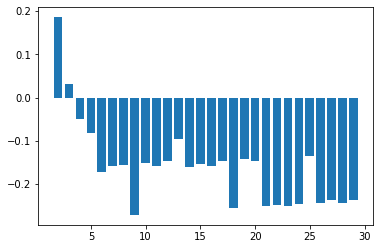

400-360dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6861 - val_loss: 0.6614
Epoch 2/100
132/132 [==============================] - 0s 61us/step - loss: 0.6400 - val_loss: 0.5718
Epoch 3/100
132/132 [==============================] - 0s 60us/step - loss: 0.5290 - val_loss: 0.3842
Epoch 4/100
132/132 [==============================] - 0s 57us/step - loss: 0.3484 - val_loss: 0.1732
Epoch 5/100
132/132 [==============================] - 0s 58us/step - loss: 0.2200 - val_loss: 0.0935
Epoch 6/100
132/132 [==============================] - 0s 57us/step - loss: 0.1884 - val_loss: 0.0957
(165, 360)


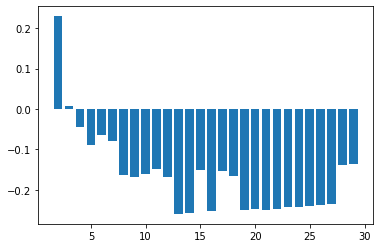

400-350dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6623
Epoch 2/100
132/132 [==============================] - 0s 65us/step - loss: 0.6423 - val_loss: 0.5747
Epoch 3/100
132/132 [==============================] - 0s 59us/step - loss: 0.5346 - val_loss: 0.3902
Epoch 4/100
132/132 [==============================] - 0s 61us/step - loss: 0.3519 - val_loss: 0.1811
Epoch 5/100
132/132 [==============================] - 0s 59us/step - loss: 0.2179 - val_loss: 0.0945
Epoch 6/100
132/132 [==============================] - 0s 60us/step - loss: 0.1764 - val_loss: 0.0948
(165, 350)


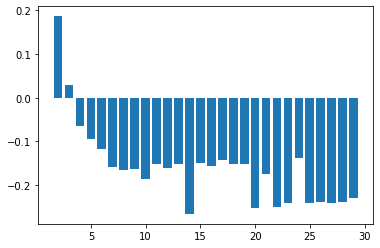

400-340dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6851 - val_loss: 0.6590
Epoch 2/100
132/132 [==============================] - 0s 60us/step - loss: 0.6389 - val_loss: 0.5659
Epoch 3/100
132/132 [==============================] - 0s 62us/step - loss: 0.5249 - val_loss: 0.3768
Epoch 4/100
132/132 [==============================] - 0s 57us/step - loss: 0.3472 - val_loss: 0.1699
Epoch 5/100
132/132 [==============================] - 0s 56us/step - loss: 0.2041 - val_loss: 0.0910
Epoch 6/100
132/132 [==============================] - 0s 57us/step - loss: 0.1719 - val_loss: 0.0935
(165, 340)


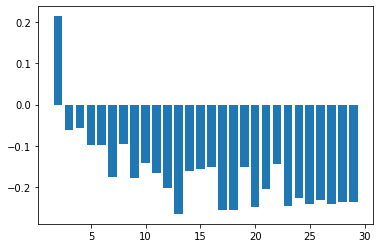

400-330dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6601
Epoch 2/100
132/132 [==============================] - 0s 59us/step - loss: 0.6408 - val_loss: 0.5732
Epoch 3/100
132/132 [==============================] - 0s 60us/step - loss: 0.5300 - val_loss: 0.3941
Epoch 4/100
132/132 [==============================] - 0s 56us/step - loss: 0.3465 - val_loss: 0.1845
Epoch 5/100
132/132 [==============================] - 0s 56us/step - loss: 0.2043 - val_loss: 0.0952
Epoch 6/100
132/132 [==============================] - 0s 57us/step - loss: 0.1692 - val_loss: 0.0952
Epoch 7/100
132/132 [==============================] - 0s 58us/step - loss: 0.1550 - val_loss: 0.1037
(165, 330)


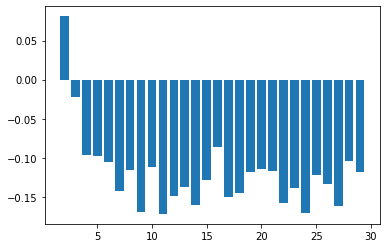

400-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6869 - val_loss: 0.6634
Epoch 2/100
132/132 [==============================] - 0s 62us/step - loss: 0.6460 - val_loss: 0.5822
Epoch 3/100
132/132 [==============================] - 0s 59us/step - loss: 0.5397 - val_loss: 0.4093
Epoch 4/100
132/132 [==============================] - 0s 58us/step - loss: 0.3672 - val_loss: 0.1969
Epoch 5/100
132/132 [==============================] - 0s 58us/step - loss: 0.2269 - val_loss: 0.0978
Epoch 6/100
132/132 [==============================] - 0s 57us/step - loss: 0.1927 - val_loss: 0.0944
Epoch 7/100
132/132 [==============================] - 0s 58us/step - loss: 0.1767 - val_loss: 0.1009
(165, 320)


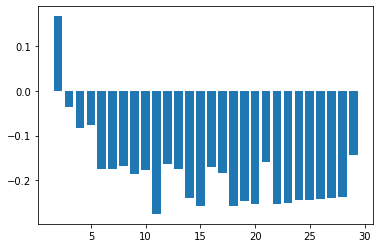

400-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 4ms/step - loss: 0.6868 - val_loss: 0.6661
Epoch 2/100
132/132 [==============================] - 0s 62us/step - loss: 0.6480 - val_loss: 0.5914
Epoch 3/100
132/132 [==============================] - 0s 64us/step - loss: 0.5490 - val_loss: 0.4295
Epoch 4/100
132/132 [==============================] - 0s 65us/step - loss: 0.3899 - val_loss: 0.2181
Epoch 5/100
132/132 [==============================] - 0s 60us/step - loss: 0.2384 - val_loss: 0.1039
Epoch 6/100
132/132 [==============================] - 0s 58us/step - loss: 0.1886 - val_loss: 0.0917
Epoch 7/100
132/132 [==============================] - 0s 58us/step - loss: 0.1727 - val_loss: 0.0985
(165, 310)


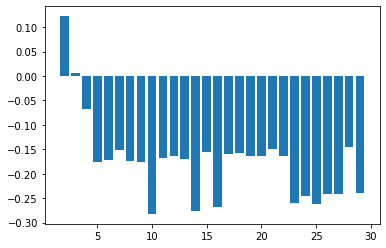

400-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 4ms/step - loss: 0.6877 - val_loss: 0.6669
Epoch 2/100
132/132 [==============================] - 0s 60us/step - loss: 0.6492 - val_loss: 0.5935
Epoch 3/100
132/132 [==============================] - 0s 64us/step - loss: 0.5536 - val_loss: 0.4317
Epoch 4/100
132/132 [==============================] - 0s 63us/step - loss: 0.3845 - val_loss: 0.2180
Epoch 5/100
132/132 [==============================] - 0s 61us/step - loss: 0.2292 - val_loss: 0.1037
Epoch 6/100
132/132 [==============================] - 0s 58us/step - loss: 0.1828 - val_loss: 0.0934
Epoch 7/100
132/132 [==============================] - 0s 58us/step - loss: 0.1680 - val_loss: 0.1018
(165, 300)


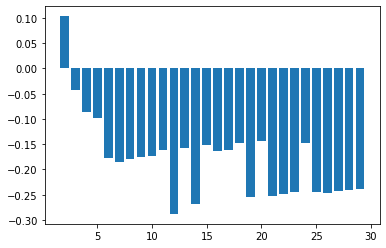

400-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 4ms/step - loss: 0.6870 - val_loss: 0.6660
Epoch 2/100
132/132 [==============================] - 0s 64us/step - loss: 0.6494 - val_loss: 0.5939
Epoch 3/100
132/132 [==============================] - 0s 60us/step - loss: 0.5533 - val_loss: 0.4366
Epoch 4/100
132/132 [==============================] - 0s 59us/step - loss: 0.3933 - val_loss: 0.2276
Epoch 5/100
132/132 [==============================] - 0s 61us/step - loss: 0.2426 - val_loss: 0.1081
Epoch 6/100
132/132 [==============================] - 0s 61us/step - loss: 0.1833 - val_loss: 0.0918
Epoch 7/100
132/132 [==============================] - 0s 57us/step - loss: 0.1635 - val_loss: 0.0989
(165, 290)


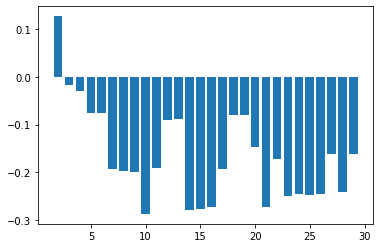

400-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 0.6862 - val_loss: 0.6647
Epoch 2/100
132/132 [==============================] - 0s 62us/step - loss: 0.6468 - val_loss: 0.5909
Epoch 3/100
132/132 [==============================] - 0s 62us/step - loss: 0.5519 - val_loss: 0.4348
Epoch 4/100
132/132 [==============================] - 0s 66us/step - loss: 0.3946 - val_loss: 0.2287
Epoch 5/100
132/132 [==============================] - 0s 58us/step - loss: 0.2453 - val_loss: 0.1081
Epoch 6/100
132/132 [==============================] - 0s 61us/step - loss: 0.1875 - val_loss: 0.0918
Epoch 7/100
132/132 [==============================] - 0s 59us/step - loss: 0.1683 - val_loss: 0.0979
(165, 280)


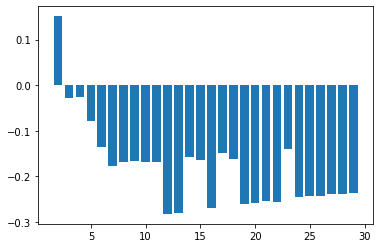

400-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 0.6861 - val_loss: 0.6628
Epoch 2/100
132/132 [==============================] - 0s 63us/step - loss: 0.6433 - val_loss: 0.5807
Epoch 3/100
132/132 [==============================] - 0s 64us/step - loss: 0.5387 - val_loss: 0.4089
Epoch 4/100
132/132 [==============================] - 0s 59us/step - loss: 0.3742 - val_loss: 0.2023
Epoch 5/100
132/132 [==============================] - 0s 59us/step - loss: 0.2284 - val_loss: 0.1014
Epoch 6/100
132/132 [==============================] - 0s 60us/step - loss: 0.1834 - val_loss: 0.0930
Epoch 7/100
132/132 [==============================] - 0s 60us/step - loss: 0.1646 - val_loss: 0.0996
(165, 270)


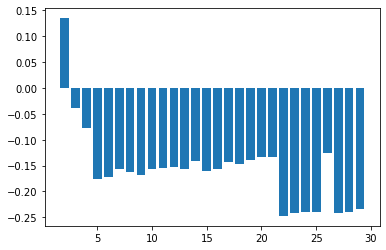

400-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 0.6869 - val_loss: 0.6652
Epoch 2/100
132/132 [==============================] - 0s 66us/step - loss: 0.6493 - val_loss: 0.5934
Epoch 3/100
132/132 [==============================] - 0s 61us/step - loss: 0.5594 - val_loss: 0.4386
Epoch 4/100
132/132 [==============================] - 0s 61us/step - loss: 0.3952 - val_loss: 0.2296
Epoch 5/100
132/132 [==============================] - 0s 69us/step - loss: 0.2446 - val_loss: 0.1058
Epoch 6/100
132/132 [==============================] - 0s 63us/step - loss: 0.1827 - val_loss: 0.0893
Epoch 7/100
132/132 [==============================] - 0s 63us/step - loss: 0.1657 - val_loss: 0.0963
(165, 260)


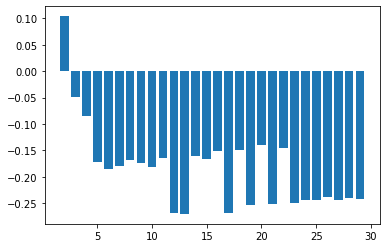

400-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 6ms/step - loss: 0.6881 - val_loss: 0.6685
Epoch 2/100
132/132 [==============================] - 0s 66us/step - loss: 0.6524 - val_loss: 0.6023
Epoch 3/100
132/132 [==============================] - 0s 64us/step - loss: 0.5627 - val_loss: 0.4555
Epoch 4/100
132/132 [==============================] - 0s 65us/step - loss: 0.4086 - val_loss: 0.2509
Epoch 5/100
132/132 [==============================] - 0s 63us/step - loss: 0.2520 - val_loss: 0.1137
Epoch 6/100
132/132 [==============================] - 0s 60us/step - loss: 0.1948 - val_loss: 0.0892
Epoch 7/100
132/132 [==============================] - 0s 61us/step - loss: 0.1808 - val_loss: 0.0966
(165, 250)


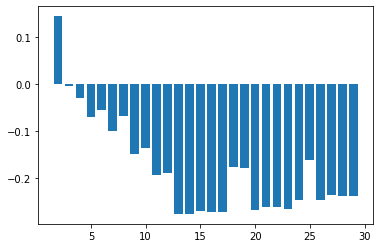

400-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 6ms/step - loss: 0.6886 - val_loss: 0.6712
Epoch 2/100
132/132 [==============================] - 0s 67us/step - loss: 0.6573 - val_loss: 0.6110
Epoch 3/100
132/132 [==============================] - 0s 59us/step - loss: 0.5758 - val_loss: 0.4743
Epoch 4/100
132/132 [==============================] - 0s 62us/step - loss: 0.4209 - val_loss: 0.2697
Epoch 5/100
132/132 [==============================] - 0s 63us/step - loss: 0.2654 - val_loss: 0.1199
Epoch 6/100
132/132 [==============================] - 0s 62us/step - loss: 0.1885 - val_loss: 0.0879
Epoch 7/100
132/132 [==============================] - 0s 62us/step - loss: 0.1789 - val_loss: 0.0957
(165, 240)


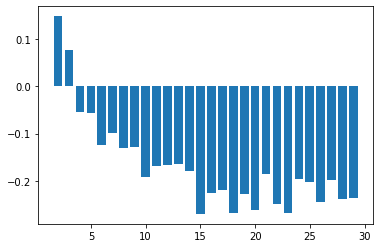

400-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 6ms/step - loss: 0.6888 - val_loss: 0.6725
Epoch 2/100
132/132 [==============================] - 0s 63us/step - loss: 0.6607 - val_loss: 0.6175
Epoch 3/100
132/132 [==============================] - 0s 65us/step - loss: 0.5879 - val_loss: 0.4912
Epoch 4/100
132/132 [==============================] - 0s 64us/step - loss: 0.4504 - val_loss: 0.2958
Epoch 5/100
132/132 [==============================] - 0s 66us/step - loss: 0.2937 - val_loss: 0.1373
Epoch 6/100
132/132 [==============================] - 0s 64us/step - loss: 0.1907 - val_loss: 0.0919
Epoch 7/100
132/132 [==============================] - 0s 61us/step - loss: 0.1685 - val_loss: 0.0925
(165, 230)


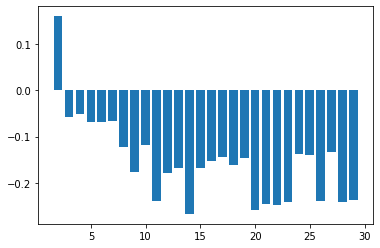

400-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 7ms/step - loss: 0.6881 - val_loss: 0.6677
Epoch 2/100
132/132 [==============================] - 0s 65us/step - loss: 0.6534 - val_loss: 0.6026
Epoch 3/100
132/132 [==============================] - 0s 65us/step - loss: 0.5680 - val_loss: 0.4644
Epoch 4/100
132/132 [==============================] - 0s 65us/step - loss: 0.4236 - val_loss: 0.2659
Epoch 5/100
132/132 [==============================] - 0s 61us/step - loss: 0.2724 - val_loss: 0.1233
Epoch 6/100
132/132 [==============================] - 0s 61us/step - loss: 0.1884 - val_loss: 0.0895
Epoch 7/100
132/132 [==============================] - 0s 62us/step - loss: 0.1689 - val_loss: 0.0911
(165, 220)


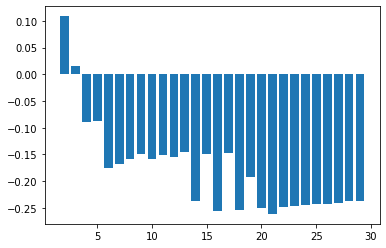

400-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 7ms/step - loss: 0.6865 - val_loss: 0.6682
Epoch 2/100
132/132 [==============================] - 0s 69us/step - loss: 0.6507 - val_loss: 0.6071
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.5706 - val_loss: 0.4758
Epoch 4/100
132/132 [==============================] - 0s 63us/step - loss: 0.4255 - val_loss: 0.2814
Epoch 5/100
132/132 [==============================] - 0s 62us/step - loss: 0.2693 - val_loss: 0.1290
Epoch 6/100
132/132 [==============================] - 0s 60us/step - loss: 0.1914 - val_loss: 0.0882
Epoch 7/100
132/132 [==============================] - 0s 62us/step - loss: 0.1734 - val_loss: 0.0919
(165, 210)


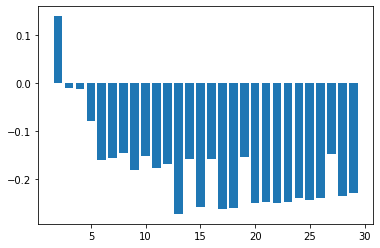

400-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 7ms/step - loss: 0.6890 - val_loss: 0.6726
Epoch 2/100
132/132 [==============================] - 0s 68us/step - loss: 0.6587 - val_loss: 0.6183
Epoch 3/100
132/132 [==============================] - 0s 70us/step - loss: 0.5845 - val_loss: 0.4965
Epoch 4/100
132/132 [==============================] - 0s 62us/step - loss: 0.4519 - val_loss: 0.3088
Epoch 5/100
132/132 [==============================] - 0s 60us/step - loss: 0.2828 - val_loss: 0.1471
Epoch 6/100
132/132 [==============================] - 0s 59us/step - loss: 0.1839 - val_loss: 0.0905
Epoch 7/100
132/132 [==============================] - 0s 62us/step - loss: 0.1672 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 62us/step - loss: 0.1539 - val_loss: 0.0938
(165, 200)


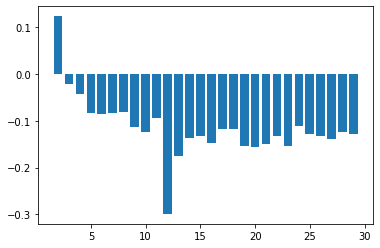

400-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 8ms/step - loss: 0.6860 - val_loss: 0.6644
Epoch 2/100
132/132 [==============================] - 0s 69us/step - loss: 0.6479 - val_loss: 0.5933
Epoch 3/100
132/132 [==============================] - 0s 67us/step - loss: 0.5564 - val_loss: 0.4468
Epoch 4/100
132/132 [==============================] - 0s 66us/step - loss: 0.3986 - val_loss: 0.2486
Epoch 5/100
132/132 [==============================] - 0s 63us/step - loss: 0.2441 - val_loss: 0.1165
Epoch 6/100
132/132 [==============================] - 0s 61us/step - loss: 0.1824 - val_loss: 0.0901
Epoch 7/100
132/132 [==============================] - 0s 62us/step - loss: 0.1680 - val_loss: 0.0958
(165, 190)


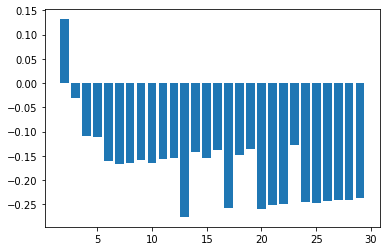

400-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 8ms/step - loss: 0.6883 - val_loss: 0.6709
Epoch 2/100
132/132 [==============================] - 0s 69us/step - loss: 0.6578 - val_loss: 0.6166
Epoch 3/100
132/132 [==============================] - 0s 62us/step - loss: 0.5862 - val_loss: 0.4987
Epoch 4/100
132/132 [==============================] - 0s 65us/step - loss: 0.4574 - val_loss: 0.3163
Epoch 5/100
132/132 [==============================] - 0s 64us/step - loss: 0.2986 - val_loss: 0.1521
Epoch 6/100
132/132 [==============================] - 0s 62us/step - loss: 0.2035 - val_loss: 0.0930
Epoch 7/100
132/132 [==============================] - 0s 60us/step - loss: 0.1772 - val_loss: 0.0934
(165, 180)


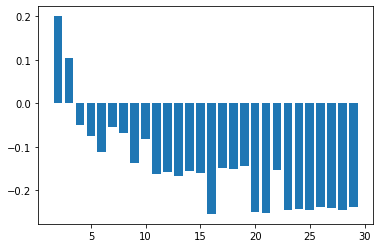

400-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 8ms/step - loss: 0.6887 - val_loss: 0.6749
Epoch 2/100
132/132 [==============================] - 0s 68us/step - loss: 0.6615 - val_loss: 0.6285
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.5969 - val_loss: 0.5230
Epoch 4/100
132/132 [==============================] - 0s 63us/step - loss: 0.4769 - val_loss: 0.3472
Epoch 5/100
132/132 [==============================] - 0s 62us/step - loss: 0.3237 - val_loss: 0.1733
Epoch 6/100
132/132 [==============================] - 0s 63us/step - loss: 0.2133 - val_loss: 0.0979
Epoch 7/100
132/132 [==============================] - 0s 63us/step - loss: 0.1851 - val_loss: 0.0899
Epoch 8/100
132/132 [==============================] - 0s 60us/step - loss: 0.1670 - val_loss: 0.0940
(165, 170)


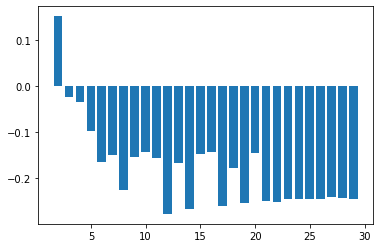

400-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 9ms/step - loss: 0.6885 - val_loss: 0.6732
Epoch 2/100
132/132 [==============================] - 0s 71us/step - loss: 0.6604 - val_loss: 0.6235
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.5947 - val_loss: 0.5133
Epoch 4/100
132/132 [==============================] - 0s 70us/step - loss: 0.4727 - val_loss: 0.3356
Epoch 5/100
132/132 [==============================] - 0s 65us/step - loss: 0.3241 - val_loss: 0.1670
Epoch 6/100
132/132 [==============================] - 0s 63us/step - loss: 0.2124 - val_loss: 0.0970
Epoch 7/100
132/132 [==============================] - 0s 63us/step - loss: 0.1745 - val_loss: 0.0882
Epoch 8/100
132/132 [==============================] - 0s 61us/step - loss: 0.1563 - val_loss: 0.0916
(165, 160)


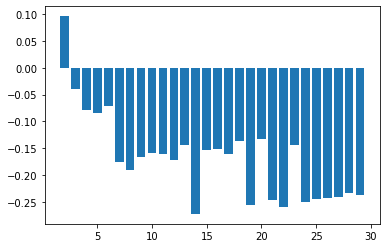

400-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 9ms/step - loss: 0.6897 - val_loss: 0.6760
Epoch 2/100
132/132 [==============================] - 0s 71us/step - loss: 0.6664 - val_loss: 0.6332
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.6078 - val_loss: 0.5379
Epoch 4/100
132/132 [==============================] - 0s 66us/step - loss: 0.4978 - val_loss: 0.3761
Epoch 5/100
132/132 [==============================] - 0s 67us/step - loss: 0.3502 - val_loss: 0.1996
Epoch 6/100
132/132 [==============================] - 0s 62us/step - loss: 0.2290 - val_loss: 0.1041
Epoch 7/100
132/132 [==============================] - 0s 64us/step - loss: 0.1842 - val_loss: 0.0877
Epoch 8/100
132/132 [==============================] - 0s 65us/step - loss: 0.1664 - val_loss: 0.0926
(165, 150)


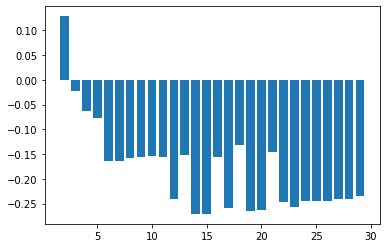

400-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 10ms/step - loss: 0.6884 - val_loss: 0.6736
Epoch 2/100
132/132 [==============================] - 0s 66us/step - loss: 0.6615 - val_loss: 0.6272
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.5976 - val_loss: 0.5264
Epoch 4/100
132/132 [==============================] - 0s 66us/step - loss: 0.4796 - val_loss: 0.3613
Epoch 5/100
132/132 [==============================] - 0s 67us/step - loss: 0.3401 - val_loss: 0.1898
Epoch 6/100
132/132 [==============================] - 0s 64us/step - loss: 0.2151 - val_loss: 0.1045
Epoch 7/100
132/132 [==============================] - 0s 67us/step - loss: 0.1762 - val_loss: 0.0885
Epoch 8/100
132/132 [==============================] - 0s 61us/step - loss: 0.1608 - val_loss: 0.0916
(165, 140)


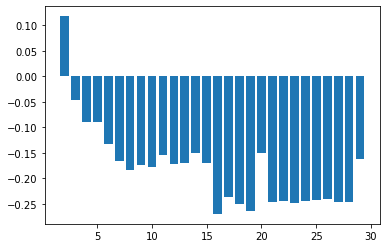

400-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 10ms/step - loss: 0.6875 - val_loss: 0.6716
Epoch 2/100
132/132 [==============================] - 0s 70us/step - loss: 0.6578 - val_loss: 0.6212
Epoch 3/100
132/132 [==============================] - 0s 68us/step - loss: 0.5930 - val_loss: 0.5146
Epoch 4/100
132/132 [==============================] - 0s 62us/step - loss: 0.4677 - val_loss: 0.3464
Epoch 5/100
132/132 [==============================] - 0s 62us/step - loss: 0.3288 - val_loss: 0.1788
Epoch 6/100
132/132 [==============================] - 0s 63us/step - loss: 0.2148 - val_loss: 0.1010
Epoch 7/100
132/132 [==============================] - 0s 67us/step - loss: 0.1766 - val_loss: 0.0888
Epoch 8/100
132/132 [==============================] - 0s 63us/step - loss: 0.1586 - val_loss: 0.0925
(165, 130)


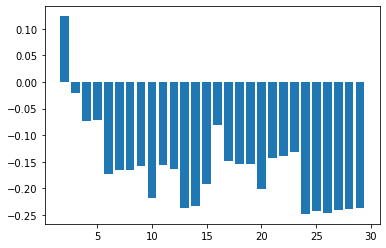

400-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 10ms/step - loss: 0.6902 - val_loss: 0.6782
Epoch 2/100
132/132 [==============================] - 0s 68us/step - loss: 0.6673 - val_loss: 0.6401
Epoch 3/100
132/132 [==============================] - 0s 67us/step - loss: 0.6135 - val_loss: 0.5549
Epoch 4/100
132/132 [==============================] - 0s 67us/step - loss: 0.5110 - val_loss: 0.4072
Epoch 5/100
132/132 [==============================] - 0s 64us/step - loss: 0.3701 - val_loss: 0.2310
Epoch 6/100
132/132 [==============================] - 0s 62us/step - loss: 0.2442 - val_loss: 0.1170
Epoch 7/100
132/132 [==============================] - 0s 67us/step - loss: 0.1915 - val_loss: 0.0877
Epoch 8/100
132/132 [==============================] - 0s 64us/step - loss: 0.1751 - val_loss: 0.0893
(165, 120)


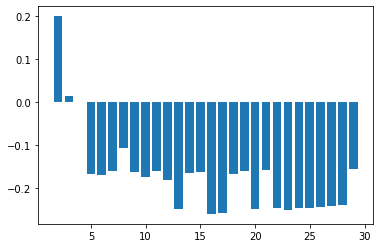

400-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 11ms/step - loss: 0.6886 - val_loss: 0.6739
Epoch 2/100
132/132 [==============================] - 0s 70us/step - loss: 0.6629 - val_loss: 0.6314
Epoch 3/100
132/132 [==============================] - 0s 65us/step - loss: 0.6054 - val_loss: 0.5440
Epoch 4/100
132/132 [==============================] - 0s 63us/step - loss: 0.5005 - val_loss: 0.3994
Epoch 5/100
132/132 [==============================] - 0s 67us/step - loss: 0.3607 - val_loss: 0.2294
Epoch 6/100
132/132 [==============================] - 0s 65us/step - loss: 0.2259 - val_loss: 0.1204
Epoch 7/100
132/132 [==============================] - 0s 64us/step - loss: 0.1729 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 64us/step - loss: 0.1569 - val_loss: 0.0911
(165, 110)


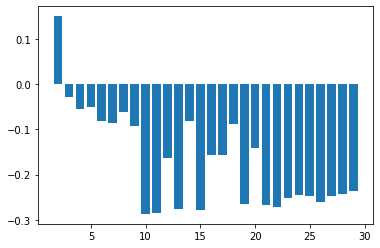

400-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 11ms/step - loss: 0.6890 - val_loss: 0.6755
Epoch 2/100
132/132 [==============================] - 0s 70us/step - loss: 0.6658 - val_loss: 0.6349
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.6128 - val_loss: 0.5486
Epoch 4/100
132/132 [==============================] - 0s 65us/step - loss: 0.5084 - val_loss: 0.4043
Epoch 5/100
132/132 [==============================] - 0s 62us/step - loss: 0.3641 - val_loss: 0.2344
Epoch 6/100
132/132 [==============================] - 0s 64us/step - loss: 0.2471 - val_loss: 0.1206
Epoch 7/100
132/132 [==============================] - 0s 64us/step - loss: 0.1826 - val_loss: 0.0899
Epoch 8/100
132/132 [==============================] - 0s 65us/step - loss: 0.1654 - val_loss: 0.0907
(165, 100)


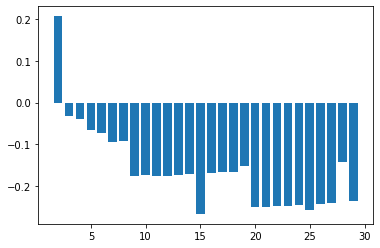

400-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 1s 11ms/step - loss: 0.6898 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 76us/step - loss: 0.6700 - val_loss: 0.6458
Epoch 3/100
132/132 [==============================] - 0s 67us/step - loss: 0.6252 - val_loss: 0.5738
Epoch 4/100
132/132 [==============================] - 0s 66us/step - loss: 0.5373 - val_loss: 0.4456
Epoch 5/100
132/132 [==============================] - 0s 67us/step - loss: 0.4059 - val_loss: 0.2776
Epoch 6/100
132/132 [==============================] - 0s 63us/step - loss: 0.2723 - val_loss: 0.1435
Epoch 7/100
132/132 [==============================] - 0s 64us/step - loss: 0.1925 - val_loss: 0.0932
Epoch 8/100
132/132 [==============================] - 0s 66us/step - loss: 0.1633 - val_loss: 0.0885
Epoch 9/100
132/132 [==============================] - 0s 64us/step - loss: 0.1452 - val_loss: 0.0918
(165, 90)


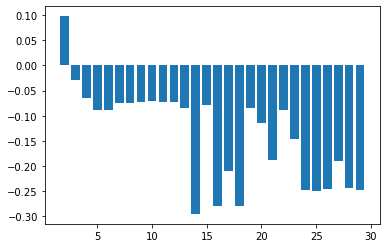

400-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 12ms/step - loss: 0.6901 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 71us/step - loss: 0.6701 - val_loss: 0.6456
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.6249 - val_loss: 0.5741
Epoch 4/100
132/132 [==============================] - 0s 66us/step - loss: 0.5426 - val_loss: 0.4496
Epoch 5/100
132/132 [==============================] - 0s 66us/step - loss: 0.4179 - val_loss: 0.2878
Epoch 6/100
132/132 [==============================] - 0s 66us/step - loss: 0.2845 - val_loss: 0.1530
Epoch 7/100
132/132 [==============================] - 0s 63us/step - loss: 0.1944 - val_loss: 0.0957
Epoch 8/100
132/132 [==============================] - 0s 63us/step - loss: 0.1597 - val_loss: 0.0863
Epoch 9/100
132/132 [==============================] - 0s 64us/step - loss: 0.1404 - val_loss: 0.0898
(165, 80)


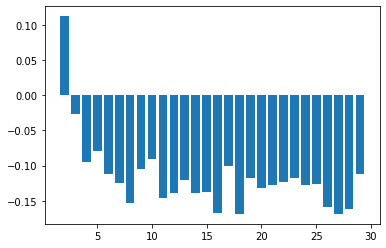

400-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 12ms/step - loss: 0.6881 - val_loss: 0.6737
Epoch 2/100
132/132 [==============================] - 0s 73us/step - loss: 0.6617 - val_loss: 0.6310
Epoch 3/100
132/132 [==============================] - 0s 66us/step - loss: 0.6052 - val_loss: 0.5441
Epoch 4/100
132/132 [==============================] - 0s 68us/step - loss: 0.5043 - val_loss: 0.4051
Epoch 5/100
132/132 [==============================] - 0s 66us/step - loss: 0.3671 - val_loss: 0.2443
Epoch 6/100
132/132 [==============================] - 0s 65us/step - loss: 0.2501 - val_loss: 0.1308
Epoch 7/100
132/132 [==============================] - 0s 66us/step - loss: 0.1998 - val_loss: 0.0913
Epoch 8/100
132/132 [==============================] - 0s 64us/step - loss: 0.1753 - val_loss: 0.0885
Epoch 9/100
132/132 [==============================] - 0s 64us/step - loss: 0.1480 - val_loss: 0.0909
(165, 70)


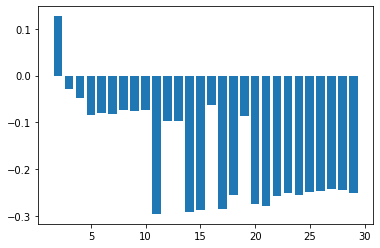

400-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 12ms/step - loss: 0.6901 - val_loss: 0.6796
Epoch 2/100
132/132 [==============================] - 0s 74us/step - loss: 0.6717 - val_loss: 0.6488
Epoch 3/100
132/132 [==============================] - 0s 73us/step - loss: 0.6289 - val_loss: 0.5846
Epoch 4/100
132/132 [==============================] - 0s 70us/step - loss: 0.5507 - val_loss: 0.4721
Epoch 5/100
132/132 [==============================] - 0s 66us/step - loss: 0.4311 - val_loss: 0.3191
Epoch 6/100
132/132 [==============================] - 0s 65us/step - loss: 0.3086 - val_loss: 0.1778
Epoch 7/100
132/132 [==============================] - 0s 69us/step - loss: 0.2112 - val_loss: 0.1058
Epoch 8/100
132/132 [==============================] - 0s 70us/step - loss: 0.1739 - val_loss: 0.0880
Epoch 9/100
132/132 [==============================] - 0s 70us/step - loss: 0.1490 - val_loss: 0.0886
(165, 60)


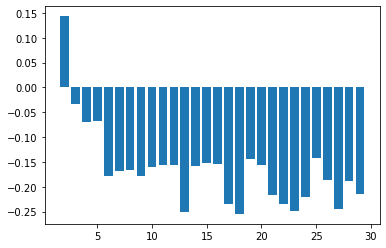

400-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 13ms/step - loss: 0.6889 - val_loss: 0.6773
Epoch 2/100
132/132 [==============================] - 0s 72us/step - loss: 0.6683 - val_loss: 0.6439
Epoch 3/100
132/132 [==============================] - 0s 71us/step - loss: 0.6247 - val_loss: 0.5779
Epoch 4/100
132/132 [==============================] - 0s 66us/step - loss: 0.5422 - val_loss: 0.4691
Epoch 5/100
132/132 [==============================] - 0s 70us/step - loss: 0.4310 - val_loss: 0.3256
Epoch 6/100
132/132 [==============================] - 0s 65us/step - loss: 0.3061 - val_loss: 0.1915
Epoch 7/100
132/132 [==============================] - 0s 66us/step - loss: 0.2148 - val_loss: 0.1134
Epoch 8/100
132/132 [==============================] - 0s 67us/step - loss: 0.1717 - val_loss: 0.0896
Epoch 9/100
132/132 [==============================] - 0s 65us/step - loss: 0.1484 - val_loss: 0.0876
Epoch 10/100
132/132 [=====

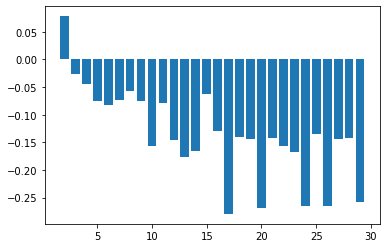

400-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 13ms/step - loss: 0.6910 - val_loss: 0.6827
Epoch 2/100
132/132 [==============================] - 0s 69us/step - loss: 0.6764 - val_loss: 0.6600
Epoch 3/100
132/132 [==============================] - 0s 69us/step - loss: 0.6451 - val_loss: 0.6142
Epoch 4/100
132/132 [==============================] - 0s 68us/step - loss: 0.5856 - val_loss: 0.5334
Epoch 5/100
132/132 [==============================] - 0s 69us/step - loss: 0.5009 - val_loss: 0.4134
Epoch 6/100
132/132 [==============================] - 0s 67us/step - loss: 0.3799 - val_loss: 0.2756
Epoch 7/100
132/132 [==============================] - 0s 68us/step - loss: 0.2672 - val_loss: 0.1611
Epoch 8/100
132/132 [==============================] - 0s 67us/step - loss: 0.1937 - val_loss: 0.1030
Epoch 9/100
132/132 [==============================] - 0s 67us/step - loss: 0.1622 - val_loss: 0.0874
Epoch 10/100
132/132 [=====

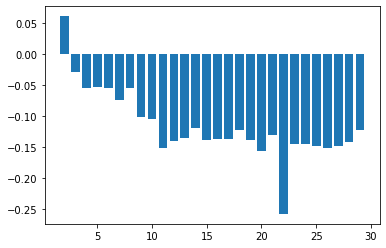

400-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 13ms/step - loss: 0.6907 - val_loss: 0.6833
Epoch 2/100
132/132 [==============================] - 0s 73us/step - loss: 0.6773 - val_loss: 0.6622
Epoch 3/100
132/132 [==============================] - 0s 68us/step - loss: 0.6481 - val_loss: 0.6213
Epoch 4/100
132/132 [==============================] - 0s 71us/step - loss: 0.5957 - val_loss: 0.5511
Epoch 5/100
132/132 [==============================] - 0s 69us/step - loss: 0.5170 - val_loss: 0.4472
Epoch 6/100
132/132 [==============================] - 0s 66us/step - loss: 0.4095 - val_loss: 0.3198
Epoch 7/100
132/132 [==============================] - 0s 70us/step - loss: 0.2963 - val_loss: 0.2003
Epoch 8/100
132/132 [==============================] - 0s 67us/step - loss: 0.2155 - val_loss: 0.1225
Epoch 9/100
132/132 [==============================] - 0s 67us/step - loss: 0.1712 - val_loss: 0.0921
Epoch 10/100
132/132 [=====

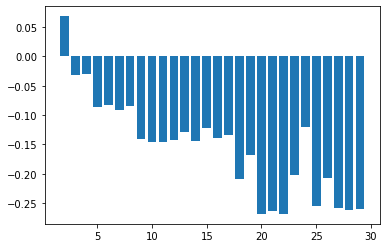

400-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 14ms/step - loss: 0.6913 - val_loss: 0.6850
Epoch 2/100
132/132 [==============================] - 0s 76us/step - loss: 0.6794 - val_loss: 0.6676
Epoch 3/100
132/132 [==============================] - 0s 68us/step - loss: 0.6539 - val_loss: 0.6325
Epoch 4/100
132/132 [==============================] - 0s 69us/step - loss: 0.6082 - val_loss: 0.5710
Epoch 5/100
132/132 [==============================] - 0s 67us/step - loss: 0.5338 - val_loss: 0.4782
Epoch 6/100
132/132 [==============================] - 0s 67us/step - loss: 0.4360 - val_loss: 0.3578
Epoch 7/100
132/132 [==============================] - 0s 66us/step - loss: 0.3241 - val_loss: 0.2352
Epoch 8/100
132/132 [==============================] - 0s 72us/step - loss: 0.2409 - val_loss: 0.1432
Epoch 9/100
132/132 [==============================] - 0s 66us/step - loss: 0.1844 - val_loss: 0.1003
Epoch 10/100
132/132 [=====

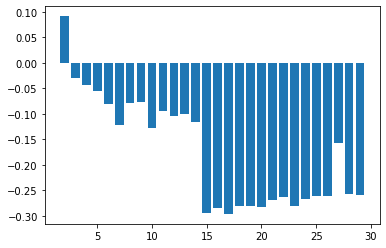

400-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 14ms/step - loss: 0.6917 - val_loss: 0.6863
Epoch 2/100
132/132 [==============================] - 0s 75us/step - loss: 0.6820 - val_loss: 0.6716
Epoch 3/100
132/132 [==============================] - 0s 69us/step - loss: 0.6612 - val_loss: 0.6433
Epoch 4/100
132/132 [==============================] - 0s 70us/step - loss: 0.6243 - val_loss: 0.5960
Epoch 5/100
132/132 [==============================] - 0s 69us/step - loss: 0.5674 - val_loss: 0.5261
Epoch 6/100
132/132 [==============================] - 0s 68us/step - loss: 0.4919 - val_loss: 0.4344
Epoch 7/100
132/132 [==============================] - 0s 69us/step - loss: 0.4005 - val_loss: 0.3284
Epoch 8/100
132/132 [==============================] - 0s 70us/step - loss: 0.3086 - val_loss: 0.2269
Epoch 9/100
132/132 [==============================] - 0s 71us/step - loss: 0.2312 - val_loss: 0.1517
Epoch 10/100
132/132 [=====

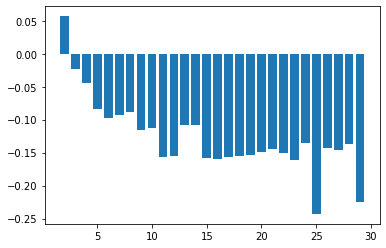

390-380dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 15ms/step - loss: 0.6868 - val_loss: 0.6632
Epoch 2/100
132/132 [==============================] - 0s 84us/step - loss: 0.6436 - val_loss: 0.5771
Epoch 3/100
132/132 [==============================] - 0s 75us/step - loss: 0.5352 - val_loss: 0.3919
Epoch 4/100
132/132 [==============================] - 0s 79us/step - loss: 0.3490 - val_loss: 0.1771
Epoch 5/100
132/132 [==============================] - 0s 78us/step - loss: 0.2061 - val_loss: 0.0911
Epoch 6/100
132/132 [==============================] - 0s 81us/step - loss: 0.1819 - val_loss: 0.0944
(165, 380)


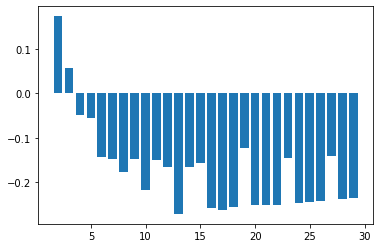

390-370dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 15ms/step - loss: 0.6860 - val_loss: 0.6594
Epoch 2/100
132/132 [==============================] - 0s 84us/step - loss: 0.6376 - val_loss: 0.5640
Epoch 3/100
132/132 [==============================] - 0s 78us/step - loss: 0.5174 - val_loss: 0.3712
Epoch 4/100
132/132 [==============================] - 0s 76us/step - loss: 0.3374 - val_loss: 0.1659
Epoch 5/100
132/132 [==============================] - 0s 74us/step - loss: 0.2155 - val_loss: 0.0933
Epoch 6/100
132/132 [==============================] - 0s 73us/step - loss: 0.1857 - val_loss: 0.0958
(165, 370)


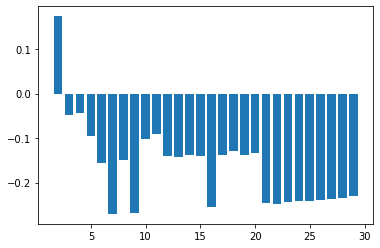

390-360dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 16ms/step - loss: 0.6855 - val_loss: 0.6596
Epoch 2/100
132/132 [==============================] - 0s 86us/step - loss: 0.6390 - val_loss: 0.5684
Epoch 3/100
132/132 [==============================] - 0s 77us/step - loss: 0.5215 - val_loss: 0.3802
Epoch 4/100
132/132 [==============================] - 0s 82us/step - loss: 0.3438 - val_loss: 0.1742
Epoch 5/100
132/132 [==============================] - 0s 76us/step - loss: 0.2195 - val_loss: 0.0950
Epoch 6/100
132/132 [==============================] - 0s 75us/step - loss: 0.1849 - val_loss: 0.0973
(165, 360)


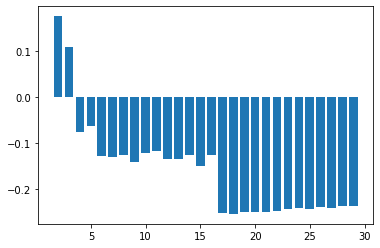

390-350dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 16ms/step - loss: 0.6871 - val_loss: 0.6643
Epoch 2/100
132/132 [==============================] - 0s 86us/step - loss: 0.6461 - val_loss: 0.5840
Epoch 3/100
132/132 [==============================] - 0s 75us/step - loss: 0.5403 - val_loss: 0.4101
Epoch 4/100
132/132 [==============================] - 0s 89us/step - loss: 0.3664 - val_loss: 0.1969
Epoch 5/100
132/132 [==============================] - 0s 74us/step - loss: 0.2347 - val_loss: 0.1002
Epoch 6/100
132/132 [==============================] - 0s 75us/step - loss: 0.1873 - val_loss: 0.0962
Epoch 7/100
132/132 [==============================] - 0s 75us/step - loss: 0.1650 - val_loss: 0.1027
(165, 350)


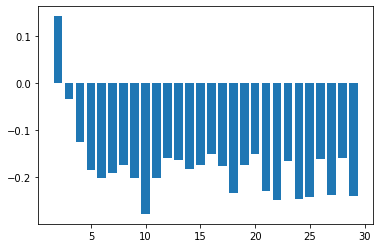

390-340dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 16ms/step - loss: 0.6861 - val_loss: 0.6629
Epoch 2/100
132/132 [==============================] - 0s 85us/step - loss: 0.6436 - val_loss: 0.5799
Epoch 3/100
132/132 [==============================] - 0s 74us/step - loss: 0.5396 - val_loss: 0.4075
Epoch 4/100
132/132 [==============================] - 0s 75us/step - loss: 0.3640 - val_loss: 0.1983
Epoch 5/100
132/132 [==============================] - 0s 73us/step - loss: 0.2295 - val_loss: 0.0978
Epoch 6/100
132/132 [==============================] - 0s 73us/step - loss: 0.1872 - val_loss: 0.0911
Epoch 7/100
132/132 [==============================] - 0s 73us/step - loss: 0.1665 - val_loss: 0.0973
(165, 340)


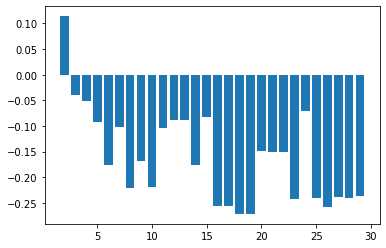

390-330dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 17ms/step - loss: 0.6849 - val_loss: 0.6595
Epoch 2/100
132/132 [==============================] - 0s 85us/step - loss: 0.6382 - val_loss: 0.5698
Epoch 3/100
132/132 [==============================] - 0s 78us/step - loss: 0.5235 - val_loss: 0.3879
Epoch 4/100
132/132 [==============================] - 0s 79us/step - loss: 0.3471 - val_loss: 0.1820
Epoch 5/100
132/132 [==============================] - 0s 79us/step - loss: 0.2231 - val_loss: 0.0969
Epoch 6/100
132/132 [==============================] - 0s 77us/step - loss: 0.1926 - val_loss: 0.0972
(165, 330)


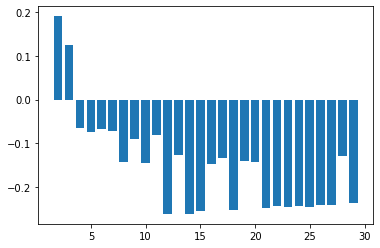

390-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 17ms/step - loss: 0.6883 - val_loss: 0.6689
Epoch 2/100
132/132 [==============================] - 0s 85us/step - loss: 0.6528 - val_loss: 0.6000
Epoch 3/100
132/132 [==============================] - 0s 78us/step - loss: 0.5611 - val_loss: 0.4451
Epoch 4/100
132/132 [==============================] - 0s 80us/step - loss: 0.3967 - val_loss: 0.2316
Epoch 5/100
132/132 [==============================] - 0s 79us/step - loss: 0.2419 - val_loss: 0.1056
Epoch 6/100
132/132 [==============================] - 0s 78us/step - loss: 0.1966 - val_loss: 0.0921
Epoch 7/100
132/132 [==============================] - 0s 74us/step - loss: 0.1817 - val_loss: 0.1000
(165, 320)


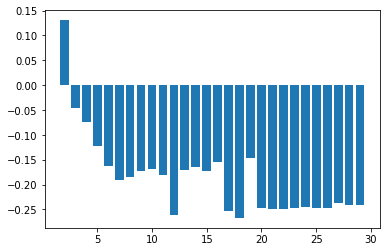

390-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 17ms/step - loss: 0.6855 - val_loss: 0.6608
Epoch 2/100
132/132 [==============================] - 0s 88us/step - loss: 0.6412 - val_loss: 0.5777
Epoch 3/100
132/132 [==============================] - 0s 82us/step - loss: 0.5362 - val_loss: 0.4086
Epoch 4/100
132/132 [==============================] - 0s 76us/step - loss: 0.3589 - val_loss: 0.2029
Epoch 5/100
132/132 [==============================] - 0s 78us/step - loss: 0.2222 - val_loss: 0.1011
Epoch 6/100
132/132 [==============================] - 0s 76us/step - loss: 0.1868 - val_loss: 0.0951
Epoch 7/100
132/132 [==============================] - 0s 79us/step - loss: 0.1745 - val_loss: 0.1036
(165, 310)


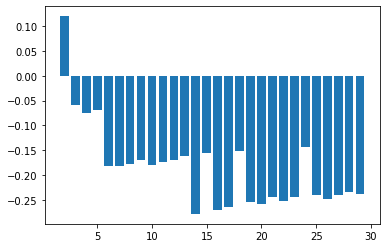

390-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 18ms/step - loss: 0.6869 - val_loss: 0.6663
Epoch 2/100
132/132 [==============================] - 0s 84us/step - loss: 0.6498 - val_loss: 0.5916
Epoch 3/100
132/132 [==============================] - 0s 78us/step - loss: 0.5545 - val_loss: 0.4292
Epoch 4/100
132/132 [==============================] - 0s 78us/step - loss: 0.3844 - val_loss: 0.2164
Epoch 5/100
132/132 [==============================] - 0s 76us/step - loss: 0.2513 - val_loss: 0.1025
Epoch 6/100
132/132 [==============================] - 0s 76us/step - loss: 0.1847 - val_loss: 0.0910
Epoch 7/100
132/132 [==============================] - 0s 78us/step - loss: 0.1626 - val_loss: 0.0961
(165, 300)


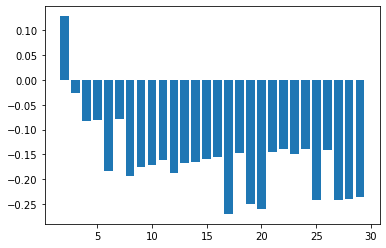

390-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 18ms/step - loss: 0.6867 - val_loss: 0.6649
Epoch 2/100
132/132 [==============================] - 0s 89us/step - loss: 0.6476 - val_loss: 0.5893
Epoch 3/100
132/132 [==============================] - 0s 84us/step - loss: 0.5513 - val_loss: 0.4294
Epoch 4/100
132/132 [==============================] - 0s 81us/step - loss: 0.3844 - val_loss: 0.2217
Epoch 5/100
132/132 [==============================] - 0s 78us/step - loss: 0.2346 - val_loss: 0.1028
Epoch 6/100
132/132 [==============================] - 0s 76us/step - loss: 0.1775 - val_loss: 0.0889
Epoch 7/100
132/132 [==============================] - 0s 79us/step - loss: 0.1623 - val_loss: 0.0975
(165, 290)


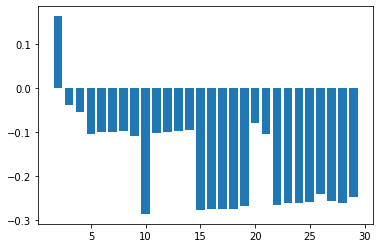

390-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 2s 19ms/step - loss: 0.6869 - val_loss: 0.6662
Epoch 2/100
132/132 [==============================] - 0s 87us/step - loss: 0.6481 - val_loss: 0.5944
Epoch 3/100
132/132 [==============================] - 0s 83us/step - loss: 0.5528 - val_loss: 0.4401
Epoch 4/100
132/132 [==============================] - 0s 77us/step - loss: 0.3930 - val_loss: 0.2331
Epoch 5/100
132/132 [==============================] - 0s 78us/step - loss: 0.2408 - val_loss: 0.1069
Epoch 6/100
132/132 [==============================] - 0s 76us/step - loss: 0.1883 - val_loss: 0.0878
Epoch 7/100
132/132 [==============================] - 0s 79us/step - loss: 0.1721 - val_loss: 0.0938
(165, 280)


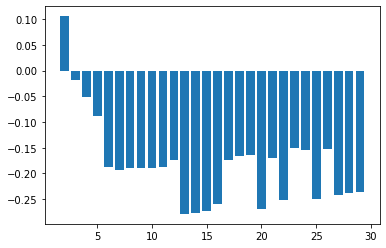

390-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 19ms/step - loss: 0.6885 - val_loss: 0.6707
Epoch 2/100
132/132 [==============================] - 0s 89us/step - loss: 0.6562 - val_loss: 0.6106
Epoch 3/100
132/132 [==============================] - 0s 79us/step - loss: 0.5745 - val_loss: 0.4751
Epoch 4/100
132/132 [==============================] - 0s 80us/step - loss: 0.4293 - val_loss: 0.2727
Epoch 5/100
132/132 [==============================] - 0s 77us/step - loss: 0.2639 - val_loss: 0.1234
Epoch 6/100
132/132 [==============================] - 0s 77us/step - loss: 0.1889 - val_loss: 0.0883
Epoch 7/100
132/132 [==============================] - 0s 77us/step - loss: 0.1678 - val_loss: 0.0934
(165, 270)


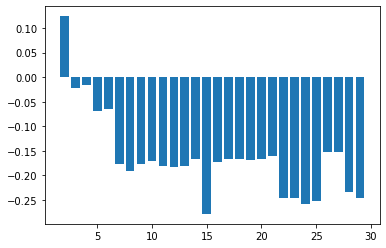

390-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 20ms/step - loss: 0.6878 - val_loss: 0.6693
Epoch 2/100
132/132 [==============================] - 0s 92us/step - loss: 0.6544 - val_loss: 0.6064
Epoch 3/100
132/132 [==============================] - 0s 86us/step - loss: 0.5705 - val_loss: 0.4675
Epoch 4/100
132/132 [==============================] - 0s 82us/step - loss: 0.4158 - val_loss: 0.2658
Epoch 5/100
132/132 [==============================] - 0s 82us/step - loss: 0.2608 - val_loss: 0.1208
Epoch 6/100
132/132 [==============================] - 0s 81us/step - loss: 0.1885 - val_loss: 0.0895
Epoch 7/100
132/132 [==============================] - 0s 78us/step - loss: 0.1713 - val_loss: 0.0950
(165, 260)


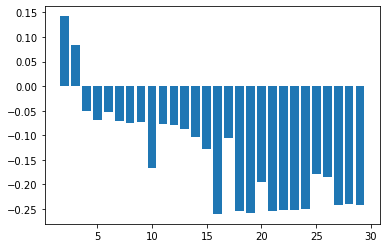

390-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 20ms/step - loss: 0.6871 - val_loss: 0.6684
Epoch 2/100
132/132 [==============================] - 0s 91us/step - loss: 0.6522 - val_loss: 0.6024
Epoch 3/100
132/132 [==============================] - 0s 82us/step - loss: 0.5634 - val_loss: 0.4578
Epoch 4/100
132/132 [==============================] - 0s 82us/step - loss: 0.4124 - val_loss: 0.2539
Epoch 5/100
132/132 [==============================] - 0s 81us/step - loss: 0.2643 - val_loss: 0.1185
Epoch 6/100
132/132 [==============================] - 0s 78us/step - loss: 0.1957 - val_loss: 0.0904
Epoch 7/100
132/132 [==============================] - 0s 81us/step - loss: 0.1788 - val_loss: 0.0953
(165, 250)


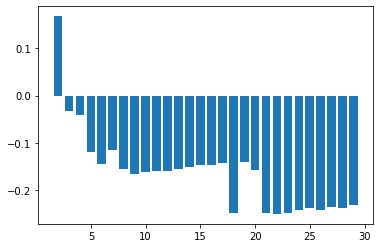

390-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 21ms/step - loss: 0.6868 - val_loss: 0.6674
Epoch 2/100
132/132 [==============================] - 0s 91us/step - loss: 0.6499 - val_loss: 0.6011
Epoch 3/100
132/132 [==============================] - 0s 82us/step - loss: 0.5629 - val_loss: 0.4597
Epoch 4/100
132/132 [==============================] - 0s 83us/step - loss: 0.4181 - val_loss: 0.2600
Epoch 5/100
132/132 [==============================] - 0s 81us/step - loss: 0.2668 - val_loss: 0.1212
Epoch 6/100
132/132 [==============================] - 0s 78us/step - loss: 0.1871 - val_loss: 0.0889
Epoch 7/100
132/132 [==============================] - 0s 81us/step - loss: 0.1619 - val_loss: 0.0927
(165, 240)


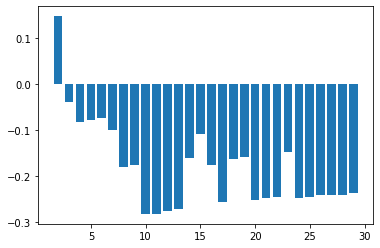

390-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 21ms/step - loss: 0.6876 - val_loss: 0.6696
Epoch 2/100
132/132 [==============================] - 0s 93us/step - loss: 0.6541 - val_loss: 0.6076
Epoch 3/100
132/132 [==============================] - 0s 83us/step - loss: 0.5719 - val_loss: 0.4706
Epoch 4/100
132/132 [==============================] - 0s 86us/step - loss: 0.4274 - val_loss: 0.2710
Epoch 5/100
132/132 [==============================] - 0s 82us/step - loss: 0.2755 - val_loss: 0.1256
Epoch 6/100
132/132 [==============================] - 0s 79us/step - loss: 0.1859 - val_loss: 0.0907
Epoch 7/100
132/132 [==============================] - 0s 82us/step - loss: 0.1628 - val_loss: 0.0938
(165, 230)


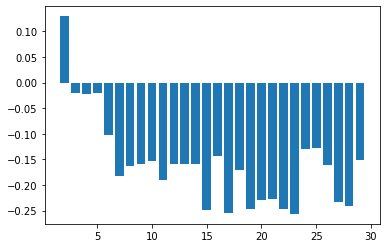

390-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 22ms/step - loss: 0.6869 - val_loss: 0.6675
Epoch 2/100
132/132 [==============================] - 0s 87us/step - loss: 0.6521 - val_loss: 0.6033
Epoch 3/100
132/132 [==============================] - 0s 86us/step - loss: 0.5717 - val_loss: 0.4682
Epoch 4/100
132/132 [==============================] - 0s 79us/step - loss: 0.4268 - val_loss: 0.2758
Epoch 5/100
132/132 [==============================] - 0s 79us/step - loss: 0.2748 - val_loss: 0.1312
Epoch 6/100
132/132 [==============================] - 0s 82us/step - loss: 0.1820 - val_loss: 0.0918
Epoch 7/100
132/132 [==============================] - 0s 78us/step - loss: 0.1602 - val_loss: 0.0929
(165, 220)


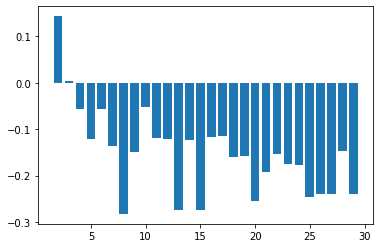

390-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 22ms/step - loss: 0.6862 - val_loss: 0.6658
Epoch 2/100
132/132 [==============================] - 0s 87us/step - loss: 0.6496 - val_loss: 0.5992
Epoch 3/100
132/132 [==============================] - 0s 84us/step - loss: 0.5642 - val_loss: 0.4609
Epoch 4/100
132/132 [==============================] - 0s 80us/step - loss: 0.4242 - val_loss: 0.2661
Epoch 5/100
132/132 [==============================] - 0s 81us/step - loss: 0.2710 - val_loss: 0.1246
Epoch 6/100
132/132 [==============================] - 0s 79us/step - loss: 0.1979 - val_loss: 0.0906
Epoch 7/100
132/132 [==============================] - 0s 79us/step - loss: 0.1718 - val_loss: 0.0945
(165, 210)


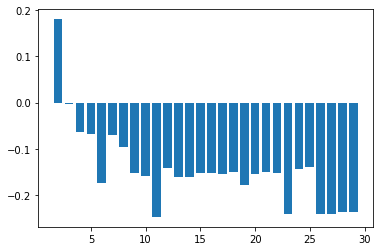

390-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 22ms/step - loss: 0.6882 - val_loss: 0.6704
Epoch 2/100
132/132 [==============================] - 0s 92us/step - loss: 0.6571 - val_loss: 0.6146
Epoch 3/100
132/132 [==============================] - 0s 86us/step - loss: 0.5822 - val_loss: 0.4932
Epoch 4/100
132/132 [==============================] - 0s 83us/step - loss: 0.4468 - val_loss: 0.3057
Epoch 5/100
132/132 [==============================] - 0s 80us/step - loss: 0.2869 - val_loss: 0.1446
Epoch 6/100
132/132 [==============================] - 0s 80us/step - loss: 0.1968 - val_loss: 0.0910
Epoch 7/100
132/132 [==============================] - 0s 79us/step - loss: 0.1724 - val_loss: 0.0905
Epoch 8/100
132/132 [==============================] - 0s 87us/step - loss: 0.1525 - val_loss: 0.0951
(165, 200)


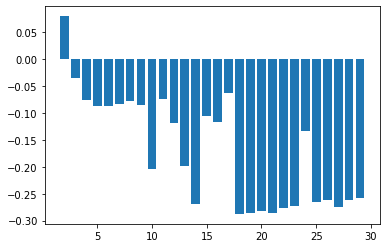

390-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 22ms/step - loss: 0.6875 - val_loss: 0.6696
Epoch 2/100
132/132 [==============================] - 0s 93us/step - loss: 0.6538 - val_loss: 0.6107
Epoch 3/100
132/132 [==============================] - 0s 84us/step - loss: 0.5744 - val_loss: 0.4822
Epoch 4/100
132/132 [==============================] - 0s 83us/step - loss: 0.4372 - val_loss: 0.2902
Epoch 5/100
132/132 [==============================] - 0s 83us/step - loss: 0.2812 - val_loss: 0.1369
Epoch 6/100
132/132 [==============================] - 0s 82us/step - loss: 0.2008 - val_loss: 0.0906
Epoch 7/100
132/132 [==============================] - 0s 81us/step - loss: 0.1728 - val_loss: 0.0902
Epoch 8/100
132/132 [==============================] - 0s 83us/step - loss: 0.1433 - val_loss: 0.0942
(165, 190)


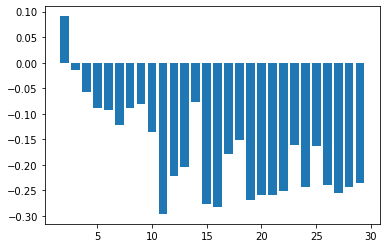

390-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 23ms/step - loss: 0.6882 - val_loss: 0.6703
Epoch 2/100
132/132 [==============================] - 0s 90us/step - loss: 0.6567 - val_loss: 0.6117
Epoch 3/100
132/132 [==============================] - 0s 84us/step - loss: 0.5773 - val_loss: 0.4864
Epoch 4/100
132/132 [==============================] - 0s 84us/step - loss: 0.4442 - val_loss: 0.2991
Epoch 5/100
132/132 [==============================] - 0s 81us/step - loss: 0.2904 - val_loss: 0.1429
Epoch 6/100
132/132 [==============================] - 0s 82us/step - loss: 0.1978 - val_loss: 0.0908
Epoch 7/100
132/132 [==============================] - 0s 84us/step - loss: 0.1680 - val_loss: 0.0888
Epoch 8/100
132/132 [==============================] - 0s 81us/step - loss: 0.1444 - val_loss: 0.0932
(165, 180)


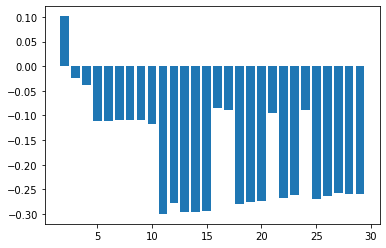

390-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 23ms/step - loss: 0.6887 - val_loss: 0.6735
Epoch 2/100
132/132 [==============================] - 0s 102us/step - loss: 0.6599 - val_loss: 0.6238
Epoch 3/100
132/132 [==============================] - 0s 84us/step - loss: 0.5915 - val_loss: 0.5127
Epoch 4/100
132/132 [==============================] - 0s 87us/step - loss: 0.4654 - val_loss: 0.3317
Epoch 5/100
132/132 [==============================] - 0s 82us/step - loss: 0.3002 - val_loss: 0.1604
Epoch 6/100
132/132 [==============================] - 0s 81us/step - loss: 0.2138 - val_loss: 0.0921
Epoch 7/100
132/132 [==============================] - 0s 80us/step - loss: 0.1772 - val_loss: 0.0881
Epoch 8/100
132/132 [==============================] - 0s 83us/step - loss: 0.1558 - val_loss: 0.0914
(165, 170)


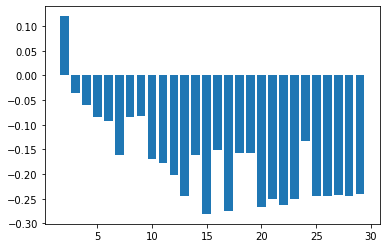

390-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 24ms/step - loss: 0.6876 - val_loss: 0.6722
Epoch 2/100
132/132 [==============================] - 0s 90us/step - loss: 0.6586 - val_loss: 0.6200
Epoch 3/100
132/132 [==============================] - 0s 87us/step - loss: 0.5873 - val_loss: 0.5048
Epoch 4/100
132/132 [==============================] - 0s 82us/step - loss: 0.4579 - val_loss: 0.3230
Epoch 5/100
132/132 [==============================] - 0s 81us/step - loss: 0.3066 - val_loss: 0.1577
Epoch 6/100
132/132 [==============================] - 0s 82us/step - loss: 0.2011 - val_loss: 0.0960
Epoch 7/100
132/132 [==============================] - 0s 81us/step - loss: 0.1765 - val_loss: 0.0903
Epoch 8/100
132/132 [==============================] - 0s 81us/step - loss: 0.1640 - val_loss: 0.0948
(165, 160)


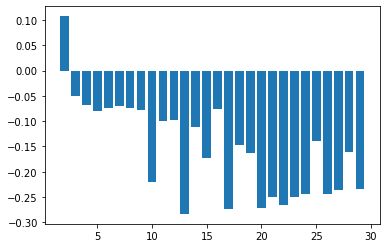

390-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 24ms/step - loss: 0.6885 - val_loss: 0.6737
Epoch 2/100
132/132 [==============================] - 0s 91us/step - loss: 0.6618 - val_loss: 0.6249
Epoch 3/100
132/132 [==============================] - 0s 83us/step - loss: 0.5945 - val_loss: 0.5174
Epoch 4/100
132/132 [==============================] - 0s 85us/step - loss: 0.4767 - val_loss: 0.3443
Epoch 5/100
132/132 [==============================] - 0s 84us/step - loss: 0.3277 - val_loss: 0.1748
Epoch 6/100
132/132 [==============================] - 0s 82us/step - loss: 0.2202 - val_loss: 0.0974
Epoch 7/100
132/132 [==============================] - 0s 82us/step - loss: 0.1844 - val_loss: 0.0878
Epoch 8/100
132/132 [==============================] - 0s 87us/step - loss: 0.1665 - val_loss: 0.0924
(165, 150)


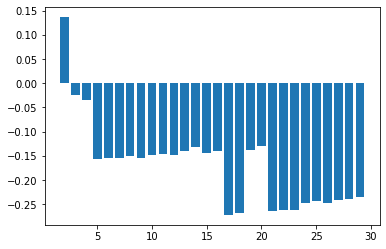

390-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 24ms/step - loss: 0.6884 - val_loss: 0.6745
Epoch 2/100
132/132 [==============================] - 0s 91us/step - loss: 0.6612 - val_loss: 0.6294
Epoch 3/100
132/132 [==============================] - 0s 85us/step - loss: 0.5969 - val_loss: 0.5312
Epoch 4/100
132/132 [==============================] - 0s 83us/step - loss: 0.4915 - val_loss: 0.3694
Epoch 5/100
132/132 [==============================] - 0s 81us/step - loss: 0.3463 - val_loss: 0.2007
Epoch 6/100
132/132 [==============================] - 0s 81us/step - loss: 0.2290 - val_loss: 0.1103
Epoch 7/100
132/132 [==============================] - 0s 83us/step - loss: 0.1819 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 85us/step - loss: 0.1556 - val_loss: 0.0897
(165, 140)


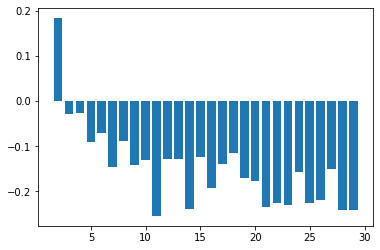

390-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 25ms/step - loss: 0.6885 - val_loss: 0.6736
Epoch 2/100
132/132 [==============================] - 0s 91us/step - loss: 0.6619 - val_loss: 0.6276
Epoch 3/100
132/132 [==============================] - 0s 86us/step - loss: 0.6016 - val_loss: 0.5298
Epoch 4/100
132/132 [==============================] - 0s 83us/step - loss: 0.4883 - val_loss: 0.3712
Epoch 5/100
132/132 [==============================] - 0s 83us/step - loss: 0.3457 - val_loss: 0.2000
Epoch 6/100
132/132 [==============================] - 0s 85us/step - loss: 0.2229 - val_loss: 0.1073
Epoch 7/100
132/132 [==============================] - 0s 82us/step - loss: 0.1780 - val_loss: 0.0893
Epoch 8/100
132/132 [==============================] - 0s 86us/step - loss: 0.1538 - val_loss: 0.0925
(165, 130)


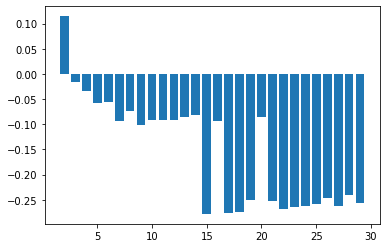

390-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 26ms/step - loss: 0.6887 - val_loss: 0.6731
Epoch 2/100
132/132 [==============================] - 0s 97us/step - loss: 0.6623 - val_loss: 0.6270
Epoch 3/100
132/132 [==============================] - 0s 83us/step - loss: 0.6008 - val_loss: 0.5283
Epoch 4/100
132/132 [==============================] - 0s 88us/step - loss: 0.4886 - val_loss: 0.3671
Epoch 5/100
132/132 [==============================] - 0s 85us/step - loss: 0.3475 - val_loss: 0.1966
Epoch 6/100
132/132 [==============================] - 0s 85us/step - loss: 0.2225 - val_loss: 0.1070
Epoch 7/100
132/132 [==============================] - 0s 87us/step - loss: 0.1759 - val_loss: 0.0879
Epoch 8/100
132/132 [==============================] - 0s 85us/step - loss: 0.1568 - val_loss: 0.0917
(165, 120)


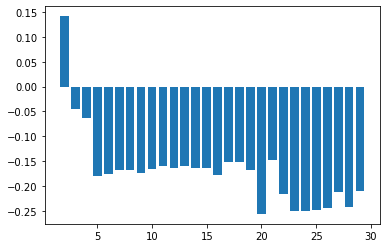

390-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 26ms/step - loss: 0.6883 - val_loss: 0.6729
Epoch 2/100
132/132 [==============================] - 0s 96us/step - loss: 0.6598 - val_loss: 0.6273
Epoch 3/100
132/132 [==============================] - 0s 91us/step - loss: 0.5975 - val_loss: 0.5316
Epoch 4/100
132/132 [==============================] - 0s 87us/step - loss: 0.4889 - val_loss: 0.3764
Epoch 5/100
132/132 [==============================] - 0s 87us/step - loss: 0.3363 - val_loss: 0.2081
Epoch 6/100
132/132 [==============================] - 0s 88us/step - loss: 0.2259 - val_loss: 0.1092
Epoch 7/100
132/132 [==============================] - 0s 93us/step - loss: 0.1762 - val_loss: 0.0881
Epoch 8/100
132/132 [==============================] - 0s 88us/step - loss: 0.1618 - val_loss: 0.0904
(165, 110)


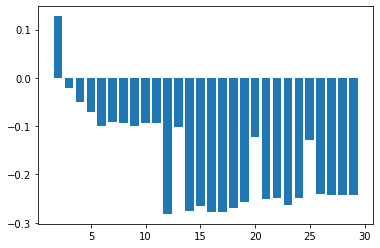

390-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 3s 26ms/step - loss: 0.6892 - val_loss: 0.6759
Epoch 2/100
132/132 [==============================] - 0s 97us/step - loss: 0.6656 - val_loss: 0.6366
Epoch 3/100
132/132 [==============================] - 0s 93us/step - loss: 0.6119 - val_loss: 0.5524
Epoch 4/100
132/132 [==============================] - 0s 84us/step - loss: 0.5153 - val_loss: 0.4089
Epoch 5/100
132/132 [==============================] - 0s 84us/step - loss: 0.3815 - val_loss: 0.2366
Epoch 6/100
132/132 [==============================] - 0s 88us/step - loss: 0.2600 - val_loss: 0.1217
Epoch 7/100
132/132 [==============================] - 0s 87us/step - loss: 0.1873 - val_loss: 0.0888
Epoch 8/100
132/132 [==============================] - 0s 83us/step - loss: 0.1576 - val_loss: 0.0871
Epoch 9/100
132/132 [==============================] - 0s 88us/step - loss: 0.1355 - val_loss: 0.0900
(165, 100)


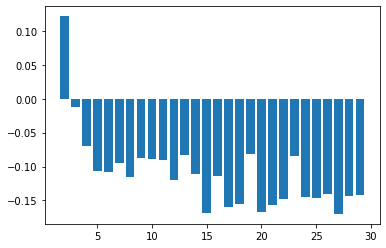

390-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 27ms/step - loss: 0.6897 - val_loss: 0.6769
Epoch 2/100
132/132 [==============================] - 0s 94us/step - loss: 0.6677 - val_loss: 0.6403
Epoch 3/100
132/132 [==============================] - 0s 89us/step - loss: 0.6196 - val_loss: 0.5627
Epoch 4/100
132/132 [==============================] - 0s 86us/step - loss: 0.5278 - val_loss: 0.4296
Epoch 5/100
132/132 [==============================] - 0s 88us/step - loss: 0.3937 - val_loss: 0.2631
Epoch 6/100
132/132 [==============================] - 0s 91us/step - loss: 0.2615 - val_loss: 0.1385
Epoch 7/100
132/132 [==============================] - 0s 84us/step - loss: 0.1978 - val_loss: 0.0918
Epoch 8/100
132/132 [==============================] - 0s 85us/step - loss: 0.1757 - val_loss: 0.0875
Epoch 9/100
132/132 [==============================] - 0s 94us/step - loss: 0.1594 - val_loss: 0.0903
(165, 90)


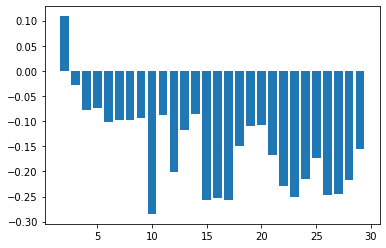

390-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 27ms/step - loss: 0.6873 - val_loss: 0.6725
Epoch 2/100
132/132 [==============================] - 0s 96us/step - loss: 0.6610 - val_loss: 0.6291
Epoch 3/100
132/132 [==============================] - 0s 93us/step - loss: 0.6035 - val_loss: 0.5424
Epoch 4/100
132/132 [==============================] - 0s 92us/step - loss: 0.5063 - val_loss: 0.4037
Epoch 5/100
132/132 [==============================] - 0s 89us/step - loss: 0.3679 - val_loss: 0.2430
Epoch 6/100
132/132 [==============================] - 0s 89us/step - loss: 0.2524 - val_loss: 0.1296
Epoch 7/100
132/132 [==============================] - 0s 88us/step - loss: 0.1889 - val_loss: 0.0920
Epoch 8/100
132/132 [==============================] - 0s 87us/step - loss: 0.1676 - val_loss: 0.0898
Epoch 9/100
132/132 [==============================] - 0s 87us/step - loss: 0.1442 - val_loss: 0.0927
(165, 80)


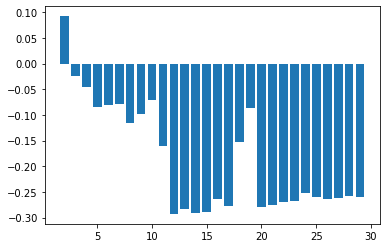

390-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 28ms/step - loss: 0.6898 - val_loss: 0.6794
Epoch 2/100
132/132 [==============================] - 0s 98us/step - loss: 0.6715 - val_loss: 0.6493
Epoch 3/100
132/132 [==============================] - 0s 87us/step - loss: 0.6317 - val_loss: 0.5853
Epoch 4/100
132/132 [==============================] - 0s 85us/step - loss: 0.5527 - val_loss: 0.4711
Epoch 5/100
132/132 [==============================] - 0s 91us/step - loss: 0.4333 - val_loss: 0.3129
Epoch 6/100
132/132 [==============================] - 0s 86us/step - loss: 0.3020 - val_loss: 0.1692
Epoch 7/100
132/132 [==============================] - 0s 90us/step - loss: 0.2030 - val_loss: 0.1009
Epoch 8/100
132/132 [==============================] - 0s 86us/step - loss: 0.1664 - val_loss: 0.0860
Epoch 9/100
132/132 [==============================] - 0s 88us/step - loss: 0.1451 - val_loss: 0.0881
(165, 70)


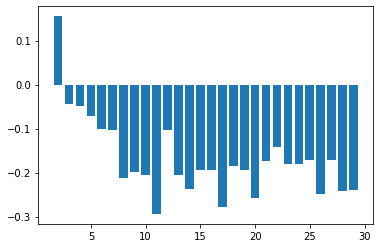

390-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 28ms/step - loss: 0.6905 - val_loss: 0.6813
Epoch 2/100
132/132 [==============================] - 0s 95us/step - loss: 0.6738 - val_loss: 0.6548
Epoch 3/100
132/132 [==============================] - 0s 94us/step - loss: 0.6353 - val_loss: 0.5987
Epoch 4/100
132/132 [==============================] - 0s 92us/step - loss: 0.5645 - val_loss: 0.4993
Epoch 5/100
132/132 [==============================] - 0s 93us/step - loss: 0.4583 - val_loss: 0.3568
Epoch 6/100
132/132 [==============================] - 0s 90us/step - loss: 0.3333 - val_loss: 0.2094
Epoch 7/100
132/132 [==============================] - 0s 88us/step - loss: 0.2307 - val_loss: 0.1189
Epoch 8/100
132/132 [==============================] - 0s 88us/step - loss: 0.1822 - val_loss: 0.0902
Epoch 9/100
132/132 [==============================] - 0s 86us/step - loss: 0.1581 - val_loss: 0.0874
Epoch 10/100
132/132 [=====

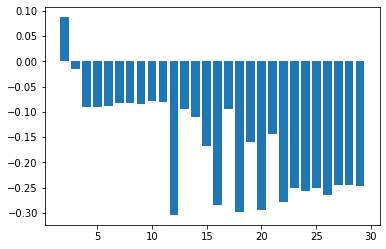

390-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 29ms/step - loss: 0.6898 - val_loss: 0.6799
Epoch 2/100
132/132 [==============================] - 0s 97us/step - loss: 0.6728 - val_loss: 0.6508
Epoch 3/100
132/132 [==============================] - 0s 91us/step - loss: 0.6327 - val_loss: 0.5911
Epoch 4/100
132/132 [==============================] - 0s 87us/step - loss: 0.5582 - val_loss: 0.4879
Epoch 5/100
132/132 [==============================] - 0s 85us/step - loss: 0.4515 - val_loss: 0.3448
Epoch 6/100
132/132 [==============================] - 0s 85us/step - loss: 0.3171 - val_loss: 0.2018
Epoch 7/100
132/132 [==============================] - 0s 89us/step - loss: 0.2161 - val_loss: 0.1136
Epoch 8/100
132/132 [==============================] - 0s 86us/step - loss: 0.1670 - val_loss: 0.0864
Epoch 9/100
132/132 [==============================] - 0s 85us/step - loss: 0.1492 - val_loss: 0.0851
Epoch 10/100
132/132 [=====

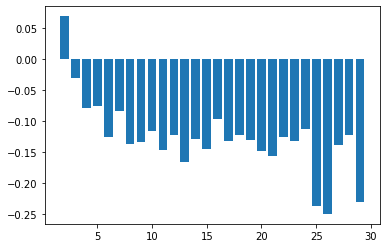

390-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 29ms/step - loss: 0.6903 - val_loss: 0.6828
Epoch 2/100
132/132 [==============================] - 0s 97us/step - loss: 0.6755 - val_loss: 0.6601
Epoch 3/100
132/132 [==============================] - 0s 89us/step - loss: 0.6432 - val_loss: 0.6142
Epoch 4/100
132/132 [==============================] - 0s 89us/step - loss: 0.5839 - val_loss: 0.5337
Epoch 5/100
132/132 [==============================] - 0s 88us/step - loss: 0.4949 - val_loss: 0.4144
Epoch 6/100
132/132 [==============================] - 0s 86us/step - loss: 0.3763 - val_loss: 0.2749
Epoch 7/100
132/132 [==============================] - 0s 88us/step - loss: 0.2676 - val_loss: 0.1589
Epoch 8/100
132/132 [==============================] - 0s 86us/step - loss: 0.1935 - val_loss: 0.1025
Epoch 9/100
132/132 [==============================] - 0s 88us/step - loss: 0.1588 - val_loss: 0.0867
Epoch 10/100
132/132 [=====

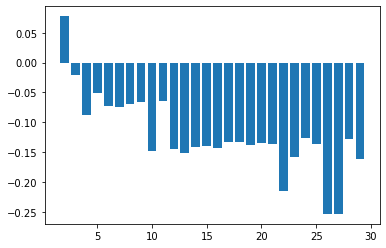

390-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 30ms/step - loss: 0.6918 - val_loss: 0.6862
Epoch 2/100
132/132 [==============================] - 0s 96us/step - loss: 0.6818 - val_loss: 0.6707
Epoch 3/100
132/132 [==============================] - 0s 89us/step - loss: 0.6596 - val_loss: 0.6382
Epoch 4/100
132/132 [==============================] - 0s 90us/step - loss: 0.6148 - val_loss: 0.5781
Epoch 5/100
132/132 [==============================] - 0s 90us/step - loss: 0.5459 - val_loss: 0.4826
Epoch 6/100
132/132 [==============================] - 0s 88us/step - loss: 0.4472 - val_loss: 0.3581
Epoch 7/100
132/132 [==============================] - 0s 93us/step - loss: 0.3380 - val_loss: 0.2308
Epoch 8/100
132/132 [==============================] - 0s 91us/step - loss: 0.2387 - val_loss: 0.1398
Epoch 9/100
132/132 [==============================] - 0s 88us/step - loss: 0.1820 - val_loss: 0.0974
Epoch 10/100
132/132 [=====

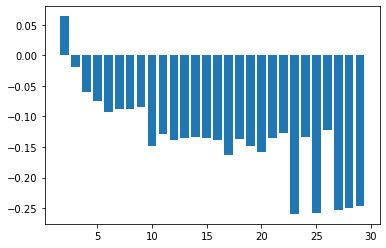

390-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 30ms/step - loss: 0.6903 - val_loss: 0.6827
Epoch 2/100
132/132 [==============================] - 0s 97us/step - loss: 0.6749 - val_loss: 0.6613
Epoch 3/100
132/132 [==============================] - 0s 93us/step - loss: 0.6436 - val_loss: 0.6204
Epoch 4/100
132/132 [==============================] - 0s 89us/step - loss: 0.5895 - val_loss: 0.5527
Epoch 5/100
132/132 [==============================] - 0s 89us/step - loss: 0.5121 - val_loss: 0.4558
Epoch 6/100
132/132 [==============================] - 0s 88us/step - loss: 0.4168 - val_loss: 0.3383
Epoch 7/100
132/132 [==============================] - 0s 86us/step - loss: 0.3204 - val_loss: 0.2242
Epoch 8/100
132/132 [==============================] - 0s 89us/step - loss: 0.2421 - val_loss: 0.1436
Epoch 9/100
132/132 [==============================] - 0s 90us/step - loss: 0.1884 - val_loss: 0.1037
Epoch 10/100
132/132 [=====

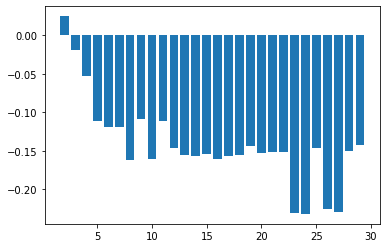

390-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 30ms/step - loss: 0.6915 - val_loss: 0.6863
Epoch 2/100
132/132 [==============================] - 0s 97us/step - loss: 0.6821 - val_loss: 0.6717
Epoch 3/100
132/132 [==============================] - 0s 91us/step - loss: 0.6607 - val_loss: 0.6447
Epoch 4/100
132/132 [==============================] - 0s 95us/step - loss: 0.6254 - val_loss: 0.6009
Epoch 5/100
132/132 [==============================] - 0s 93us/step - loss: 0.5728 - val_loss: 0.5362
Epoch 6/100
132/132 [==============================] - 0s 89us/step - loss: 0.5032 - val_loss: 0.4516
Epoch 7/100
132/132 [==============================] - 0s 88us/step - loss: 0.4178 - val_loss: 0.3544
Epoch 8/100
132/132 [==============================] - 0s 90us/step - loss: 0.3314 - val_loss: 0.2564
Epoch 9/100
132/132 [==============================] - 0s 89us/step - loss: 0.2583 - val_loss: 0.1762
Epoch 10/100
132/132 [=====

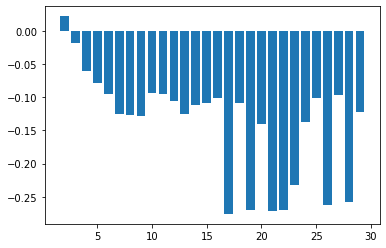

380-370dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 31ms/step - loss: 0.6862 - val_loss: 0.6624
Epoch 2/100
132/132 [==============================] - 0s 103us/step - loss: 0.6428 - val_loss: 0.5772
Epoch 3/100
132/132 [==============================] - 0s 101us/step - loss: 0.5397 - val_loss: 0.4008
Epoch 4/100
132/132 [==============================] - 0s 96us/step - loss: 0.3704 - val_loss: 0.1953
Epoch 5/100
132/132 [==============================] - 0s 92us/step - loss: 0.2238 - val_loss: 0.0996
Epoch 6/100
132/132 [==============================] - 0s 94us/step - loss: 0.1785 - val_loss: 0.0931
Epoch 7/100
132/132 [==============================] - 0s 96us/step - loss: 0.1589 - val_loss: 0.0992
(165, 370)


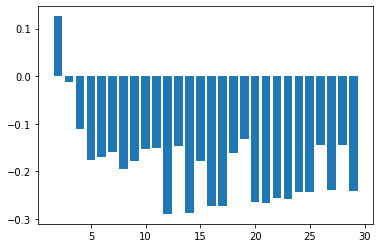

380-360dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 31ms/step - loss: 0.6868 - val_loss: 0.6647
Epoch 2/100
132/132 [==============================] - 0s 109us/step - loss: 0.6454 - val_loss: 0.5837
Epoch 3/100
132/132 [==============================] - 0s 101us/step - loss: 0.5416 - val_loss: 0.4108
Epoch 4/100
132/132 [==============================] - 0s 96us/step - loss: 0.3669 - val_loss: 0.1988
Epoch 5/100
132/132 [==============================] - 0s 96us/step - loss: 0.2276 - val_loss: 0.0976
Epoch 6/100
132/132 [==============================] - 0s 96us/step - loss: 0.1844 - val_loss: 0.0919
Epoch 7/100
132/132 [==============================] - 0s 94us/step - loss: 0.1687 - val_loss: 0.0976
(165, 360)


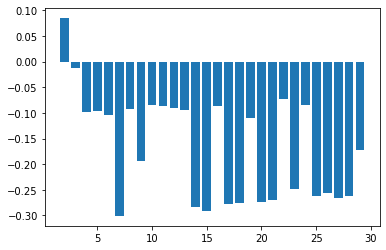

380-350dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 33ms/step - loss: 0.6863 - val_loss: 0.6633
Epoch 2/100
132/132 [==============================] - 0s 105us/step - loss: 0.6431 - val_loss: 0.5811
Epoch 3/100
132/132 [==============================] - 0s 100us/step - loss: 0.5386 - val_loss: 0.4067
Epoch 4/100
132/132 [==============================] - 0s 100us/step - loss: 0.3646 - val_loss: 0.1942
Epoch 5/100
132/132 [==============================] - 0s 95us/step - loss: 0.2288 - val_loss: 0.0969
Epoch 6/100
132/132 [==============================] - 0s 98us/step - loss: 0.1905 - val_loss: 0.0934
Epoch 7/100
132/132 [==============================] - 0s 99us/step - loss: 0.1810 - val_loss: 0.1033
(165, 350)


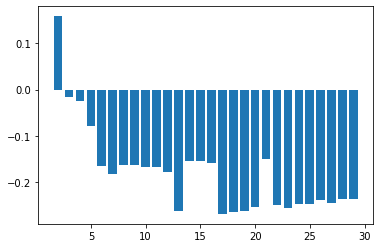

380-340dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 33ms/step - loss: 0.6859 - val_loss: 0.6638
Epoch 2/100
132/132 [==============================] - 0s 105us/step - loss: 0.6449 - val_loss: 0.5851
Epoch 3/100
132/132 [==============================] - 0s 101us/step - loss: 0.5447 - val_loss: 0.4172
Epoch 4/100
132/132 [==============================] - 0s 101us/step - loss: 0.3722 - val_loss: 0.2057
Epoch 5/100
132/132 [==============================] - 0s 96us/step - loss: 0.2406 - val_loss: 0.0984
Epoch 6/100
132/132 [==============================] - 0s 97us/step - loss: 0.1907 - val_loss: 0.0892
Epoch 7/100
132/132 [==============================] - 0s 97us/step - loss: 0.1752 - val_loss: 0.0946
(165, 340)


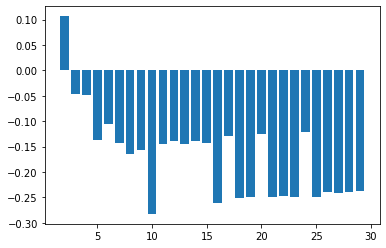

380-330dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 33ms/step - loss: 0.6869 - val_loss: 0.6647
Epoch 2/100
132/132 [==============================] - 0s 107us/step - loss: 0.6450 - val_loss: 0.5853
Epoch 3/100
132/132 [==============================] - 0s 99us/step - loss: 0.5453 - val_loss: 0.4149
Epoch 4/100
132/132 [==============================] - 0s 97us/step - loss: 0.3762 - val_loss: 0.2042
Epoch 5/100
132/132 [==============================] - 0s 99us/step - loss: 0.2357 - val_loss: 0.0996
Epoch 6/100
132/132 [==============================] - 0s 94us/step - loss: 0.1735 - val_loss: 0.0904
Epoch 7/100
132/132 [==============================] - 0s 97us/step - loss: 0.1523 - val_loss: 0.0961
(165, 330)


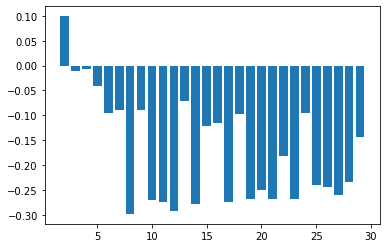

380-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 4s 33ms/step - loss: 0.6866 - val_loss: 0.6649
Epoch 2/100
132/132 [==============================] - 0s 107us/step - loss: 0.6468 - val_loss: 0.5871
Epoch 3/100
132/132 [==============================] - 0s 102us/step - loss: 0.5444 - val_loss: 0.4224
Epoch 4/100
132/132 [==============================] - 0s 100us/step - loss: 0.3763 - val_loss: 0.2136
Epoch 5/100
132/132 [==============================] - 0s 98us/step - loss: 0.2347 - val_loss: 0.1044
Epoch 6/100
132/132 [==============================] - 0s 96us/step - loss: 0.1921 - val_loss: 0.0951
Epoch 7/100
132/132 [==============================] - 0s 98us/step - loss: 0.1795 - val_loss: 0.1043
(165, 320)


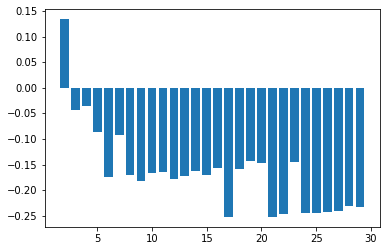

380-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 35ms/step - loss: 0.6854 - val_loss: 0.6613
Epoch 2/100
132/132 [==============================] - 0s 109us/step - loss: 0.6406 - val_loss: 0.5781
Epoch 3/100
132/132 [==============================] - 0s 110us/step - loss: 0.5406 - val_loss: 0.4079
Epoch 4/100
132/132 [==============================] - 0s 100us/step - loss: 0.3705 - val_loss: 0.2015
Epoch 5/100
132/132 [==============================] - 0s 99us/step - loss: 0.2238 - val_loss: 0.0983
Epoch 6/100
132/132 [==============================] - 0s 96us/step - loss: 0.1805 - val_loss: 0.0903
Epoch 7/100
132/132 [==============================] - 0s 96us/step - loss: 0.1631 - val_loss: 0.0981
(165, 310)


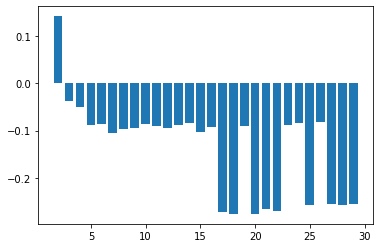

380-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 35ms/step - loss: 0.6889 - val_loss: 0.6699
Epoch 2/100
132/132 [==============================] - 0s 105us/step - loss: 0.6536 - val_loss: 0.6065
Epoch 3/100
132/132 [==============================] - 0s 102us/step - loss: 0.5697 - val_loss: 0.4653
Epoch 4/100
132/132 [==============================] - 0s 96us/step - loss: 0.4166 - val_loss: 0.2603
Epoch 5/100
132/132 [==============================] - 0s 99us/step - loss: 0.2475 - val_loss: 0.1183
Epoch 6/100
132/132 [==============================] - 0s 98us/step - loss: 0.1776 - val_loss: 0.0897
Epoch 7/100
132/132 [==============================] - 0s 98us/step - loss: 0.1639 - val_loss: 0.0960
(165, 300)


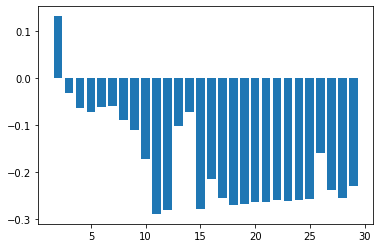

380-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 35ms/step - loss: 0.6884 - val_loss: 0.6679
Epoch 2/100
132/132 [==============================] - 0s 107us/step - loss: 0.6527 - val_loss: 0.5993
Epoch 3/100
132/132 [==============================] - 0s 104us/step - loss: 0.5638 - val_loss: 0.4485
Epoch 4/100
132/132 [==============================] - 0s 103us/step - loss: 0.4080 - val_loss: 0.2388
Epoch 5/100
132/132 [==============================] - 0s 105us/step - loss: 0.2560 - val_loss: 0.1090
Epoch 6/100
132/132 [==============================] - 0s 99us/step - loss: 0.1843 - val_loss: 0.0891
Epoch 7/100
132/132 [==============================] - 0s 100us/step - loss: 0.1645 - val_loss: 0.0949
(165, 290)


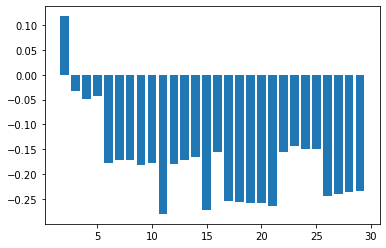

380-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 36ms/step - loss: 0.6870 - val_loss: 0.6658
Epoch 2/100
132/132 [==============================] - 0s 111us/step - loss: 0.6485 - val_loss: 0.5934
Epoch 3/100
132/132 [==============================] - 0s 104us/step - loss: 0.5529 - val_loss: 0.4400
Epoch 4/100
132/132 [==============================] - 0s 98us/step - loss: 0.3943 - val_loss: 0.2363
Epoch 5/100
132/132 [==============================] - 0s 100us/step - loss: 0.2370 - val_loss: 0.1110
Epoch 6/100
132/132 [==============================] - 0s 98us/step - loss: 0.1870 - val_loss: 0.0916
Epoch 7/100
132/132 [==============================] - 0s 106us/step - loss: 0.1712 - val_loss: 0.0979
(165, 280)


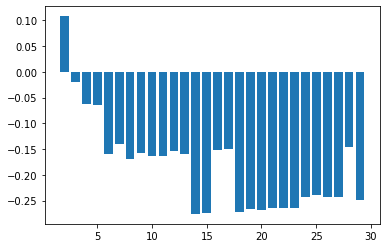

380-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 36ms/step - loss: 0.6869 - val_loss: 0.6662
Epoch 2/100
132/132 [==============================] - 0s 111us/step - loss: 0.6492 - val_loss: 0.5958
Epoch 3/100
132/132 [==============================] - 0s 102us/step - loss: 0.5602 - val_loss: 0.4454
Epoch 4/100
132/132 [==============================] - 0s 102us/step - loss: 0.4020 - val_loss: 0.2415
Epoch 5/100
132/132 [==============================] - 0s 103us/step - loss: 0.2492 - val_loss: 0.1127
Epoch 6/100
132/132 [==============================] - 0s 102us/step - loss: 0.1855 - val_loss: 0.0921
Epoch 7/100
132/132 [==============================] - 0s 97us/step - loss: 0.1668 - val_loss: 0.0987
(165, 270)


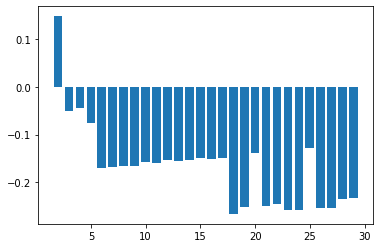

380-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 37ms/step - loss: 0.6878 - val_loss: 0.6678
Epoch 2/100
132/132 [==============================] - 0s 112us/step - loss: 0.6531 - val_loss: 0.6021
Epoch 3/100
132/132 [==============================] - 0s 101us/step - loss: 0.5680 - val_loss: 0.4606
Epoch 4/100
132/132 [==============================] - 0s 104us/step - loss: 0.4227 - val_loss: 0.2588
Epoch 5/100
132/132 [==============================] - 0s 99us/step - loss: 0.2672 - val_loss: 0.1203
Epoch 6/100
132/132 [==============================] - 0s 101us/step - loss: 0.1872 - val_loss: 0.0921
Epoch 7/100
132/132 [==============================] - 0s 100us/step - loss: 0.1712 - val_loss: 0.0975
(165, 260)


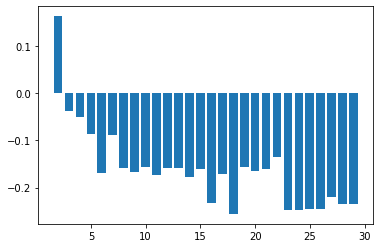

380-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 37ms/step - loss: 0.6865 - val_loss: 0.6651
Epoch 2/100
132/132 [==============================] - 0s 112us/step - loss: 0.6485 - val_loss: 0.5939
Epoch 3/100
132/132 [==============================] - 0s 101us/step - loss: 0.5552 - val_loss: 0.4441
Epoch 4/100
132/132 [==============================] - 0s 101us/step - loss: 0.3999 - val_loss: 0.2402
Epoch 5/100
132/132 [==============================] - 0s 99us/step - loss: 0.2542 - val_loss: 0.1120
Epoch 6/100
132/132 [==============================] - 0s 98us/step - loss: 0.1896 - val_loss: 0.0893
Epoch 7/100
132/132 [==============================] - 0s 101us/step - loss: 0.1710 - val_loss: 0.0939
(165, 250)


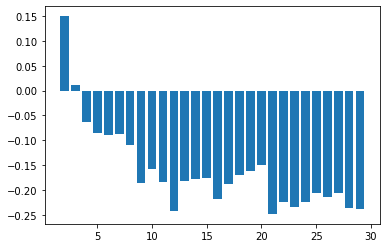

380-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 38ms/step - loss: 0.6881 - val_loss: 0.6705
Epoch 2/100
132/132 [==============================] - 0s 113us/step - loss: 0.6566 - val_loss: 0.6130
Epoch 3/100
132/132 [==============================] - 0s 105us/step - loss: 0.5810 - val_loss: 0.4836
Epoch 4/100
132/132 [==============================] - 0s 112us/step - loss: 0.4353 - val_loss: 0.2848
Epoch 5/100
132/132 [==============================] - 0s 106us/step - loss: 0.2623 - val_loss: 0.1279
Epoch 6/100
132/132 [==============================] - 0s 99us/step - loss: 0.1840 - val_loss: 0.0875
Epoch 7/100
132/132 [==============================] - 0s 105us/step - loss: 0.1699 - val_loss: 0.0926
(165, 240)


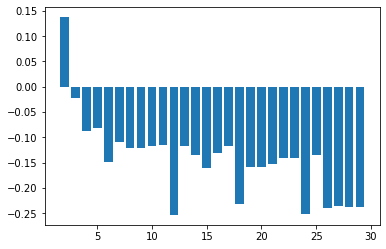

380-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 38ms/step - loss: 0.6883 - val_loss: 0.6701
Epoch 2/100
132/132 [==============================] - 0s 116us/step - loss: 0.6557 - val_loss: 0.6124
Epoch 3/100
132/132 [==============================] - 0s 101us/step - loss: 0.5788 - val_loss: 0.4852
Epoch 4/100
132/132 [==============================] - 0s 101us/step - loss: 0.4366 - val_loss: 0.2896
Epoch 5/100
132/132 [==============================] - 0s 103us/step - loss: 0.2875 - val_loss: 0.1321
Epoch 6/100
132/132 [==============================] - 0s 102us/step - loss: 0.1958 - val_loss: 0.0890
Epoch 7/100
132/132 [==============================] - 0s 103us/step - loss: 0.1727 - val_loss: 0.0906
(165, 230)


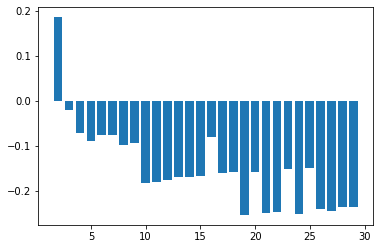

380-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 39ms/step - loss: 0.6857 - val_loss: 0.6625
Epoch 2/100
132/132 [==============================] - 0s 111us/step - loss: 0.6444 - val_loss: 0.5880
Epoch 3/100
132/132 [==============================] - 0s 106us/step - loss: 0.5542 - val_loss: 0.4373
Epoch 4/100
132/132 [==============================] - 0s 104us/step - loss: 0.3984 - val_loss: 0.2399
Epoch 5/100
132/132 [==============================] - 0s 106us/step - loss: 0.2521 - val_loss: 0.1128
Epoch 6/100
132/132 [==============================] - 0s 103us/step - loss: 0.1816 - val_loss: 0.0880
Epoch 7/100
132/132 [==============================] - 0s 107us/step - loss: 0.1596 - val_loss: 0.0930
(165, 220)


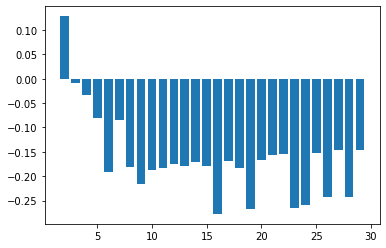

380-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 39ms/step - loss: 0.6885 - val_loss: 0.6720
Epoch 2/100
132/132 [==============================] - 0s 113us/step - loss: 0.6578 - val_loss: 0.6183
Epoch 3/100
132/132 [==============================] - 0s 108us/step - loss: 0.5866 - val_loss: 0.4997
Epoch 4/100
132/132 [==============================] - 0s 103us/step - loss: 0.4501 - val_loss: 0.3124
Epoch 5/100
132/132 [==============================] - 0s 107us/step - loss: 0.2903 - val_loss: 0.1471
Epoch 6/100
132/132 [==============================] - 0s 103us/step - loss: 0.2073 - val_loss: 0.0914
Epoch 7/100
132/132 [==============================] - 0s 103us/step - loss: 0.1835 - val_loss: 0.0929
(165, 210)


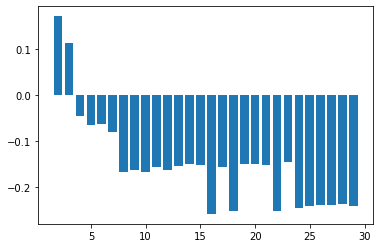

380-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 40ms/step - loss: 0.6879 - val_loss: 0.6707
Epoch 2/100
132/132 [==============================] - 0s 113us/step - loss: 0.6560 - val_loss: 0.6140
Epoch 3/100
132/132 [==============================] - 0s 111us/step - loss: 0.5824 - val_loss: 0.4910
Epoch 4/100
132/132 [==============================] - 0s 104us/step - loss: 0.4467 - val_loss: 0.3042
Epoch 5/100
132/132 [==============================] - 0s 103us/step - loss: 0.2905 - val_loss: 0.1426
Epoch 6/100
132/132 [==============================] - 0s 109us/step - loss: 0.2000 - val_loss: 0.0889
Epoch 7/100
132/132 [==============================] - 0s 101us/step - loss: 0.1717 - val_loss: 0.0886
Epoch 8/100
132/132 [==============================] - 0s 111us/step - loss: 0.1498 - val_loss: 0.0936
(165, 200)


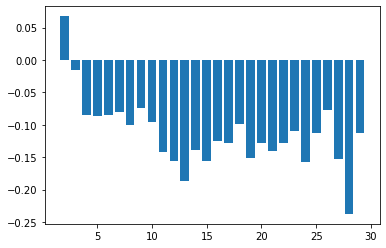

380-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 40ms/step - loss: 0.6879 - val_loss: 0.6708
Epoch 2/100
132/132 [==============================] - 0s 115us/step - loss: 0.6577 - val_loss: 0.6149
Epoch 3/100
132/132 [==============================] - 0s 114us/step - loss: 0.5849 - val_loss: 0.4940
Epoch 4/100
132/132 [==============================] - 0s 102us/step - loss: 0.4503 - val_loss: 0.3096
Epoch 5/100
132/132 [==============================] - 0s 106us/step - loss: 0.2997 - val_loss: 0.1488
Epoch 6/100
132/132 [==============================] - 0s 105us/step - loss: 0.2012 - val_loss: 0.0920
Epoch 7/100
132/132 [==============================] - 0s 106us/step - loss: 0.1673 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 104us/step - loss: 0.1438 - val_loss: 0.0940
(165, 190)


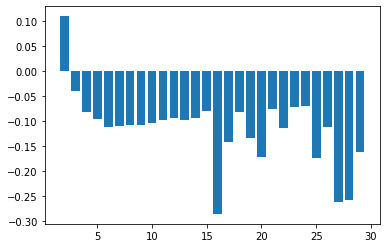

380-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 5s 41ms/step - loss: 0.6884 - val_loss: 0.6725
Epoch 2/100
132/132 [==============================] - 0s 121us/step - loss: 0.6602 - val_loss: 0.6212
Epoch 3/100
132/132 [==============================] - 0s 110us/step - loss: 0.5920 - val_loss: 0.5086
Epoch 4/100
132/132 [==============================] - 0s 103us/step - loss: 0.4647 - val_loss: 0.3295
Epoch 5/100
132/132 [==============================] - 0s 104us/step - loss: 0.3067 - val_loss: 0.1610
Epoch 6/100
132/132 [==============================] - 0s 107us/step - loss: 0.2110 - val_loss: 0.0935
Epoch 7/100
132/132 [==============================] - 0s 104us/step - loss: 0.1735 - val_loss: 0.0892
Epoch 8/100
132/132 [==============================] - 0s 105us/step - loss: 0.1534 - val_loss: 0.0929
(165, 180)


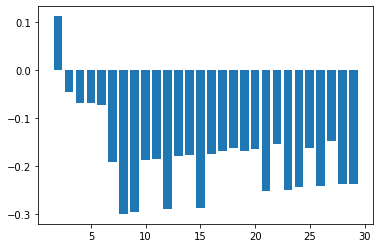

380-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 42ms/step - loss: 0.6879 - val_loss: 0.6708
Epoch 2/100
132/132 [==============================] - 0s 122us/step - loss: 0.6578 - val_loss: 0.6151
Epoch 3/100
132/132 [==============================] - 0s 110us/step - loss: 0.5839 - val_loss: 0.4956
Epoch 4/100
132/132 [==============================] - 0s 108us/step - loss: 0.4557 - val_loss: 0.3126
Epoch 5/100
132/132 [==============================] - 0s 110us/step - loss: 0.3131 - val_loss: 0.1549
Epoch 6/100
132/132 [==============================] - 0s 110us/step - loss: 0.2069 - val_loss: 0.0958
Epoch 7/100
132/132 [==============================] - 0s 107us/step - loss: 0.1736 - val_loss: 0.0901
Epoch 8/100
132/132 [==============================] - 0s 108us/step - loss: 0.1496 - val_loss: 0.0942
(165, 170)


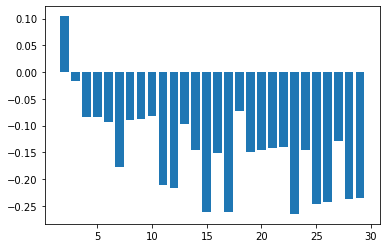

380-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 42ms/step - loss: 0.6885 - val_loss: 0.6730
Epoch 2/100
132/132 [==============================] - 0s 118us/step - loss: 0.6606 - val_loss: 0.6253
Epoch 3/100
132/132 [==============================] - 0s 115us/step - loss: 0.5978 - val_loss: 0.5221
Epoch 4/100
132/132 [==============================] - 0s 106us/step - loss: 0.4759 - val_loss: 0.3531
Epoch 5/100
132/132 [==============================] - 0s 107us/step - loss: 0.3233 - val_loss: 0.1792
Epoch 6/100
132/132 [==============================] - 0s 106us/step - loss: 0.2119 - val_loss: 0.0984
Epoch 7/100
132/132 [==============================] - 0s 106us/step - loss: 0.1812 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 109us/step - loss: 0.1654 - val_loss: 0.0934
(165, 160)


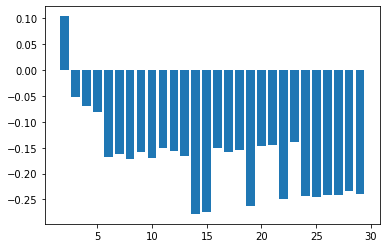

380-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 43ms/step - loss: 0.6884 - val_loss: 0.6727
Epoch 2/100
132/132 [==============================] - 0s 115us/step - loss: 0.6605 - val_loss: 0.6240
Epoch 3/100
132/132 [==============================] - 0s 111us/step - loss: 0.5961 - val_loss: 0.5219
Epoch 4/100
132/132 [==============================] - 0s 109us/step - loss: 0.4792 - val_loss: 0.3585
Epoch 5/100
132/132 [==============================] - 0s 107us/step - loss: 0.3322 - val_loss: 0.1904
Epoch 6/100
132/132 [==============================] - 0s 106us/step - loss: 0.2216 - val_loss: 0.1051
Epoch 7/100
132/132 [==============================] - 0s 105us/step - loss: 0.1817 - val_loss: 0.0898
Epoch 8/100
132/132 [==============================] - 0s 108us/step - loss: 0.1617 - val_loss: 0.0928
(165, 150)


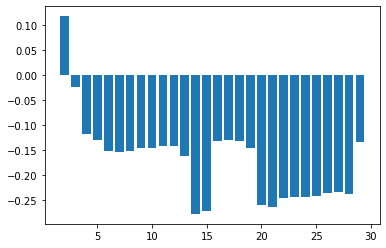

380-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 43ms/step - loss: 0.6908 - val_loss: 0.6792
Epoch 2/100
132/132 [==============================] - 0s 120us/step - loss: 0.6707 - val_loss: 0.6446
Epoch 3/100
132/132 [==============================] - 0s 111us/step - loss: 0.6234 - val_loss: 0.5659
Epoch 4/100
132/132 [==============================] - 0s 115us/step - loss: 0.5267 - val_loss: 0.4239
Epoch 5/100
132/132 [==============================] - 0s 110us/step - loss: 0.3879 - val_loss: 0.2452
Epoch 6/100
132/132 [==============================] - 0s 107us/step - loss: 0.2517 - val_loss: 0.1222
Epoch 7/100
132/132 [==============================] - 0s 107us/step - loss: 0.1857 - val_loss: 0.0894
Epoch 8/100
132/132 [==============================] - 0s 108us/step - loss: 0.1682 - val_loss: 0.0909
(165, 140)


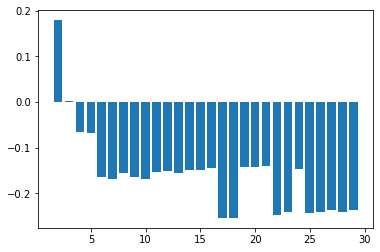

380-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 44ms/step - loss: 0.6875 - val_loss: 0.6717
Epoch 2/100
132/132 [==============================] - 0s 130us/step - loss: 0.6581 - val_loss: 0.6226
Epoch 3/100
132/132 [==============================] - 0s 113us/step - loss: 0.5921 - val_loss: 0.5208
Epoch 4/100
132/132 [==============================] - 0s 111us/step - loss: 0.4785 - val_loss: 0.3593
Epoch 5/100
132/132 [==============================] - 0s 110us/step - loss: 0.3291 - val_loss: 0.1930
Epoch 6/100
132/132 [==============================] - 0s 108us/step - loss: 0.2280 - val_loss: 0.1072
Epoch 7/100
132/132 [==============================] - 0s 114us/step - loss: 0.1830 - val_loss: 0.0915
Epoch 8/100
132/132 [==============================] - 0s 118us/step - loss: 0.1653 - val_loss: 0.0945
(165, 130)


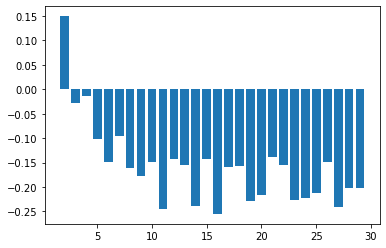

380-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 44ms/step - loss: 0.6883 - val_loss: 0.6735
Epoch 2/100
132/132 [==============================] - 0s 112us/step - loss: 0.6629 - val_loss: 0.6293
Epoch 3/100
132/132 [==============================] - 0s 109us/step - loss: 0.6017 - val_loss: 0.5366
Epoch 4/100
132/132 [==============================] - 0s 113us/step - loss: 0.4981 - val_loss: 0.3847
Epoch 5/100
132/132 [==============================] - 0s 114us/step - loss: 0.3579 - val_loss: 0.2166
Epoch 6/100
132/132 [==============================] - 0s 126us/step - loss: 0.2439 - val_loss: 0.1163
Epoch 7/100
132/132 [==============================] - 0s 109us/step - loss: 0.1859 - val_loss: 0.0912
Epoch 8/100
132/132 [==============================] - 0s 111us/step - loss: 0.1611 - val_loss: 0.0913
(165, 120)


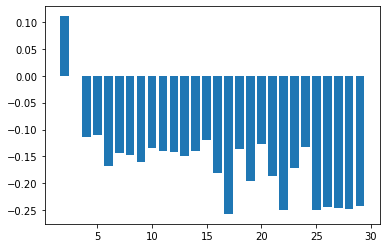

380-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 44ms/step - loss: 0.6882 - val_loss: 0.6738
Epoch 2/100
132/132 [==============================] - 0s 119us/step - loss: 0.6629 - val_loss: 0.6305
Epoch 3/100
132/132 [==============================] - 0s 116us/step - loss: 0.6043 - val_loss: 0.5408
Epoch 4/100
132/132 [==============================] - 0s 111us/step - loss: 0.5040 - val_loss: 0.3951
Epoch 5/100
132/132 [==============================] - 0s 113us/step - loss: 0.3609 - val_loss: 0.2299
Epoch 6/100
132/132 [==============================] - 0s 106us/step - loss: 0.2498 - val_loss: 0.1220
Epoch 7/100
132/132 [==============================] - 0s 110us/step - loss: 0.1925 - val_loss: 0.0920
Epoch 8/100
132/132 [==============================] - 0s 111us/step - loss: 0.1685 - val_loss: 0.0911
Epoch 9/100
132/132 [==============================] - 0s 110us/step - loss: 0.1458 - val_loss: 0.0944
(165, 110)


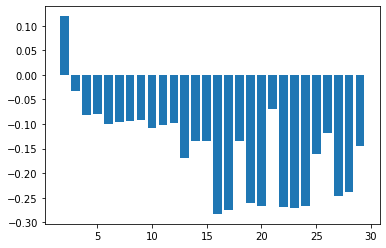

380-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 45ms/step - loss: 0.6895 - val_loss: 0.6775
Epoch 2/100
132/132 [==============================] - 0s 123us/step - loss: 0.6682 - val_loss: 0.6418
Epoch 3/100
132/132 [==============================] - 0s 119us/step - loss: 0.6205 - val_loss: 0.5650
Epoch 4/100
132/132 [==============================] - 0s 111us/step - loss: 0.5263 - val_loss: 0.4318
Epoch 5/100
132/132 [==============================] - 0s 109us/step - loss: 0.3927 - val_loss: 0.2633
Epoch 6/100
132/132 [==============================] - 0s 114us/step - loss: 0.2652 - val_loss: 0.1351
Epoch 7/100
132/132 [==============================] - 0s 111us/step - loss: 0.1904 - val_loss: 0.0899
Epoch 8/100
132/132 [==============================] - 0s 107us/step - loss: 0.1699 - val_loss: 0.0862
Epoch 9/100
132/132 [==============================] - 0s 111us/step - loss: 0.1596 - val_loss: 0.0895
(165, 100)


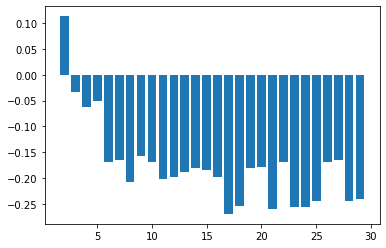

380-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 46ms/step - loss: 0.6882 - val_loss: 0.6727
Epoch 2/100
132/132 [==============================] - 0s 123us/step - loss: 0.6609 - val_loss: 0.6293
Epoch 3/100
132/132 [==============================] - 0s 116us/step - loss: 0.6040 - val_loss: 0.5431
Epoch 4/100
132/132 [==============================] - 0s 118us/step - loss: 0.5049 - val_loss: 0.4049
Epoch 5/100
132/132 [==============================] - 0s 116us/step - loss: 0.3790 - val_loss: 0.2441
Epoch 6/100
132/132 [==============================] - 0s 107us/step - loss: 0.2544 - val_loss: 0.1316
Epoch 7/100
132/132 [==============================] - 0s 110us/step - loss: 0.1870 - val_loss: 0.0924
Epoch 8/100
132/132 [==============================] - 0s 112us/step - loss: 0.1650 - val_loss: 0.0890
Epoch 9/100
132/132 [==============================] - 0s 111us/step - loss: 0.1440 - val_loss: 0.0919
(165, 90)


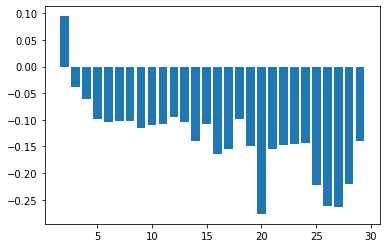

380-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 46ms/step - loss: 0.6902 - val_loss: 0.6792
Epoch 2/100
132/132 [==============================] - 0s 125us/step - loss: 0.6708 - val_loss: 0.6472
Epoch 3/100
132/132 [==============================] - 0s 113us/step - loss: 0.6267 - val_loss: 0.5790
Epoch 4/100
132/132 [==============================] - 0s 113us/step - loss: 0.5440 - val_loss: 0.4598
Epoch 5/100
132/132 [==============================] - 0s 113us/step - loss: 0.4217 - val_loss: 0.3025
Epoch 6/100
132/132 [==============================] - 0s 115us/step - loss: 0.2958 - val_loss: 0.1666
Epoch 7/100
132/132 [==============================] - 0s 111us/step - loss: 0.2083 - val_loss: 0.1040
Epoch 8/100
132/132 [==============================] - 0s 113us/step - loss: 0.1731 - val_loss: 0.0906
Epoch 9/100
132/132 [==============================] - 0s 112us/step - loss: 0.1467 - val_loss: 0.0916
(165, 80)


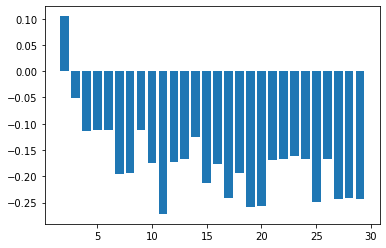

380-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 47ms/step - loss: 0.6908 - val_loss: 0.6808
Epoch 2/100
132/132 [==============================] - 0s 122us/step - loss: 0.6740 - val_loss: 0.6538
Epoch 3/100
132/132 [==============================] - 0s 115us/step - loss: 0.6369 - val_loss: 0.5974
Epoch 4/100
132/132 [==============================] - 0s 113us/step - loss: 0.5647 - val_loss: 0.4959
Epoch 5/100
132/132 [==============================] - 0s 113us/step - loss: 0.4635 - val_loss: 0.3499
Epoch 6/100
132/132 [==============================] - 0s 112us/step - loss: 0.3248 - val_loss: 0.2042
Epoch 7/100
132/132 [==============================] - 0s 117us/step - loss: 0.2278 - val_loss: 0.1136
Epoch 8/100
132/132 [==============================] - 0s 114us/step - loss: 0.1805 - val_loss: 0.0886
Epoch 9/100
132/132 [==============================] - 0s 113us/step - loss: 0.1584 - val_loss: 0.0883
Epoch 10/100
132/13

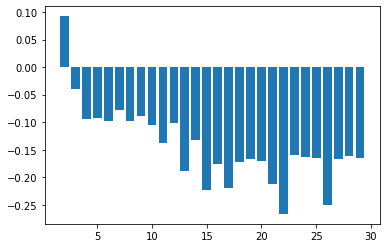

380-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 47ms/step - loss: 0.6911 - val_loss: 0.6819
Epoch 2/100
132/132 [==============================] - 0s 123us/step - loss: 0.6757 - val_loss: 0.6575
Epoch 3/100
132/132 [==============================] - 0s 116us/step - loss: 0.6432 - val_loss: 0.6067
Epoch 4/100
132/132 [==============================] - 0s 110us/step - loss: 0.5807 - val_loss: 0.5162
Epoch 5/100
132/132 [==============================] - 0s 110us/step - loss: 0.4798 - val_loss: 0.3840
Epoch 6/100
132/132 [==============================] - 0s 116us/step - loss: 0.3570 - val_loss: 0.2363
Epoch 7/100
132/132 [==============================] - 0s 111us/step - loss: 0.2352 - val_loss: 0.1323
Epoch 8/100
132/132 [==============================] - 0s 113us/step - loss: 0.1734 - val_loss: 0.0917
Epoch 9/100
132/132 [==============================] - 0s 111us/step - loss: 0.1477 - val_loss: 0.0872
Epoch 10/100
132/13

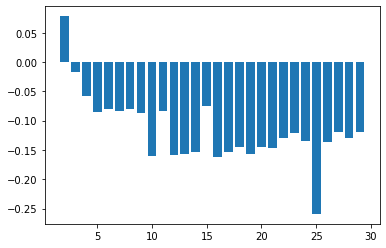

380-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 48ms/step - loss: 0.6891 - val_loss: 0.6789
Epoch 2/100
132/132 [==============================] - 0s 124us/step - loss: 0.6699 - val_loss: 0.6496
Epoch 3/100
132/132 [==============================] - 0s 115us/step - loss: 0.6298 - val_loss: 0.5897
Epoch 4/100
132/132 [==============================] - 0s 114us/step - loss: 0.5544 - val_loss: 0.4879
Epoch 5/100
132/132 [==============================] - 0s 113us/step - loss: 0.4469 - val_loss: 0.3478
Epoch 6/100
132/132 [==============================] - 0s 111us/step - loss: 0.3278 - val_loss: 0.2084
Epoch 7/100
132/132 [==============================] - 0s 115us/step - loss: 0.2283 - val_loss: 0.1224
Epoch 8/100
132/132 [==============================] - 0s 116us/step - loss: 0.1803 - val_loss: 0.0910
Epoch 9/100
132/132 [==============================] - 0s 113us/step - loss: 0.1574 - val_loss: 0.0866
Epoch 10/100
132/13

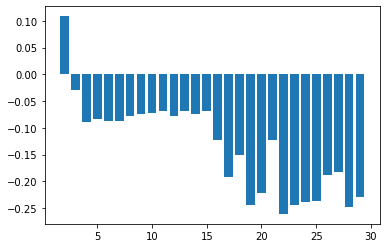

380-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 6s 48ms/step - loss: 0.6909 - val_loss: 0.6835
Epoch 2/100
132/132 [==============================] - 0s 123us/step - loss: 0.6770 - val_loss: 0.6628
Epoch 3/100
132/132 [==============================] - 0s 117us/step - loss: 0.6481 - val_loss: 0.6209
Epoch 4/100
132/132 [==============================] - 0s 115us/step - loss: 0.5932 - val_loss: 0.5463
Epoch 5/100
132/132 [==============================] - 0s 116us/step - loss: 0.5106 - val_loss: 0.4321
Epoch 6/100
132/132 [==============================] - 0s 114us/step - loss: 0.3947 - val_loss: 0.2951
Epoch 7/100
132/132 [==============================] - 0s 115us/step - loss: 0.2970 - val_loss: 0.1758
Epoch 8/100
132/132 [==============================] - 0s 110us/step - loss: 0.2172 - val_loss: 0.1138
Epoch 9/100
132/132 [==============================] - 0s 110us/step - loss: 0.1761 - val_loss: 0.0926
Epoch 10/100
132/13

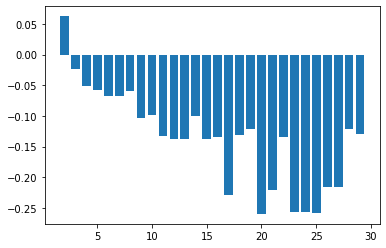

380-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 49ms/step - loss: 0.6900 - val_loss: 0.6815
Epoch 2/100
132/132 [==============================] - 0s 124us/step - loss: 0.6743 - val_loss: 0.6573
Epoch 3/100
132/132 [==============================] - 0s 126us/step - loss: 0.6415 - val_loss: 0.6100
Epoch 4/100
132/132 [==============================] - 0s 118us/step - loss: 0.5815 - val_loss: 0.5303
Epoch 5/100
132/132 [==============================] - 0s 115us/step - loss: 0.4905 - val_loss: 0.4156
Epoch 6/100
132/132 [==============================] - 0s 116us/step - loss: 0.3797 - val_loss: 0.2815
Epoch 7/100
132/132 [==============================] - 0s 113us/step - loss: 0.2776 - val_loss: 0.1681
Epoch 8/100
132/132 [==============================] - 0s 111us/step - loss: 0.2040 - val_loss: 0.1092
Epoch 9/100
132/132 [==============================] - 0s 116us/step - loss: 0.1684 - val_loss: 0.0893
Epoch 10/100
132/13

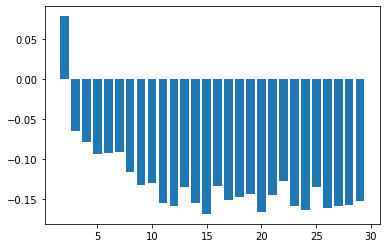

380-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 49ms/step - loss: 0.6907 - val_loss: 0.6833
Epoch 2/100
132/132 [==============================] - 0s 126us/step - loss: 0.6769 - val_loss: 0.6627
Epoch 3/100
132/132 [==============================] - 0s 117us/step - loss: 0.6466 - val_loss: 0.6236
Epoch 4/100
132/132 [==============================] - 0s 117us/step - loss: 0.5964 - val_loss: 0.5593
Epoch 5/100
132/132 [==============================] - 0s 118us/step - loss: 0.5220 - val_loss: 0.4673
Epoch 6/100
132/132 [==============================] - 0s 122us/step - loss: 0.4296 - val_loss: 0.3537
Epoch 7/100
132/132 [==============================] - 0s 115us/step - loss: 0.3297 - val_loss: 0.2400
Epoch 8/100
132/132 [==============================] - 0s 112us/step - loss: 0.2445 - val_loss: 0.1535
Epoch 9/100
132/132 [==============================] - 0s 114us/step - loss: 0.1925 - val_loss: 0.1070
Epoch 10/100
132/13

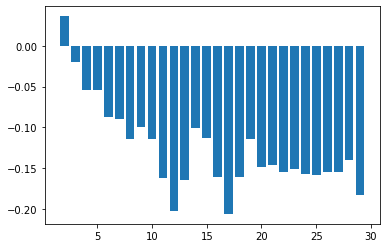

380-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 50ms/step - loss: 0.6911 - val_loss: 0.6856
Epoch 2/100
132/132 [==============================] - 0s 126us/step - loss: 0.6801 - val_loss: 0.6700
Epoch 3/100
132/132 [==============================] - 0s 124us/step - loss: 0.6564 - val_loss: 0.6411
Epoch 4/100
132/132 [==============================] - 0s 116us/step - loss: 0.6182 - val_loss: 0.5934
Epoch 5/100
132/132 [==============================] - 0s 115us/step - loss: 0.5577 - val_loss: 0.5238
Epoch 6/100
132/132 [==============================] - 0s 117us/step - loss: 0.4807 - val_loss: 0.4319
Epoch 7/100
132/132 [==============================] - 0s 113us/step - loss: 0.3916 - val_loss: 0.3264
Epoch 8/100
132/132 [==============================] - 0s 113us/step - loss: 0.3012 - val_loss: 0.2273
Epoch 9/100
132/132 [==============================] - 0s 114us/step - loss: 0.2289 - val_loss: 0.1533
Epoch 10/100
132/13

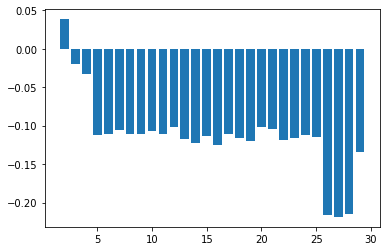

370-360dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 50ms/step - loss: 0.6850 - val_loss: 0.6602
Epoch 2/100
132/132 [==============================] - 0s 137us/step - loss: 0.6389 - val_loss: 0.5728
Epoch 3/100
132/132 [==============================] - 0s 125us/step - loss: 0.5289 - val_loss: 0.3973
Epoch 4/100
132/132 [==============================] - 0s 122us/step - loss: 0.3632 - val_loss: 0.1943
Epoch 5/100
132/132 [==============================] - 0s 122us/step - loss: 0.2222 - val_loss: 0.0999
Epoch 6/100
132/132 [==============================] - 0s 121us/step - loss: 0.1805 - val_loss: 0.0931
Epoch 7/100
132/132 [==============================] - 0s 123us/step - loss: 0.1657 - val_loss: 0.0985
(165, 360)


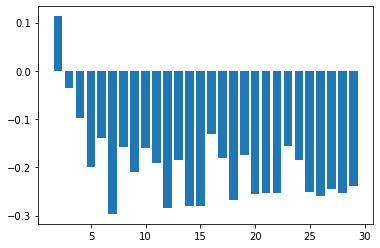

370-350dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 51ms/step - loss: 0.6874 - val_loss: 0.6652
Epoch 2/100
132/132 [==============================] - 0s 134us/step - loss: 0.6482 - val_loss: 0.5902
Epoch 3/100
132/132 [==============================] - 0s 130us/step - loss: 0.5493 - val_loss: 0.4278
Epoch 4/100
132/132 [==============================] - 0s 123us/step - loss: 0.3852 - val_loss: 0.2167
Epoch 5/100
132/132 [==============================] - 0s 124us/step - loss: 0.2428 - val_loss: 0.1041
Epoch 6/100
132/132 [==============================] - 0s 122us/step - loss: 0.1892 - val_loss: 0.0932
Epoch 7/100
132/132 [==============================] - 0s 120us/step - loss: 0.1659 - val_loss: 0.0995
(165, 350)


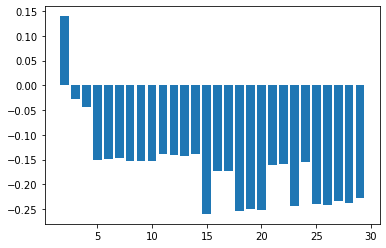

370-340dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 51ms/step - loss: 0.6889 - val_loss: 0.6707
Epoch 2/100
132/132 [==============================] - 0s 129us/step - loss: 0.6561 - val_loss: 0.6072
Epoch 3/100
132/132 [==============================] - 0s 126us/step - loss: 0.5702 - val_loss: 0.4620
Epoch 4/100
132/132 [==============================] - 0s 132us/step - loss: 0.4179 - val_loss: 0.2538
Epoch 5/100
132/132 [==============================] - 0s 120us/step - loss: 0.2603 - val_loss: 0.1173
Epoch 6/100
132/132 [==============================] - 0s 124us/step - loss: 0.1863 - val_loss: 0.0920
Epoch 7/100
132/132 [==============================] - 0s 121us/step - loss: 0.1645 - val_loss: 0.0973
(165, 340)


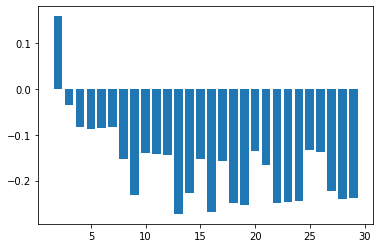

370-330dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 52ms/step - loss: 0.6874 - val_loss: 0.6662
Epoch 2/100
132/132 [==============================] - 0s 135us/step - loss: 0.6491 - val_loss: 0.5922
Epoch 3/100
132/132 [==============================] - 0s 131us/step - loss: 0.5509 - val_loss: 0.4318
Epoch 4/100
132/132 [==============================] - 0s 126us/step - loss: 0.3837 - val_loss: 0.2210
Epoch 5/100
132/132 [==============================] - 0s 122us/step - loss: 0.2309 - val_loss: 0.1045
Epoch 6/100
132/132 [==============================] - 0s 127us/step - loss: 0.1869 - val_loss: 0.0918
Epoch 7/100
132/132 [==============================] - 0s 125us/step - loss: 0.1779 - val_loss: 0.0986
(165, 330)


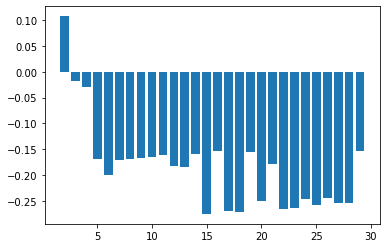

370-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 53ms/step - loss: 0.6869 - val_loss: 0.6660
Epoch 2/100
132/132 [==============================] - 0s 137us/step - loss: 0.6491 - val_loss: 0.5943
Epoch 3/100
132/132 [==============================] - 0s 124us/step - loss: 0.5561 - val_loss: 0.4398
Epoch 4/100
132/132 [==============================] - 0s 126us/step - loss: 0.4100 - val_loss: 0.2354
Epoch 5/100
132/132 [==============================] - 0s 131us/step - loss: 0.2569 - val_loss: 0.1139
Epoch 6/100
132/132 [==============================] - 0s 129us/step - loss: 0.1875 - val_loss: 0.0915
Epoch 7/100
132/132 [==============================] - 0s 128us/step - loss: 0.1676 - val_loss: 0.0965
(165, 320)


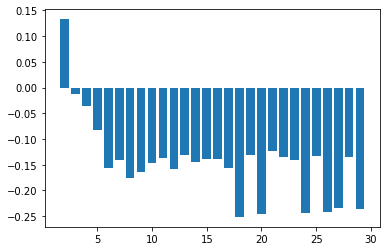

370-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 53ms/step - loss: 0.6876 - val_loss: 0.6687
Epoch 2/100
132/132 [==============================] - 0s 134us/step - loss: 0.6515 - val_loss: 0.6023
Epoch 3/100
132/132 [==============================] - 0s 128us/step - loss: 0.5647 - val_loss: 0.4581
Epoch 4/100
132/132 [==============================] - 0s 126us/step - loss: 0.4061 - val_loss: 0.2537
Epoch 5/100
132/132 [==============================] - 0s 121us/step - loss: 0.2502 - val_loss: 0.1164
Epoch 6/100
132/132 [==============================] - 0s 123us/step - loss: 0.1967 - val_loss: 0.0921
Epoch 7/100
132/132 [==============================] - 0s 123us/step - loss: 0.1805 - val_loss: 0.0998
(165, 310)


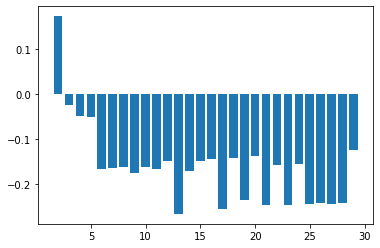

370-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 56ms/step - loss: 0.6863 - val_loss: 0.6633
Epoch 2/100
132/132 [==============================] - 0s 138us/step - loss: 0.6439 - val_loss: 0.5842
Epoch 3/100
132/132 [==============================] - 0s 127us/step - loss: 0.5465 - val_loss: 0.4188
Epoch 4/100
132/132 [==============================] - 0s 126us/step - loss: 0.3794 - val_loss: 0.2139
Epoch 5/100
132/132 [==============================] - 0s 128us/step - loss: 0.2355 - val_loss: 0.1045
Epoch 6/100
132/132 [==============================] - 0s 127us/step - loss: 0.1754 - val_loss: 0.0925
Epoch 7/100
132/132 [==============================] - 0s 128us/step - loss: 0.1612 - val_loss: 0.0990
(165, 300)


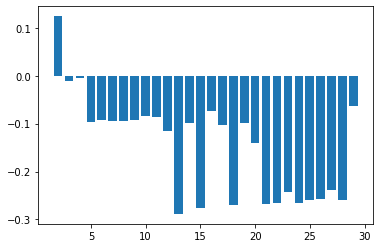

370-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 56ms/step - loss: 0.6877 - val_loss: 0.6675
Epoch 2/100
132/132 [==============================] - 0s 143us/step - loss: 0.6516 - val_loss: 0.6003
Epoch 3/100
132/132 [==============================] - 0s 132us/step - loss: 0.5616 - val_loss: 0.4557
Epoch 4/100
132/132 [==============================] - 0s 127us/step - loss: 0.4075 - val_loss: 0.2520
Epoch 5/100
132/132 [==============================] - 0s 130us/step - loss: 0.2559 - val_loss: 0.1149
Epoch 6/100
132/132 [==============================] - 0s 130us/step - loss: 0.1901 - val_loss: 0.0897
Epoch 7/100
132/132 [==============================] - 0s 124us/step - loss: 0.1708 - val_loss: 0.0950
(165, 290)


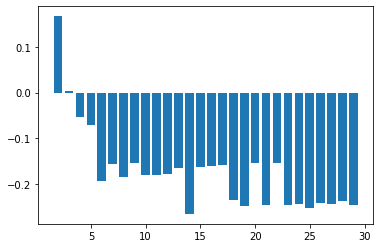

370-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 56ms/step - loss: 0.6882 - val_loss: 0.6699
Epoch 2/100
132/132 [==============================] - 0s 137us/step - loss: 0.6549 - val_loss: 0.6068
Epoch 3/100
132/132 [==============================] - 0s 126us/step - loss: 0.5691 - val_loss: 0.4640
Epoch 4/100
132/132 [==============================] - 0s 126us/step - loss: 0.4132 - val_loss: 0.2567
Epoch 5/100
132/132 [==============================] - 0s 127us/step - loss: 0.2613 - val_loss: 0.1164
Epoch 6/100
132/132 [==============================] - 0s 123us/step - loss: 0.1907 - val_loss: 0.0895
Epoch 7/100
132/132 [==============================] - 0s 123us/step - loss: 0.1813 - val_loss: 0.0963
(165, 280)


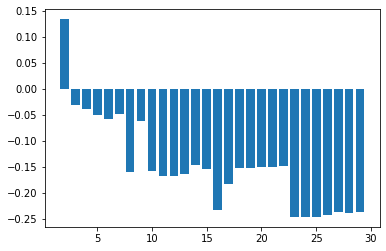

370-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 7s 56ms/step - loss: 0.6856 - val_loss: 0.6632
Epoch 2/100
132/132 [==============================] - 0s 138us/step - loss: 0.6450 - val_loss: 0.5891
Epoch 3/100
132/132 [==============================] - 0s 137us/step - loss: 0.5512 - val_loss: 0.4359
Epoch 4/100
132/132 [==============================] - 0s 126us/step - loss: 0.3904 - val_loss: 0.2339
Epoch 5/100
132/132 [==============================] - 0s 129us/step - loss: 0.2460 - val_loss: 0.1081
Epoch 6/100
132/132 [==============================] - 0s 129us/step - loss: 0.1839 - val_loss: 0.0873
Epoch 7/100
132/132 [==============================] - 0s 126us/step - loss: 0.1682 - val_loss: 0.0925
(165, 270)


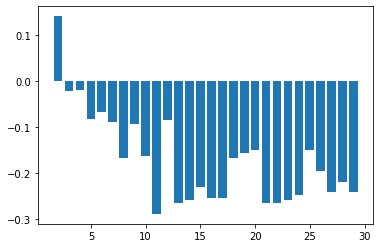

370-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 57ms/step - loss: 0.6868 - val_loss: 0.6673
Epoch 2/100
132/132 [==============================] - 0s 138us/step - loss: 0.6507 - val_loss: 0.6004
Epoch 3/100
132/132 [==============================] - 0s 129us/step - loss: 0.5588 - val_loss: 0.4577
Epoch 4/100
132/132 [==============================] - 0s 127us/step - loss: 0.4039 - val_loss: 0.2568
Epoch 5/100
132/132 [==============================] - 0s 131us/step - loss: 0.2619 - val_loss: 0.1196
Epoch 6/100
132/132 [==============================] - 0s 127us/step - loss: 0.1888 - val_loss: 0.0912
Epoch 7/100
132/132 [==============================] - 0s 128us/step - loss: 0.1690 - val_loss: 0.0946
(165, 260)


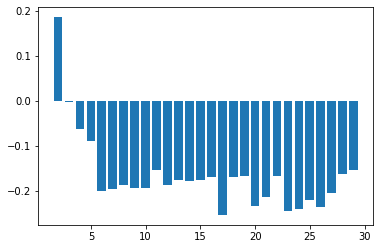

370-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 57ms/step - loss: 0.6881 - val_loss: 0.6691
Epoch 2/100
132/132 [==============================] - 0s 136us/step - loss: 0.6554 - val_loss: 0.6064
Epoch 3/100
132/132 [==============================] - 0s 135us/step - loss: 0.5732 - val_loss: 0.4684
Epoch 4/100
132/132 [==============================] - 0s 130us/step - loss: 0.4256 - val_loss: 0.2662
Epoch 5/100
132/132 [==============================] - 0s 131us/step - loss: 0.2650 - val_loss: 0.1204
Epoch 6/100
132/132 [==============================] - 0s 130us/step - loss: 0.1919 - val_loss: 0.0898
Epoch 7/100
132/132 [==============================] - 0s 130us/step - loss: 0.1770 - val_loss: 0.0985
(165, 250)


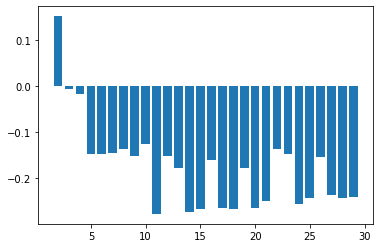

370-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 58ms/step - loss: 0.6885 - val_loss: 0.6715
Epoch 2/100
132/132 [==============================] - 0s 140us/step - loss: 0.6578 - val_loss: 0.6165
Epoch 3/100
132/132 [==============================] - 0s 132us/step - loss: 0.5856 - val_loss: 0.4948
Epoch 4/100
132/132 [==============================] - 0s 130us/step - loss: 0.4436 - val_loss: 0.3048
Epoch 5/100
132/132 [==============================] - 0s 132us/step - loss: 0.2897 - val_loss: 0.1405
Epoch 6/100
132/132 [==============================] - 0s 132us/step - loss: 0.1984 - val_loss: 0.0889
Epoch 7/100
132/132 [==============================] - 0s 127us/step - loss: 0.1773 - val_loss: 0.0902
(165, 240)


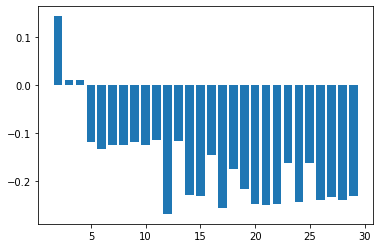

370-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 58ms/step - loss: 0.6875 - val_loss: 0.6701
Epoch 2/100
132/132 [==============================] - 0s 145us/step - loss: 0.6557 - val_loss: 0.6118
Epoch 3/100
132/132 [==============================] - 0s 136us/step - loss: 0.5797 - val_loss: 0.4831
Epoch 4/100
132/132 [==============================] - 0s 132us/step - loss: 0.4414 - val_loss: 0.2882
Epoch 5/100
132/132 [==============================] - 0s 134us/step - loss: 0.2806 - val_loss: 0.1336
Epoch 6/100
132/132 [==============================] - 0s 130us/step - loss: 0.2055 - val_loss: 0.0908
Epoch 7/100
132/132 [==============================] - 0s 126us/step - loss: 0.1911 - val_loss: 0.0957
(165, 230)


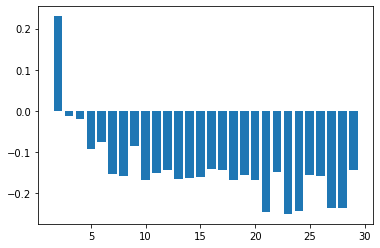

370-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 59ms/step - loss: 0.6862 - val_loss: 0.6668
Epoch 2/100
132/132 [==============================] - 0s 137us/step - loss: 0.6497 - val_loss: 0.6014
Epoch 3/100
132/132 [==============================] - 0s 133us/step - loss: 0.5606 - val_loss: 0.4616
Epoch 4/100
132/132 [==============================] - 0s 132us/step - loss: 0.4181 - val_loss: 0.2660
Epoch 5/100
132/132 [==============================] - 0s 134us/step - loss: 0.2601 - val_loss: 0.1270
Epoch 6/100
132/132 [==============================] - 0s 128us/step - loss: 0.1850 - val_loss: 0.0900
Epoch 7/100
132/132 [==============================] - 0s 132us/step - loss: 0.1625 - val_loss: 0.0918
(165, 220)


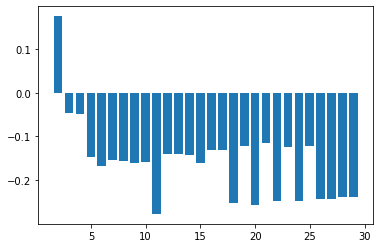

370-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 59ms/step - loss: 0.6896 - val_loss: 0.6749
Epoch 2/100
132/132 [==============================] - 0s 140us/step - loss: 0.6629 - val_loss: 0.6286
Epoch 3/100
132/132 [==============================] - 0s 134us/step - loss: 0.5984 - val_loss: 0.5226
Epoch 4/100
132/132 [==============================] - 0s 140us/step - loss: 0.4744 - val_loss: 0.3435
Epoch 5/100
132/132 [==============================] - 0s 133us/step - loss: 0.3204 - val_loss: 0.1663
Epoch 6/100
132/132 [==============================] - 0s 141us/step - loss: 0.2086 - val_loss: 0.0940
Epoch 7/100
132/132 [==============================] - 0s 136us/step - loss: 0.1697 - val_loss: 0.0877
Epoch 8/100
132/132 [==============================] - 0s 137us/step - loss: 0.1527 - val_loss: 0.0927
(165, 210)


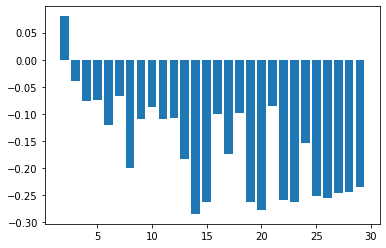

370-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 60ms/step - loss: 0.6889 - val_loss: 0.6725
Epoch 2/100
132/132 [==============================] - 0s 142us/step - loss: 0.6608 - val_loss: 0.6214
Epoch 3/100
132/132 [==============================] - 0s 135us/step - loss: 0.5939 - val_loss: 0.5101
Epoch 4/100
132/132 [==============================] - 0s 130us/step - loss: 0.4684 - val_loss: 0.3322
Epoch 5/100
132/132 [==============================] - 0s 134us/step - loss: 0.3055 - val_loss: 0.1623
Epoch 6/100
132/132 [==============================] - 0s 132us/step - loss: 0.2095 - val_loss: 0.0951
Epoch 7/100
132/132 [==============================] - 0s 133us/step - loss: 0.1750 - val_loss: 0.0924
Epoch 8/100
132/132 [==============================] - 0s 129us/step - loss: 0.1575 - val_loss: 0.0970
(165, 200)


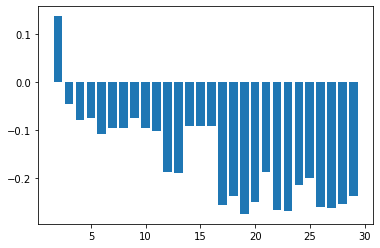

370-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 61ms/step - loss: 0.6878 - val_loss: 0.6712
Epoch 2/100
132/132 [==============================] - 0s 145us/step - loss: 0.6581 - val_loss: 0.6170
Epoch 3/100
132/132 [==============================] - 0s 132us/step - loss: 0.5855 - val_loss: 0.4994
Epoch 4/100
132/132 [==============================] - 0s 132us/step - loss: 0.4529 - val_loss: 0.3164
Epoch 5/100
132/132 [==============================] - 0s 135us/step - loss: 0.2893 - val_loss: 0.1510
Epoch 6/100
132/132 [==============================] - 0s 134us/step - loss: 0.1951 - val_loss: 0.0907
Epoch 7/100
132/132 [==============================] - 0s 131us/step - loss: 0.1655 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 133us/step - loss: 0.1492 - val_loss: 0.0944
(165, 190)


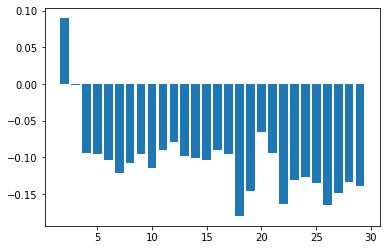

370-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 61ms/step - loss: 0.6885 - val_loss: 0.6715
Epoch 2/100
132/132 [==============================] - 0s 141us/step - loss: 0.6589 - val_loss: 0.6203
Epoch 3/100
132/132 [==============================] - 0s 134us/step - loss: 0.5929 - val_loss: 0.5117
Epoch 4/100
132/132 [==============================] - 0s 133us/step - loss: 0.4721 - val_loss: 0.3405
Epoch 5/100
132/132 [==============================] - 0s 127us/step - loss: 0.3200 - val_loss: 0.1726
Epoch 6/100
132/132 [==============================] - 0s 132us/step - loss: 0.2124 - val_loss: 0.0974
Epoch 7/100
132/132 [==============================] - 0s 133us/step - loss: 0.1794 - val_loss: 0.0885
Epoch 8/100
132/132 [==============================] - 0s 132us/step - loss: 0.1584 - val_loss: 0.0921
(165, 180)


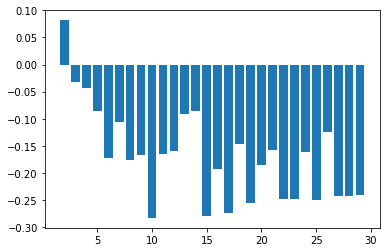

370-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 62ms/step - loss: 0.6873 - val_loss: 0.6700
Epoch 2/100
132/132 [==============================] - 0s 147us/step - loss: 0.6578 - val_loss: 0.6146
Epoch 3/100
132/132 [==============================] - 0s 137us/step - loss: 0.5836 - val_loss: 0.4942
Epoch 4/100
132/132 [==============================] - 0s 138us/step - loss: 0.4608 - val_loss: 0.3093
Epoch 5/100
132/132 [==============================] - 0s 134us/step - loss: 0.3055 - val_loss: 0.1501
Epoch 6/100
132/132 [==============================] - 0s 132us/step - loss: 0.2005 - val_loss: 0.0924
Epoch 7/100
132/132 [==============================] - 0s 129us/step - loss: 0.1703 - val_loss: 0.0890
Epoch 8/100
132/132 [==============================] - 0s 135us/step - loss: 0.1496 - val_loss: 0.0942
(165, 170)


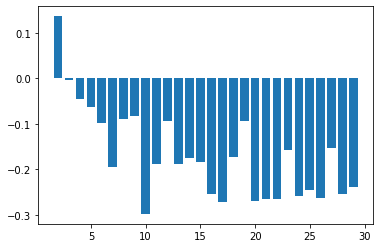

370-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 62ms/step - loss: 0.6890 - val_loss: 0.6750
Epoch 2/100
132/132 [==============================] - 0s 145us/step - loss: 0.6628 - val_loss: 0.6307
Epoch 3/100
132/132 [==============================] - 0s 137us/step - loss: 0.6013 - val_loss: 0.5310
Epoch 4/100
132/132 [==============================] - 0s 129us/step - loss: 0.4823 - val_loss: 0.3627
Epoch 5/100
132/132 [==============================] - 0s 137us/step - loss: 0.3319 - val_loss: 0.1851
Epoch 6/100
132/132 [==============================] - 0s 134us/step - loss: 0.2145 - val_loss: 0.0995
Epoch 7/100
132/132 [==============================] - 0s 132us/step - loss: 0.1799 - val_loss: 0.0867
Epoch 8/100
132/132 [==============================] - 0s 134us/step - loss: 0.1640 - val_loss: 0.0913
(165, 160)


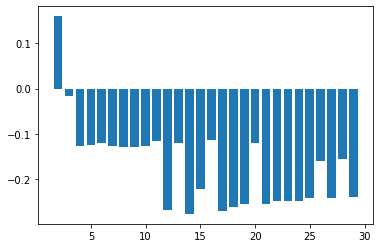

370-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 63ms/step - loss: 0.6901 - val_loss: 0.6777
Epoch 2/100
132/132 [==============================] - 0s 149us/step - loss: 0.6686 - val_loss: 0.6417
Epoch 3/100
132/132 [==============================] - 0s 137us/step - loss: 0.6201 - val_loss: 0.5625
Epoch 4/100
132/132 [==============================] - 0s 141us/step - loss: 0.5199 - val_loss: 0.4212
Epoch 5/100
132/132 [==============================] - 0s 136us/step - loss: 0.3920 - val_loss: 0.2437
Epoch 6/100
132/132 [==============================] - 0s 133us/step - loss: 0.2508 - val_loss: 0.1229
Epoch 7/100
132/132 [==============================] - 0s 131us/step - loss: 0.1828 - val_loss: 0.0887
Epoch 8/100
132/132 [==============================] - 0s 140us/step - loss: 0.1632 - val_loss: 0.0895
(165, 150)


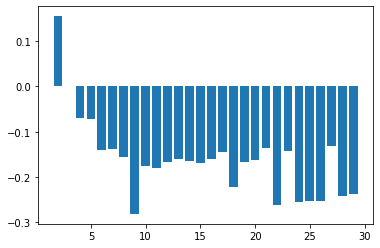

370-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 64ms/step - loss: 0.6898 - val_loss: 0.6767
Epoch 2/100
132/132 [==============================] - 0s 149us/step - loss: 0.6660 - val_loss: 0.6367
Epoch 3/100
132/132 [==============================] - 0s 142us/step - loss: 0.6125 - val_loss: 0.5484
Epoch 4/100
132/132 [==============================] - 0s 137us/step - loss: 0.5037 - val_loss: 0.3953
Epoch 5/100
132/132 [==============================] - 0s 137us/step - loss: 0.3689 - val_loss: 0.2183
Epoch 6/100
132/132 [==============================] - 0s 140us/step - loss: 0.2446 - val_loss: 0.1144
Epoch 7/100
132/132 [==============================] - 0s 148us/step - loss: 0.1889 - val_loss: 0.0885
Epoch 8/100
132/132 [==============================] - 0s 138us/step - loss: 0.1645 - val_loss: 0.0888
(165, 140)


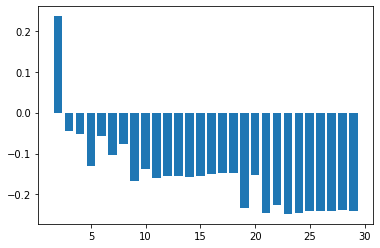

370-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 8s 64ms/step - loss: 0.6894 - val_loss: 0.6760
Epoch 2/100
132/132 [==============================] - 0s 145us/step - loss: 0.6651 - val_loss: 0.6347
Epoch 3/100
132/132 [==============================] - 0s 137us/step - loss: 0.6104 - val_loss: 0.5460
Epoch 4/100
132/132 [==============================] - 0s 140us/step - loss: 0.5081 - val_loss: 0.3972
Epoch 5/100
132/132 [==============================] - 0s 133us/step - loss: 0.3650 - val_loss: 0.2258
Epoch 6/100
132/132 [==============================] - 0s 135us/step - loss: 0.2408 - val_loss: 0.1167
Epoch 7/100
132/132 [==============================] - 0s 140us/step - loss: 0.1859 - val_loss: 0.0890
Epoch 8/100
132/132 [==============================] - 0s 139us/step - loss: 0.1689 - val_loss: 0.0912
(165, 130)


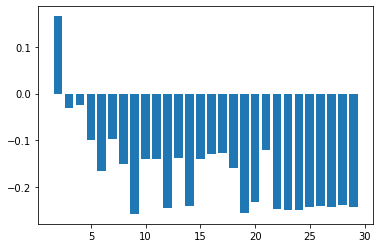

370-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 64ms/step - loss: 0.6897 - val_loss: 0.6778
Epoch 2/100
132/132 [==============================] - 0s 147us/step - loss: 0.6689 - val_loss: 0.6424
Epoch 3/100
132/132 [==============================] - 0s 140us/step - loss: 0.6218 - val_loss: 0.5666
Epoch 4/100
132/132 [==============================] - 0s 142us/step - loss: 0.5247 - val_loss: 0.4359
Epoch 5/100
132/132 [==============================] - 0s 131us/step - loss: 0.3953 - val_loss: 0.2681
Epoch 6/100
132/132 [==============================] - 0s 139us/step - loss: 0.2645 - val_loss: 0.1401
Epoch 7/100
132/132 [==============================] - 0s 135us/step - loss: 0.1879 - val_loss: 0.0944
Epoch 8/100
132/132 [==============================] - 0s 139us/step - loss: 0.1634 - val_loss: 0.0900
Epoch 9/100
132/132 [==============================] - 0s 136us/step - loss: 0.1462 - val_loss: 0.0927
(165, 120)


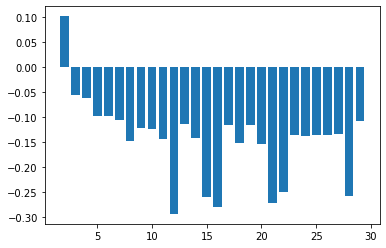

370-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 65ms/step - loss: 0.6891 - val_loss: 0.6758
Epoch 2/100
132/132 [==============================] - 0s 147us/step - loss: 0.6656 - val_loss: 0.6363
Epoch 3/100
132/132 [==============================] - 0s 139us/step - loss: 0.6129 - val_loss: 0.5524
Epoch 4/100
132/132 [==============================] - 0s 142us/step - loss: 0.5177 - val_loss: 0.4117
Epoch 5/100
132/132 [==============================] - 0s 138us/step - loss: 0.3811 - val_loss: 0.2441
Epoch 6/100
132/132 [==============================] - 0s 142us/step - loss: 0.2493 - val_loss: 0.1275
Epoch 7/100
132/132 [==============================] - 0s 137us/step - loss: 0.1889 - val_loss: 0.0898
Epoch 8/100
132/132 [==============================] - 0s 136us/step - loss: 0.1662 - val_loss: 0.0888
Epoch 9/100
132/132 [==============================] - 0s 141us/step - loss: 0.1435 - val_loss: 0.0919
(165, 110)


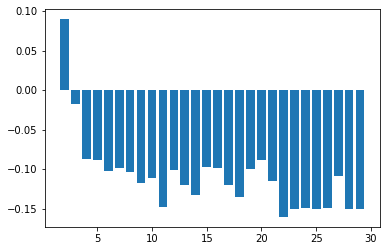

370-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 66ms/step - loss: 0.6894 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 149us/step - loss: 0.6660 - val_loss: 0.6380
Epoch 3/100
132/132 [==============================] - 0s 152us/step - loss: 0.6152 - val_loss: 0.5576
Epoch 4/100
132/132 [==============================] - 0s 139us/step - loss: 0.5164 - val_loss: 0.4220
Epoch 5/100
132/132 [==============================] - 0s 144us/step - loss: 0.3903 - val_loss: 0.2557
Epoch 6/100
132/132 [==============================] - 0s 138us/step - loss: 0.2586 - val_loss: 0.1352
Epoch 7/100
132/132 [==============================] - 0s 138us/step - loss: 0.1912 - val_loss: 0.0917
Epoch 8/100
132/132 [==============================] - 0s 140us/step - loss: 0.1678 - val_loss: 0.0884
Epoch 9/100
132/132 [==============================] - 0s 138us/step - loss: 0.1498 - val_loss: 0.0913
(165, 100)


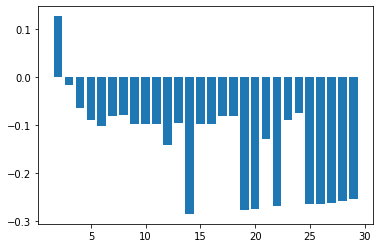

370-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 66ms/step - loss: 0.6895 - val_loss: 0.6774
Epoch 2/100
132/132 [==============================] - 0s 152us/step - loss: 0.6681 - val_loss: 0.6435
Epoch 3/100
132/132 [==============================] - 0s 142us/step - loss: 0.6235 - val_loss: 0.5728
Epoch 4/100
132/132 [==============================] - 0s 139us/step - loss: 0.5385 - val_loss: 0.4509
Epoch 5/100
132/132 [==============================] - 0s 140us/step - loss: 0.4139 - val_loss: 0.2896
Epoch 6/100
132/132 [==============================] - 0s 141us/step - loss: 0.2736 - val_loss: 0.1538
Epoch 7/100
132/132 [==============================] - 0s 138us/step - loss: 0.1968 - val_loss: 0.0939
Epoch 8/100
132/132 [==============================] - 0s 139us/step - loss: 0.1656 - val_loss: 0.0859
Epoch 9/100
132/132 [==============================] - 0s 135us/step - loss: 0.1431 - val_loss: 0.0887
(165, 90)


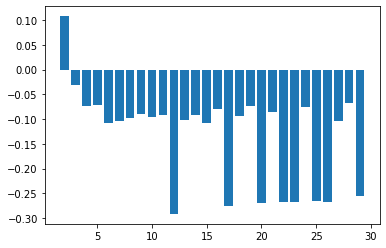

370-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 67ms/step - loss: 0.6904 - val_loss: 0.6794
Epoch 2/100
132/132 [==============================] - 0s 153us/step - loss: 0.6723 - val_loss: 0.6493
Epoch 3/100
132/132 [==============================] - 0s 143us/step - loss: 0.6328 - val_loss: 0.5876
Epoch 4/100
132/132 [==============================] - 0s 141us/step - loss: 0.5588 - val_loss: 0.4793
Epoch 5/100
132/132 [==============================] - 0s 137us/step - loss: 0.4414 - val_loss: 0.3294
Epoch 6/100
132/132 [==============================] - 0s 137us/step - loss: 0.3076 - val_loss: 0.1839
Epoch 7/100
132/132 [==============================] - 0s 140us/step - loss: 0.2124 - val_loss: 0.1043
Epoch 8/100
132/132 [==============================] - 0s 140us/step - loss: 0.1746 - val_loss: 0.0860
Epoch 9/100
132/132 [==============================] - 0s 142us/step - loss: 0.1539 - val_loss: 0.0877
(165, 80)


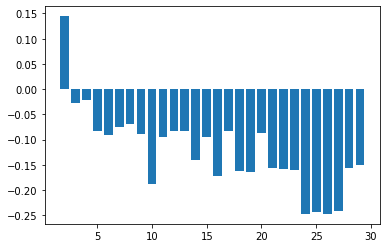

370-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 68ms/step - loss: 0.6890 - val_loss: 0.6766
Epoch 2/100
132/132 [==============================] - 0s 156us/step - loss: 0.6671 - val_loss: 0.6414
Epoch 3/100
132/132 [==============================] - 0s 142us/step - loss: 0.6198 - val_loss: 0.5702
Epoch 4/100
132/132 [==============================] - 0s 138us/step - loss: 0.5351 - val_loss: 0.4506
Epoch 5/100
132/132 [==============================] - 0s 140us/step - loss: 0.4114 - val_loss: 0.2983
Epoch 6/100
132/132 [==============================] - 0s 142us/step - loss: 0.2835 - val_loss: 0.1672
Epoch 7/100
132/132 [==============================] - 0s 137us/step - loss: 0.2082 - val_loss: 0.1040
Epoch 8/100
132/132 [==============================] - 0s 137us/step - loss: 0.1662 - val_loss: 0.0903
Epoch 9/100
132/132 [==============================] - 0s 143us/step - loss: 0.1423 - val_loss: 0.0897
Epoch 10/100
132/13

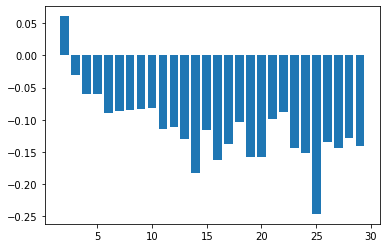

370-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 68ms/step - loss: 0.6882 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 155us/step - loss: 0.6666 - val_loss: 0.6429
Epoch 3/100
132/132 [==============================] - 0s 144us/step - loss: 0.6228 - val_loss: 0.5777
Epoch 4/100
132/132 [==============================] - 0s 139us/step - loss: 0.5467 - val_loss: 0.4691
Epoch 5/100
132/132 [==============================] - 0s 142us/step - loss: 0.4302 - val_loss: 0.3253
Epoch 6/100
132/132 [==============================] - 0s 142us/step - loss: 0.3061 - val_loss: 0.1884
Epoch 7/100
132/132 [==============================] - 0s 141us/step - loss: 0.2178 - val_loss: 0.1096
Epoch 8/100
132/132 [==============================] - 0s 142us/step - loss: 0.1748 - val_loss: 0.0875
Epoch 9/100
132/132 [==============================] - 0s 141us/step - loss: 0.1527 - val_loss: 0.0863
Epoch 10/100
132/13

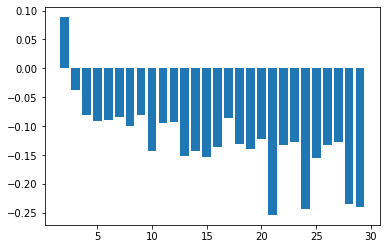

370-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 69ms/step - loss: 0.6907 - val_loss: 0.6817
Epoch 2/100
132/132 [==============================] - 0s 150us/step - loss: 0.6755 - val_loss: 0.6579
Epoch 3/100
132/132 [==============================] - 0s 144us/step - loss: 0.6432 - val_loss: 0.6095
Epoch 4/100
132/132 [==============================] - 0s 143us/step - loss: 0.5826 - val_loss: 0.5244
Epoch 5/100
132/132 [==============================] - 0s 141us/step - loss: 0.4874 - val_loss: 0.4001
Epoch 6/100
132/132 [==============================] - 0s 144us/step - loss: 0.3705 - val_loss: 0.2587
Epoch 7/100
132/132 [==============================] - 0s 147us/step - loss: 0.2619 - val_loss: 0.1501
Epoch 8/100
132/132 [==============================] - 0s 147us/step - loss: 0.1886 - val_loss: 0.1004
Epoch 9/100
132/132 [==============================] - 0s 145us/step - loss: 0.1560 - val_loss: 0.0878
Epoch 10/100
132/13

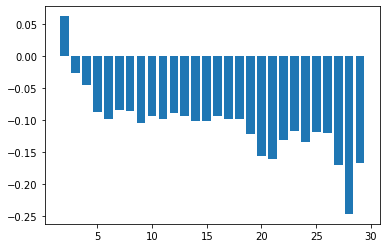

370-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 9s 69ms/step - loss: 0.6912 - val_loss: 0.6835
Epoch 2/100
132/132 [==============================] - 0s 151us/step - loss: 0.6780 - val_loss: 0.6632
Epoch 3/100
132/132 [==============================] - 0s 142us/step - loss: 0.6482 - val_loss: 0.6230
Epoch 4/100
132/132 [==============================] - 0s 144us/step - loss: 0.5973 - val_loss: 0.5524
Epoch 5/100
132/132 [==============================] - 0s 149us/step - loss: 0.5144 - val_loss: 0.4451
Epoch 6/100
132/132 [==============================] - 0s 142us/step - loss: 0.4086 - val_loss: 0.3113
Epoch 7/100
132/132 [==============================] - 0s 145us/step - loss: 0.3010 - val_loss: 0.1899
Epoch 8/100
132/132 [==============================] - 0s 144us/step - loss: 0.2118 - val_loss: 0.1193
Epoch 9/100
132/132 [==============================] - 0s 141us/step - loss: 0.1671 - val_loss: 0.0905
Epoch 10/100
132/13

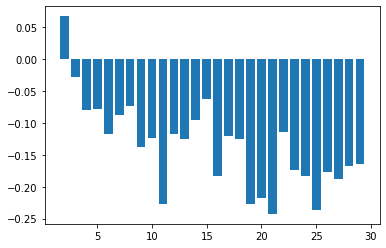

370-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 73ms/step - loss: 0.6901 - val_loss: 0.6811
Epoch 2/100
132/132 [==============================] - 0s 155us/step - loss: 0.6742 - val_loss: 0.6572
Epoch 3/100
132/132 [==============================] - 0s 139us/step - loss: 0.6409 - val_loss: 0.6109
Epoch 4/100
132/132 [==============================] - 0s 144us/step - loss: 0.5822 - val_loss: 0.5332
Epoch 5/100
132/132 [==============================] - 0s 145us/step - loss: 0.4917 - val_loss: 0.4216
Epoch 6/100
132/132 [==============================] - 0s 145us/step - loss: 0.3869 - val_loss: 0.2918
Epoch 7/100
132/132 [==============================] - 0s 147us/step - loss: 0.2735 - val_loss: 0.1827
Epoch 8/100
132/132 [==============================] - 0s 145us/step - loss: 0.2005 - val_loss: 0.1163
Epoch 9/100
132/132 [==============================] - 0s 146us/step - loss: 0.1631 - val_loss: 0.0922
Epoch 10/100
132/1

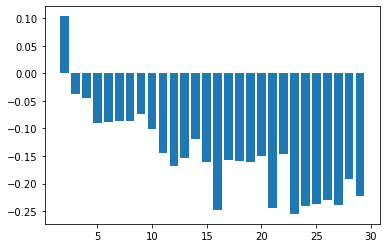

370-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 73ms/step - loss: 0.6914 - val_loss: 0.6848
Epoch 2/100
132/132 [==============================] - 0s 156us/step - loss: 0.6801 - val_loss: 0.6678
Epoch 3/100
132/132 [==============================] - 0s 151us/step - loss: 0.6563 - val_loss: 0.6346
Epoch 4/100
132/132 [==============================] - 0s 144us/step - loss: 0.6105 - val_loss: 0.5770
Epoch 5/100
132/132 [==============================] - 0s 145us/step - loss: 0.5408 - val_loss: 0.4888
Epoch 6/100
132/132 [==============================] - 0s 146us/step - loss: 0.4456 - val_loss: 0.3734
Epoch 7/100
132/132 [==============================] - 0s 147us/step - loss: 0.3395 - val_loss: 0.2516
Epoch 8/100
132/132 [==============================] - 0s 145us/step - loss: 0.2419 - val_loss: 0.1585
Epoch 9/100
132/132 [==============================] - 0s 148us/step - loss: 0.1834 - val_loss: 0.1076
Epoch 10/100
132/1

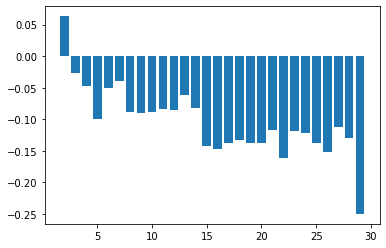

370-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 73ms/step - loss: 0.6915 - val_loss: 0.6868
Epoch 2/100
132/132 [==============================] - 0s 157us/step - loss: 0.6816 - val_loss: 0.6733
Epoch 3/100
132/132 [==============================] - 0s 151us/step - loss: 0.6618 - val_loss: 0.6482
Epoch 4/100
132/132 [==============================] - 0s 150us/step - loss: 0.6277 - val_loss: 0.6077
Epoch 5/100
132/132 [==============================] - 0s 144us/step - loss: 0.5772 - val_loss: 0.5489
Epoch 6/100
132/132 [==============================] - 0s 144us/step - loss: 0.5102 - val_loss: 0.4711
Epoch 7/100
132/132 [==============================] - 0s 143us/step - loss: 0.4300 - val_loss: 0.3782
Epoch 8/100
132/132 [==============================] - 0s 145us/step - loss: 0.3398 - val_loss: 0.2825
Epoch 9/100
132/132 [==============================] - 0s 150us/step - loss: 0.2623 - val_loss: 0.1973
Epoch 10/100
132/1

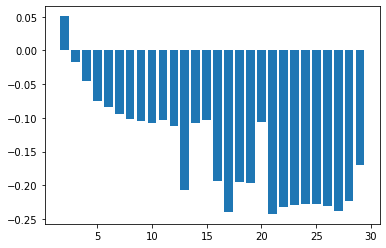

360-350dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 74ms/step - loss: 0.6878 - val_loss: 0.6676
Epoch 2/100
132/132 [==============================] - 0s 165us/step - loss: 0.6504 - val_loss: 0.6004
Epoch 3/100
132/132 [==============================] - 0s 156us/step - loss: 0.5619 - val_loss: 0.4540
Epoch 4/100
132/132 [==============================] - 0s 155us/step - loss: 0.4134 - val_loss: 0.2500
Epoch 5/100
132/132 [==============================] - 0s 151us/step - loss: 0.2616 - val_loss: 0.1166
Epoch 6/100
132/132 [==============================] - 0s 151us/step - loss: 0.1910 - val_loss: 0.0896
Epoch 7/100
132/132 [==============================] - 0s 153us/step - loss: 0.1748 - val_loss: 0.0932
(165, 350)


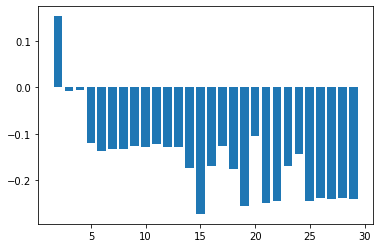

360-340dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 74ms/step - loss: 0.6883 - val_loss: 0.6702
Epoch 2/100
132/132 [==============================] - 0s 161us/step - loss: 0.6557 - val_loss: 0.6056
Epoch 3/100
132/132 [==============================] - 0s 145us/step - loss: 0.5716 - val_loss: 0.4578
Epoch 4/100
132/132 [==============================] - 0s 157us/step - loss: 0.4128 - val_loss: 0.2457
Epoch 5/100
132/132 [==============================] - 0s 160us/step - loss: 0.2538 - val_loss: 0.1099
Epoch 6/100
132/132 [==============================] - 0s 162us/step - loss: 0.1883 - val_loss: 0.0905
Epoch 7/100
132/132 [==============================] - 0s 173us/step - loss: 0.1742 - val_loss: 0.0984
(165, 340)


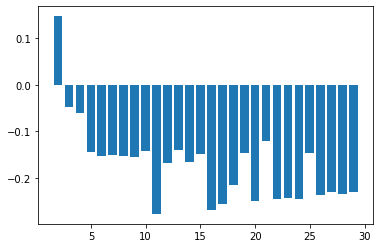

360-330dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 74ms/step - loss: 0.6880 - val_loss: 0.6689
Epoch 2/100
132/132 [==============================] - 0s 167us/step - loss: 0.6524 - val_loss: 0.6019
Epoch 3/100
132/132 [==============================] - 0s 153us/step - loss: 0.5642 - val_loss: 0.4518
Epoch 4/100
132/132 [==============================] - 0s 151us/step - loss: 0.4013 - val_loss: 0.2419
Epoch 5/100
132/132 [==============================] - 0s 152us/step - loss: 0.2452 - val_loss: 0.1093
Epoch 6/100
132/132 [==============================] - 0s 148us/step - loss: 0.1802 - val_loss: 0.0884
Epoch 7/100
132/132 [==============================] - 0s 154us/step - loss: 0.1650 - val_loss: 0.0940
(165, 330)


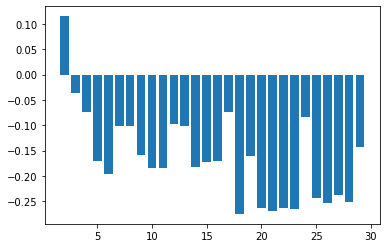

360-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 74ms/step - loss: 0.6888 - val_loss: 0.6708
Epoch 2/100
132/132 [==============================] - 0s 160us/step - loss: 0.6565 - val_loss: 0.6088
Epoch 3/100
132/132 [==============================] - 0s 155us/step - loss: 0.5732 - val_loss: 0.4697
Epoch 4/100
132/132 [==============================] - 0s 159us/step - loss: 0.4227 - val_loss: 0.2664
Epoch 5/100
132/132 [==============================] - 0s 150us/step - loss: 0.2617 - val_loss: 0.1211
Epoch 6/100
132/132 [==============================] - 0s 156us/step - loss: 0.1929 - val_loss: 0.0905
Epoch 7/100
132/132 [==============================] - 0s 150us/step - loss: 0.1759 - val_loss: 0.0959
(165, 320)


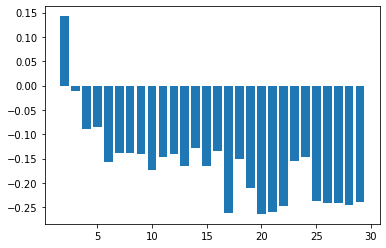

360-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 75ms/step - loss: 0.6869 - val_loss: 0.6659
Epoch 2/100
132/132 [==============================] - 0s 159us/step - loss: 0.6496 - val_loss: 0.5923
Epoch 3/100
132/132 [==============================] - 0s 153us/step - loss: 0.5558 - val_loss: 0.4328
Epoch 4/100
132/132 [==============================] - 0s 153us/step - loss: 0.3947 - val_loss: 0.2244
Epoch 5/100
132/132 [==============================] - 0s 155us/step - loss: 0.2425 - val_loss: 0.1053
Epoch 6/100
132/132 [==============================] - 0s 151us/step - loss: 0.1805 - val_loss: 0.0886
Epoch 7/100
132/132 [==============================] - 0s 154us/step - loss: 0.1680 - val_loss: 0.0952
(165, 310)


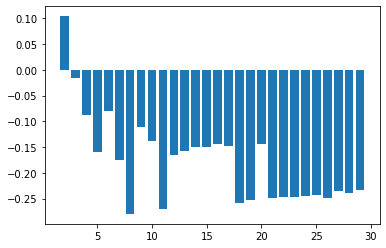

360-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 76ms/step - loss: 0.6870 - val_loss: 0.6658
Epoch 2/100
132/132 [==============================] - 0s 169us/step - loss: 0.6505 - val_loss: 0.5947
Epoch 3/100
132/132 [==============================] - 0s 156us/step - loss: 0.5577 - val_loss: 0.4447
Epoch 4/100
132/132 [==============================] - 0s 160us/step - loss: 0.3952 - val_loss: 0.2414
Epoch 5/100
132/132 [==============================] - 0s 164us/step - loss: 0.2448 - val_loss: 0.1105
Epoch 6/100
132/132 [==============================] - 0s 157us/step - loss: 0.1846 - val_loss: 0.0887
Epoch 7/100
132/132 [==============================] - 0s 152us/step - loss: 0.1703 - val_loss: 0.0955
(165, 300)


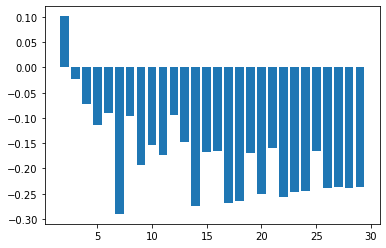

360-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 76ms/step - loss: 0.6873 - val_loss: 0.6683
Epoch 2/100
132/132 [==============================] - 0s 164us/step - loss: 0.6533 - val_loss: 0.6054
Epoch 3/100
132/132 [==============================] - 0s 159us/step - loss: 0.5694 - val_loss: 0.4668
Epoch 4/100
132/132 [==============================] - 0s 155us/step - loss: 0.4241 - val_loss: 0.2647
Epoch 5/100
132/132 [==============================] - 0s 156us/step - loss: 0.2645 - val_loss: 0.1214
Epoch 6/100
132/132 [==============================] - 0s 156us/step - loss: 0.1955 - val_loss: 0.0903
Epoch 7/100
132/132 [==============================] - 0s 155us/step - loss: 0.1751 - val_loss: 0.0951
(165, 290)


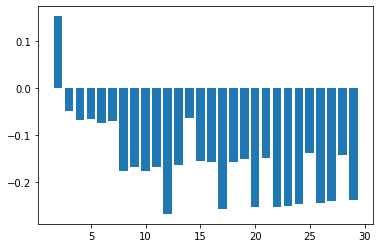

360-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 77ms/step - loss: 0.6871 - val_loss: 0.6671
Epoch 2/100
132/132 [==============================] - 0s 167us/step - loss: 0.6520 - val_loss: 0.5996
Epoch 3/100
132/132 [==============================] - 0s 155us/step - loss: 0.5630 - val_loss: 0.4543
Epoch 4/100
132/132 [==============================] - 0s 158us/step - loss: 0.4091 - val_loss: 0.2507
Epoch 5/100
132/132 [==============================] - 0s 157us/step - loss: 0.2571 - val_loss: 0.1149
Epoch 6/100
132/132 [==============================] - 0s 158us/step - loss: 0.1866 - val_loss: 0.0886
Epoch 7/100
132/132 [==============================] - 0s 154us/step - loss: 0.1670 - val_loss: 0.0941
(165, 280)


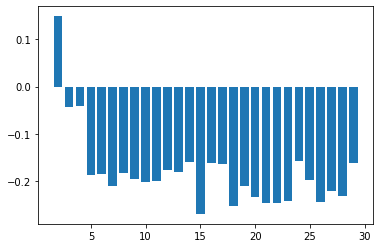

360-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 78ms/step - loss: 0.6892 - val_loss: 0.6736
Epoch 2/100
132/132 [==============================] - 0s 170us/step - loss: 0.6593 - val_loss: 0.6211
Epoch 3/100
132/132 [==============================] - 0s 161us/step - loss: 0.5871 - val_loss: 0.4995
Epoch 4/100
132/132 [==============================] - 0s 162us/step - loss: 0.4450 - val_loss: 0.3066
Epoch 5/100
132/132 [==============================] - 0s 160us/step - loss: 0.2852 - val_loss: 0.1412
Epoch 6/100
132/132 [==============================] - 0s 162us/step - loss: 0.2121 - val_loss: 0.0904
Epoch 7/100
132/132 [==============================] - 0s 159us/step - loss: 0.1850 - val_loss: 0.0922
(165, 270)


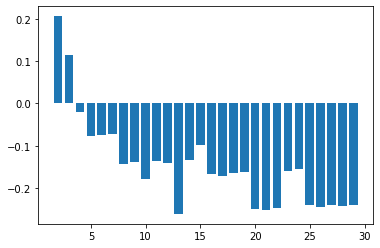

360-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 78ms/step - loss: 0.6875 - val_loss: 0.6696
Epoch 2/100
132/132 [==============================] - 0s 168us/step - loss: 0.6552 - val_loss: 0.6081
Epoch 3/100
132/132 [==============================] - 0s 158us/step - loss: 0.5732 - val_loss: 0.4729
Epoch 4/100
132/132 [==============================] - 0s 155us/step - loss: 0.4376 - val_loss: 0.2775
Epoch 5/100
132/132 [==============================] - 0s 156us/step - loss: 0.2718 - val_loss: 0.1304
Epoch 6/100
132/132 [==============================] - 0s 160us/step - loss: 0.1904 - val_loss: 0.0895
Epoch 7/100
132/132 [==============================] - 0s 156us/step - loss: 0.1691 - val_loss: 0.0926
(165, 260)


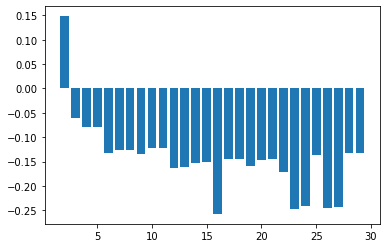

360-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 79ms/step - loss: 0.6876 - val_loss: 0.6686
Epoch 2/100
132/132 [==============================] - 0s 171us/step - loss: 0.6538 - val_loss: 0.6076
Epoch 3/100
132/132 [==============================] - 0s 161us/step - loss: 0.5737 - val_loss: 0.4747
Epoch 4/100
132/132 [==============================] - 0s 160us/step - loss: 0.4341 - val_loss: 0.2788
Epoch 5/100
132/132 [==============================] - 0s 157us/step - loss: 0.2730 - val_loss: 0.1301
Epoch 6/100
132/132 [==============================] - 0s 159us/step - loss: 0.1825 - val_loss: 0.0897
Epoch 7/100
132/132 [==============================] - 0s 159us/step - loss: 0.1602 - val_loss: 0.0933
(165, 250)


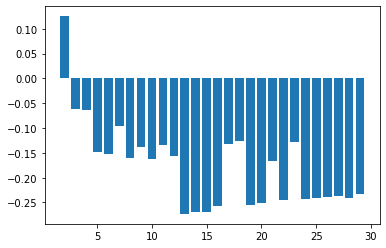

360-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 10s 80ms/step - loss: 0.6894 - val_loss: 0.6740
Epoch 2/100
132/132 [==============================] - 0s 178us/step - loss: 0.6620 - val_loss: 0.6244
Epoch 3/100
132/132 [==============================] - 0s 163us/step - loss: 0.5925 - val_loss: 0.5132
Epoch 4/100
132/132 [==============================] - 0s 157us/step - loss: 0.4691 - val_loss: 0.3316
Epoch 5/100
132/132 [==============================] - 0s 162us/step - loss: 0.3089 - val_loss: 0.1583
Epoch 6/100
132/132 [==============================] - 0s 162us/step - loss: 0.2204 - val_loss: 0.0922
Epoch 7/100
132/132 [==============================] - 0s 161us/step - loss: 0.1870 - val_loss: 0.0901
Epoch 8/100
132/132 [==============================] - 0s 162us/step - loss: 0.1634 - val_loss: 0.0950
(165, 240)


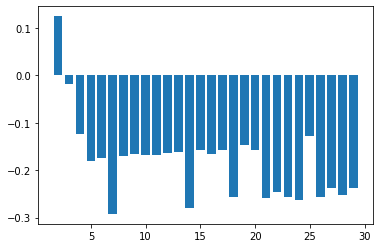

360-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 80ms/step - loss: 0.6881 - val_loss: 0.6700
Epoch 2/100
132/132 [==============================] - 0s 170us/step - loss: 0.6566 - val_loss: 0.6137
Epoch 3/100
132/132 [==============================] - 0s 162us/step - loss: 0.5843 - val_loss: 0.4944
Epoch 4/100
132/132 [==============================] - 0s 167us/step - loss: 0.4517 - val_loss: 0.3123
Epoch 5/100
132/132 [==============================] - 0s 157us/step - loss: 0.3013 - val_loss: 0.1510
Epoch 6/100
132/132 [==============================] - 0s 156us/step - loss: 0.2028 - val_loss: 0.0948
Epoch 7/100
132/132 [==============================] - 0s 159us/step - loss: 0.1732 - val_loss: 0.0935
Epoch 8/100
132/132 [==============================] - 0s 164us/step - loss: 0.1545 - val_loss: 0.0985
(165, 230)


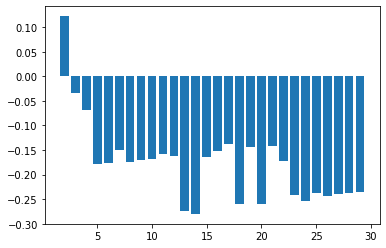

360-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 81ms/step - loss: 0.6869 - val_loss: 0.6686
Epoch 2/100
132/132 [==============================] - 0s 170us/step - loss: 0.6538 - val_loss: 0.6093
Epoch 3/100
132/132 [==============================] - 0s 161us/step - loss: 0.5785 - val_loss: 0.4818
Epoch 4/100
132/132 [==============================] - 0s 163us/step - loss: 0.4345 - val_loss: 0.2907
Epoch 5/100
132/132 [==============================] - 0s 157us/step - loss: 0.2764 - val_loss: 0.1340
Epoch 6/100
132/132 [==============================] - 0s 157us/step - loss: 0.1905 - val_loss: 0.0884
Epoch 7/100
132/132 [==============================] - 0s 163us/step - loss: 0.1751 - val_loss: 0.0924
(165, 220)


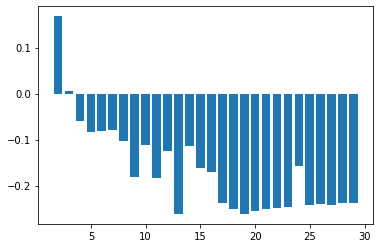

360-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 82ms/step - loss: 0.6885 - val_loss: 0.6704
Epoch 2/100
132/132 [==============================] - 0s 173us/step - loss: 0.6566 - val_loss: 0.6146
Epoch 3/100
132/132 [==============================] - 0s 162us/step - loss: 0.5827 - val_loss: 0.4957
Epoch 4/100
132/132 [==============================] - 0s 163us/step - loss: 0.4508 - val_loss: 0.3135
Epoch 5/100
132/132 [==============================] - 0s 163us/step - loss: 0.3039 - val_loss: 0.1535
Epoch 6/100
132/132 [==============================] - 0s 161us/step - loss: 0.2010 - val_loss: 0.0953
Epoch 7/100
132/132 [==============================] - 0s 161us/step - loss: 0.1694 - val_loss: 0.0910
Epoch 8/100
132/132 [==============================] - 0s 164us/step - loss: 0.1552 - val_loss: 0.0959
(165, 210)


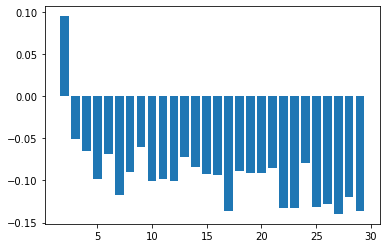

360-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 82ms/step - loss: 0.6894 - val_loss: 0.6750
Epoch 2/100
132/132 [==============================] - 0s 169us/step - loss: 0.6636 - val_loss: 0.6294
Epoch 3/100
132/132 [==============================] - 0s 161us/step - loss: 0.6026 - val_loss: 0.5257
Epoch 4/100
132/132 [==============================] - 0s 161us/step - loss: 0.4783 - val_loss: 0.3531
Epoch 5/100
132/132 [==============================] - 0s 159us/step - loss: 0.3203 - val_loss: 0.1753
Epoch 6/100
132/132 [==============================] - 0s 159us/step - loss: 0.2080 - val_loss: 0.0957
Epoch 7/100
132/132 [==============================] - 0s 164us/step - loss: 0.1749 - val_loss: 0.0886
Epoch 8/100
132/132 [==============================] - 0s 161us/step - loss: 0.1607 - val_loss: 0.0941
(165, 200)


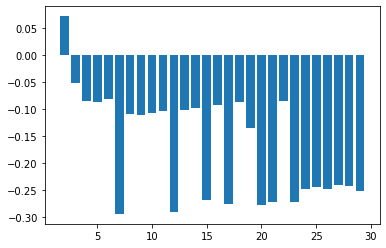

360-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 83ms/step - loss: 0.6893 - val_loss: 0.6739
Epoch 2/100
132/132 [==============================] - 0s 178us/step - loss: 0.6627 - val_loss: 0.6277
Epoch 3/100
132/132 [==============================] - 0s 162us/step - loss: 0.6001 - val_loss: 0.5264
Epoch 4/100
132/132 [==============================] - 0s 159us/step - loss: 0.4822 - val_loss: 0.3574
Epoch 5/100
132/132 [==============================] - 0s 158us/step - loss: 0.3270 - val_loss: 0.1812
Epoch 6/100
132/132 [==============================] - 0s 165us/step - loss: 0.2151 - val_loss: 0.0981
Epoch 7/100
132/132 [==============================] - 0s 158us/step - loss: 0.1706 - val_loss: 0.0874
Epoch 8/100
132/132 [==============================] - 0s 160us/step - loss: 0.1528 - val_loss: 0.0914
(165, 190)


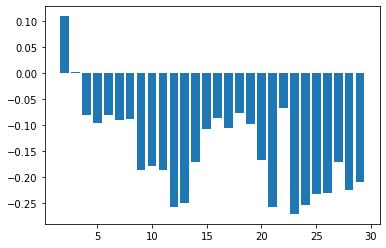

360-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 84ms/step - loss: 0.6876 - val_loss: 0.6699
Epoch 2/100
132/132 [==============================] - 0s 174us/step - loss: 0.6556 - val_loss: 0.6144
Epoch 3/100
132/132 [==============================] - 0s 170us/step - loss: 0.5836 - val_loss: 0.4986
Epoch 4/100
132/132 [==============================] - 0s 165us/step - loss: 0.4589 - val_loss: 0.3219
Epoch 5/100
132/132 [==============================] - 0s 163us/step - loss: 0.3054 - val_loss: 0.1596
Epoch 6/100
132/132 [==============================] - 0s 163us/step - loss: 0.2115 - val_loss: 0.0935
Epoch 7/100
132/132 [==============================] - 0s 164us/step - loss: 0.1752 - val_loss: 0.0887
Epoch 8/100
132/132 [==============================] - 0s 168us/step - loss: 0.1553 - val_loss: 0.0925
(165, 180)


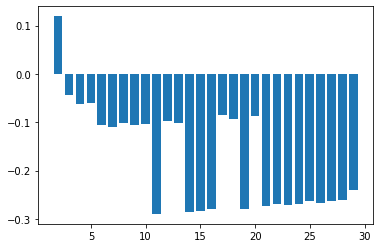

360-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 84ms/step - loss: 0.6893 - val_loss: 0.6747
Epoch 2/100
132/132 [==============================] - 0s 178us/step - loss: 0.6633 - val_loss: 0.6287
Epoch 3/100
132/132 [==============================] - 0s 171us/step - loss: 0.6022 - val_loss: 0.5272
Epoch 4/100
132/132 [==============================] - 0s 166us/step - loss: 0.4886 - val_loss: 0.3593
Epoch 5/100
132/132 [==============================] - 0s 160us/step - loss: 0.3416 - val_loss: 0.1882
Epoch 6/100
132/132 [==============================] - 0s 165us/step - loss: 0.2259 - val_loss: 0.1040
Epoch 7/100
132/132 [==============================] - 0s 166us/step - loss: 0.1782 - val_loss: 0.0904
Epoch 8/100
132/132 [==============================] - 0s 162us/step - loss: 0.1575 - val_loss: 0.0928
(165, 170)


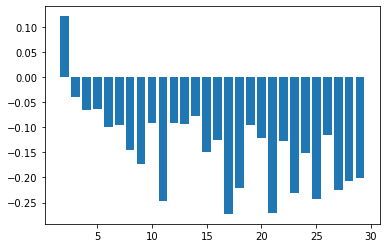

360-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 85ms/step - loss: 0.6876 - val_loss: 0.6715
Epoch 2/100
132/132 [==============================] - 0s 178us/step - loss: 0.6582 - val_loss: 0.6207
Epoch 3/100
132/132 [==============================] - 0s 166us/step - loss: 0.5903 - val_loss: 0.5119
Epoch 4/100
132/132 [==============================] - 0s 161us/step - loss: 0.4698 - val_loss: 0.3406
Epoch 5/100
132/132 [==============================] - 0s 160us/step - loss: 0.3290 - val_loss: 0.1754
Epoch 6/100
132/132 [==============================] - 0s 164us/step - loss: 0.2201 - val_loss: 0.1015
Epoch 7/100
132/132 [==============================] - 0s 161us/step - loss: 0.1813 - val_loss: 0.0906
Epoch 8/100
132/132 [==============================] - 0s 164us/step - loss: 0.1615 - val_loss: 0.0940
(165, 160)


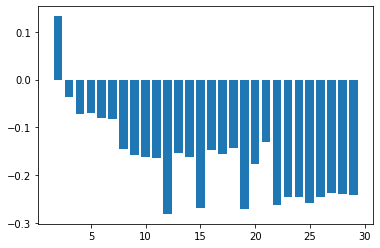

360-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 85ms/step - loss: 0.6882 - val_loss: 0.6720
Epoch 2/100
132/132 [==============================] - 0s 178us/step - loss: 0.6607 - val_loss: 0.6240
Epoch 3/100
132/132 [==============================] - 0s 163us/step - loss: 0.5953 - val_loss: 0.5247
Epoch 4/100
132/132 [==============================] - 0s 165us/step - loss: 0.4853 - val_loss: 0.3650
Epoch 5/100
132/132 [==============================] - 0s 161us/step - loss: 0.3332 - val_loss: 0.1960
Epoch 6/100
132/132 [==============================] - 0s 170us/step - loss: 0.2177 - val_loss: 0.1045
Epoch 7/100
132/132 [==============================] - 0s 165us/step - loss: 0.1816 - val_loss: 0.0882
Epoch 8/100
132/132 [==============================] - 0s 169us/step - loss: 0.1628 - val_loss: 0.0924
(165, 150)


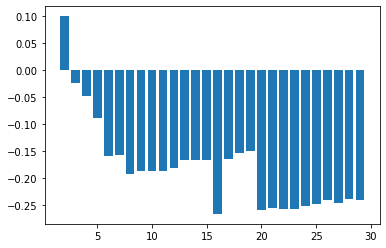

360-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 86ms/step - loss: 0.6888 - val_loss: 0.6752
Epoch 2/100
132/132 [==============================] - 0s 180us/step - loss: 0.6635 - val_loss: 0.6326
Epoch 3/100
132/132 [==============================] - 0s 164us/step - loss: 0.6061 - val_loss: 0.5397
Epoch 4/100
132/132 [==============================] - 0s 164us/step - loss: 0.4918 - val_loss: 0.3838
Epoch 5/100
132/132 [==============================] - 0s 172us/step - loss: 0.3446 - val_loss: 0.2097
Epoch 6/100
132/132 [==============================] - 0s 165us/step - loss: 0.2207 - val_loss: 0.1099
Epoch 7/100
132/132 [==============================] - 0s 168us/step - loss: 0.1720 - val_loss: 0.0876
Epoch 8/100
132/132 [==============================] - 0s 165us/step - loss: 0.1548 - val_loss: 0.0907
(165, 140)


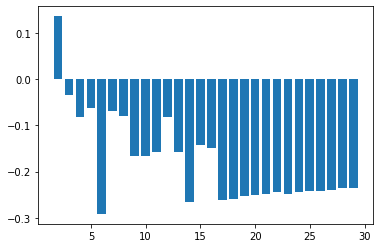

360-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 11s 87ms/step - loss: 0.6887 - val_loss: 0.6753
Epoch 2/100
132/132 [==============================] - 0s 177us/step - loss: 0.6639 - val_loss: 0.6335
Epoch 3/100
132/132 [==============================] - 0s 178us/step - loss: 0.6078 - val_loss: 0.5430
Epoch 4/100
132/132 [==============================] - 0s 172us/step - loss: 0.4990 - val_loss: 0.3897
Epoch 5/100
132/132 [==============================] - 0s 166us/step - loss: 0.3535 - val_loss: 0.2151
Epoch 6/100
132/132 [==============================] - 0s 166us/step - loss: 0.2346 - val_loss: 0.1122
Epoch 7/100
132/132 [==============================] - 0s 170us/step - loss: 0.1887 - val_loss: 0.0888
Epoch 8/100
132/132 [==============================] - 0s 171us/step - loss: 0.1700 - val_loss: 0.0903
(165, 130)


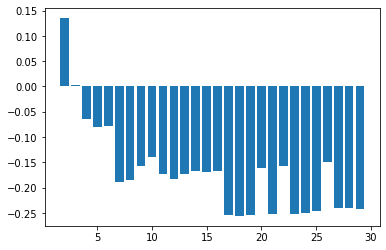

360-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 88ms/step - loss: 0.6900 - val_loss: 0.6775
Epoch 2/100
132/132 [==============================] - 0s 176us/step - loss: 0.6694 - val_loss: 0.6411
Epoch 3/100
132/132 [==============================] - 0s 173us/step - loss: 0.6206 - val_loss: 0.5630
Epoch 4/100
132/132 [==============================] - 0s 164us/step - loss: 0.5306 - val_loss: 0.4285
Epoch 5/100
132/132 [==============================] - 0s 162us/step - loss: 0.3995 - val_loss: 0.2598
Epoch 6/100
132/132 [==============================] - 0s 168us/step - loss: 0.2677 - val_loss: 0.1353
Epoch 7/100
132/132 [==============================] - 0s 175us/step - loss: 0.1890 - val_loss: 0.0925
Epoch 8/100
132/132 [==============================] - 0s 165us/step - loss: 0.1607 - val_loss: 0.0886
Epoch 9/100
132/132 [==============================] - 0s 170us/step - loss: 0.1358 - val_loss: 0.0919
(165, 120)


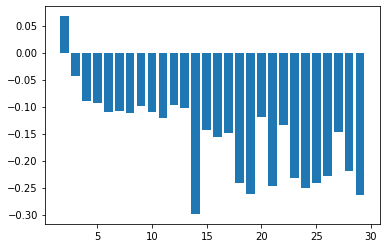

360-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 88ms/step - loss: 0.6885 - val_loss: 0.6754
Epoch 2/100
132/132 [==============================] - 0s 180us/step - loss: 0.6649 - val_loss: 0.6374
Epoch 3/100
132/132 [==============================] - 0s 169us/step - loss: 0.6135 - val_loss: 0.5597
Epoch 4/100
132/132 [==============================] - 0s 180us/step - loss: 0.5230 - val_loss: 0.4279
Epoch 5/100
132/132 [==============================] - 0s 171us/step - loss: 0.3902 - val_loss: 0.2634
Epoch 6/100
132/132 [==============================] - 0s 169us/step - loss: 0.2662 - val_loss: 0.1380
Epoch 7/100
132/132 [==============================] - 0s 165us/step - loss: 0.1920 - val_loss: 0.0923
Epoch 8/100
132/132 [==============================] - 0s 173us/step - loss: 0.1663 - val_loss: 0.0867
Epoch 9/100
132/132 [==============================] - 0s 169us/step - loss: 0.1398 - val_loss: 0.0893
(165, 110)


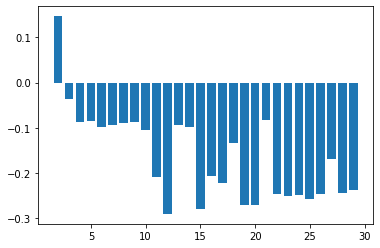

360-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 89ms/step - loss: 0.6889 - val_loss: 0.6754
Epoch 2/100
132/132 [==============================] - 0s 181us/step - loss: 0.6667 - val_loss: 0.6378
Epoch 3/100
132/132 [==============================] - 0s 170us/step - loss: 0.6157 - val_loss: 0.5613
Epoch 4/100
132/132 [==============================] - 0s 173us/step - loss: 0.5256 - val_loss: 0.4326
Epoch 5/100
132/132 [==============================] - 0s 174us/step - loss: 0.3985 - val_loss: 0.2709
Epoch 6/100
132/132 [==============================] - 0s 170us/step - loss: 0.2731 - val_loss: 0.1443
Epoch 7/100
132/132 [==============================] - 0s 174us/step - loss: 0.1894 - val_loss: 0.0947
Epoch 8/100
132/132 [==============================] - 0s 167us/step - loss: 0.1564 - val_loss: 0.0857
Epoch 9/100
132/132 [==============================] - 0s 172us/step - loss: 0.1388 - val_loss: 0.0877
(165, 100)


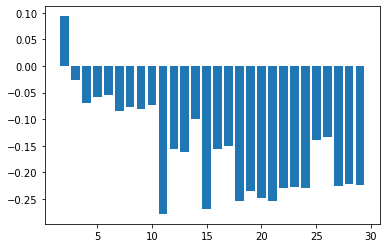

360-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 89ms/step - loss: 0.6891 - val_loss: 0.6771
Epoch 2/100
132/132 [==============================] - 0s 182us/step - loss: 0.6665 - val_loss: 0.6406
Epoch 3/100
132/132 [==============================] - 0s 172us/step - loss: 0.6163 - val_loss: 0.5647
Epoch 4/100
132/132 [==============================] - 0s 168us/step - loss: 0.5228 - val_loss: 0.4357
Epoch 5/100
132/132 [==============================] - 0s 171us/step - loss: 0.3957 - val_loss: 0.2730
Epoch 6/100
132/132 [==============================] - 0s 174us/step - loss: 0.2635 - val_loss: 0.1452
Epoch 7/100
132/132 [==============================] - 0s 174us/step - loss: 0.1877 - val_loss: 0.0932
Epoch 8/100
132/132 [==============================] - 0s 171us/step - loss: 0.1635 - val_loss: 0.0863
Epoch 9/100
132/132 [==============================] - 0s 173us/step - loss: 0.1466 - val_loss: 0.0893
(165, 90)


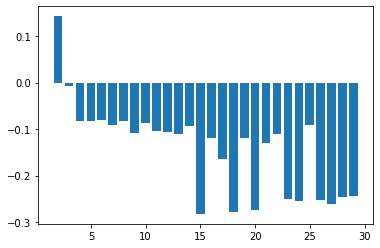

360-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 90ms/step - loss: 0.6894 - val_loss: 0.6771
Epoch 2/100
132/132 [==============================] - 0s 183us/step - loss: 0.6680 - val_loss: 0.6430
Epoch 3/100
132/132 [==============================] - 0s 171us/step - loss: 0.6215 - val_loss: 0.5740
Epoch 4/100
132/132 [==============================] - 0s 169us/step - loss: 0.5375 - val_loss: 0.4570
Epoch 5/100
132/132 [==============================] - 0s 173us/step - loss: 0.4157 - val_loss: 0.3026
Epoch 6/100
132/132 [==============================] - 0s 170us/step - loss: 0.2827 - val_loss: 0.1670
Epoch 7/100
132/132 [==============================] - 0s 168us/step - loss: 0.1965 - val_loss: 0.1004
Epoch 8/100
132/132 [==============================] - 0s 172us/step - loss: 0.1670 - val_loss: 0.0858
Epoch 9/100
132/132 [==============================] - 0s 172us/step - loss: 0.1513 - val_loss: 0.0871
(165, 80)


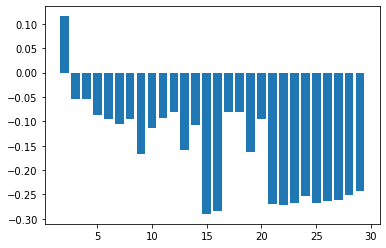

360-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 91ms/step - loss: 0.6896 - val_loss: 0.6781
Epoch 2/100
132/132 [==============================] - 0s 184us/step - loss: 0.6699 - val_loss: 0.6464
Epoch 3/100
132/132 [==============================] - 0s 180us/step - loss: 0.6286 - val_loss: 0.5832
Epoch 4/100
132/132 [==============================] - 0s 170us/step - loss: 0.5505 - val_loss: 0.4744
Epoch 5/100
132/132 [==============================] - 0s 173us/step - loss: 0.4375 - val_loss: 0.3256
Epoch 6/100
132/132 [==============================] - 0s 176us/step - loss: 0.3073 - val_loss: 0.1854
Epoch 7/100
132/132 [==============================] - 0s 170us/step - loss: 0.2165 - val_loss: 0.1089
Epoch 8/100
132/132 [==============================] - 0s 171us/step - loss: 0.1665 - val_loss: 0.0902
Epoch 9/100
132/132 [==============================] - 0s 170us/step - loss: 0.1415 - val_loss: 0.0892
Epoch 10/100
132/1

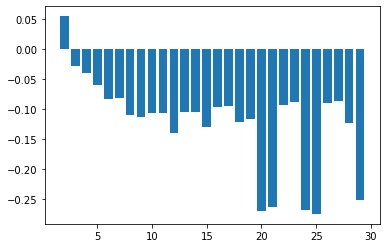

360-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 91ms/step - loss: 0.6900 - val_loss: 0.6786
Epoch 2/100
132/132 [==============================] - 0s 181us/step - loss: 0.6698 - val_loss: 0.6485
Epoch 3/100
132/132 [==============================] - 0s 173us/step - loss: 0.6291 - val_loss: 0.5894
Epoch 4/100
132/132 [==============================] - 0s 170us/step - loss: 0.5563 - val_loss: 0.4896
Epoch 5/100
132/132 [==============================] - 0s 175us/step - loss: 0.4522 - val_loss: 0.3529
Epoch 6/100
132/132 [==============================] - 0s 169us/step - loss: 0.3191 - val_loss: 0.2157
Epoch 7/100
132/132 [==============================] - 0s 180us/step - loss: 0.2223 - val_loss: 0.1241
Epoch 8/100
132/132 [==============================] - 0s 172us/step - loss: 0.1721 - val_loss: 0.0921
Epoch 9/100
132/132 [==============================] - 0s 176us/step - loss: 0.1463 - val_loss: 0.0876
Epoch 10/100
132/1

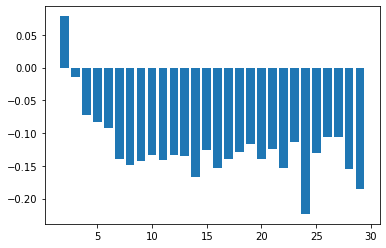

360-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 12s 93ms/step - loss: 0.6898 - val_loss: 0.6795
Epoch 2/100
132/132 [==============================] - 0s 181us/step - loss: 0.6727 - val_loss: 0.6521
Epoch 3/100
132/132 [==============================] - 0s 171us/step - loss: 0.6359 - val_loss: 0.5981
Epoch 4/100
132/132 [==============================] - 0s 177us/step - loss: 0.5672 - val_loss: 0.5057
Epoch 5/100
132/132 [==============================] - 0s 171us/step - loss: 0.4690 - val_loss: 0.3746
Epoch 6/100
132/132 [==============================] - 0s 172us/step - loss: 0.3469 - val_loss: 0.2356
Epoch 7/100
132/132 [==============================] - 0s 172us/step - loss: 0.2386 - val_loss: 0.1375
Epoch 8/100
132/132 [==============================] - 0s 174us/step - loss: 0.1838 - val_loss: 0.0944
Epoch 9/100
132/132 [==============================] - 0s 173us/step - loss: 0.1562 - val_loss: 0.0858
Epoch 10/100
132/1

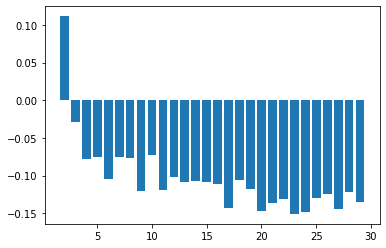

360-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 99ms/step - loss: 0.6906 - val_loss: 0.6829
Epoch 2/100
132/132 [==============================] - 0s 189us/step - loss: 0.6766 - val_loss: 0.6610
Epoch 3/100
132/132 [==============================] - 0s 168us/step - loss: 0.6463 - val_loss: 0.6171
Epoch 4/100
132/132 [==============================] - 0s 167us/step - loss: 0.5902 - val_loss: 0.5404
Epoch 5/100
132/132 [==============================] - 0s 174us/step - loss: 0.5083 - val_loss: 0.4262
Epoch 6/100
132/132 [==============================] - 0s 177us/step - loss: 0.3916 - val_loss: 0.2912
Epoch 7/100
132/132 [==============================] - 0s 178us/step - loss: 0.2822 - val_loss: 0.1711
Epoch 8/100
132/132 [==============================] - 0s 181us/step - loss: 0.1991 - val_loss: 0.1073
Epoch 9/100
132/132 [==============================] - 0s 181us/step - loss: 0.1603 - val_loss: 0.0863
Epoch 10/100
132/1

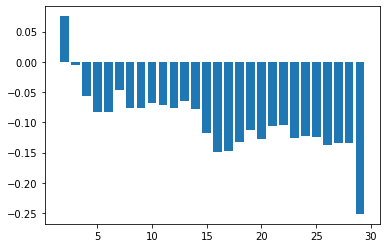

360-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 97ms/step - loss: 0.6906 - val_loss: 0.6823
Epoch 2/100
132/132 [==============================] - 0s 189us/step - loss: 0.6765 - val_loss: 0.6611
Epoch 3/100
132/132 [==============================] - 0s 177us/step - loss: 0.6480 - val_loss: 0.6210
Epoch 4/100
132/132 [==============================] - 0s 177us/step - loss: 0.5995 - val_loss: 0.5527
Epoch 5/100
132/132 [==============================] - 0s 168us/step - loss: 0.5231 - val_loss: 0.4519
Epoch 6/100
132/132 [==============================] - 0s 182us/step - loss: 0.4218 - val_loss: 0.3279
Epoch 7/100
132/132 [==============================] - 0s 176us/step - loss: 0.3125 - val_loss: 0.2085
Epoch 8/100
132/132 [==============================] - 0s 181us/step - loss: 0.2290 - val_loss: 0.1278
Epoch 9/100
132/132 [==============================] - 0s 180us/step - loss: 0.1760 - val_loss: 0.0948
Epoch 10/100
132/1

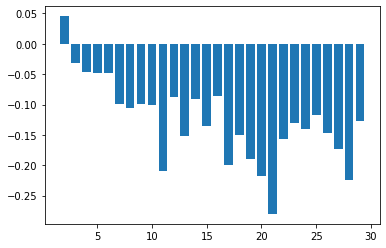

360-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 98ms/step - loss: 0.6913 - val_loss: 0.6857
Epoch 2/100
132/132 [==============================] - 0s 183us/step - loss: 0.6812 - val_loss: 0.6701
Epoch 3/100
132/132 [==============================] - 0s 176us/step - loss: 0.6585 - val_loss: 0.6405
Epoch 4/100
132/132 [==============================] - 0s 179us/step - loss: 0.6196 - val_loss: 0.5907
Epoch 5/100
132/132 [==============================] - 0s 174us/step - loss: 0.5591 - val_loss: 0.5155
Epoch 6/100
132/132 [==============================] - 0s 178us/step - loss: 0.4815 - val_loss: 0.4148
Epoch 7/100
132/132 [==============================] - 0s 176us/step - loss: 0.3859 - val_loss: 0.3016
Epoch 8/100
132/132 [==============================] - 0s 181us/step - loss: 0.2905 - val_loss: 0.1987
Epoch 9/100
132/132 [==============================] - 0s 184us/step - loss: 0.2143 - val_loss: 0.1308
Epoch 10/100
132/1

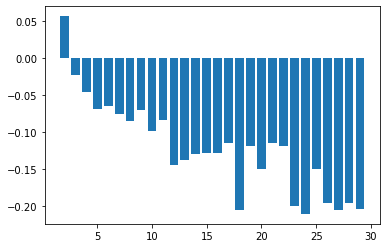

360-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 98ms/step - loss: 0.6920 - val_loss: 0.6882
Epoch 2/100
132/132 [==============================] - 0s 189us/step - loss: 0.6852 - val_loss: 0.6778
Epoch 3/100
132/132 [==============================] - 0s 178us/step - loss: 0.6702 - val_loss: 0.6575
Epoch 4/100
132/132 [==============================] - 0s 178us/step - loss: 0.6420 - val_loss: 0.6228
Epoch 5/100
132/132 [==============================] - 0s 177us/step - loss: 0.5980 - val_loss: 0.5690
Epoch 6/100
132/132 [==============================] - 0s 178us/step - loss: 0.5364 - val_loss: 0.4935
Epoch 7/100
132/132 [==============================] - 0s 173us/step - loss: 0.4573 - val_loss: 0.3984
Epoch 8/100
132/132 [==============================] - 0s 177us/step - loss: 0.3685 - val_loss: 0.2943
Epoch 9/100
132/132 [==============================] - 0s 177us/step - loss: 0.2814 - val_loss: 0.2006
Epoch 10/100
132/1

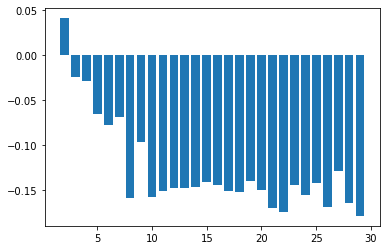

350-340dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 99ms/step - loss: 0.6896 - val_loss: 0.6740
Epoch 2/100
132/132 [==============================] - 0s 196us/step - loss: 0.6614 - val_loss: 0.6191
Epoch 3/100
132/132 [==============================] - 0s 186us/step - loss: 0.5873 - val_loss: 0.4903
Epoch 4/100
132/132 [==============================] - 0s 181us/step - loss: 0.4465 - val_loss: 0.2881
Epoch 5/100
132/132 [==============================] - 0s 178us/step - loss: 0.2796 - val_loss: 0.1294
Epoch 6/100
132/132 [==============================] - 0s 178us/step - loss: 0.1945 - val_loss: 0.0905
Epoch 7/100
132/132 [==============================] - 0s 182us/step - loss: 0.1792 - val_loss: 0.0972
(165, 340)


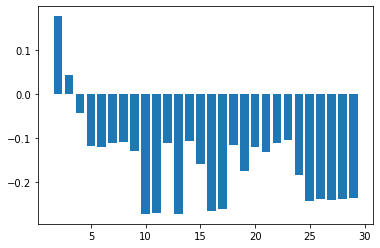

350-330dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 98ms/step - loss: 0.6887 - val_loss: 0.6703
Epoch 2/100
132/132 [==============================] - 0s 192us/step - loss: 0.6552 - val_loss: 0.6068
Epoch 3/100
132/132 [==============================] - 0s 179us/step - loss: 0.5694 - val_loss: 0.4631
Epoch 4/100
132/132 [==============================] - 0s 185us/step - loss: 0.4167 - val_loss: 0.2563
Epoch 5/100
132/132 [==============================] - 0s 183us/step - loss: 0.2495 - val_loss: 0.1164
Epoch 6/100
132/132 [==============================] - 0s 178us/step - loss: 0.1841 - val_loss: 0.0885
Epoch 7/100
132/132 [==============================] - 0s 180us/step - loss: 0.1666 - val_loss: 0.0938
(165, 330)


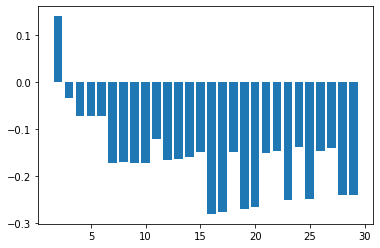

350-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 98ms/step - loss: 0.6874 - val_loss: 0.6669
Epoch 2/100
132/132 [==============================] - 0s 188us/step - loss: 0.6507 - val_loss: 0.5998
Epoch 3/100
132/132 [==============================] - 0s 185us/step - loss: 0.5653 - val_loss: 0.4565
Epoch 4/100
132/132 [==============================] - 0s 188us/step - loss: 0.4109 - val_loss: 0.2546
Epoch 5/100
132/132 [==============================] - 0s 186us/step - loss: 0.2462 - val_loss: 0.1163
Epoch 6/100
132/132 [==============================] - 0s 183us/step - loss: 0.1859 - val_loss: 0.0888
Epoch 7/100
132/132 [==============================] - 0s 184us/step - loss: 0.1704 - val_loss: 0.0950
(165, 320)


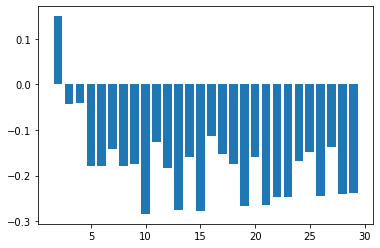

350-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 98ms/step - loss: 0.6876 - val_loss: 0.6684
Epoch 2/100
132/132 [==============================] - 0s 192us/step - loss: 0.6515 - val_loss: 0.6018
Epoch 3/100
132/132 [==============================] - 0s 182us/step - loss: 0.5648 - val_loss: 0.4544
Epoch 4/100
132/132 [==============================] - 0s 184us/step - loss: 0.4149 - val_loss: 0.2512
Epoch 5/100
132/132 [==============================] - 0s 184us/step - loss: 0.2479 - val_loss: 0.1173
Epoch 6/100
132/132 [==============================] - 0s 190us/step - loss: 0.1847 - val_loss: 0.0881
Epoch 7/100
132/132 [==============================] - 0s 177us/step - loss: 0.1683 - val_loss: 0.0941
(165, 310)


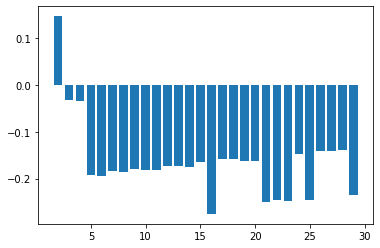

350-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 99ms/step - loss: 0.6861 - val_loss: 0.6653
Epoch 2/100
132/132 [==============================] - 0s 192us/step - loss: 0.6480 - val_loss: 0.5936
Epoch 3/100
132/132 [==============================] - 0s 186us/step - loss: 0.5526 - val_loss: 0.4415
Epoch 4/100
132/132 [==============================] - 0s 190us/step - loss: 0.4029 - val_loss: 0.2390
Epoch 5/100
132/132 [==============================] - 0s 184us/step - loss: 0.2386 - val_loss: 0.1132
Epoch 6/100
132/132 [==============================] - 0s 185us/step - loss: 0.1802 - val_loss: 0.0887
Epoch 7/100
132/132 [==============================] - 0s 189us/step - loss: 0.1656 - val_loss: 0.0943
(165, 300)


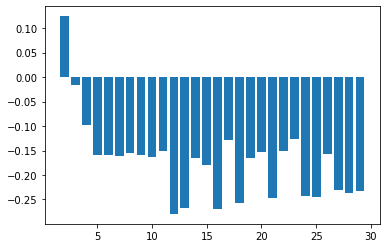

350-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 99ms/step - loss: 0.6873 - val_loss: 0.6686
Epoch 2/100
132/132 [==============================] - 0s 200us/step - loss: 0.6532 - val_loss: 0.6048
Epoch 3/100
132/132 [==============================] - 0s 189us/step - loss: 0.5670 - val_loss: 0.4680
Epoch 4/100
132/132 [==============================] - 0s 184us/step - loss: 0.4180 - val_loss: 0.2690
Epoch 5/100
132/132 [==============================] - 0s 187us/step - loss: 0.2607 - val_loss: 0.1231
Epoch 6/100
132/132 [==============================] - 0s 181us/step - loss: 0.1877 - val_loss: 0.0892
Epoch 7/100
132/132 [==============================] - 0s 183us/step - loss: 0.1731 - val_loss: 0.0944
(165, 290)


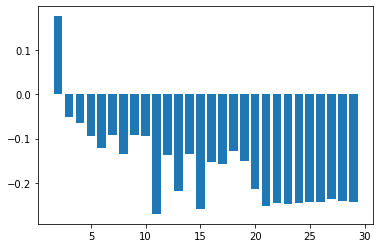

350-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 101ms/step - loss: 0.6884 - val_loss: 0.6714
Epoch 2/100
132/132 [==============================] - 0s 199us/step - loss: 0.6575 - val_loss: 0.6159
Epoch 3/100
132/132 [==============================] - 0s 178us/step - loss: 0.5824 - val_loss: 0.4935
Epoch 4/100
132/132 [==============================] - 0s 186us/step - loss: 0.4421 - val_loss: 0.3039
Epoch 5/100
132/132 [==============================] - 0s 187us/step - loss: 0.2948 - val_loss: 0.1446
Epoch 6/100
132/132 [==============================] - 0s 183us/step - loss: 0.2000 - val_loss: 0.0943
Epoch 7/100
132/132 [==============================] - 0s 184us/step - loss: 0.1743 - val_loss: 0.0944
(165, 280)


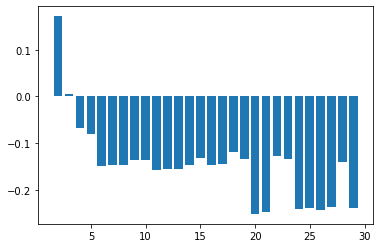

350-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 13s 101ms/step - loss: 0.6895 - val_loss: 0.6750
Epoch 2/100
132/132 [==============================] - 0s 198us/step - loss: 0.6631 - val_loss: 0.6282
Epoch 3/100
132/132 [==============================] - 0s 189us/step - loss: 0.5988 - val_loss: 0.5205
Epoch 4/100
132/132 [==============================] - 0s 185us/step - loss: 0.4781 - val_loss: 0.3402
Epoch 5/100
132/132 [==============================] - 0s 186us/step - loss: 0.3179 - val_loss: 0.1645
Epoch 6/100
132/132 [==============================] - 0s 184us/step - loss: 0.2074 - val_loss: 0.0941
Epoch 7/100
132/132 [==============================] - 0s 191us/step - loss: 0.1748 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 188us/step - loss: 0.1507 - val_loss: 0.0944
(165, 270)


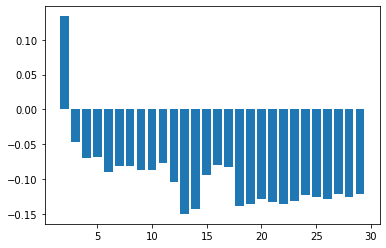

350-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 102ms/step - loss: 0.6872 - val_loss: 0.6675
Epoch 2/100
132/132 [==============================] - 0s 194us/step - loss: 0.6528 - val_loss: 0.6054
Epoch 3/100
132/132 [==============================] - 0s 195us/step - loss: 0.5725 - val_loss: 0.4728
Epoch 4/100
132/132 [==============================] - 0s 191us/step - loss: 0.4262 - val_loss: 0.2775
Epoch 5/100
132/132 [==============================] - 0s 184us/step - loss: 0.2717 - val_loss: 0.1274
Epoch 6/100
132/132 [==============================] - 0s 187us/step - loss: 0.1973 - val_loss: 0.0884
Epoch 7/100
132/132 [==============================] - 0s 186us/step - loss: 0.1832 - val_loss: 0.0944
(165, 260)


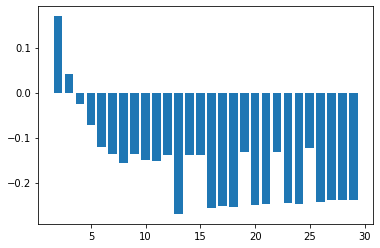

350-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 102ms/step - loss: 0.6870 - val_loss: 0.6683
Epoch 2/100
132/132 [==============================] - 0s 203us/step - loss: 0.6530 - val_loss: 0.6077
Epoch 3/100
132/132 [==============================] - 0s 195us/step - loss: 0.5722 - val_loss: 0.4775
Epoch 4/100
132/132 [==============================] - 0s 194us/step - loss: 0.4290 - val_loss: 0.2845
Epoch 5/100
132/132 [==============================] - 0s 194us/step - loss: 0.2696 - val_loss: 0.1325
Epoch 6/100
132/132 [==============================] - 0s 193us/step - loss: 0.1947 - val_loss: 0.0899
Epoch 7/100
132/132 [==============================] - 0s 187us/step - loss: 0.1772 - val_loss: 0.0923
(165, 250)


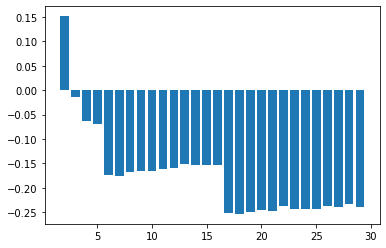

350-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 103ms/step - loss: 0.6884 - val_loss: 0.6721
Epoch 2/100
132/132 [==============================] - 0s 198us/step - loss: 0.6582 - val_loss: 0.6196
Epoch 3/100
132/132 [==============================] - 0s 188us/step - loss: 0.5891 - val_loss: 0.5022
Epoch 4/100
132/132 [==============================] - 0s 188us/step - loss: 0.4578 - val_loss: 0.3154
Epoch 5/100
132/132 [==============================] - 0s 190us/step - loss: 0.2905 - val_loss: 0.1482
Epoch 6/100
132/132 [==============================] - 0s 189us/step - loss: 0.1987 - val_loss: 0.0915
Epoch 7/100
132/132 [==============================] - 0s 193us/step - loss: 0.1774 - val_loss: 0.0929
(165, 240)


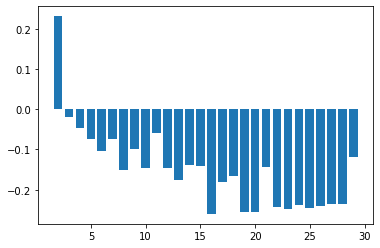

350-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 103ms/step - loss: 0.6879 - val_loss: 0.6707
Epoch 2/100
132/132 [==============================] - 0s 201us/step - loss: 0.6570 - val_loss: 0.6159
Epoch 3/100
132/132 [==============================] - 0s 190us/step - loss: 0.5853 - val_loss: 0.4983
Epoch 4/100
132/132 [==============================] - 0s 186us/step - loss: 0.4559 - val_loss: 0.3174
Epoch 5/100
132/132 [==============================] - 0s 191us/step - loss: 0.3078 - val_loss: 0.1561
Epoch 6/100
132/132 [==============================] - 0s 190us/step - loss: 0.2059 - val_loss: 0.0967
Epoch 7/100
132/132 [==============================] - 0s 191us/step - loss: 0.1765 - val_loss: 0.0939
Epoch 8/100
132/132 [==============================] - 0s 186us/step - loss: 0.1577 - val_loss: 0.0991
(165, 230)


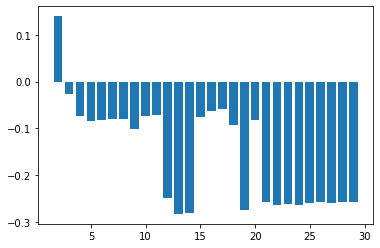

350-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 105ms/step - loss: 0.6867 - val_loss: 0.6674
Epoch 2/100
132/132 [==============================] - 0s 202us/step - loss: 0.6525 - val_loss: 0.6062
Epoch 3/100
132/132 [==============================] - 0s 190us/step - loss: 0.5719 - val_loss: 0.4771
Epoch 4/100
132/132 [==============================] - 0s 191us/step - loss: 0.4343 - val_loss: 0.2883
Epoch 5/100
132/132 [==============================] - 0s 193us/step - loss: 0.2843 - val_loss: 0.1371
Epoch 6/100
132/132 [==============================] - 0s 192us/step - loss: 0.2073 - val_loss: 0.0915
Epoch 7/100
132/132 [==============================] - 0s 191us/step - loss: 0.1774 - val_loss: 0.0916
(165, 220)


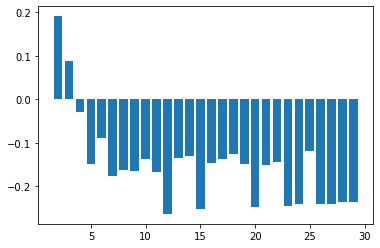

350-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 105ms/step - loss: 0.6877 - val_loss: 0.6699
Epoch 2/100
132/132 [==============================] - 0s 200us/step - loss: 0.6550 - val_loss: 0.6144
Epoch 3/100
132/132 [==============================] - 0s 193us/step - loss: 0.5841 - val_loss: 0.4972
Epoch 4/100
132/132 [==============================] - 0s 194us/step - loss: 0.4500 - val_loss: 0.3172
Epoch 5/100
132/132 [==============================] - 0s 194us/step - loss: 0.2907 - val_loss: 0.1538
Epoch 6/100
132/132 [==============================] - 0s 194us/step - loss: 0.2055 - val_loss: 0.0919
Epoch 7/100
132/132 [==============================] - 0s 195us/step - loss: 0.1753 - val_loss: 0.0895
Epoch 8/100
132/132 [==============================] - 0s 192us/step - loss: 0.1551 - val_loss: 0.0941
(165, 210)


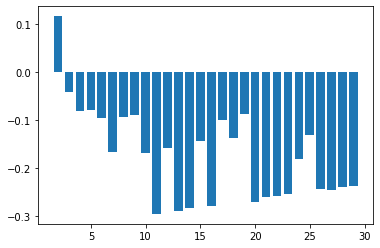

350-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 107ms/step - loss: 0.6874 - val_loss: 0.6696
Epoch 2/100
132/132 [==============================] - 0s 204us/step - loss: 0.6570 - val_loss: 0.6141
Epoch 3/100
132/132 [==============================] - 0s 196us/step - loss: 0.5852 - val_loss: 0.4963
Epoch 4/100
132/132 [==============================] - 0s 191us/step - loss: 0.4659 - val_loss: 0.3194
Epoch 5/100
132/132 [==============================] - 0s 190us/step - loss: 0.3065 - val_loss: 0.1617
Epoch 6/100
132/132 [==============================] - 0s 194us/step - loss: 0.2049 - val_loss: 0.0966
Epoch 7/100
132/132 [==============================] - 0s 192us/step - loss: 0.1677 - val_loss: 0.0916
Epoch 8/100
132/132 [==============================] - 0s 190us/step - loss: 0.1489 - val_loss: 0.0964
(165, 200)


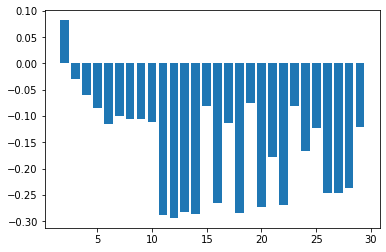

350-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 107ms/step - loss: 0.6893 - val_loss: 0.6754
Epoch 2/100
132/132 [==============================] - 0s 206us/step - loss: 0.6641 - val_loss: 0.6332
Epoch 3/100
132/132 [==============================] - 0s 196us/step - loss: 0.6075 - val_loss: 0.5407
Epoch 4/100
132/132 [==============================] - 0s 199us/step - loss: 0.4980 - val_loss: 0.3834
Epoch 5/100
132/132 [==============================] - 0s 198us/step - loss: 0.3514 - val_loss: 0.2071
Epoch 6/100
132/132 [==============================] - 0s 193us/step - loss: 0.2248 - val_loss: 0.1073
Epoch 7/100
132/132 [==============================] - 0s 197us/step - loss: 0.1784 - val_loss: 0.0876
Epoch 8/100
132/132 [==============================] - 0s 195us/step - loss: 0.1537 - val_loss: 0.0904
(165, 190)


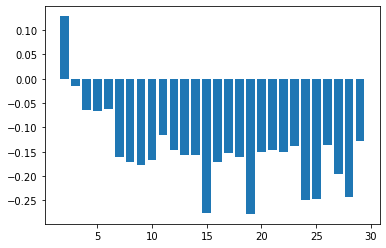

350-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 107ms/step - loss: 0.6880 - val_loss: 0.6705
Epoch 2/100
132/132 [==============================] - 0s 199us/step - loss: 0.6575 - val_loss: 0.6169
Epoch 3/100
132/132 [==============================] - 0s 194us/step - loss: 0.5867 - val_loss: 0.5028
Epoch 4/100
132/132 [==============================] - 0s 195us/step - loss: 0.4580 - val_loss: 0.3242
Epoch 5/100
132/132 [==============================] - 0s 198us/step - loss: 0.3025 - val_loss: 0.1591
Epoch 6/100
132/132 [==============================] - 0s 196us/step - loss: 0.1994 - val_loss: 0.0928
Epoch 7/100
132/132 [==============================] - 0s 194us/step - loss: 0.1726 - val_loss: 0.0880
Epoch 8/100
132/132 [==============================] - 0s 188us/step - loss: 0.1582 - val_loss: 0.0922
(165, 180)


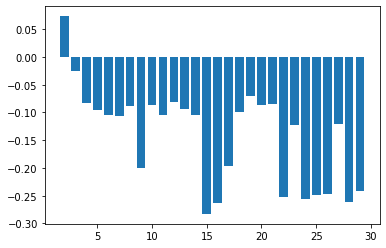

350-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 108ms/step - loss: 0.6882 - val_loss: 0.6726
Epoch 2/100
132/132 [==============================] - 0s 207us/step - loss: 0.6601 - val_loss: 0.6245
Epoch 3/100
132/132 [==============================] - 0s 194us/step - loss: 0.5969 - val_loss: 0.5226
Epoch 4/100
132/132 [==============================] - 0s 196us/step - loss: 0.4812 - val_loss: 0.3599
Epoch 5/100
132/132 [==============================] - 0s 192us/step - loss: 0.3380 - val_loss: 0.1927
Epoch 6/100
132/132 [==============================] - 0s 188us/step - loss: 0.2174 - val_loss: 0.1052
Epoch 7/100
132/132 [==============================] - 0s 191us/step - loss: 0.1735 - val_loss: 0.0882
Epoch 8/100
132/132 [==============================] - 0s 194us/step - loss: 0.1535 - val_loss: 0.0918
(165, 170)


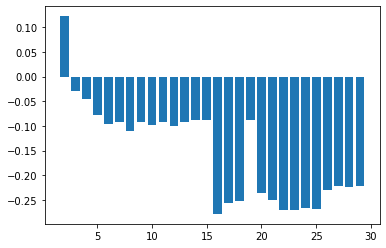

350-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 14s 109ms/step - loss: 0.6877 - val_loss: 0.6725
Epoch 2/100
132/132 [==============================] - 0s 203us/step - loss: 0.6604 - val_loss: 0.6252
Epoch 3/100
132/132 [==============================] - 0s 195us/step - loss: 0.5957 - val_loss: 0.5246
Epoch 4/100
132/132 [==============================] - 0s 189us/step - loss: 0.4824 - val_loss: 0.3619
Epoch 5/100
132/132 [==============================] - 0s 194us/step - loss: 0.3331 - val_loss: 0.1920
Epoch 6/100
132/132 [==============================] - 0s 197us/step - loss: 0.2279 - val_loss: 0.1047
Epoch 7/100
132/132 [==============================] - 0s 199us/step - loss: 0.1797 - val_loss: 0.0888
Epoch 8/100
132/132 [==============================] - 0s 196us/step - loss: 0.1575 - val_loss: 0.0902
(165, 160)


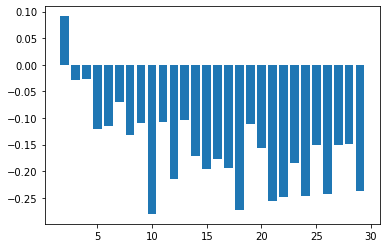

350-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 111ms/step - loss: 0.6883 - val_loss: 0.6720
Epoch 2/100
132/132 [==============================] - 0s 202us/step - loss: 0.6596 - val_loss: 0.6260
Epoch 3/100
132/132 [==============================] - 0s 215us/step - loss: 0.5992 - val_loss: 0.5300
Epoch 4/100
132/132 [==============================] - 0s 196us/step - loss: 0.4929 - val_loss: 0.3752
Epoch 5/100
132/132 [==============================] - 0s 201us/step - loss: 0.3385 - val_loss: 0.2088
Epoch 6/100
132/132 [==============================] - 0s 218us/step - loss: 0.2253 - val_loss: 0.1099
Epoch 7/100
132/132 [==============================] - 0s 189us/step - loss: 0.1724 - val_loss: 0.0899
Epoch 8/100
132/132 [==============================] - 0s 186us/step - loss: 0.1509 - val_loss: 0.0925
(165, 150)


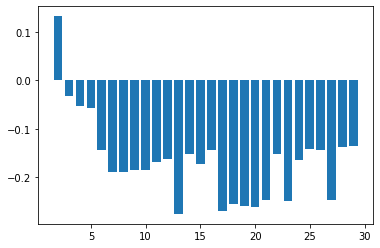

350-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 110ms/step - loss: 0.6891 - val_loss: 0.6765
Epoch 2/100
132/132 [==============================] - 0s 208us/step - loss: 0.6658 - val_loss: 0.6393
Epoch 3/100
132/132 [==============================] - 0s 200us/step - loss: 0.6152 - val_loss: 0.5599
Epoch 4/100
132/132 [==============================] - 0s 200us/step - loss: 0.5171 - val_loss: 0.4222
Epoch 5/100
132/132 [==============================] - 0s 196us/step - loss: 0.3877 - val_loss: 0.2518
Epoch 6/100
132/132 [==============================] - 0s 197us/step - loss: 0.2477 - val_loss: 0.1315
Epoch 7/100
132/132 [==============================] - 0s 196us/step - loss: 0.1858 - val_loss: 0.0899
Epoch 8/100
132/132 [==============================] - 0s 187us/step - loss: 0.1651 - val_loss: 0.0879
Epoch 9/100
132/132 [==============================] - 0s 194us/step - loss: 0.1392 - val_loss: 0.0908
(165, 140)


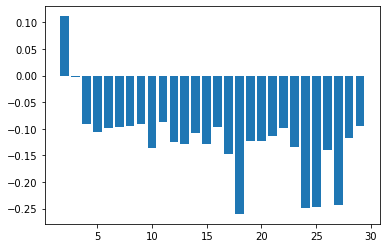

350-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 111ms/step - loss: 0.6885 - val_loss: 0.6739
Epoch 2/100
132/132 [==============================] - 0s 204us/step - loss: 0.6633 - val_loss: 0.6308
Epoch 3/100
132/132 [==============================] - 0s 195us/step - loss: 0.6072 - val_loss: 0.5406
Epoch 4/100
132/132 [==============================] - 0s 201us/step - loss: 0.5030 - val_loss: 0.3918
Epoch 5/100
132/132 [==============================] - 0s 199us/step - loss: 0.3649 - val_loss: 0.2216
Epoch 6/100
132/132 [==============================] - 0s 197us/step - loss: 0.2447 - val_loss: 0.1158
Epoch 7/100
132/132 [==============================] - 0s 195us/step - loss: 0.1912 - val_loss: 0.0888
Epoch 8/100
132/132 [==============================] - 0s 203us/step - loss: 0.1709 - val_loss: 0.0900
(165, 130)


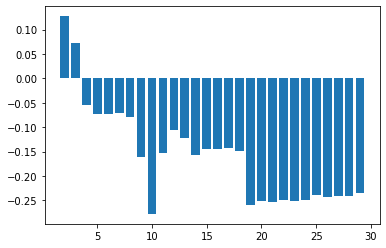

350-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 112ms/step - loss: 0.6877 - val_loss: 0.6718
Epoch 2/100
132/132 [==============================] - 0s 210us/step - loss: 0.6590 - val_loss: 0.6255
Epoch 3/100
132/132 [==============================] - 0s 199us/step - loss: 0.5974 - val_loss: 0.5314
Epoch 4/100
132/132 [==============================] - 0s 200us/step - loss: 0.4913 - val_loss: 0.3815
Epoch 5/100
132/132 [==============================] - 0s 200us/step - loss: 0.3488 - val_loss: 0.2173
Epoch 6/100
132/132 [==============================] - 0s 200us/step - loss: 0.2326 - val_loss: 0.1158
Epoch 7/100
132/132 [==============================] - 0s 199us/step - loss: 0.1797 - val_loss: 0.0874
Epoch 8/100
132/132 [==============================] - 0s 197us/step - loss: 0.1579 - val_loss: 0.0875
(165, 120)


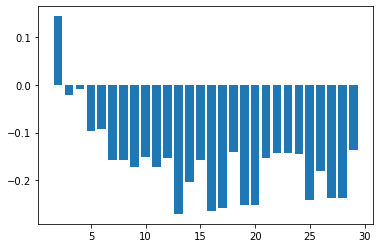

350-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 112ms/step - loss: 0.6894 - val_loss: 0.6767
Epoch 2/100
132/132 [==============================] - 0s 209us/step - loss: 0.6674 - val_loss: 0.6386
Epoch 3/100
132/132 [==============================] - 0s 199us/step - loss: 0.6158 - val_loss: 0.5579
Epoch 4/100
132/132 [==============================] - 0s 196us/step - loss: 0.5276 - val_loss: 0.4228
Epoch 5/100
132/132 [==============================] - 0s 199us/step - loss: 0.3902 - val_loss: 0.2595
Epoch 6/100
132/132 [==============================] - 0s 203us/step - loss: 0.2591 - val_loss: 0.1354
Epoch 7/100
132/132 [==============================] - 0s 195us/step - loss: 0.1932 - val_loss: 0.0912
Epoch 8/100
132/132 [==============================] - 0s 200us/step - loss: 0.1677 - val_loss: 0.0886
Epoch 9/100
132/132 [==============================] - 0s 196us/step - loss: 0.1429 - val_loss: 0.0924
(165, 110)


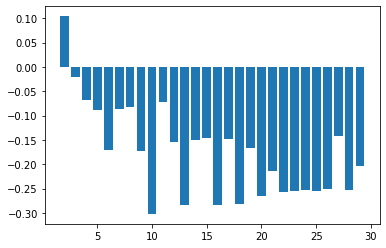

350-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 113ms/step - loss: 0.6902 - val_loss: 0.6783
Epoch 2/100
132/132 [==============================] - 0s 216us/step - loss: 0.6700 - val_loss: 0.6460
Epoch 3/100
132/132 [==============================] - 0s 208us/step - loss: 0.6285 - val_loss: 0.5791
Epoch 4/100
132/132 [==============================] - 0s 205us/step - loss: 0.5443 - val_loss: 0.4631
Epoch 5/100
132/132 [==============================] - 0s 199us/step - loss: 0.4259 - val_loss: 0.3063
Epoch 6/100
132/132 [==============================] - 0s 203us/step - loss: 0.2929 - val_loss: 0.1669
Epoch 7/100
132/132 [==============================] - 0s 202us/step - loss: 0.2127 - val_loss: 0.1007
Epoch 8/100
132/132 [==============================] - 0s 197us/step - loss: 0.1755 - val_loss: 0.0889
Epoch 9/100
132/132 [==============================] - 0s 203us/step - loss: 0.1536 - val_loss: 0.0905
(165, 100)


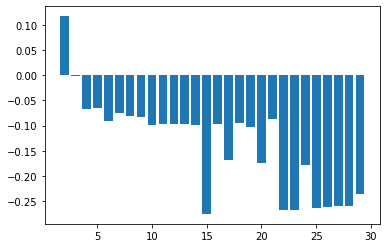

350-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 113ms/step - loss: 0.6895 - val_loss: 0.6768
Epoch 2/100
132/132 [==============================] - 0s 210us/step - loss: 0.6668 - val_loss: 0.6416
Epoch 3/100
132/132 [==============================] - 0s 201us/step - loss: 0.6188 - val_loss: 0.5706
Epoch 4/100
132/132 [==============================] - 0s 201us/step - loss: 0.5375 - val_loss: 0.4503
Epoch 5/100
132/132 [==============================] - 0s 199us/step - loss: 0.4070 - val_loss: 0.2967
Epoch 6/100
132/132 [==============================] - 0s 200us/step - loss: 0.2810 - val_loss: 0.1614
Epoch 7/100
132/132 [==============================] - 0s 200us/step - loss: 0.1966 - val_loss: 0.0992
Epoch 8/100
132/132 [==============================] - 0s 212us/step - loss: 0.1709 - val_loss: 0.0877
Epoch 9/100
132/132 [==============================] - 0s 212us/step - loss: 0.1503 - val_loss: 0.0898
(165, 90)


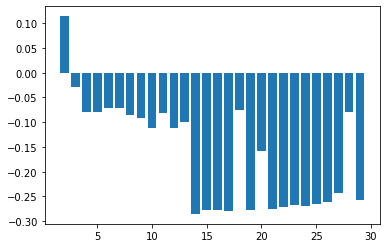

350-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 114ms/step - loss: 0.6889 - val_loss: 0.6756
Epoch 2/100
132/132 [==============================] - 0s 213us/step - loss: 0.6674 - val_loss: 0.6399
Epoch 3/100
132/132 [==============================] - 0s 208us/step - loss: 0.6202 - val_loss: 0.5699
Epoch 4/100
132/132 [==============================] - 0s 203us/step - loss: 0.5377 - val_loss: 0.4535
Epoch 5/100
132/132 [==============================] - 0s 197us/step - loss: 0.4131 - val_loss: 0.3030
Epoch 6/100
132/132 [==============================] - 0s 199us/step - loss: 0.2952 - val_loss: 0.1682
Epoch 7/100
132/132 [==============================] - 0s 199us/step - loss: 0.2073 - val_loss: 0.1025
Epoch 8/100
132/132 [==============================] - 0s 199us/step - loss: 0.1707 - val_loss: 0.0878
Epoch 9/100
132/132 [==============================] - 0s 198us/step - loss: 0.1435 - val_loss: 0.0876
Epoch 10/100
132/

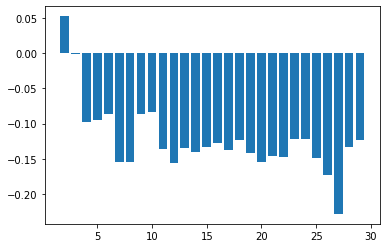

350-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 115ms/step - loss: 0.6902 - val_loss: 0.6794
Epoch 2/100
132/132 [==============================] - 0s 214us/step - loss: 0.6715 - val_loss: 0.6503
Epoch 3/100
132/132 [==============================] - 0s 201us/step - loss: 0.6308 - val_loss: 0.5899
Epoch 4/100
132/132 [==============================] - 0s 200us/step - loss: 0.5522 - val_loss: 0.4847
Epoch 5/100
132/132 [==============================] - 0s 198us/step - loss: 0.4426 - val_loss: 0.3397
Epoch 6/100
132/132 [==============================] - 0s 204us/step - loss: 0.3099 - val_loss: 0.2004
Epoch 7/100
132/132 [==============================] - 0s 201us/step - loss: 0.2103 - val_loss: 0.1168
Epoch 8/100
132/132 [==============================] - 0s 201us/step - loss: 0.1702 - val_loss: 0.0902
Epoch 9/100
132/132 [==============================] - 0s 198us/step - loss: 0.1527 - val_loss: 0.0883
Epoch 10/100
132/

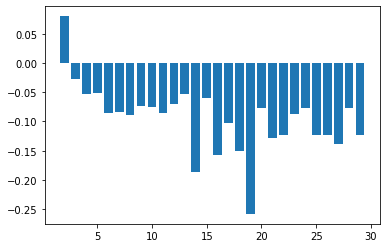

350-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 116ms/step - loss: 0.6908 - val_loss: 0.6821
Epoch 2/100
132/132 [==============================] - 0s 204us/step - loss: 0.6765 - val_loss: 0.6584
Epoch 3/100
132/132 [==============================] - 0s 203us/step - loss: 0.6429 - val_loss: 0.6088
Epoch 4/100
132/132 [==============================] - 0s 200us/step - loss: 0.5813 - val_loss: 0.5189
Epoch 5/100
132/132 [==============================] - 0s 200us/step - loss: 0.4825 - val_loss: 0.3846
Epoch 6/100
132/132 [==============================] - 0s 198us/step - loss: 0.3552 - val_loss: 0.2362
Epoch 7/100
132/132 [==============================] - 0s 198us/step - loss: 0.2359 - val_loss: 0.1306
Epoch 8/100
132/132 [==============================] - 0s 198us/step - loss: 0.1786 - val_loss: 0.0902
Epoch 9/100
132/132 [==============================] - 0s 203us/step - loss: 0.1569 - val_loss: 0.0857
Epoch 10/100
132/

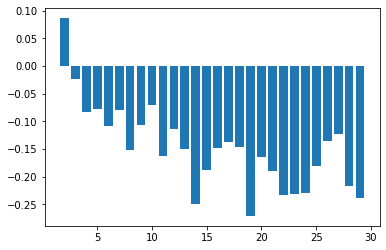

350-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 117ms/step - loss: 0.6893 - val_loss: 0.6793
Epoch 2/100
132/132 [==============================] - 0s 217us/step - loss: 0.6714 - val_loss: 0.6534
Epoch 3/100
132/132 [==============================] - 0s 207us/step - loss: 0.6359 - val_loss: 0.6050
Epoch 4/100
132/132 [==============================] - 0s 205us/step - loss: 0.5759 - val_loss: 0.5243
Epoch 5/100
132/132 [==============================] - 0s 206us/step - loss: 0.4941 - val_loss: 0.4091
Epoch 6/100
132/132 [==============================] - 0s 210us/step - loss: 0.3832 - val_loss: 0.2803
Epoch 7/100
132/132 [==============================] - 0s 219us/step - loss: 0.2758 - val_loss: 0.1709
Epoch 8/100
132/132 [==============================] - 0s 203us/step - loss: 0.2060 - val_loss: 0.1087
Epoch 9/100
132/132 [==============================] - 0s 206us/step - loss: 0.1661 - val_loss: 0.0899
Epoch 10/100
132/

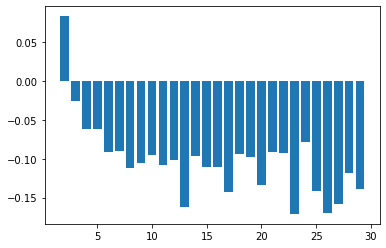

350-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 15s 117ms/step - loss: 0.6916 - val_loss: 0.6854
Epoch 2/100
132/132 [==============================] - 0s 218us/step - loss: 0.6803 - val_loss: 0.6691
Epoch 3/100
132/132 [==============================] - 0s 205us/step - loss: 0.6574 - val_loss: 0.6358
Epoch 4/100
132/132 [==============================] - 0s 202us/step - loss: 0.6133 - val_loss: 0.5748
Epoch 5/100
132/132 [==============================] - 0s 208us/step - loss: 0.5394 - val_loss: 0.4780
Epoch 6/100
132/132 [==============================] - 0s 203us/step - loss: 0.4444 - val_loss: 0.3496
Epoch 7/100
132/132 [==============================] - 0s 207us/step - loss: 0.3328 - val_loss: 0.2204
Epoch 8/100
132/132 [==============================] - 0s 199us/step - loss: 0.2389 - val_loss: 0.1335
Epoch 9/100
132/132 [==============================] - 0s 204us/step - loss: 0.1817 - val_loss: 0.0956
Epoch 10/100
132/

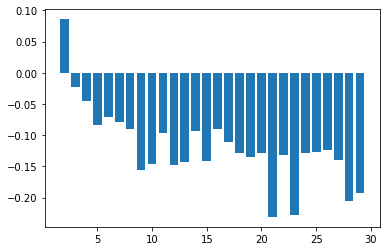

350-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 16s 119ms/step - loss: 0.6915 - val_loss: 0.6855
Epoch 2/100
132/132 [==============================] - 0s 213us/step - loss: 0.6814 - val_loss: 0.6706
Epoch 3/100
132/132 [==============================] - 0s 216us/step - loss: 0.6611 - val_loss: 0.6425
Epoch 4/100
132/132 [==============================] - 0s 207us/step - loss: 0.6250 - val_loss: 0.5937
Epoch 5/100
132/132 [==============================] - 0s 210us/step - loss: 0.5666 - val_loss: 0.5174
Epoch 6/100
132/132 [==============================] - 0s 201us/step - loss: 0.4845 - val_loss: 0.4120
Epoch 7/100
132/132 [==============================] - 0s 200us/step - loss: 0.3809 - val_loss: 0.2894
Epoch 8/100
132/132 [==============================] - 0s 206us/step - loss: 0.2788 - val_loss: 0.1802
Epoch 9/100
132/132 [==============================] - 0s 210us/step - loss: 0.2072 - val_loss: 0.1138
Epoch 10/100
132/

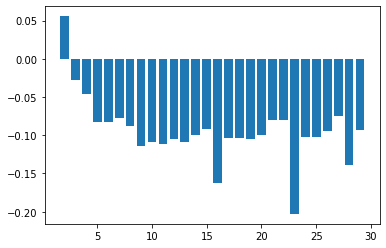

350-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 16s 119ms/step - loss: 0.6916 - val_loss: 0.6861
Epoch 2/100
132/132 [==============================] - 0s 217us/step - loss: 0.6817 - val_loss: 0.6713
Epoch 3/100
132/132 [==============================] - 0s 212us/step - loss: 0.6610 - val_loss: 0.6431
Epoch 4/100
132/132 [==============================] - 0s 206us/step - loss: 0.6241 - val_loss: 0.5950
Epoch 5/100
132/132 [==============================] - 0s 204us/step - loss: 0.5662 - val_loss: 0.5207
Epoch 6/100
132/132 [==============================] - 0s 207us/step - loss: 0.4859 - val_loss: 0.4192
Epoch 7/100
132/132 [==============================] - 0s 207us/step - loss: 0.3893 - val_loss: 0.3022
Epoch 8/100
132/132 [==============================] - 0s 208us/step - loss: 0.2931 - val_loss: 0.1971
Epoch 9/100
132/132 [==============================] - 0s 211us/step - loss: 0.2161 - val_loss: 0.1296
Epoch 10/100
132/

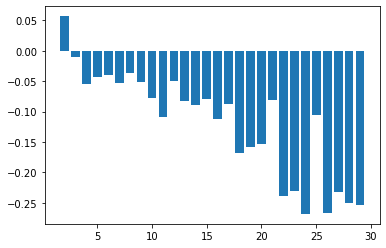

350-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 16s 120ms/step - loss: 0.6919 - val_loss: 0.6875
Epoch 2/100
132/132 [==============================] - 0s 226us/step - loss: 0.6839 - val_loss: 0.6754
Epoch 3/100
132/132 [==============================] - 0s 210us/step - loss: 0.6663 - val_loss: 0.6531
Epoch 4/100
132/132 [==============================] - 0s 207us/step - loss: 0.6357 - val_loss: 0.6160
Epoch 5/100
132/132 [==============================] - 0s 204us/step - loss: 0.5895 - val_loss: 0.5607
Epoch 6/100
132/132 [==============================] - 0s 207us/step - loss: 0.5247 - val_loss: 0.4863
Epoch 7/100
132/132 [==============================] - 0s 204us/step - loss: 0.4502 - val_loss: 0.3939
Epoch 8/100
132/132 [==============================] - 0s 204us/step - loss: 0.3633 - val_loss: 0.2965
Epoch 9/100
132/132 [==============================] - 0s 212us/step - loss: 0.2795 - val_loss: 0.2111
Epoch 10/100
132/

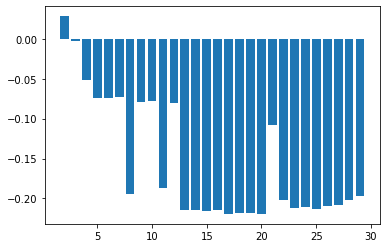

340-330dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 16s 120ms/step - loss: 0.6860 - val_loss: 0.6654
Epoch 2/100
132/132 [==============================] - 0s 225us/step - loss: 0.6466 - val_loss: 0.5911
Epoch 3/100
132/132 [==============================] - 0s 214us/step - loss: 0.5472 - val_loss: 0.4330
Epoch 4/100
132/132 [==============================] - 0s 213us/step - loss: 0.3941 - val_loss: 0.2286
Epoch 5/100
132/132 [==============================] - 0s 211us/step - loss: 0.2552 - val_loss: 0.1115
Epoch 6/100
132/132 [==============================] - 0s 214us/step - loss: 0.1872 - val_loss: 0.0914
Epoch 7/100
132/132 [==============================] - 0s 216us/step - loss: 0.1619 - val_loss: 0.0947
(165, 330)


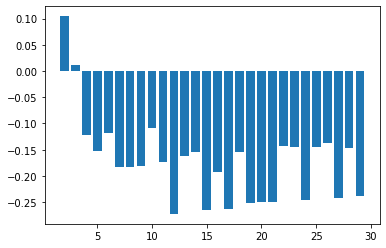

340-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 16s 122ms/step - loss: 0.6878 - val_loss: 0.6692
Epoch 2/100
132/132 [==============================] - 0s 224us/step - loss: 0.6544 - val_loss: 0.6062
Epoch 3/100
132/132 [==============================] - 0s 213us/step - loss: 0.5730 - val_loss: 0.4681
Epoch 4/100
132/132 [==============================] - 0s 209us/step - loss: 0.4231 - val_loss: 0.2664
Epoch 5/100
132/132 [==============================] - 0s 214us/step - loss: 0.2692 - val_loss: 0.1194
Epoch 6/100
132/132 [==============================] - 0s 218us/step - loss: 0.1957 - val_loss: 0.0866
Epoch 7/100
132/132 [==============================] - 0s 214us/step - loss: 0.1727 - val_loss: 0.0909
(165, 320)


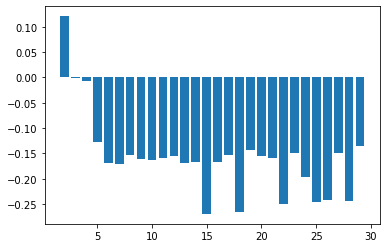

340-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 16s 123ms/step - loss: 0.6879 - val_loss: 0.6684
Epoch 2/100
132/132 [==============================] - 0s 220us/step - loss: 0.6532 - val_loss: 0.6039
Epoch 3/100
132/132 [==============================] - 0s 214us/step - loss: 0.5700 - val_loss: 0.4644
Epoch 4/100
132/132 [==============================] - 0s 214us/step - loss: 0.4200 - val_loss: 0.2659
Epoch 5/100
132/132 [==============================] - 0s 209us/step - loss: 0.2544 - val_loss: 0.1216
Epoch 6/100
132/132 [==============================] - 0s 206us/step - loss: 0.1743 - val_loss: 0.0894
Epoch 7/100
132/132 [==============================] - 0s 211us/step - loss: 0.1576 - val_loss: 0.0969
(165, 310)


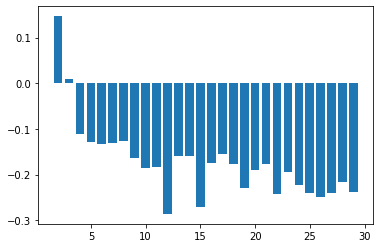

340-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 131ms/step - loss: 0.6882 - val_loss: 0.6689
Epoch 2/100
132/132 [==============================] - 0s 226us/step - loss: 0.6538 - val_loss: 0.6066
Epoch 3/100
132/132 [==============================] - 0s 218us/step - loss: 0.5730 - val_loss: 0.4704
Epoch 4/100
132/132 [==============================] - 0s 214us/step - loss: 0.4239 - val_loss: 0.2708
Epoch 5/100
132/132 [==============================] - 0s 225us/step - loss: 0.2710 - val_loss: 0.1257
Epoch 6/100
132/132 [==============================] - 0s 218us/step - loss: 0.1962 - val_loss: 0.0922
Epoch 7/100
132/132 [==============================] - 0s 213us/step - loss: 0.1788 - val_loss: 0.0978
(165, 300)


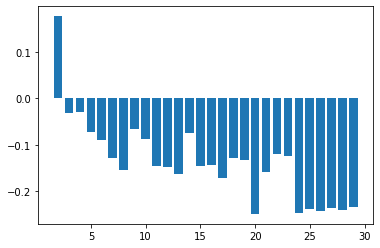

340-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 131ms/step - loss: 0.6874 - val_loss: 0.6677
Epoch 2/100
132/132 [==============================] - 0s 229us/step - loss: 0.6530 - val_loss: 0.6016
Epoch 3/100
132/132 [==============================] - 0s 216us/step - loss: 0.5684 - val_loss: 0.4624
Epoch 4/100
132/132 [==============================] - 0s 218us/step - loss: 0.4226 - val_loss: 0.2673
Epoch 5/100
132/132 [==============================] - 0s 214us/step - loss: 0.2751 - val_loss: 0.1281
Epoch 6/100
132/132 [==============================] - 0s 210us/step - loss: 0.2007 - val_loss: 0.0947
Epoch 7/100
132/132 [==============================] - 0s 216us/step - loss: 0.1803 - val_loss: 0.0996
(165, 290)


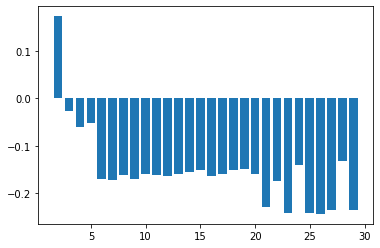

340-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 132ms/step - loss: 0.6878 - val_loss: 0.6681
Epoch 2/100
132/132 [==============================] - 0s 227us/step - loss: 0.6546 - val_loss: 0.6054
Epoch 3/100
132/132 [==============================] - 0s 215us/step - loss: 0.5735 - val_loss: 0.4710
Epoch 4/100
132/132 [==============================] - 0s 209us/step - loss: 0.4352 - val_loss: 0.2764
Epoch 5/100
132/132 [==============================] - 0s 213us/step - loss: 0.2715 - val_loss: 0.1304
Epoch 6/100
132/132 [==============================] - 0s 211us/step - loss: 0.1992 - val_loss: 0.0914
Epoch 7/100
132/132 [==============================] - 0s 218us/step - loss: 0.1764 - val_loss: 0.0967
(165, 280)


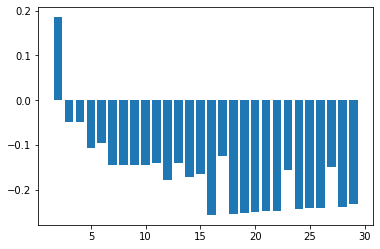

340-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 131ms/step - loss: 0.6891 - val_loss: 0.6727
Epoch 2/100
132/132 [==============================] - 0s 227us/step - loss: 0.6599 - val_loss: 0.6203
Epoch 3/100
132/132 [==============================] - 0s 223us/step - loss: 0.5871 - val_loss: 0.5012
Epoch 4/100
132/132 [==============================] - 0s 220us/step - loss: 0.4502 - val_loss: 0.3105
Epoch 5/100
132/132 [==============================] - 0s 224us/step - loss: 0.2931 - val_loss: 0.1422
Epoch 6/100
132/132 [==============================] - 0s 225us/step - loss: 0.2032 - val_loss: 0.0884
Epoch 7/100
132/132 [==============================] - 0s 215us/step - loss: 0.1826 - val_loss: 0.0895
(165, 270)


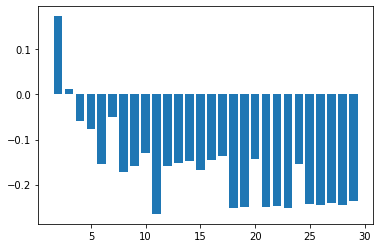

340-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 132ms/step - loss: 0.6890 - val_loss: 0.6721
Epoch 2/100
132/132 [==============================] - 0s 231us/step - loss: 0.6599 - val_loss: 0.6190
Epoch 3/100
132/132 [==============================] - 0s 223us/step - loss: 0.5906 - val_loss: 0.4993
Epoch 4/100
132/132 [==============================] - 0s 218us/step - loss: 0.4561 - val_loss: 0.3105
Epoch 5/100
132/132 [==============================] - 0s 219us/step - loss: 0.2893 - val_loss: 0.1453
Epoch 6/100
132/132 [==============================] - 0s 213us/step - loss: 0.1903 - val_loss: 0.0917
Epoch 7/100
132/132 [==============================] - 0s 217us/step - loss: 0.1694 - val_loss: 0.0932
(165, 260)


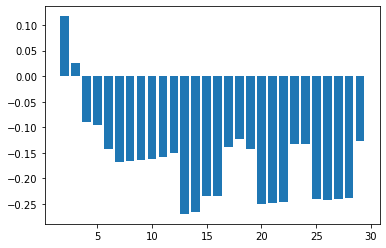

340-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 131ms/step - loss: 0.6881 - val_loss: 0.6702
Epoch 2/100
132/132 [==============================] - 0s 226us/step - loss: 0.6563 - val_loss: 0.6143
Epoch 3/100
132/132 [==============================] - 0s 218us/step - loss: 0.5842 - val_loss: 0.4923
Epoch 4/100
132/132 [==============================] - 0s 218us/step - loss: 0.4512 - val_loss: 0.3055
Epoch 5/100
132/132 [==============================] - 0s 220us/step - loss: 0.2948 - val_loss: 0.1449
Epoch 6/100
132/132 [==============================] - 0s 222us/step - loss: 0.1945 - val_loss: 0.0908
Epoch 7/100
132/132 [==============================] - 0s 219us/step - loss: 0.1664 - val_loss: 0.0906
Epoch 8/100
132/132 [==============================] - 0s 223us/step - loss: 0.1529 - val_loss: 0.0960
(165, 250)


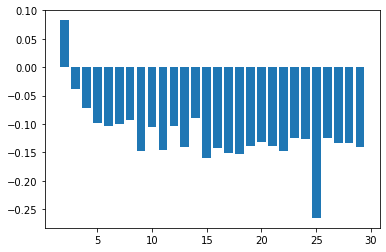

340-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 131ms/step - loss: 0.6880 - val_loss: 0.6703
Epoch 2/100
132/132 [==============================] - 0s 230us/step - loss: 0.6570 - val_loss: 0.6157
Epoch 3/100
132/132 [==============================] - 0s 224us/step - loss: 0.5870 - val_loss: 0.4982
Epoch 4/100
132/132 [==============================] - 0s 217us/step - loss: 0.4667 - val_loss: 0.3176
Epoch 5/100
132/132 [==============================] - 0s 221us/step - loss: 0.3130 - val_loss: 0.1583
Epoch 6/100
132/132 [==============================] - 0s 219us/step - loss: 0.2022 - val_loss: 0.0977
Epoch 7/100
132/132 [==============================] - 0s 222us/step - loss: 0.1695 - val_loss: 0.0925
Epoch 8/100
132/132 [==============================] - 0s 218us/step - loss: 0.1524 - val_loss: 0.0978
(165, 240)


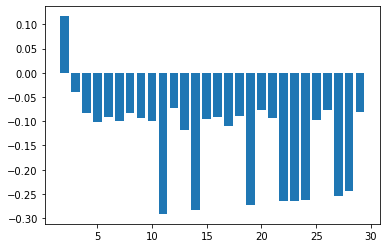

340-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 131ms/step - loss: 0.6878 - val_loss: 0.6706
Epoch 2/100
132/132 [==============================] - 0s 228us/step - loss: 0.6573 - val_loss: 0.6153
Epoch 3/100
132/132 [==============================] - 0s 225us/step - loss: 0.5854 - val_loss: 0.4957
Epoch 4/100
132/132 [==============================] - 0s 219us/step - loss: 0.4476 - val_loss: 0.3115
Epoch 5/100
132/132 [==============================] - 0s 216us/step - loss: 0.2892 - val_loss: 0.1486
Epoch 6/100
132/132 [==============================] - 0s 224us/step - loss: 0.2063 - val_loss: 0.0910
Epoch 7/100
132/132 [==============================] - 0s 219us/step - loss: 0.1846 - val_loss: 0.0906
Epoch 8/100
132/132 [==============================] - 0s 218us/step - loss: 0.1675 - val_loss: 0.0960
(165, 230)


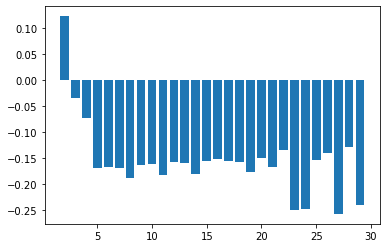

340-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 130ms/step - loss: 0.6885 - val_loss: 0.6717
Epoch 2/100
132/132 [==============================] - 0s 230us/step - loss: 0.6601 - val_loss: 0.6190
Epoch 3/100
132/132 [==============================] - 0s 220us/step - loss: 0.5882 - val_loss: 0.5046
Epoch 4/100
132/132 [==============================] - 0s 214us/step - loss: 0.4659 - val_loss: 0.3244
Epoch 5/100
132/132 [==============================] - 0s 223us/step - loss: 0.3081 - val_loss: 0.1589
Epoch 6/100
132/132 [==============================] - 0s 223us/step - loss: 0.2073 - val_loss: 0.0940
Epoch 7/100
132/132 [==============================] - 0s 217us/step - loss: 0.1785 - val_loss: 0.0912
Epoch 8/100
132/132 [==============================] - 0s 219us/step - loss: 0.1635 - val_loss: 0.0966
(165, 220)


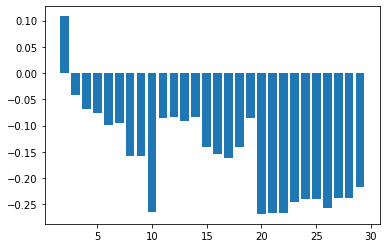

340-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 131ms/step - loss: 0.6880 - val_loss: 0.6719
Epoch 2/100
132/132 [==============================] - 0s 228us/step - loss: 0.6594 - val_loss: 0.6209
Epoch 3/100
132/132 [==============================] - 0s 223us/step - loss: 0.5935 - val_loss: 0.5114
Epoch 4/100
132/132 [==============================] - 0s 226us/step - loss: 0.4689 - val_loss: 0.3393
Epoch 5/100
132/132 [==============================] - 0s 221us/step - loss: 0.3145 - val_loss: 0.1717
Epoch 6/100
132/132 [==============================] - 0s 220us/step - loss: 0.2114 - val_loss: 0.0988
Epoch 7/100
132/132 [==============================] - 0s 216us/step - loss: 0.1766 - val_loss: 0.0926
Epoch 8/100
132/132 [==============================] - 0s 225us/step - loss: 0.1551 - val_loss: 0.0972
(165, 210)


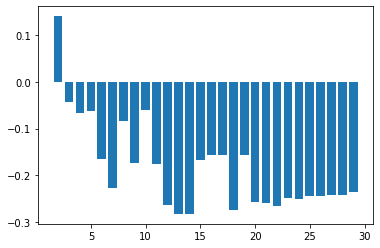

340-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 17s 132ms/step - loss: 0.6883 - val_loss: 0.6727
Epoch 2/100
132/132 [==============================] - 0s 232us/step - loss: 0.6602 - val_loss: 0.6234
Epoch 3/100
132/132 [==============================] - 0s 225us/step - loss: 0.5965 - val_loss: 0.5158
Epoch 4/100
132/132 [==============================] - 0s 224us/step - loss: 0.4760 - val_loss: 0.3444
Epoch 5/100
132/132 [==============================] - 0s 221us/step - loss: 0.3261 - val_loss: 0.1751
Epoch 6/100
132/132 [==============================] - 0s 221us/step - loss: 0.2175 - val_loss: 0.0994
Epoch 7/100
132/132 [==============================] - 0s 218us/step - loss: 0.1799 - val_loss: 0.0891
Epoch 8/100
132/132 [==============================] - 0s 219us/step - loss: 0.1548 - val_loss: 0.0928
(165, 200)


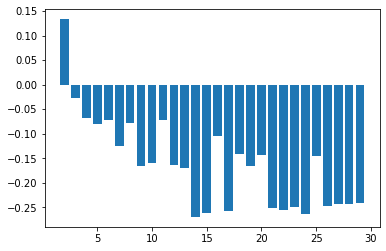

340-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 133ms/step - loss: 0.6893 - val_loss: 0.6751
Epoch 2/100
132/132 [==============================] - 0s 232us/step - loss: 0.6649 - val_loss: 0.6322
Epoch 3/100
132/132 [==============================] - 0s 224us/step - loss: 0.6088 - val_loss: 0.5391
Epoch 4/100
132/132 [==============================] - 0s 223us/step - loss: 0.4988 - val_loss: 0.3827
Epoch 5/100
132/132 [==============================] - 0s 217us/step - loss: 0.3463 - val_loss: 0.2076
Epoch 6/100
132/132 [==============================] - 0s 223us/step - loss: 0.2287 - val_loss: 0.1078
Epoch 7/100
132/132 [==============================] - 0s 227us/step - loss: 0.1813 - val_loss: 0.0895
Epoch 8/100
132/132 [==============================] - 0s 232us/step - loss: 0.1652 - val_loss: 0.0933
(165, 190)


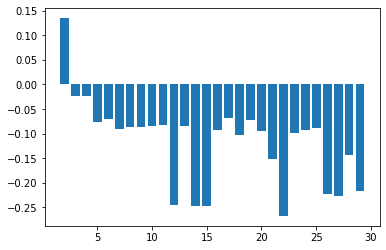

340-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 133ms/step - loss: 0.6885 - val_loss: 0.6721
Epoch 2/100
132/132 [==============================] - 0s 236us/step - loss: 0.6596 - val_loss: 0.6226
Epoch 3/100
132/132 [==============================] - 0s 225us/step - loss: 0.5940 - val_loss: 0.5187
Epoch 4/100
132/132 [==============================] - 0s 222us/step - loss: 0.4723 - val_loss: 0.3534
Epoch 5/100
132/132 [==============================] - 0s 223us/step - loss: 0.3228 - val_loss: 0.1841
Epoch 6/100
132/132 [==============================] - 0s 224us/step - loss: 0.2079 - val_loss: 0.1014
Epoch 7/100
132/132 [==============================] - 0s 223us/step - loss: 0.1726 - val_loss: 0.0882
Epoch 8/100
132/132 [==============================] - 0s 221us/step - loss: 0.1543 - val_loss: 0.0928
(165, 180)


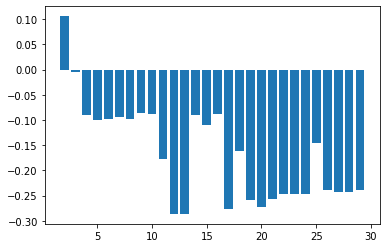

340-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 134ms/step - loss: 0.6892 - val_loss: 0.6753
Epoch 2/100
132/132 [==============================] - 0s 235us/step - loss: 0.6645 - val_loss: 0.6329
Epoch 3/100
132/132 [==============================] - 0s 226us/step - loss: 0.6071 - val_loss: 0.5405
Epoch 4/100
132/132 [==============================] - 0s 228us/step - loss: 0.4955 - val_loss: 0.3846
Epoch 5/100
132/132 [==============================] - 0s 226us/step - loss: 0.3502 - val_loss: 0.2082
Epoch 6/100
132/132 [==============================] - 0s 225us/step - loss: 0.2317 - val_loss: 0.1079
Epoch 7/100
132/132 [==============================] - 0s 224us/step - loss: 0.1851 - val_loss: 0.0879
Epoch 8/100
132/132 [==============================] - 0s 230us/step - loss: 0.1635 - val_loss: 0.0905
(165, 170)


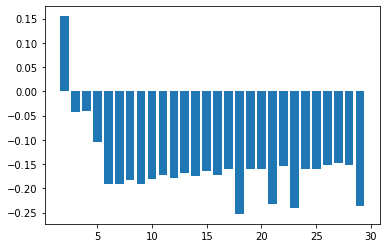

340-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 135ms/step - loss: 0.6893 - val_loss: 0.6760
Epoch 2/100
132/132 [==============================] - 0s 237us/step - loss: 0.6660 - val_loss: 0.6358
Epoch 3/100
132/132 [==============================] - 0s 225us/step - loss: 0.6117 - val_loss: 0.5473
Epoch 4/100
132/132 [==============================] - 0s 224us/step - loss: 0.5034 - val_loss: 0.3954
Epoch 5/100
132/132 [==============================] - 0s 225us/step - loss: 0.3566 - val_loss: 0.2199
Epoch 6/100
132/132 [==============================] - 0s 235us/step - loss: 0.2426 - val_loss: 0.1153
Epoch 7/100
132/132 [==============================] - 0s 228us/step - loss: 0.1909 - val_loss: 0.0921
Epoch 8/100
132/132 [==============================] - 0s 225us/step - loss: 0.1687 - val_loss: 0.0934
(165, 160)


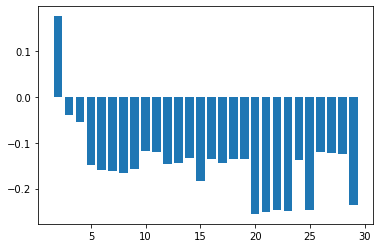

340-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 135ms/step - loss: 0.6894 - val_loss: 0.6766
Epoch 2/100
132/132 [==============================] - 0s 238us/step - loss: 0.6678 - val_loss: 0.6395
Epoch 3/100
132/132 [==============================] - 0s 226us/step - loss: 0.6175 - val_loss: 0.5596
Epoch 4/100
132/132 [==============================] - 0s 230us/step - loss: 0.5273 - val_loss: 0.4211
Epoch 5/100
132/132 [==============================] - 0s 222us/step - loss: 0.3864 - val_loss: 0.2502
Epoch 6/100
132/132 [==============================] - 0s 226us/step - loss: 0.2534 - val_loss: 0.1264
Epoch 7/100
132/132 [==============================] - 0s 227us/step - loss: 0.1798 - val_loss: 0.0882
Epoch 8/100
132/132 [==============================] - 0s 222us/step - loss: 0.1622 - val_loss: 0.0876
Epoch 9/100
132/132 [==============================] - 0s 226us/step - loss: 0.1391 - val_loss: 0.0912
(165, 150)


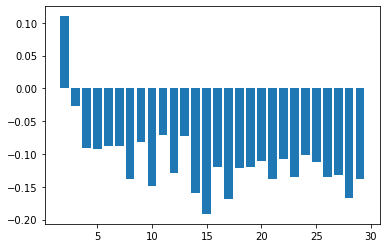

340-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 136ms/step - loss: 0.6900 - val_loss: 0.6780
Epoch 2/100
132/132 [==============================] - 0s 236us/step - loss: 0.6686 - val_loss: 0.6426
Epoch 3/100
132/132 [==============================] - 0s 226us/step - loss: 0.6198 - val_loss: 0.5655
Epoch 4/100
132/132 [==============================] - 0s 222us/step - loss: 0.5275 - val_loss: 0.4285
Epoch 5/100
132/132 [==============================] - 0s 227us/step - loss: 0.3910 - val_loss: 0.2550
Epoch 6/100
132/132 [==============================] - 0s 221us/step - loss: 0.2612 - val_loss: 0.1290
Epoch 7/100
132/132 [==============================] - 0s 223us/step - loss: 0.1864 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 223us/step - loss: 0.1626 - val_loss: 0.0874
Epoch 9/100
132/132 [==============================] - 0s 224us/step - loss: 0.1403 - val_loss: 0.0908
(165, 140)


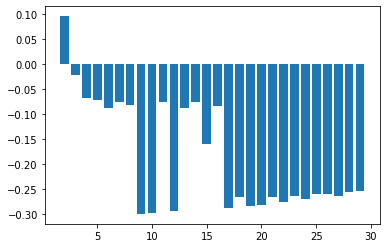

340-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 138ms/step - loss: 0.6881 - val_loss: 0.6730
Epoch 2/100
132/132 [==============================] - 0s 240us/step - loss: 0.6627 - val_loss: 0.6301
Epoch 3/100
132/132 [==============================] - 0s 225us/step - loss: 0.6075 - val_loss: 0.5403
Epoch 4/100
132/132 [==============================] - 0s 225us/step - loss: 0.5031 - val_loss: 0.3922
Epoch 5/100
132/132 [==============================] - 0s 226us/step - loss: 0.3617 - val_loss: 0.2228
Epoch 6/100
132/132 [==============================] - 0s 229us/step - loss: 0.2364 - val_loss: 0.1160
Epoch 7/100
132/132 [==============================] - 0s 230us/step - loss: 0.1753 - val_loss: 0.0875
Epoch 8/100
132/132 [==============================] - 0s 227us/step - loss: 0.1543 - val_loss: 0.0882
(165, 130)


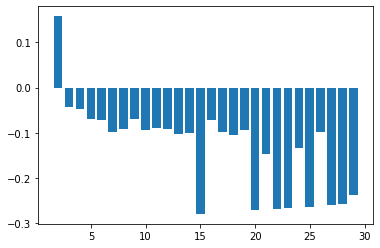

340-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 137ms/step - loss: 0.6883 - val_loss: 0.6742
Epoch 2/100
132/132 [==============================] - 0s 240us/step - loss: 0.6633 - val_loss: 0.6310
Epoch 3/100
132/132 [==============================] - 0s 228us/step - loss: 0.6063 - val_loss: 0.5427
Epoch 4/100
132/132 [==============================] - 0s 228us/step - loss: 0.5046 - val_loss: 0.3995
Epoch 5/100
132/132 [==============================] - 0s 227us/step - loss: 0.3710 - val_loss: 0.2343
Epoch 6/100
132/132 [==============================] - 0s 231us/step - loss: 0.2406 - val_loss: 0.1252
Epoch 7/100
132/132 [==============================] - 0s 231us/step - loss: 0.1790 - val_loss: 0.0912
Epoch 8/100
132/132 [==============================] - 0s 231us/step - loss: 0.1573 - val_loss: 0.0905
Epoch 9/100
132/132 [==============================] - 0s 229us/step - loss: 0.1398 - val_loss: 0.0933
(165, 120)


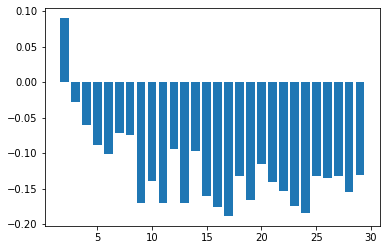

340-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 138ms/step - loss: 0.6889 - val_loss: 0.6761
Epoch 2/100
132/132 [==============================] - 0s 241us/step - loss: 0.6660 - val_loss: 0.6397
Epoch 3/100
132/132 [==============================] - 0s 233us/step - loss: 0.6157 - val_loss: 0.5639
Epoch 4/100
132/132 [==============================] - 0s 228us/step - loss: 0.5286 - val_loss: 0.4354
Epoch 5/100
132/132 [==============================] - 0s 229us/step - loss: 0.4082 - val_loss: 0.2752
Epoch 6/100
132/132 [==============================] - 0s 232us/step - loss: 0.2799 - val_loss: 0.1495
Epoch 7/100
132/132 [==============================] - 0s 231us/step - loss: 0.2007 - val_loss: 0.0962
Epoch 8/100
132/132 [==============================] - 0s 227us/step - loss: 0.1658 - val_loss: 0.0859
Epoch 9/100
132/132 [==============================] - 0s 228us/step - loss: 0.1450 - val_loss: 0.0877
(165, 110)


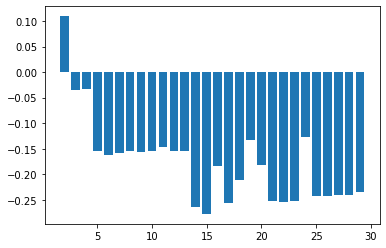

340-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 139ms/step - loss: 0.6896 - val_loss: 0.6782
Epoch 2/100
132/132 [==============================] - 0s 241us/step - loss: 0.6696 - val_loss: 0.6464
Epoch 3/100
132/132 [==============================] - 0s 232us/step - loss: 0.6282 - val_loss: 0.5798
Epoch 4/100
132/132 [==============================] - 0s 225us/step - loss: 0.5462 - val_loss: 0.4625
Epoch 5/100
132/132 [==============================] - 0s 226us/step - loss: 0.4310 - val_loss: 0.3026
Epoch 6/100
132/132 [==============================] - 0s 230us/step - loss: 0.3005 - val_loss: 0.1625
Epoch 7/100
132/132 [==============================] - 0s 229us/step - loss: 0.2096 - val_loss: 0.0989
Epoch 8/100
132/132 [==============================] - 0s 230us/step - loss: 0.1755 - val_loss: 0.0874
Epoch 9/100
132/132 [==============================] - 0s 233us/step - loss: 0.1515 - val_loss: 0.0894
(165, 100)


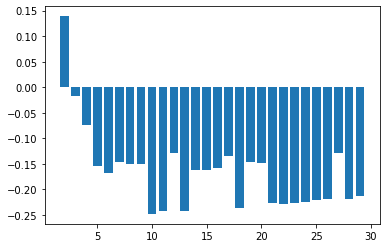

340-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 18s 140ms/step - loss: 0.6896 - val_loss: 0.6779
Epoch 2/100
132/132 [==============================] - 0s 237us/step - loss: 0.6699 - val_loss: 0.6454
Epoch 3/100
132/132 [==============================] - 0s 231us/step - loss: 0.6269 - val_loss: 0.5791
Epoch 4/100
132/132 [==============================] - 0s 233us/step - loss: 0.5508 - val_loss: 0.4654
Epoch 5/100
132/132 [==============================] - 0s 232us/step - loss: 0.4401 - val_loss: 0.3154
Epoch 6/100
132/132 [==============================] - 0s 232us/step - loss: 0.3015 - val_loss: 0.1808
Epoch 7/100
132/132 [==============================] - 0s 233us/step - loss: 0.2150 - val_loss: 0.1063
Epoch 8/100
132/132 [==============================] - 0s 232us/step - loss: 0.1760 - val_loss: 0.0888
Epoch 9/100
132/132 [==============================] - 0s 231us/step - loss: 0.1551 - val_loss: 0.0902
(165, 90)


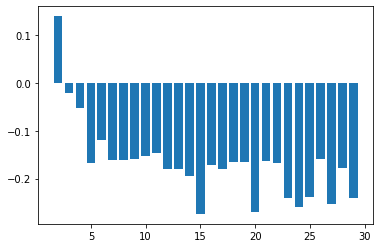

340-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 141ms/step - loss: 0.6892 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 239us/step - loss: 0.6689 - val_loss: 0.6413
Epoch 3/100
132/132 [==============================] - 0s 232us/step - loss: 0.6238 - val_loss: 0.5710
Epoch 4/100
132/132 [==============================] - 0s 229us/step - loss: 0.5406 - val_loss: 0.4530
Epoch 5/100
132/132 [==============================] - 0s 229us/step - loss: 0.4197 - val_loss: 0.2989
Epoch 6/100
132/132 [==============================] - 0s 227us/step - loss: 0.2975 - val_loss: 0.1648
Epoch 7/100
132/132 [==============================] - 0s 231us/step - loss: 0.2070 - val_loss: 0.1021
Epoch 8/100
132/132 [==============================] - 0s 229us/step - loss: 0.1762 - val_loss: 0.0882
Epoch 9/100
132/132 [==============================] - 0s 225us/step - loss: 0.1549 - val_loss: 0.0899
(165, 80)


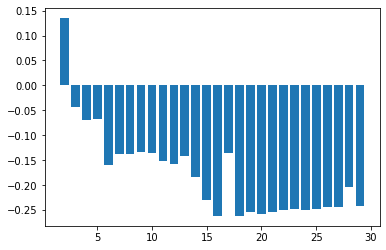

340-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 142ms/step - loss: 0.6896 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 238us/step - loss: 0.6709 - val_loss: 0.6487
Epoch 3/100
132/132 [==============================] - 0s 230us/step - loss: 0.6300 - val_loss: 0.5893
Epoch 4/100
132/132 [==============================] - 0s 233us/step - loss: 0.5573 - val_loss: 0.4886
Epoch 5/100
132/132 [==============================] - 0s 235us/step - loss: 0.4528 - val_loss: 0.3499
Epoch 6/100
132/132 [==============================] - 0s 235us/step - loss: 0.3318 - val_loss: 0.2104
Epoch 7/100
132/132 [==============================] - 0s 235us/step - loss: 0.2253 - val_loss: 0.1223
Epoch 8/100
132/132 [==============================] - 0s 239us/step - loss: 0.1719 - val_loss: 0.0902
Epoch 9/100
132/132 [==============================] - 0s 232us/step - loss: 0.1506 - val_loss: 0.0861
Epoch 10/100
132/

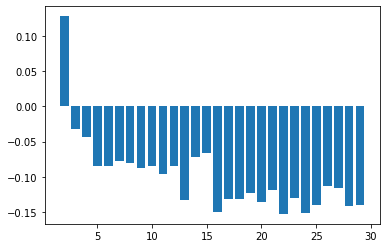

340-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 142ms/step - loss: 0.6901 - val_loss: 0.6812
Epoch 2/100
132/132 [==============================] - 0s 239us/step - loss: 0.6750 - val_loss: 0.6566
Epoch 3/100
132/132 [==============================] - 0s 231us/step - loss: 0.6414 - val_loss: 0.6072
Epoch 4/100
132/132 [==============================] - 0s 231us/step - loss: 0.5790 - val_loss: 0.5206
Epoch 5/100
132/132 [==============================] - 0s 237us/step - loss: 0.4817 - val_loss: 0.3930
Epoch 6/100
132/132 [==============================] - 0s 229us/step - loss: 0.3608 - val_loss: 0.2482
Epoch 7/100
132/132 [==============================] - 0s 228us/step - loss: 0.2531 - val_loss: 0.1403
Epoch 8/100
132/132 [==============================] - 0s 232us/step - loss: 0.1878 - val_loss: 0.0955
Epoch 9/100
132/132 [==============================] - 0s 231us/step - loss: 0.1650 - val_loss: 0.0869
Epoch 10/100
132/

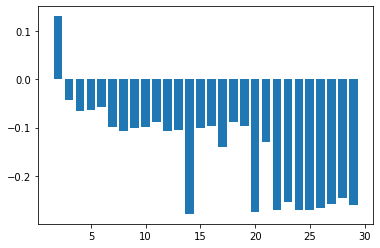

340-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 143ms/step - loss: 0.6894 - val_loss: 0.6795
Epoch 2/100
132/132 [==============================] - 0s 245us/step - loss: 0.6710 - val_loss: 0.6514
Epoch 3/100
132/132 [==============================] - 0s 234us/step - loss: 0.6309 - val_loss: 0.5957
Epoch 4/100
132/132 [==============================] - 0s 240us/step - loss: 0.5609 - val_loss: 0.5021
Epoch 5/100
132/132 [==============================] - 0s 234us/step - loss: 0.4642 - val_loss: 0.3737
Epoch 6/100
132/132 [==============================] - 0s 230us/step - loss: 0.3470 - val_loss: 0.2399
Epoch 7/100
132/132 [==============================] - 0s 238us/step - loss: 0.2444 - val_loss: 0.1431
Epoch 8/100
132/132 [==============================] - 0s 230us/step - loss: 0.1852 - val_loss: 0.0998
Epoch 9/100
132/132 [==============================] - 0s 230us/step - loss: 0.1555 - val_loss: 0.0880
Epoch 10/100
132/

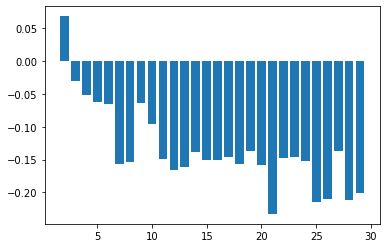

340-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 144ms/step - loss: 0.6910 - val_loss: 0.6833
Epoch 2/100
132/132 [==============================] - 0s 238us/step - loss: 0.6777 - val_loss: 0.6634
Epoch 3/100
132/132 [==============================] - 0s 232us/step - loss: 0.6491 - val_loss: 0.6238
Epoch 4/100
132/132 [==============================] - 0s 233us/step - loss: 0.5981 - val_loss: 0.5546
Epoch 5/100
132/132 [==============================] - 0s 230us/step - loss: 0.5147 - val_loss: 0.4505
Epoch 6/100
132/132 [==============================] - 0s 231us/step - loss: 0.4132 - val_loss: 0.3196
Epoch 7/100
132/132 [==============================] - 0s 223us/step - loss: 0.3004 - val_loss: 0.1982
Epoch 8/100
132/132 [==============================] - 0s 233us/step - loss: 0.2145 - val_loss: 0.1228
Epoch 9/100
132/132 [==============================] - 0s 232us/step - loss: 0.1690 - val_loss: 0.0937
Epoch 10/100
132/

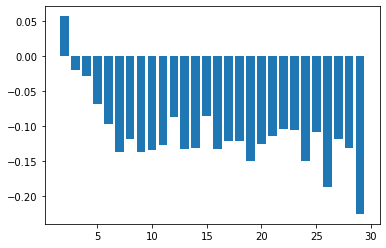

340-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 144ms/step - loss: 0.6915 - val_loss: 0.6854
Epoch 2/100
132/132 [==============================] - 0s 244us/step - loss: 0.6805 - val_loss: 0.6690
Epoch 3/100
132/132 [==============================] - 0s 234us/step - loss: 0.6563 - val_loss: 0.6361
Epoch 4/100
132/132 [==============================] - 0s 235us/step - loss: 0.6130 - val_loss: 0.5773
Epoch 5/100
132/132 [==============================] - 0s 233us/step - loss: 0.5429 - val_loss: 0.4855
Epoch 6/100
132/132 [==============================] - 0s 238us/step - loss: 0.4486 - val_loss: 0.3645
Epoch 7/100
132/132 [==============================] - 0s 232us/step - loss: 0.3386 - val_loss: 0.2386
Epoch 8/100
132/132 [==============================] - 0s 231us/step - loss: 0.2419 - val_loss: 0.1458
Epoch 9/100
132/132 [==============================] - 0s 230us/step - loss: 0.1879 - val_loss: 0.0999
Epoch 10/100
132/

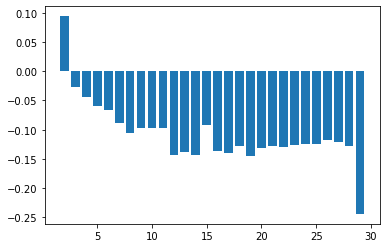

340-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 146ms/step - loss: 0.6911 - val_loss: 0.6840
Epoch 2/100
132/132 [==============================] - 0s 245us/step - loss: 0.6792 - val_loss: 0.6649
Epoch 3/100
132/132 [==============================] - 0s 238us/step - loss: 0.6536 - val_loss: 0.6282
Epoch 4/100
132/132 [==============================] - 0s 231us/step - loss: 0.6082 - val_loss: 0.5663
Epoch 5/100
132/132 [==============================] - 0s 234us/step - loss: 0.5366 - val_loss: 0.4759
Epoch 6/100
132/132 [==============================] - 0s 233us/step - loss: 0.4421 - val_loss: 0.3623
Epoch 7/100
132/132 [==============================] - 0s 235us/step - loss: 0.3405 - val_loss: 0.2447
Epoch 8/100
132/132 [==============================] - 0s 234us/step - loss: 0.2452 - val_loss: 0.1543
Epoch 9/100
132/132 [==============================] - 0s 227us/step - loss: 0.1838 - val_loss: 0.1047
Epoch 10/100
132/

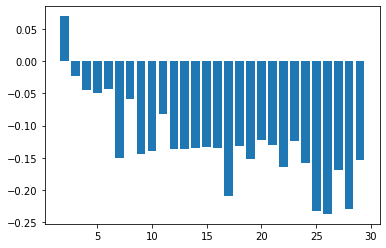

340-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 147ms/step - loss: 0.6920 - val_loss: 0.6879
Epoch 2/100
132/132 [==============================] - 0s 244us/step - loss: 0.6846 - val_loss: 0.6773
Epoch 3/100
132/132 [==============================] - 0s 237us/step - loss: 0.6696 - val_loss: 0.6570
Epoch 4/100
132/132 [==============================] - 0s 237us/step - loss: 0.6417 - val_loss: 0.6224
Epoch 5/100
132/132 [==============================] - 0s 234us/step - loss: 0.5988 - val_loss: 0.5691
Epoch 6/100
132/132 [==============================] - 0s 238us/step - loss: 0.5391 - val_loss: 0.4948
Epoch 7/100
132/132 [==============================] - 0s 234us/step - loss: 0.4616 - val_loss: 0.4024
Epoch 8/100
132/132 [==============================] - 0s 238us/step - loss: 0.3741 - val_loss: 0.3017
Epoch 9/100
132/132 [==============================] - 0s 239us/step - loss: 0.2895 - val_loss: 0.2094
Epoch 10/100
132/

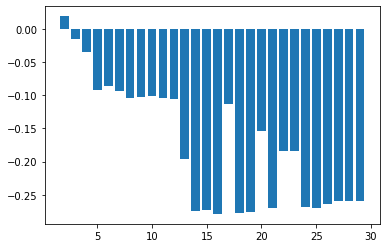

330-320dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 147ms/step - loss: 0.6898 - val_loss: 0.6744
Epoch 2/100
132/132 [==============================] - 0s 249us/step - loss: 0.6630 - val_loss: 0.6233
Epoch 3/100
132/132 [==============================] - 0s 241us/step - loss: 0.5973 - val_loss: 0.5067
Epoch 4/100
132/132 [==============================] - 0s 244us/step - loss: 0.4678 - val_loss: 0.3181
Epoch 5/100
132/132 [==============================] - 0s 240us/step - loss: 0.2936 - val_loss: 0.1482
Epoch 6/100
132/132 [==============================] - 0s 239us/step - loss: 0.1954 - val_loss: 0.0926
Epoch 7/100
132/132 [==============================] - 0s 248us/step - loss: 0.1785 - val_loss: 0.0965
(165, 320)


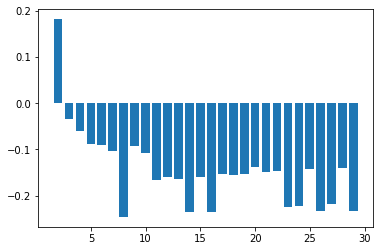

330-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 19s 148ms/step - loss: 0.6877 - val_loss: 0.6689
Epoch 2/100
132/132 [==============================] - 0s 250us/step - loss: 0.6540 - val_loss: 0.6094
Epoch 3/100
132/132 [==============================] - 0s 242us/step - loss: 0.5771 - val_loss: 0.4831
Epoch 4/100
132/132 [==============================] - 0s 245us/step - loss: 0.4405 - val_loss: 0.2949
Epoch 5/100
132/132 [==============================] - 0s 237us/step - loss: 0.2859 - val_loss: 0.1387
Epoch 6/100
132/132 [==============================] - 0s 239us/step - loss: 0.1973 - val_loss: 0.0910
Epoch 7/100
132/132 [==============================] - 0s 238us/step - loss: 0.1791 - val_loss: 0.0930
(165, 310)


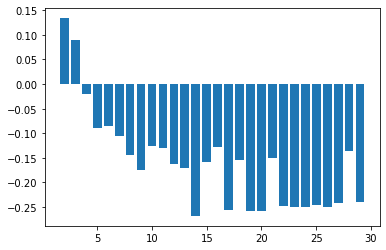

330-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 149ms/step - loss: 0.6864 - val_loss: 0.6665
Epoch 2/100
132/132 [==============================] - 0s 248us/step - loss: 0.6500 - val_loss: 0.5998
Epoch 3/100
132/132 [==============================] - 0s 243us/step - loss: 0.5617 - val_loss: 0.4572
Epoch 4/100
132/132 [==============================] - 0s 242us/step - loss: 0.4137 - val_loss: 0.2577
Epoch 5/100
132/132 [==============================] - 0s 241us/step - loss: 0.2575 - val_loss: 0.1204
Epoch 6/100
132/132 [==============================] - 0s 248us/step - loss: 0.1901 - val_loss: 0.0897
Epoch 7/100
132/132 [==============================] - 0s 245us/step - loss: 0.1676 - val_loss: 0.0943
(165, 300)


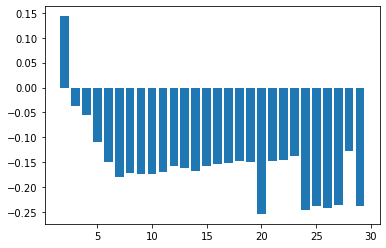

330-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 151ms/step - loss: 0.6875 - val_loss: 0.6693
Epoch 2/100
132/132 [==============================] - 0s 248us/step - loss: 0.6553 - val_loss: 0.6098
Epoch 3/100
132/132 [==============================] - 0s 242us/step - loss: 0.5778 - val_loss: 0.4795
Epoch 4/100
132/132 [==============================] - 0s 246us/step - loss: 0.4329 - val_loss: 0.2846
Epoch 5/100
132/132 [==============================] - 0s 238us/step - loss: 0.2755 - val_loss: 0.1310
Epoch 6/100
132/132 [==============================] - 0s 258us/step - loss: 0.1944 - val_loss: 0.0906
Epoch 7/100
132/132 [==============================] - 0s 246us/step - loss: 0.1725 - val_loss: 0.0925
(165, 290)


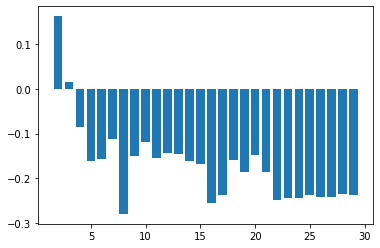

330-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 150ms/step - loss: 0.6881 - val_loss: 0.6694
Epoch 2/100
132/132 [==============================] - 0s 252us/step - loss: 0.6547 - val_loss: 0.6106
Epoch 3/100
132/132 [==============================] - 0s 246us/step - loss: 0.5765 - val_loss: 0.4840
Epoch 4/100
132/132 [==============================] - 0s 248us/step - loss: 0.4437 - val_loss: 0.2934
Epoch 5/100
132/132 [==============================] - 0s 246us/step - loss: 0.2792 - val_loss: 0.1393
Epoch 6/100
132/132 [==============================] - 0s 248us/step - loss: 0.2025 - val_loss: 0.0902
Epoch 7/100
132/132 [==============================] - 0s 238us/step - loss: 0.1831 - val_loss: 0.0926
(165, 280)


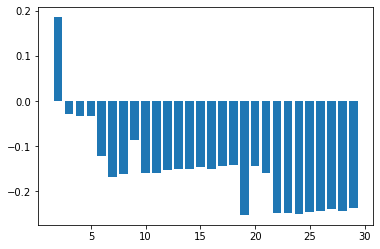

330-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 151ms/step - loss: 0.6880 - val_loss: 0.6714
Epoch 2/100
132/132 [==============================] - 0s 254us/step - loss: 0.6561 - val_loss: 0.6150
Epoch 3/100
132/132 [==============================] - 0s 247us/step - loss: 0.5783 - val_loss: 0.4909
Epoch 4/100
132/132 [==============================] - 0s 241us/step - loss: 0.4429 - val_loss: 0.3009
Epoch 5/100
132/132 [==============================] - 0s 247us/step - loss: 0.2852 - val_loss: 0.1418
Epoch 6/100
132/132 [==============================] - 0s 242us/step - loss: 0.2036 - val_loss: 0.0903
Epoch 7/100
132/132 [==============================] - 0s 240us/step - loss: 0.1785 - val_loss: 0.0908
(165, 270)


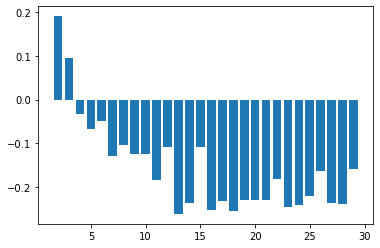

330-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 152ms/step - loss: 0.6885 - val_loss: 0.6713
Epoch 2/100
132/132 [==============================] - 0s 252us/step - loss: 0.6578 - val_loss: 0.6155
Epoch 3/100
132/132 [==============================] - 0s 255us/step - loss: 0.5839 - val_loss: 0.4940
Epoch 4/100
132/132 [==============================] - 0s 252us/step - loss: 0.4429 - val_loss: 0.3067
Epoch 5/100
132/132 [==============================] - 0s 252us/step - loss: 0.2985 - val_loss: 0.1479
Epoch 6/100
132/132 [==============================] - 0s 242us/step - loss: 0.2001 - val_loss: 0.0946
Epoch 7/100
132/132 [==============================] - 0s 241us/step - loss: 0.1708 - val_loss: 0.0907
Epoch 8/100
132/132 [==============================] - 0s 246us/step - loss: 0.1469 - val_loss: 0.0946
(165, 260)


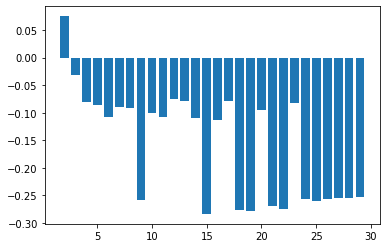

330-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 153ms/step - loss: 0.6880 - val_loss: 0.6697
Epoch 2/100
132/132 [==============================] - 0s 258us/step - loss: 0.6555 - val_loss: 0.6114
Epoch 3/100
132/132 [==============================] - 0s 247us/step - loss: 0.5816 - val_loss: 0.4860
Epoch 4/100
132/132 [==============================] - 0s 243us/step - loss: 0.4400 - val_loss: 0.2969
Epoch 5/100
132/132 [==============================] - 0s 245us/step - loss: 0.2917 - val_loss: 0.1400
Epoch 6/100
132/132 [==============================] - 0s 244us/step - loss: 0.1995 - val_loss: 0.0906
Epoch 7/100
132/132 [==============================] - 0s 246us/step - loss: 0.1750 - val_loss: 0.0905
Epoch 8/100
132/132 [==============================] - 0s 248us/step - loss: 0.1523 - val_loss: 0.0945
(165, 250)


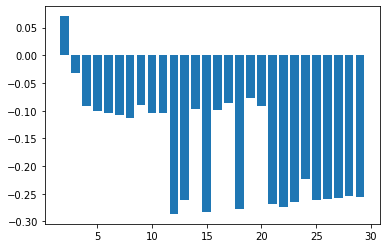

330-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 154ms/step - loss: 0.6885 - val_loss: 0.6725
Epoch 2/100
132/132 [==============================] - 0s 256us/step - loss: 0.6594 - val_loss: 0.6226
Epoch 3/100
132/132 [==============================] - 0s 249us/step - loss: 0.5936 - val_loss: 0.5130
Epoch 4/100
132/132 [==============================] - 0s 248us/step - loss: 0.4660 - val_loss: 0.3347
Epoch 5/100
132/132 [==============================] - 0s 244us/step - loss: 0.3131 - val_loss: 0.1619
Epoch 6/100
132/132 [==============================] - 0s 247us/step - loss: 0.2051 - val_loss: 0.0931
Epoch 7/100
132/132 [==============================] - 0s 243us/step - loss: 0.1782 - val_loss: 0.0883
Epoch 8/100
132/132 [==============================] - 0s 243us/step - loss: 0.1614 - val_loss: 0.0934
(165, 240)


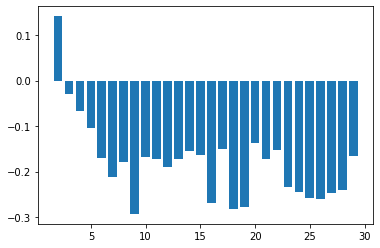

330-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 20s 155ms/step - loss: 0.6893 - val_loss: 0.6756
Epoch 2/100
132/132 [==============================] - 0s 257us/step - loss: 0.6633 - val_loss: 0.6316
Epoch 3/100
132/132 [==============================] - 0s 246us/step - loss: 0.6054 - val_loss: 0.5333
Epoch 4/100
132/132 [==============================] - 0s 248us/step - loss: 0.4902 - val_loss: 0.3672
Epoch 5/100
132/132 [==============================] - 0s 253us/step - loss: 0.3374 - val_loss: 0.1901
Epoch 6/100
132/132 [==============================] - 0s 247us/step - loss: 0.2284 - val_loss: 0.1011
Epoch 7/100
132/132 [==============================] - 0s 249us/step - loss: 0.1770 - val_loss: 0.0892
Epoch 8/100
132/132 [==============================] - 0s 243us/step - loss: 0.1587 - val_loss: 0.0925
(165, 230)


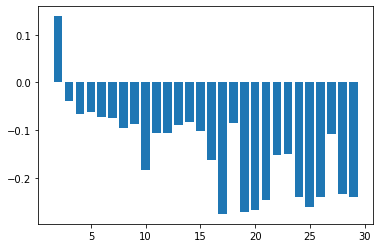

330-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 156ms/step - loss: 0.6885 - val_loss: 0.6739
Epoch 2/100
132/132 [==============================] - 0s 255us/step - loss: 0.6623 - val_loss: 0.6274
Epoch 3/100
132/132 [==============================] - 0s 251us/step - loss: 0.6001 - val_loss: 0.5239
Epoch 4/100
132/132 [==============================] - 0s 247us/step - loss: 0.4808 - val_loss: 0.3516
Epoch 5/100
132/132 [==============================] - 0s 246us/step - loss: 0.3274 - val_loss: 0.1767
Epoch 6/100
132/132 [==============================] - 0s 252us/step - loss: 0.2079 - val_loss: 0.0985
Epoch 7/100
132/132 [==============================] - 0s 249us/step - loss: 0.1690 - val_loss: 0.0891
Epoch 8/100
132/132 [==============================] - 0s 250us/step - loss: 0.1565 - val_loss: 0.0947
(165, 220)


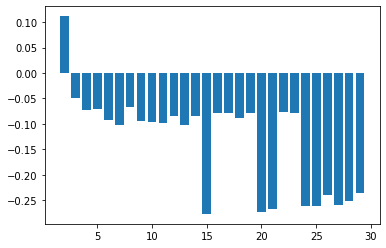

330-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 157ms/step - loss: 0.6868 - val_loss: 0.6688
Epoch 2/100
132/132 [==============================] - 0s 254us/step - loss: 0.6549 - val_loss: 0.6140
Epoch 3/100
132/132 [==============================] - 0s 250us/step - loss: 0.5851 - val_loss: 0.5000
Epoch 4/100
132/132 [==============================] - 0s 256us/step - loss: 0.4602 - val_loss: 0.3253
Epoch 5/100
132/132 [==============================] - 0s 255us/step - loss: 0.3083 - val_loss: 0.1627
Epoch 6/100
132/132 [==============================] - 0s 242us/step - loss: 0.2028 - val_loss: 0.0958
Epoch 7/100
132/132 [==============================] - 0s 249us/step - loss: 0.1762 - val_loss: 0.0900
Epoch 8/100
132/132 [==============================] - 0s 245us/step - loss: 0.1583 - val_loss: 0.0951
(165, 210)


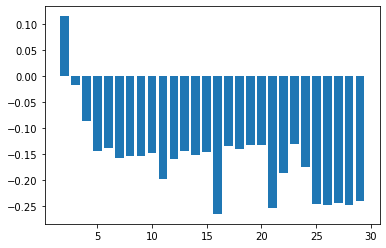

330-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 156ms/step - loss: 0.6874 - val_loss: 0.6698
Epoch 2/100
132/132 [==============================] - 0s 258us/step - loss: 0.6567 - val_loss: 0.6155
Epoch 3/100
132/132 [==============================] - 0s 253us/step - loss: 0.5865 - val_loss: 0.5034
Epoch 4/100
132/132 [==============================] - 0s 248us/step - loss: 0.4698 - val_loss: 0.3323
Epoch 5/100
132/132 [==============================] - 0s 251us/step - loss: 0.3162 - val_loss: 0.1709
Epoch 6/100
132/132 [==============================] - 0s 256us/step - loss: 0.2066 - val_loss: 0.0969
Epoch 7/100
132/132 [==============================] - 0s 253us/step - loss: 0.1758 - val_loss: 0.0879
Epoch 8/100
132/132 [==============================] - 0s 247us/step - loss: 0.1590 - val_loss: 0.0921
(165, 200)


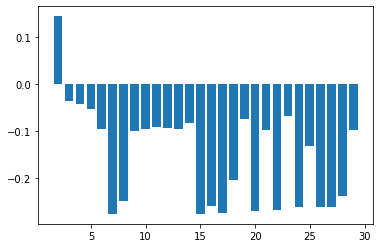

330-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 158ms/step - loss: 0.6868 - val_loss: 0.6694
Epoch 2/100
132/132 [==============================] - 0s 262us/step - loss: 0.6558 - val_loss: 0.6158
Epoch 3/100
132/132 [==============================] - 0s 251us/step - loss: 0.5842 - val_loss: 0.5022
Epoch 4/100
132/132 [==============================] - 0s 248us/step - loss: 0.4649 - val_loss: 0.3267
Epoch 5/100
132/132 [==============================] - 0s 253us/step - loss: 0.3095 - val_loss: 0.1639
Epoch 6/100
132/132 [==============================] - 0s 249us/step - loss: 0.2125 - val_loss: 0.0942
Epoch 7/100
132/132 [==============================] - 0s 254us/step - loss: 0.1824 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 247us/step - loss: 0.1713 - val_loss: 0.0942
(165, 190)


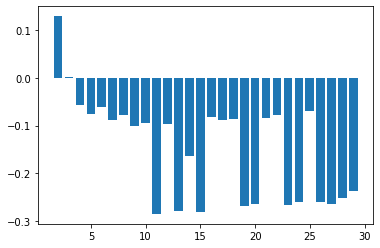

330-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 158ms/step - loss: 0.6894 - val_loss: 0.6758
Epoch 2/100
132/132 [==============================] - 0s 263us/step - loss: 0.6656 - val_loss: 0.6348
Epoch 3/100
132/132 [==============================] - 0s 261us/step - loss: 0.6102 - val_loss: 0.5442
Epoch 4/100
132/132 [==============================] - 0s 252us/step - loss: 0.5009 - val_loss: 0.3904
Epoch 5/100
132/132 [==============================] - 0s 249us/step - loss: 0.3492 - val_loss: 0.2136
Epoch 6/100
132/132 [==============================] - 0s 250us/step - loss: 0.2243 - val_loss: 0.1111
Epoch 7/100
132/132 [==============================] - 0s 249us/step - loss: 0.1736 - val_loss: 0.0903
Epoch 8/100
132/132 [==============================] - 0s 251us/step - loss: 0.1540 - val_loss: 0.0925
(165, 180)


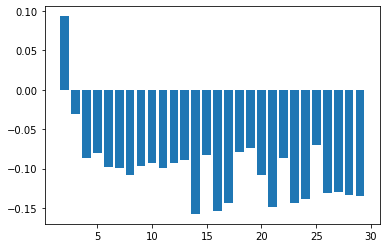

330-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 159ms/step - loss: 0.6884 - val_loss: 0.6732
Epoch 2/100
132/132 [==============================] - 0s 265us/step - loss: 0.6613 - val_loss: 0.6302
Epoch 3/100
132/132 [==============================] - 0s 259us/step - loss: 0.6038 - val_loss: 0.5407
Epoch 4/100
132/132 [==============================] - 0s 254us/step - loss: 0.4980 - val_loss: 0.3913
Epoch 5/100
132/132 [==============================] - 0s 253us/step - loss: 0.3584 - val_loss: 0.2206
Epoch 6/100
132/132 [==============================] - 0s 252us/step - loss: 0.2311 - val_loss: 0.1161
Epoch 7/100
132/132 [==============================] - 0s 255us/step - loss: 0.1826 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 247us/step - loss: 0.1694 - val_loss: 0.0900
(165, 170)


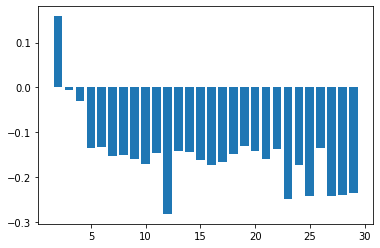

330-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 160ms/step - loss: 0.6878 - val_loss: 0.6738
Epoch 2/100
132/132 [==============================] - 0s 262us/step - loss: 0.6607 - val_loss: 0.6296
Epoch 3/100
132/132 [==============================] - 0s 252us/step - loss: 0.5986 - val_loss: 0.5367
Epoch 4/100
132/132 [==============================] - 0s 259us/step - loss: 0.4897 - val_loss: 0.3863
Epoch 5/100
132/132 [==============================] - 0s 253us/step - loss: 0.3495 - val_loss: 0.2183
Epoch 6/100
132/132 [==============================] - 0s 252us/step - loss: 0.2298 - val_loss: 0.1168
Epoch 7/100
132/132 [==============================] - 0s 255us/step - loss: 0.1808 - val_loss: 0.0897
Epoch 8/100
132/132 [==============================] - 0s 254us/step - loss: 0.1619 - val_loss: 0.0899
(165, 160)


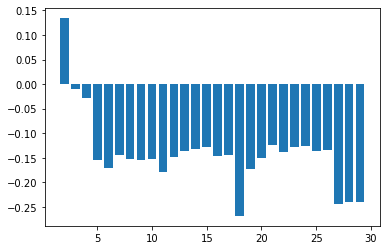

330-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 161ms/step - loss: 0.6894 - val_loss: 0.6761
Epoch 2/100
132/132 [==============================] - 0s 265us/step - loss: 0.6656 - val_loss: 0.6363
Epoch 3/100
132/132 [==============================] - 0s 255us/step - loss: 0.6106 - val_loss: 0.5507
Epoch 4/100
132/132 [==============================] - 0s 252us/step - loss: 0.5091 - val_loss: 0.4054
Epoch 5/100
132/132 [==============================] - 0s 252us/step - loss: 0.3556 - val_loss: 0.2317
Epoch 6/100
132/132 [==============================] - 0s 256us/step - loss: 0.2295 - val_loss: 0.1182
Epoch 7/100
132/132 [==============================] - 0s 250us/step - loss: 0.1693 - val_loss: 0.0893
Epoch 8/100
132/132 [==============================] - 0s 253us/step - loss: 0.1528 - val_loss: 0.0909
(165, 150)


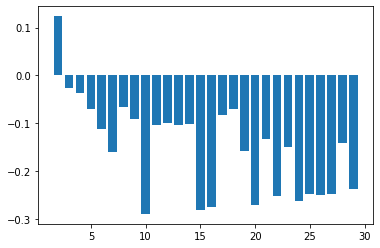

330-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 162ms/step - loss: 0.6892 - val_loss: 0.6765
Epoch 2/100
132/132 [==============================] - 0s 268us/step - loss: 0.6664 - val_loss: 0.6382
Epoch 3/100
132/132 [==============================] - 0s 253us/step - loss: 0.6161 - val_loss: 0.5557
Epoch 4/100
132/132 [==============================] - 0s 253us/step - loss: 0.5177 - val_loss: 0.4136
Epoch 5/100
132/132 [==============================] - 0s 251us/step - loss: 0.3877 - val_loss: 0.2437
Epoch 6/100
132/132 [==============================] - 0s 255us/step - loss: 0.2537 - val_loss: 0.1282
Epoch 7/100
132/132 [==============================] - 0s 251us/step - loss: 0.1889 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 252us/step - loss: 0.1589 - val_loss: 0.0879
Epoch 9/100
132/132 [==============================] - 0s 254us/step - loss: 0.1383 - val_loss: 0.0909
(165, 140)


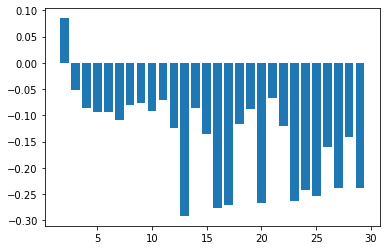

330-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 21s 163ms/step - loss: 0.6891 - val_loss: 0.6774
Epoch 2/100
132/132 [==============================] - 0s 269us/step - loss: 0.6680 - val_loss: 0.6425
Epoch 3/100
132/132 [==============================] - 0s 255us/step - loss: 0.6198 - val_loss: 0.5679
Epoch 4/100
132/132 [==============================] - 0s 268us/step - loss: 0.5297 - val_loss: 0.4377
Epoch 5/100
132/132 [==============================] - 0s 255us/step - loss: 0.3979 - val_loss: 0.2704
Epoch 6/100
132/132 [==============================] - 0s 259us/step - loss: 0.2686 - val_loss: 0.1413
Epoch 7/100
132/132 [==============================] - 0s 256us/step - loss: 0.1909 - val_loss: 0.0943
Epoch 8/100
132/132 [==============================] - 0s 253us/step - loss: 0.1663 - val_loss: 0.0891
Epoch 9/100
132/132 [==============================] - 0s 255us/step - loss: 0.1495 - val_loss: 0.0922
(165, 130)


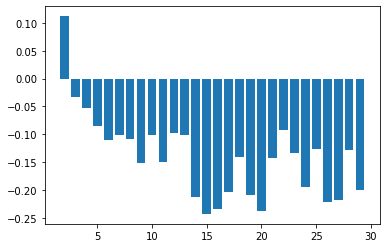

330-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 177ms/step - loss: 0.6892 - val_loss: 0.6756
Epoch 2/100
132/132 [==============================] - 0s 265us/step - loss: 0.6679 - val_loss: 0.6390
Epoch 3/100
132/132 [==============================] - 0s 256us/step - loss: 0.6193 - val_loss: 0.5629
Epoch 4/100
132/132 [==============================] - 0s 252us/step - loss: 0.5325 - val_loss: 0.4329
Epoch 5/100
132/132 [==============================] - 0s 253us/step - loss: 0.4024 - val_loss: 0.2688
Epoch 6/100
132/132 [==============================] - 0s 257us/step - loss: 0.2723 - val_loss: 0.1408
Epoch 7/100
132/132 [==============================] - 0s 258us/step - loss: 0.1939 - val_loss: 0.0929
Epoch 8/100
132/132 [==============================] - 0s 255us/step - loss: 0.1690 - val_loss: 0.0884
Epoch 9/100
132/132 [==============================] - 0s 254us/step - loss: 0.1512 - val_loss: 0.0916
(165, 120)


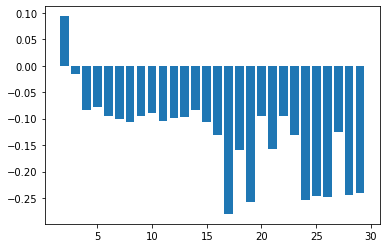

330-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 174ms/step - loss: 0.6894 - val_loss: 0.6774
Epoch 2/100
132/132 [==============================] - 0s 267us/step - loss: 0.6689 - val_loss: 0.6434
Epoch 3/100
132/132 [==============================] - 0s 261us/step - loss: 0.6223 - val_loss: 0.5718
Epoch 4/100
132/132 [==============================] - 0s 251us/step - loss: 0.5341 - val_loss: 0.4465
Epoch 5/100
132/132 [==============================] - 0s 258us/step - loss: 0.4061 - val_loss: 0.2833
Epoch 6/100
132/132 [==============================] - 0s 255us/step - loss: 0.2780 - val_loss: 0.1503
Epoch 7/100
132/132 [==============================] - 0s 258us/step - loss: 0.2138 - val_loss: 0.0953
Epoch 8/100
132/132 [==============================] - 0s 259us/step - loss: 0.1852 - val_loss: 0.0886
Epoch 9/100
132/132 [==============================] - 0s 253us/step - loss: 0.1608 - val_loss: 0.0907
(165, 110)


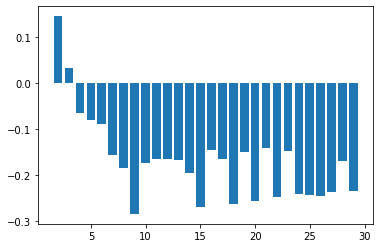

330-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 175ms/step - loss: 0.6886 - val_loss: 0.6757
Epoch 2/100
132/132 [==============================] - 0s 267us/step - loss: 0.6662 - val_loss: 0.6394
Epoch 3/100
132/132 [==============================] - 0s 258us/step - loss: 0.6169 - val_loss: 0.5667
Epoch 4/100
132/132 [==============================] - 0s 258us/step - loss: 0.5270 - val_loss: 0.4437
Epoch 5/100
132/132 [==============================] - 0s 259us/step - loss: 0.4062 - val_loss: 0.2854
Epoch 6/100
132/132 [==============================] - 0s 256us/step - loss: 0.2771 - val_loss: 0.1548
Epoch 7/100
132/132 [==============================] - 0s 258us/step - loss: 0.2030 - val_loss: 0.0978
Epoch 8/100
132/132 [==============================] - 0s 255us/step - loss: 0.1716 - val_loss: 0.0880
Epoch 9/100
132/132 [==============================] - 0s 257us/step - loss: 0.1514 - val_loss: 0.0893
(165, 100)


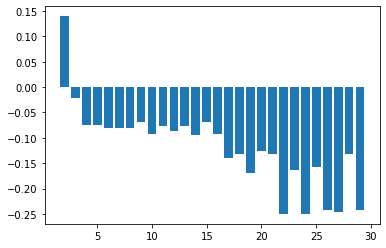

330-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 175ms/step - loss: 0.6874 - val_loss: 0.6737
Epoch 2/100
132/132 [==============================] - 0s 268us/step - loss: 0.6619 - val_loss: 0.6345
Epoch 3/100
132/132 [==============================] - 0s 261us/step - loss: 0.6098 - val_loss: 0.5584
Epoch 4/100
132/132 [==============================] - 0s 262us/step - loss: 0.5168 - val_loss: 0.4371
Epoch 5/100
132/132 [==============================] - 0s 263us/step - loss: 0.3910 - val_loss: 0.2872
Epoch 6/100
132/132 [==============================] - 0s 255us/step - loss: 0.2742 - val_loss: 0.1611
Epoch 7/100
132/132 [==============================] - 0s 260us/step - loss: 0.1959 - val_loss: 0.1030
Epoch 8/100
132/132 [==============================] - 0s 256us/step - loss: 0.1666 - val_loss: 0.0899
Epoch 9/100
132/132 [==============================] - 0s 261us/step - loss: 0.1498 - val_loss: 0.0904
(165, 90)


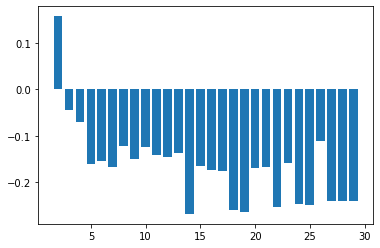

330-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 176ms/step - loss: 0.6896 - val_loss: 0.6777
Epoch 2/100
132/132 [==============================] - 0s 272us/step - loss: 0.6699 - val_loss: 0.6453
Epoch 3/100
132/132 [==============================] - 0s 259us/step - loss: 0.6269 - val_loss: 0.5791
Epoch 4/100
132/132 [==============================] - 0s 267us/step - loss: 0.5482 - val_loss: 0.4662
Epoch 5/100
132/132 [==============================] - 0s 259us/step - loss: 0.4292 - val_loss: 0.3150
Epoch 6/100
132/132 [==============================] - 0s 263us/step - loss: 0.3030 - val_loss: 0.1755
Epoch 7/100
132/132 [==============================] - 0s 260us/step - loss: 0.2090 - val_loss: 0.1043
Epoch 8/100
132/132 [==============================] - 0s 258us/step - loss: 0.1699 - val_loss: 0.0871
Epoch 9/100
132/132 [==============================] - 0s 259us/step - loss: 0.1498 - val_loss: 0.0884
(165, 80)


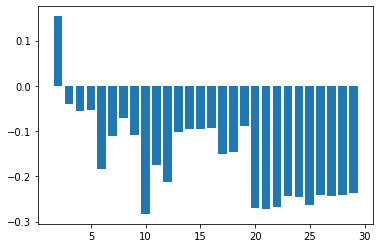

330-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 174ms/step - loss: 0.6898 - val_loss: 0.6794
Epoch 2/100
132/132 [==============================] - 0s 271us/step - loss: 0.6713 - val_loss: 0.6502
Epoch 3/100
132/132 [==============================] - 0s 259us/step - loss: 0.6310 - val_loss: 0.5903
Epoch 4/100
132/132 [==============================] - 0s 264us/step - loss: 0.5543 - val_loss: 0.4871
Epoch 5/100
132/132 [==============================] - 0s 264us/step - loss: 0.4426 - val_loss: 0.3450
Epoch 6/100
132/132 [==============================] - 0s 261us/step - loss: 0.3252 - val_loss: 0.2042
Epoch 7/100
132/132 [==============================] - 0s 264us/step - loss: 0.2294 - val_loss: 0.1206
Epoch 8/100
132/132 [==============================] - 0s 259us/step - loss: 0.1825 - val_loss: 0.0929
Epoch 9/100
132/132 [==============================] - 0s 267us/step - loss: 0.1551 - val_loss: 0.0884
Epoch 10/100
132/

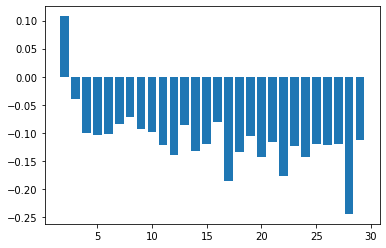

330-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 176ms/step - loss: 0.6897 - val_loss: 0.6793
Epoch 2/100
132/132 [==============================] - 0s 274us/step - loss: 0.6719 - val_loss: 0.6526
Epoch 3/100
132/132 [==============================] - 0s 260us/step - loss: 0.6354 - val_loss: 0.5997
Epoch 4/100
132/132 [==============================] - 0s 259us/step - loss: 0.5698 - val_loss: 0.5075
Epoch 5/100
132/132 [==============================] - 0s 260us/step - loss: 0.4728 - val_loss: 0.3750
Epoch 6/100
132/132 [==============================] - 0s 263us/step - loss: 0.3484 - val_loss: 0.2330
Epoch 7/100
132/132 [==============================] - 0s 257us/step - loss: 0.2400 - val_loss: 0.1334
Epoch 8/100
132/132 [==============================] - 0s 259us/step - loss: 0.1888 - val_loss: 0.0928
Epoch 9/100
132/132 [==============================] - 0s 257us/step - loss: 0.1597 - val_loss: 0.0864
Epoch 10/100
132/

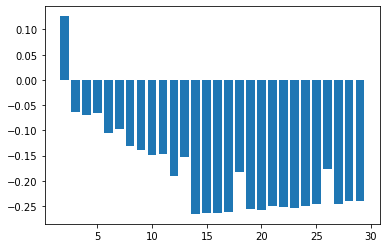

330-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 175ms/step - loss: 0.6899 - val_loss: 0.6803
Epoch 2/100
132/132 [==============================] - 0s 273us/step - loss: 0.6727 - val_loss: 0.6545
Epoch 3/100
132/132 [==============================] - 0s 263us/step - loss: 0.6373 - val_loss: 0.6041
Epoch 4/100
132/132 [==============================] - 0s 258us/step - loss: 0.5739 - val_loss: 0.5178
Epoch 5/100
132/132 [==============================] - 0s 263us/step - loss: 0.4771 - val_loss: 0.3944
Epoch 6/100
132/132 [==============================] - 0s 266us/step - loss: 0.3622 - val_loss: 0.2578
Epoch 7/100
132/132 [==============================] - 0s 261us/step - loss: 0.2478 - val_loss: 0.1535
Epoch 8/100
132/132 [==============================] - 0s 264us/step - loss: 0.1846 - val_loss: 0.1002
Epoch 9/100
132/132 [==============================] - 0s 261us/step - loss: 0.1532 - val_loss: 0.0860
Epoch 10/100
132/

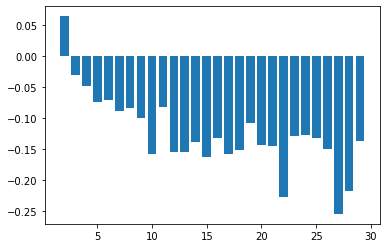

330-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 175ms/step - loss: 0.6912 - val_loss: 0.6833
Epoch 2/100
132/132 [==============================] - 0s 269us/step - loss: 0.6783 - val_loss: 0.6639
Epoch 3/100
132/132 [==============================] - 0s 260us/step - loss: 0.6532 - val_loss: 0.6261
Epoch 4/100
132/132 [==============================] - 0s 264us/step - loss: 0.6049 - val_loss: 0.5596
Epoch 5/100
132/132 [==============================] - 0s 268us/step - loss: 0.5321 - val_loss: 0.4580
Epoch 6/100
132/132 [==============================] - 0s 259us/step - loss: 0.4352 - val_loss: 0.3315
Epoch 7/100
132/132 [==============================] - 0s 262us/step - loss: 0.3175 - val_loss: 0.2108
Epoch 8/100
132/132 [==============================] - 0s 262us/step - loss: 0.2226 - val_loss: 0.1275
Epoch 9/100
132/132 [==============================] - 0s 259us/step - loss: 0.1758 - val_loss: 0.0920
Epoch 10/100
132/

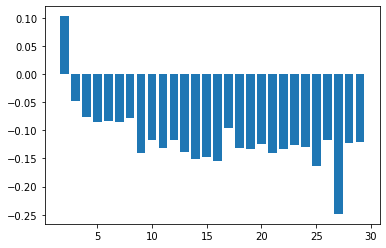

330-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 172ms/step - loss: 0.6915 - val_loss: 0.6849
Epoch 2/100
132/132 [==============================] - 0s 276us/step - loss: 0.6805 - val_loss: 0.6684
Epoch 3/100
132/132 [==============================] - 0s 263us/step - loss: 0.6582 - val_loss: 0.6361
Epoch 4/100
132/132 [==============================] - 0s 259us/step - loss: 0.6156 - val_loss: 0.5790
Epoch 5/100
132/132 [==============================] - 0s 257us/step - loss: 0.5469 - val_loss: 0.4911
Epoch 6/100
132/132 [==============================] - 0s 258us/step - loss: 0.4533 - val_loss: 0.3737
Epoch 7/100
132/132 [==============================] - 0s 262us/step - loss: 0.3451 - val_loss: 0.2488
Epoch 8/100
132/132 [==============================] - 0s 264us/step - loss: 0.2468 - val_loss: 0.1519
Epoch 9/100
132/132 [==============================] - 0s 273us/step - loss: 0.1851 - val_loss: 0.1021
Epoch 10/100
132/

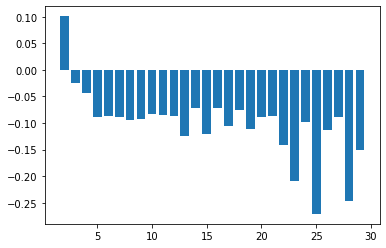

330-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 173ms/step - loss: 0.6917 - val_loss: 0.6865
Epoch 2/100
132/132 [==============================] - 0s 273us/step - loss: 0.6831 - val_loss: 0.6731
Epoch 3/100
132/132 [==============================] - 0s 273us/step - loss: 0.6645 - val_loss: 0.6478
Epoch 4/100
132/132 [==============================] - 0s 266us/step - loss: 0.6309 - val_loss: 0.6040
Epoch 5/100
132/132 [==============================] - 0s 264us/step - loss: 0.5785 - val_loss: 0.5356
Epoch 6/100
132/132 [==============================] - 0s 265us/step - loss: 0.5040 - val_loss: 0.4419
Epoch 7/100
132/132 [==============================] - 0s 271us/step - loss: 0.4072 - val_loss: 0.3307
Epoch 8/100
132/132 [==============================] - 0s 263us/step - loss: 0.3159 - val_loss: 0.2220
Epoch 9/100
132/132 [==============================] - 0s 262us/step - loss: 0.2328 - val_loss: 0.1448
Epoch 10/100
132/

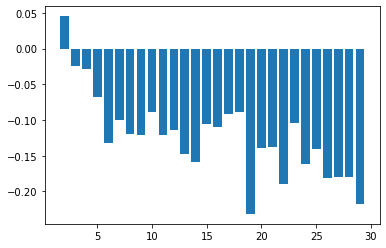

330-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 174ms/step - loss: 0.6918 - val_loss: 0.6878
Epoch 2/100
132/132 [==============================] - 0s 273us/step - loss: 0.6844 - val_loss: 0.6771
Epoch 3/100
132/132 [==============================] - 0s 269us/step - loss: 0.6686 - val_loss: 0.6575
Epoch 4/100
132/132 [==============================] - 0s 267us/step - loss: 0.6409 - val_loss: 0.6249
Epoch 5/100
132/132 [==============================] - 0s 260us/step - loss: 0.5998 - val_loss: 0.5757
Epoch 6/100
132/132 [==============================] - 0s 263us/step - loss: 0.5420 - val_loss: 0.5080
Epoch 7/100
132/132 [==============================] - 0s 260us/step - loss: 0.4705 - val_loss: 0.4225
Epoch 8/100
132/132 [==============================] - 0s 268us/step - loss: 0.3863 - val_loss: 0.3262
Epoch 9/100
132/132 [==============================] - 0s 264us/step - loss: 0.3049 - val_loss: 0.2333
Epoch 10/100
132/

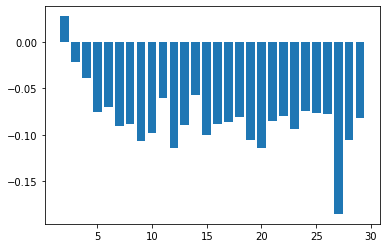

320-310dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 174ms/step - loss: 0.6879 - val_loss: 0.6699
Epoch 2/100
132/132 [==============================] - 0s 282us/step - loss: 0.6564 - val_loss: 0.6100
Epoch 3/100
132/132 [==============================] - 0s 272us/step - loss: 0.5774 - val_loss: 0.4800
Epoch 4/100
132/132 [==============================] - 0s 269us/step - loss: 0.4340 - val_loss: 0.2893
Epoch 5/100
132/132 [==============================] - 0s 268us/step - loss: 0.2707 - val_loss: 0.1391
Epoch 6/100
132/132 [==============================] - 0s 272us/step - loss: 0.1885 - val_loss: 0.0941
Epoch 7/100
132/132 [==============================] - 0s 278us/step - loss: 0.1709 - val_loss: 0.0960
(165, 310)


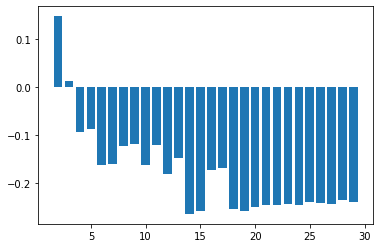

320-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 174ms/step - loss: 0.6874 - val_loss: 0.6685
Epoch 2/100
132/132 [==============================] - 0s 281us/step - loss: 0.6531 - val_loss: 0.6060
Epoch 3/100
132/132 [==============================] - 0s 266us/step - loss: 0.5754 - val_loss: 0.4737
Epoch 4/100
132/132 [==============================] - 0s 274us/step - loss: 0.4255 - val_loss: 0.2816
Epoch 5/100
132/132 [==============================] - 0s 268us/step - loss: 0.2786 - val_loss: 0.1346
Epoch 6/100
132/132 [==============================] - 0s 277us/step - loss: 0.1912 - val_loss: 0.0944
Epoch 7/100
132/132 [==============================] - 0s 284us/step - loss: 0.1674 - val_loss: 0.0957
(165, 300)


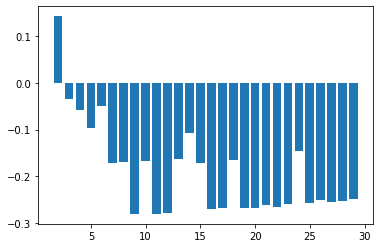

320-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 176ms/step - loss: 0.6882 - val_loss: 0.6717
Epoch 2/100
132/132 [==============================] - 0s 275us/step - loss: 0.6578 - val_loss: 0.6172
Epoch 3/100
132/132 [==============================] - 0s 268us/step - loss: 0.5842 - val_loss: 0.4962
Epoch 4/100
132/132 [==============================] - 0s 268us/step - loss: 0.4523 - val_loss: 0.3075
Epoch 5/100
132/132 [==============================] - 0s 266us/step - loss: 0.2975 - val_loss: 0.1456
Epoch 6/100
132/132 [==============================] - 0s 271us/step - loss: 0.2091 - val_loss: 0.0919
Epoch 7/100
132/132 [==============================] - 0s 268us/step - loss: 0.1847 - val_loss: 0.0921
(165, 290)


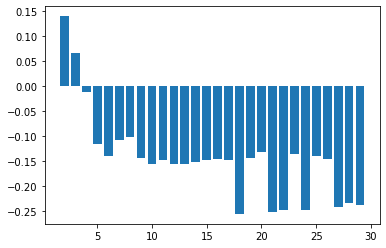

320-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 176ms/step - loss: 0.6860 - val_loss: 0.6671
Epoch 2/100
132/132 [==============================] - 0s 277us/step - loss: 0.6510 - val_loss: 0.6065
Epoch 3/100
132/132 [==============================] - 0s 272us/step - loss: 0.5705 - val_loss: 0.4788
Epoch 4/100
132/132 [==============================] - 0s 270us/step - loss: 0.4286 - val_loss: 0.2901
Epoch 5/100
132/132 [==============================] - 0s 273us/step - loss: 0.2697 - val_loss: 0.1362
Epoch 6/100
132/132 [==============================] - 0s 266us/step - loss: 0.1956 - val_loss: 0.0884
Epoch 7/100
132/132 [==============================] - 0s 267us/step - loss: 0.1776 - val_loss: 0.0906
(165, 280)


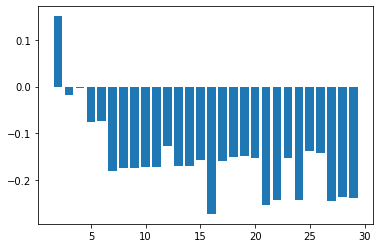

320-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 178ms/step - loss: 0.6870 - val_loss: 0.6694
Epoch 2/100
132/132 [==============================] - 0s 281us/step - loss: 0.6544 - val_loss: 0.6101
Epoch 3/100
132/132 [==============================] - 0s 275us/step - loss: 0.5784 - val_loss: 0.4841
Epoch 4/100
132/132 [==============================] - 0s 275us/step - loss: 0.4455 - val_loss: 0.2981
Epoch 5/100
132/132 [==============================] - 0s 269us/step - loss: 0.2893 - val_loss: 0.1440
Epoch 6/100
132/132 [==============================] - 0s 268us/step - loss: 0.2029 - val_loss: 0.0934
Epoch 7/100
132/132 [==============================] - 0s 266us/step - loss: 0.1721 - val_loss: 0.0938
(165, 270)


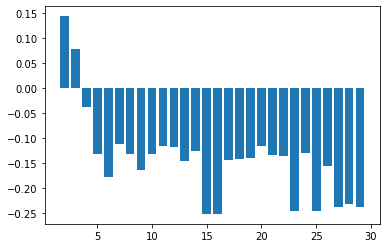

320-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 23s 177ms/step - loss: 0.6889 - val_loss: 0.6744
Epoch 2/100
132/132 [==============================] - 0s 280us/step - loss: 0.6620 - val_loss: 0.6280
Epoch 3/100
132/132 [==============================] - 0s 275us/step - loss: 0.6000 - val_loss: 0.5240
Epoch 4/100
132/132 [==============================] - 0s 271us/step - loss: 0.4784 - val_loss: 0.3523
Epoch 5/100
132/132 [==============================] - 0s 274us/step - loss: 0.3175 - val_loss: 0.1764
Epoch 6/100
132/132 [==============================] - 0s 271us/step - loss: 0.2017 - val_loss: 0.0965
Epoch 7/100
132/132 [==============================] - 0s 271us/step - loss: 0.1690 - val_loss: 0.0885
Epoch 8/100
132/132 [==============================] - 0s 270us/step - loss: 0.1567 - val_loss: 0.0935
(165, 260)


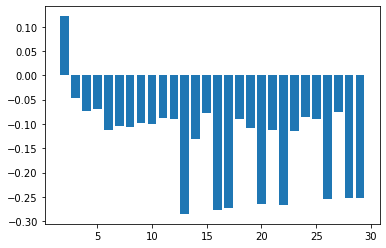

320-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 179ms/step - loss: 0.6891 - val_loss: 0.6746
Epoch 2/100
132/132 [==============================] - 0s 284us/step - loss: 0.6628 - val_loss: 0.6275
Epoch 3/100
132/132 [==============================] - 0s 271us/step - loss: 0.6012 - val_loss: 0.5212
Epoch 4/100
132/132 [==============================] - 0s 271us/step - loss: 0.4798 - val_loss: 0.3467
Epoch 5/100
132/132 [==============================] - 0s 270us/step - loss: 0.3168 - val_loss: 0.1712
Epoch 6/100
132/132 [==============================] - 0s 273us/step - loss: 0.2082 - val_loss: 0.0956
Epoch 7/100
132/132 [==============================] - 0s 267us/step - loss: 0.1786 - val_loss: 0.0909
Epoch 8/100
132/132 [==============================] - 0s 267us/step - loss: 0.1611 - val_loss: 0.0970
(165, 250)


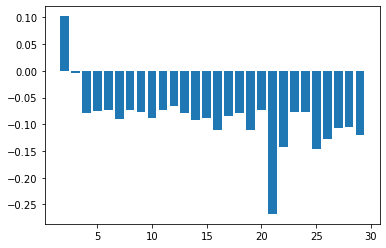

320-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 179ms/step - loss: 0.6898 - val_loss: 0.6759
Epoch 2/100
132/132 [==============================] - 0s 291us/step - loss: 0.6665 - val_loss: 0.6329
Epoch 3/100
132/132 [==============================] - 0s 275us/step - loss: 0.6062 - val_loss: 0.5352
Epoch 4/100
132/132 [==============================] - 0s 271us/step - loss: 0.4924 - val_loss: 0.3683
Epoch 5/100
132/132 [==============================] - 0s 274us/step - loss: 0.3316 - val_loss: 0.1893
Epoch 6/100
132/132 [==============================] - 0s 275us/step - loss: 0.2229 - val_loss: 0.1018
Epoch 7/100
132/132 [==============================] - 0s 273us/step - loss: 0.1869 - val_loss: 0.0921
Epoch 8/100
132/132 [==============================] - 0s 271us/step - loss: 0.1745 - val_loss: 0.0962
(165, 240)


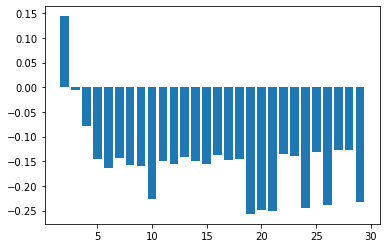

320-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 180ms/step - loss: 0.6878 - val_loss: 0.6702
Epoch 2/100
132/132 [==============================] - 0s 280us/step - loss: 0.6573 - val_loss: 0.6176
Epoch 3/100
132/132 [==============================] - 0s 273us/step - loss: 0.5905 - val_loss: 0.5070
Epoch 4/100
132/132 [==============================] - 0s 273us/step - loss: 0.4627 - val_loss: 0.3344
Epoch 5/100
132/132 [==============================] - 0s 280us/step - loss: 0.3121 - val_loss: 0.1688
Epoch 6/100
132/132 [==============================] - 0s 267us/step - loss: 0.2015 - val_loss: 0.0969
Epoch 7/100
132/132 [==============================] - 0s 270us/step - loss: 0.1684 - val_loss: 0.0900
Epoch 8/100
132/132 [==============================] - 0s 269us/step - loss: 0.1511 - val_loss: 0.0948
(165, 230)


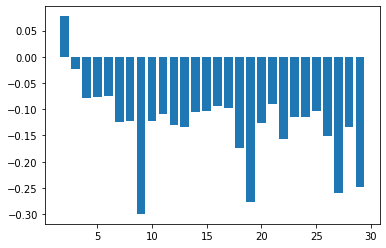

320-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 180ms/step - loss: 0.6887 - val_loss: 0.6732
Epoch 2/100
132/132 [==============================] - 0s 289us/step - loss: 0.6628 - val_loss: 0.6265
Epoch 3/100
132/132 [==============================] - 0s 279us/step - loss: 0.5992 - val_loss: 0.5253
Epoch 4/100
132/132 [==============================] - 0s 278us/step - loss: 0.4797 - val_loss: 0.3595
Epoch 5/100
132/132 [==============================] - 0s 271us/step - loss: 0.3297 - val_loss: 0.1867
Epoch 6/100
132/132 [==============================] - 0s 270us/step - loss: 0.2176 - val_loss: 0.1021
Epoch 7/100
132/132 [==============================] - 0s 271us/step - loss: 0.1801 - val_loss: 0.0901
Epoch 8/100
132/132 [==============================] - 0s 288us/step - loss: 0.1644 - val_loss: 0.0954
(165, 220)


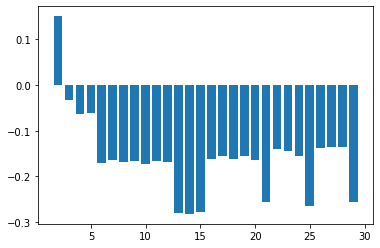

320-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 182ms/step - loss: 0.6885 - val_loss: 0.6728
Epoch 2/100
132/132 [==============================] - 0s 288us/step - loss: 0.6615 - val_loss: 0.6265
Epoch 3/100
132/132 [==============================] - 0s 280us/step - loss: 0.5998 - val_loss: 0.5274
Epoch 4/100
132/132 [==============================] - 0s 276us/step - loss: 0.4904 - val_loss: 0.3644
Epoch 5/100
132/132 [==============================] - 0s 276us/step - loss: 0.3413 - val_loss: 0.1916
Epoch 6/100
132/132 [==============================] - 0s 274us/step - loss: 0.2212 - val_loss: 0.1031
Epoch 7/100
132/132 [==============================] - 0s 281us/step - loss: 0.1793 - val_loss: 0.0883
Epoch 8/100
132/132 [==============================] - 0s 279us/step - loss: 0.1578 - val_loss: 0.0932
(165, 210)


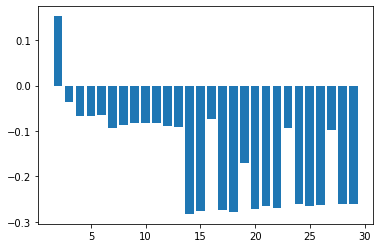

320-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 182ms/step - loss: 0.6880 - val_loss: 0.6720
Epoch 2/100
132/132 [==============================] - 0s 289us/step - loss: 0.6599 - val_loss: 0.6232
Epoch 3/100
132/132 [==============================] - 0s 287us/step - loss: 0.5949 - val_loss: 0.5205
Epoch 4/100
132/132 [==============================] - 0s 281us/step - loss: 0.4856 - val_loss: 0.3580
Epoch 5/100
132/132 [==============================] - 0s 274us/step - loss: 0.3327 - val_loss: 0.1922
Epoch 6/100
132/132 [==============================] - 0s 274us/step - loss: 0.2318 - val_loss: 0.1065
Epoch 7/100
132/132 [==============================] - 0s 277us/step - loss: 0.1847 - val_loss: 0.0925
Epoch 8/100
132/132 [==============================] - 0s 277us/step - loss: 0.1661 - val_loss: 0.0950
(165, 200)


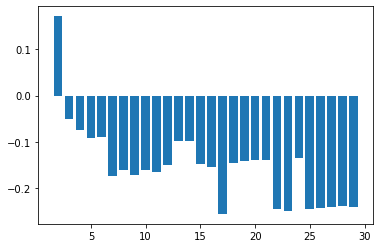

320-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 183ms/step - loss: 0.6883 - val_loss: 0.6720
Epoch 2/100
132/132 [==============================] - 0s 287us/step - loss: 0.6608 - val_loss: 0.6239
Epoch 3/100
132/132 [==============================] - 0s 275us/step - loss: 0.5966 - val_loss: 0.5228
Epoch 4/100
132/132 [==============================] - 0s 282us/step - loss: 0.4844 - val_loss: 0.3615
Epoch 5/100
132/132 [==============================] - 0s 277us/step - loss: 0.3417 - val_loss: 0.1932
Epoch 6/100
132/132 [==============================] - 0s 272us/step - loss: 0.2175 - val_loss: 0.1064
Epoch 7/100
132/132 [==============================] - 0s 277us/step - loss: 0.1760 - val_loss: 0.0887
Epoch 8/100
132/132 [==============================] - 0s 277us/step - loss: 0.1587 - val_loss: 0.0916
(165, 190)


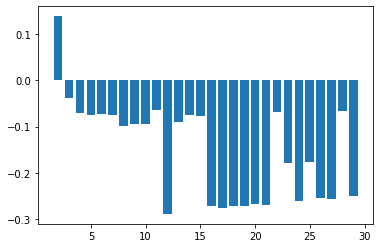

320-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 186ms/step - loss: 0.6873 - val_loss: 0.6712
Epoch 2/100
132/132 [==============================] - 0s 292us/step - loss: 0.6575 - val_loss: 0.6216
Epoch 3/100
132/132 [==============================] - 0s 272us/step - loss: 0.5915 - val_loss: 0.5175
Epoch 4/100
132/132 [==============================] - 0s 276us/step - loss: 0.4735 - val_loss: 0.3529
Epoch 5/100
132/132 [==============================] - 0s 274us/step - loss: 0.3242 - val_loss: 0.1858
Epoch 6/100
132/132 [==============================] - 0s 280us/step - loss: 0.2124 - val_loss: 0.1029
Epoch 7/100
132/132 [==============================] - 0s 275us/step - loss: 0.1729 - val_loss: 0.0888
Epoch 8/100
132/132 [==============================] - 0s 275us/step - loss: 0.1551 - val_loss: 0.0914
(165, 180)


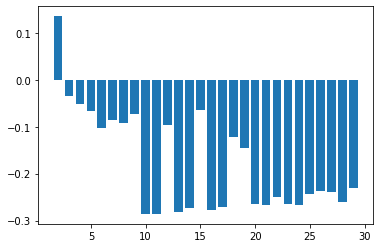

320-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 24s 185ms/step - loss: 0.6895 - val_loss: 0.6770
Epoch 2/100
132/132 [==============================] - 0s 286us/step - loss: 0.6665 - val_loss: 0.6388
Epoch 3/100
132/132 [==============================] - 0s 284us/step - loss: 0.6154 - val_loss: 0.5531
Epoch 4/100
132/132 [==============================] - 0s 284us/step - loss: 0.5140 - val_loss: 0.4029
Epoch 5/100
132/132 [==============================] - 0s 282us/step - loss: 0.3664 - val_loss: 0.2253
Epoch 6/100
132/132 [==============================] - 0s 277us/step - loss: 0.2395 - val_loss: 0.1147
Epoch 7/100
132/132 [==============================] - 0s 283us/step - loss: 0.1819 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 275us/step - loss: 0.1592 - val_loss: 0.0901
(165, 170)


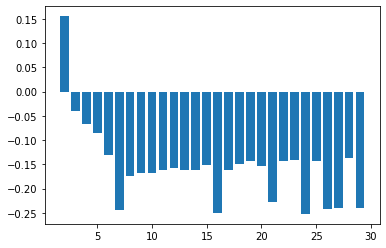

320-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 186ms/step - loss: 0.6869 - val_loss: 0.6702
Epoch 2/100
132/132 [==============================] - 0s 289us/step - loss: 0.6582 - val_loss: 0.6202
Epoch 3/100
132/132 [==============================] - 0s 278us/step - loss: 0.5930 - val_loss: 0.5191
Epoch 4/100
132/132 [==============================] - 0s 280us/step - loss: 0.4809 - val_loss: 0.3631
Epoch 5/100
132/132 [==============================] - 0s 280us/step - loss: 0.3358 - val_loss: 0.2000
Epoch 6/100
132/132 [==============================] - 0s 277us/step - loss: 0.2290 - val_loss: 0.1100
Epoch 7/100
132/132 [==============================] - 0s 282us/step - loss: 0.1793 - val_loss: 0.0910
Epoch 8/100
132/132 [==============================] - 0s 279us/step - loss: 0.1560 - val_loss: 0.0932
(165, 160)


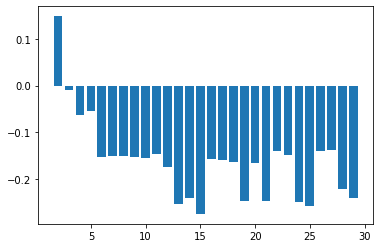

320-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 189ms/step - loss: 0.6885 - val_loss: 0.6746
Epoch 2/100
132/132 [==============================] - 0s 297us/step - loss: 0.6634 - val_loss: 0.6333
Epoch 3/100
132/132 [==============================] - 0s 281us/step - loss: 0.6064 - val_loss: 0.5438
Epoch 4/100
132/132 [==============================] - 0s 280us/step - loss: 0.5014 - val_loss: 0.3910
Epoch 5/100
132/132 [==============================] - 0s 280us/step - loss: 0.3598 - val_loss: 0.2156
Epoch 6/100
132/132 [==============================] - 0s 282us/step - loss: 0.2293 - val_loss: 0.1116
Epoch 7/100
132/132 [==============================] - 0s 278us/step - loss: 0.1837 - val_loss: 0.0856
Epoch 8/100
132/132 [==============================] - 0s 284us/step - loss: 0.1705 - val_loss: 0.0885
(165, 150)


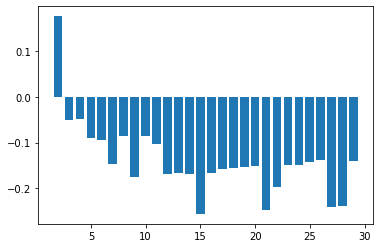

320-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 188ms/step - loss: 0.6888 - val_loss: 0.6756
Epoch 2/100
132/132 [==============================] - 0s 290us/step - loss: 0.6660 - val_loss: 0.6384
Epoch 3/100
132/132 [==============================] - 0s 278us/step - loss: 0.6177 - val_loss: 0.5614
Epoch 4/100
132/132 [==============================] - 0s 277us/step - loss: 0.5273 - val_loss: 0.4298
Epoch 5/100
132/132 [==============================] - 0s 281us/step - loss: 0.4024 - val_loss: 0.2652
Epoch 6/100
132/132 [==============================] - 0s 278us/step - loss: 0.2724 - val_loss: 0.1415
Epoch 7/100
132/132 [==============================] - 0s 280us/step - loss: 0.2069 - val_loss: 0.0941
Epoch 8/100
132/132 [==============================] - 0s 280us/step - loss: 0.1750 - val_loss: 0.0889
Epoch 9/100
132/132 [==============================] - 0s 280us/step - loss: 0.1484 - val_loss: 0.0912
(165, 140)


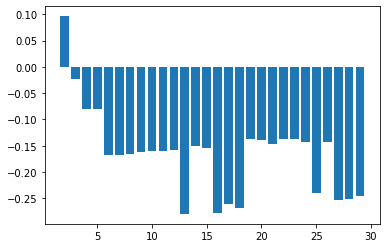

320-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 191ms/step - loss: 0.6883 - val_loss: 0.6750
Epoch 2/100
132/132 [==============================] - 0s 294us/step - loss: 0.6640 - val_loss: 0.6355
Epoch 3/100
132/132 [==============================] - 0s 284us/step - loss: 0.6103 - val_loss: 0.5554
Epoch 4/100
132/132 [==============================] - 0s 277us/step - loss: 0.5133 - val_loss: 0.4228
Epoch 5/100
132/132 [==============================] - 0s 275us/step - loss: 0.3896 - val_loss: 0.2605
Epoch 6/100
132/132 [==============================] - 0s 280us/step - loss: 0.2734 - val_loss: 0.1412
Epoch 7/100
132/132 [==============================] - 0s 279us/step - loss: 0.2000 - val_loss: 0.0974
Epoch 8/100
132/132 [==============================] - 0s 283us/step - loss: 0.1665 - val_loss: 0.0892
Epoch 9/100
132/132 [==============================] - 0s 278us/step - loss: 0.1496 - val_loss: 0.0903
(165, 130)


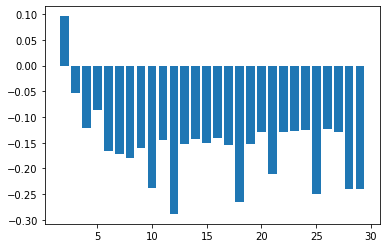

320-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 190ms/step - loss: 0.6887 - val_loss: 0.6757
Epoch 2/100
132/132 [==============================] - 0s 294us/step - loss: 0.6663 - val_loss: 0.6390
Epoch 3/100
132/132 [==============================] - 0s 293us/step - loss: 0.6164 - val_loss: 0.5644
Epoch 4/100
132/132 [==============================] - 0s 280us/step - loss: 0.5277 - val_loss: 0.4389
Epoch 5/100
132/132 [==============================] - 0s 282us/step - loss: 0.3996 - val_loss: 0.2795
Epoch 6/100
132/132 [==============================] - 0s 282us/step - loss: 0.2771 - val_loss: 0.1500
Epoch 7/100
132/132 [==============================] - 0s 283us/step - loss: 0.1987 - val_loss: 0.0974
Epoch 8/100
132/132 [==============================] - 0s 278us/step - loss: 0.1663 - val_loss: 0.0880
Epoch 9/100
132/132 [==============================] - 0s 286us/step - loss: 0.1521 - val_loss: 0.0900
(165, 120)


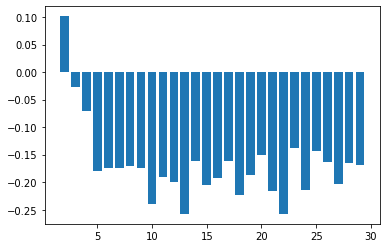

320-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 190ms/step - loss: 0.6901 - val_loss: 0.6786
Epoch 2/100
132/132 [==============================] - 0s 294us/step - loss: 0.6709 - val_loss: 0.6483
Epoch 3/100
132/132 [==============================] - 0s 286us/step - loss: 0.6300 - val_loss: 0.5855
Epoch 4/100
132/132 [==============================] - 0s 286us/step - loss: 0.5573 - val_loss: 0.4747
Epoch 5/100
132/132 [==============================] - 0s 276us/step - loss: 0.4342 - val_loss: 0.3232
Epoch 6/100
132/132 [==============================] - 0s 277us/step - loss: 0.3036 - val_loss: 0.1777
Epoch 7/100
132/132 [==============================] - 0s 281us/step - loss: 0.2129 - val_loss: 0.1024
Epoch 8/100
132/132 [==============================] - 0s 282us/step - loss: 0.1742 - val_loss: 0.0869
Epoch 9/100
132/132 [==============================] - 0s 277us/step - loss: 0.1534 - val_loss: 0.0879
(165, 110)


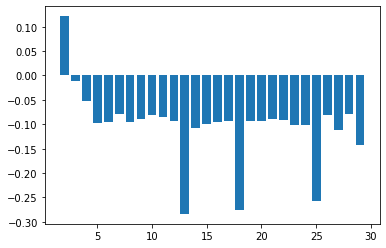

320-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 191ms/step - loss: 0.6900 - val_loss: 0.6799
Epoch 2/100
132/132 [==============================] - 0s 294us/step - loss: 0.6715 - val_loss: 0.6523
Epoch 3/100
132/132 [==============================] - 0s 286us/step - loss: 0.6329 - val_loss: 0.5940
Epoch 4/100
132/132 [==============================] - 0s 287us/step - loss: 0.5585 - val_loss: 0.4887
Epoch 5/100
132/132 [==============================] - 0s 283us/step - loss: 0.4499 - val_loss: 0.3387
Epoch 6/100
132/132 [==============================] - 0s 286us/step - loss: 0.3171 - val_loss: 0.1915
Epoch 7/100
132/132 [==============================] - 0s 283us/step - loss: 0.2236 - val_loss: 0.1086
Epoch 8/100
132/132 [==============================] - 0s 283us/step - loss: 0.1797 - val_loss: 0.0877
Epoch 9/100
132/132 [==============================] - 0s 283us/step - loss: 0.1563 - val_loss: 0.0875
Epoch 10/100
132

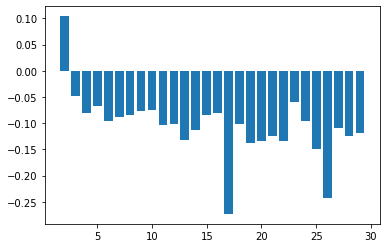

320-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 194ms/step - loss: 0.6879 - val_loss: 0.6744
Epoch 2/100
132/132 [==============================] - 0s 295us/step - loss: 0.6644 - val_loss: 0.6376
Epoch 3/100
132/132 [==============================] - 0s 286us/step - loss: 0.6159 - val_loss: 0.5664
Epoch 4/100
132/132 [==============================] - 0s 283us/step - loss: 0.5327 - val_loss: 0.4502
Epoch 5/100
132/132 [==============================] - 0s 283us/step - loss: 0.4183 - val_loss: 0.3024
Epoch 6/100
132/132 [==============================] - 0s 284us/step - loss: 0.2920 - val_loss: 0.1721
Epoch 7/100
132/132 [==============================] - 0s 288us/step - loss: 0.2041 - val_loss: 0.1042
Epoch 8/100
132/132 [==============================] - 0s 291us/step - loss: 0.1617 - val_loss: 0.0872
Epoch 9/100
132/132 [==============================] - 0s 288us/step - loss: 0.1383 - val_loss: 0.0872
(165, 90)


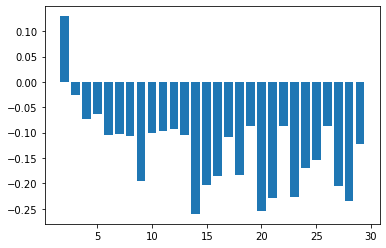

320-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 25s 193ms/step - loss: 0.6897 - val_loss: 0.6794
Epoch 2/100
132/132 [==============================] - 0s 295us/step - loss: 0.6712 - val_loss: 0.6522
Epoch 3/100
132/132 [==============================] - 0s 286us/step - loss: 0.6342 - val_loss: 0.5974
Epoch 4/100
132/132 [==============================] - 0s 287us/step - loss: 0.5631 - val_loss: 0.5012
Epoch 5/100
132/132 [==============================] - 0s 286us/step - loss: 0.4572 - val_loss: 0.3631
Epoch 6/100
132/132 [==============================] - 0s 285us/step - loss: 0.3243 - val_loss: 0.2189
Epoch 7/100
132/132 [==============================] - 0s 281us/step - loss: 0.2320 - val_loss: 0.1231
Epoch 8/100
132/132 [==============================] - 0s 289us/step - loss: 0.1769 - val_loss: 0.0913
Epoch 9/100
132/132 [==============================] - 0s 287us/step - loss: 0.1555 - val_loss: 0.0864
Epoch 10/100
132/

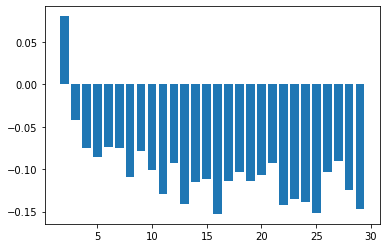

320-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 195ms/step - loss: 0.6895 - val_loss: 0.6792
Epoch 2/100
132/132 [==============================] - 0s 296us/step - loss: 0.6713 - val_loss: 0.6505
Epoch 3/100
132/132 [==============================] - 0s 284us/step - loss: 0.6330 - val_loss: 0.5929
Epoch 4/100
132/132 [==============================] - 0s 290us/step - loss: 0.5619 - val_loss: 0.4933
Epoch 5/100
132/132 [==============================] - 0s 285us/step - loss: 0.4552 - val_loss: 0.3533
Epoch 6/100
132/132 [==============================] - 0s 291us/step - loss: 0.3338 - val_loss: 0.2092
Epoch 7/100
132/132 [==============================] - 0s 285us/step - loss: 0.2349 - val_loss: 0.1173
Epoch 8/100
132/132 [==============================] - 0s 293us/step - loss: 0.1794 - val_loss: 0.0876
Epoch 9/100
132/132 [==============================] - 0s 292us/step - loss: 0.1601 - val_loss: 0.0839
Epoch 10/100
132/

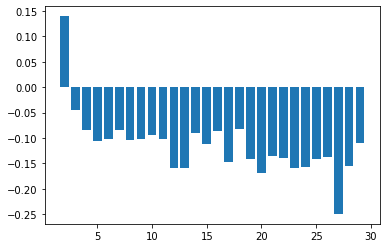

320-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 195ms/step - loss: 0.6909 - val_loss: 0.6829
Epoch 2/100
132/132 [==============================] - 0s 294us/step - loss: 0.6769 - val_loss: 0.6607
Epoch 3/100
132/132 [==============================] - 0s 283us/step - loss: 0.6461 - val_loss: 0.6154
Epoch 4/100
132/132 [==============================] - 0s 285us/step - loss: 0.5885 - val_loss: 0.5343
Epoch 5/100
132/132 [==============================] - 0s 280us/step - loss: 0.4951 - val_loss: 0.4109
Epoch 6/100
132/132 [==============================] - 0s 283us/step - loss: 0.3783 - val_loss: 0.2653
Epoch 7/100
132/132 [==============================] - 0s 287us/step - loss: 0.2667 - val_loss: 0.1509
Epoch 8/100
132/132 [==============================] - 0s 293us/step - loss: 0.1964 - val_loss: 0.0979
Epoch 9/100
132/132 [==============================] - 0s 287us/step - loss: 0.1665 - val_loss: 0.0852
Epoch 10/100
132/

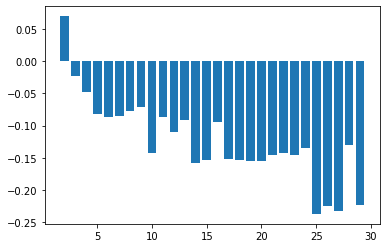

320-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 197ms/step - loss: 0.6899 - val_loss: 0.6803
Epoch 2/100
132/132 [==============================] - 0s 300us/step - loss: 0.6724 - val_loss: 0.6544
Epoch 3/100
132/132 [==============================] - 0s 292us/step - loss: 0.6361 - val_loss: 0.6052
Epoch 4/100
132/132 [==============================] - 0s 288us/step - loss: 0.5743 - val_loss: 0.5237
Epoch 5/100
132/132 [==============================] - 0s 288us/step - loss: 0.4826 - val_loss: 0.4074
Epoch 6/100
132/132 [==============================] - 0s 286us/step - loss: 0.3683 - val_loss: 0.2740
Epoch 7/100
132/132 [==============================] - 0s 290us/step - loss: 0.2708 - val_loss: 0.1636
Epoch 8/100
132/132 [==============================] - 0s 289us/step - loss: 0.1994 - val_loss: 0.1070
Epoch 9/100
132/132 [==============================] - 0s 289us/step - loss: 0.1651 - val_loss: 0.0886
Epoch 10/100
132/

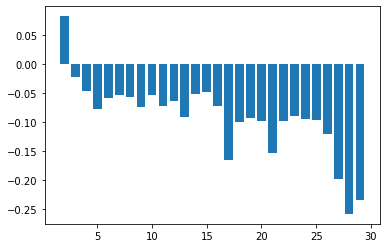

320-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 196ms/step - loss: 0.6914 - val_loss: 0.6843
Epoch 2/100
132/132 [==============================] - 0s 297us/step - loss: 0.6797 - val_loss: 0.6670
Epoch 3/100
132/132 [==============================] - 0s 289us/step - loss: 0.6565 - val_loss: 0.6331
Epoch 4/100
132/132 [==============================] - 0s 290us/step - loss: 0.6120 - val_loss: 0.5729
Epoch 5/100
132/132 [==============================] - 0s 287us/step - loss: 0.5433 - val_loss: 0.4799
Epoch 6/100
132/132 [==============================] - 0s 285us/step - loss: 0.4443 - val_loss: 0.3587
Epoch 7/100
132/132 [==============================] - 0s 289us/step - loss: 0.3387 - val_loss: 0.2329
Epoch 8/100
132/132 [==============================] - 0s 287us/step - loss: 0.2388 - val_loss: 0.1433
Epoch 9/100
132/132 [==============================] - 0s 287us/step - loss: 0.1825 - val_loss: 0.1012
Epoch 10/100
132/

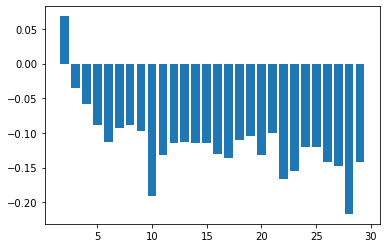

320-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 199ms/step - loss: 0.6898 - val_loss: 0.6818
Epoch 2/100
132/132 [==============================] - 0s 298us/step - loss: 0.6757 - val_loss: 0.6608
Epoch 3/100
132/132 [==============================] - 0s 288us/step - loss: 0.6472 - val_loss: 0.6219
Epoch 4/100
132/132 [==============================] - 0s 290us/step - loss: 0.5963 - val_loss: 0.5569
Epoch 5/100
132/132 [==============================] - 0s 287us/step - loss: 0.5227 - val_loss: 0.4609
Epoch 6/100
132/132 [==============================] - 0s 288us/step - loss: 0.4248 - val_loss: 0.3421
Epoch 7/100
132/132 [==============================] - 0s 293us/step - loss: 0.3186 - val_loss: 0.2245
Epoch 8/100
132/132 [==============================] - 0s 286us/step - loss: 0.2286 - val_loss: 0.1412
Epoch 9/100
132/132 [==============================] - 0s 309us/step - loss: 0.1817 - val_loss: 0.1000
Epoch 10/100
132/

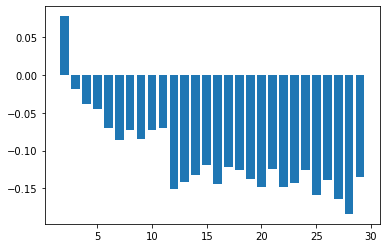

320-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 199ms/step - loss: 0.6910 - val_loss: 0.6840
Epoch 2/100
132/132 [==============================] - 0s 298us/step - loss: 0.6796 - val_loss: 0.6669
Epoch 3/100
132/132 [==============================] - 0s 290us/step - loss: 0.6566 - val_loss: 0.6365
Epoch 4/100
132/132 [==============================] - 0s 288us/step - loss: 0.6173 - val_loss: 0.5864
Epoch 5/100
132/132 [==============================] - 0s 289us/step - loss: 0.5577 - val_loss: 0.5123
Epoch 6/100
132/132 [==============================] - 0s 289us/step - loss: 0.4798 - val_loss: 0.4149
Epoch 7/100
132/132 [==============================] - 0s 297us/step - loss: 0.3874 - val_loss: 0.3061
Epoch 8/100
132/132 [==============================] - 0s 295us/step - loss: 0.2969 - val_loss: 0.2070
Epoch 9/100
132/132 [==============================] - 0s 309us/step - loss: 0.2238 - val_loss: 0.1381
Epoch 10/100
132/

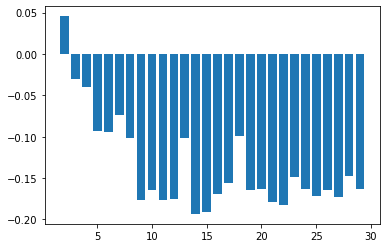

320-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 200ms/step - loss: 0.6922 - val_loss: 0.6881
Epoch 2/100
132/132 [==============================] - 0s 302us/step - loss: 0.6853 - val_loss: 0.6780
Epoch 3/100
132/132 [==============================] - 0s 295us/step - loss: 0.6708 - val_loss: 0.6597
Epoch 4/100
132/132 [==============================] - 0s 289us/step - loss: 0.6461 - val_loss: 0.6302
Epoch 5/100
132/132 [==============================] - 0s 288us/step - loss: 0.6087 - val_loss: 0.5862
Epoch 6/100
132/132 [==============================] - 0s 292us/step - loss: 0.5600 - val_loss: 0.5254
Epoch 7/100
132/132 [==============================] - 0s 292us/step - loss: 0.4946 - val_loss: 0.4499
Epoch 8/100
132/132 [==============================] - 0s 290us/step - loss: 0.4178 - val_loss: 0.3622
Epoch 9/100
132/132 [==============================] - 0s 300us/step - loss: 0.3349 - val_loss: 0.2719
Epoch 10/100
132/

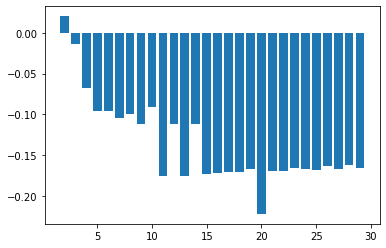

310-300dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 26s 201ms/step - loss: 0.6876 - val_loss: 0.6696
Epoch 2/100
132/132 [==============================] - 0s 304us/step - loss: 0.6549 - val_loss: 0.6100
Epoch 3/100
132/132 [==============================] - 0s 295us/step - loss: 0.5802 - val_loss: 0.4828
Epoch 4/100
132/132 [==============================] - 0s 293us/step - loss: 0.4468 - val_loss: 0.2981
Epoch 5/100
132/132 [==============================] - 0s 292us/step - loss: 0.2952 - val_loss: 0.1485
Epoch 6/100
132/132 [==============================] - 0s 293us/step - loss: 0.1963 - val_loss: 0.0955
Epoch 7/100
132/132 [==============================] - 0s 299us/step - loss: 0.1660 - val_loss: 0.0916
Epoch 8/100
132/132 [==============================] - 0s 296us/step - loss: 0.1437 - val_loss: 0.0950
(165, 300)


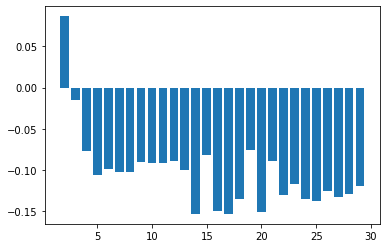

310-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 203ms/step - loss: 0.6885 - val_loss: 0.6714
Epoch 2/100
132/132 [==============================] - 0s 303us/step - loss: 0.6586 - val_loss: 0.6193
Epoch 3/100
132/132 [==============================] - 0s 300us/step - loss: 0.5890 - val_loss: 0.5054
Epoch 4/100
132/132 [==============================] - 0s 294us/step - loss: 0.4591 - val_loss: 0.3251
Epoch 5/100
132/132 [==============================] - 0s 297us/step - loss: 0.3108 - val_loss: 0.1604
Epoch 6/100
132/132 [==============================] - 0s 298us/step - loss: 0.2039 - val_loss: 0.0964
Epoch 7/100
132/132 [==============================] - 0s 297us/step - loss: 0.1735 - val_loss: 0.0897
Epoch 8/100
132/132 [==============================] - 0s 295us/step - loss: 0.1535 - val_loss: 0.0931
(165, 290)


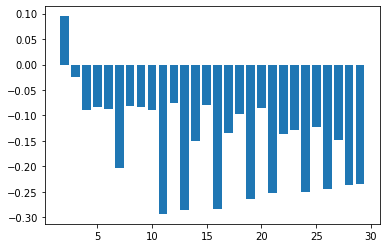

310-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 202ms/step - loss: 0.6875 - val_loss: 0.6713
Epoch 2/100
132/132 [==============================] - 0s 310us/step - loss: 0.6582 - val_loss: 0.6185
Epoch 3/100
132/132 [==============================] - 0s 298us/step - loss: 0.5886 - val_loss: 0.5030
Epoch 4/100
132/132 [==============================] - 0s 296us/step - loss: 0.4576 - val_loss: 0.3231
Epoch 5/100
132/132 [==============================] - 0s 306us/step - loss: 0.2944 - val_loss: 0.1565
Epoch 6/100
132/132 [==============================] - 0s 297us/step - loss: 0.1874 - val_loss: 0.0926
Epoch 7/100
132/132 [==============================] - 0s 296us/step - loss: 0.1651 - val_loss: 0.0904
Epoch 8/100
132/132 [==============================] - 0s 300us/step - loss: 0.1540 - val_loss: 0.0964
(165, 280)


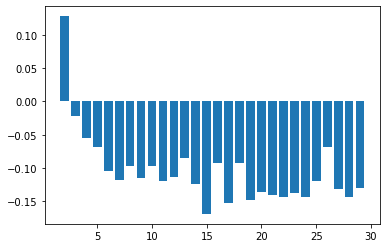

310-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 202ms/step - loss: 0.6889 - val_loss: 0.6736
Epoch 2/100
132/132 [==============================] - 0s 305us/step - loss: 0.6616 - val_loss: 0.6246
Epoch 3/100
132/132 [==============================] - 0s 297us/step - loss: 0.5966 - val_loss: 0.5168
Epoch 4/100
132/132 [==============================] - 0s 295us/step - loss: 0.4752 - val_loss: 0.3415
Epoch 5/100
132/132 [==============================] - 0s 300us/step - loss: 0.3150 - val_loss: 0.1706
Epoch 6/100
132/132 [==============================] - 0s 296us/step - loss: 0.2070 - val_loss: 0.0975
Epoch 7/100
132/132 [==============================] - 0s 299us/step - loss: 0.1713 - val_loss: 0.0920
Epoch 8/100
132/132 [==============================] - 0s 297us/step - loss: 0.1567 - val_loss: 0.0973
(165, 270)


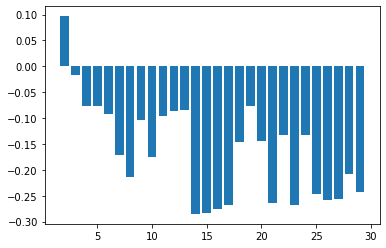

310-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 204ms/step - loss: 0.6871 - val_loss: 0.6696
Epoch 2/100
132/132 [==============================] - 0s 303us/step - loss: 0.6559 - val_loss: 0.6130
Epoch 3/100
132/132 [==============================] - 0s 298us/step - loss: 0.5807 - val_loss: 0.4932
Epoch 4/100
132/132 [==============================] - 0s 312us/step - loss: 0.4496 - val_loss: 0.3119
Epoch 5/100
132/132 [==============================] - 0s 301us/step - loss: 0.2942 - val_loss: 0.1515
Epoch 6/100
132/132 [==============================] - 0s 299us/step - loss: 0.1964 - val_loss: 0.0928
Epoch 7/100
132/132 [==============================] - 0s 305us/step - loss: 0.1708 - val_loss: 0.0907
Epoch 8/100
132/132 [==============================] - 0s 298us/step - loss: 0.1543 - val_loss: 0.0951
(165, 260)


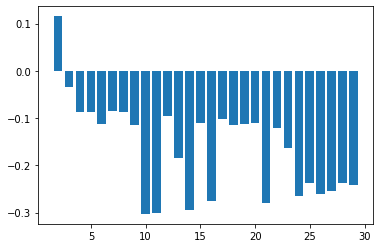

310-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 207ms/step - loss: 0.6895 - val_loss: 0.6745
Epoch 2/100
132/132 [==============================] - 0s 310us/step - loss: 0.6637 - val_loss: 0.6295
Epoch 3/100
132/132 [==============================] - 0s 301us/step - loss: 0.6053 - val_loss: 0.5306
Epoch 4/100
132/132 [==============================] - 0s 300us/step - loss: 0.4886 - val_loss: 0.3665
Epoch 5/100
132/132 [==============================] - 0s 299us/step - loss: 0.3304 - val_loss: 0.1915
Epoch 6/100
132/132 [==============================] - 0s 298us/step - loss: 0.2089 - val_loss: 0.1015
Epoch 7/100
132/132 [==============================] - 0s 297us/step - loss: 0.1729 - val_loss: 0.0897
Epoch 8/100
132/132 [==============================] - 0s 299us/step - loss: 0.1567 - val_loss: 0.0959
(165, 250)


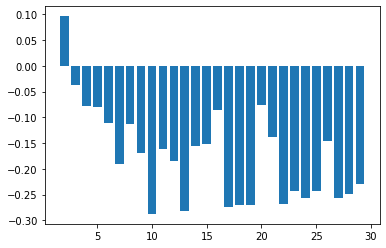

310-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 205ms/step - loss: 0.6873 - val_loss: 0.6704
Epoch 2/100
132/132 [==============================] - 0s 313us/step - loss: 0.6575 - val_loss: 0.6181
Epoch 3/100
132/132 [==============================] - 0s 302us/step - loss: 0.5918 - val_loss: 0.5081
Epoch 4/100
132/132 [==============================] - 0s 296us/step - loss: 0.4677 - val_loss: 0.3363
Epoch 5/100
132/132 [==============================] - 0s 312us/step - loss: 0.3217 - val_loss: 0.1708
Epoch 6/100
132/132 [==============================] - 0s 299us/step - loss: 0.2099 - val_loss: 0.0989
Epoch 7/100
132/132 [==============================] - 0s 297us/step - loss: 0.1717 - val_loss: 0.0902
Epoch 8/100
132/132 [==============================] - 0s 292us/step - loss: 0.1551 - val_loss: 0.0942
(165, 240)


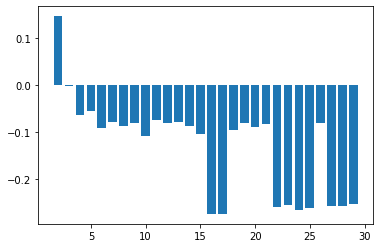

310-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 206ms/step - loss: 0.6890 - val_loss: 0.6754
Epoch 2/100
132/132 [==============================] - 0s 310us/step - loss: 0.6643 - val_loss: 0.6334
Epoch 3/100
132/132 [==============================] - 0s 301us/step - loss: 0.6070 - val_loss: 0.5407
Epoch 4/100
132/132 [==============================] - 0s 303us/step - loss: 0.4936 - val_loss: 0.3817
Epoch 5/100
132/132 [==============================] - 0s 300us/step - loss: 0.3452 - val_loss: 0.2039
Epoch 6/100
132/132 [==============================] - 0s 300us/step - loss: 0.2166 - val_loss: 0.1058
Epoch 7/100
132/132 [==============================] - 0s 306us/step - loss: 0.1688 - val_loss: 0.0882
Epoch 8/100
132/132 [==============================] - 0s 300us/step - loss: 0.1532 - val_loss: 0.0923
(165, 230)


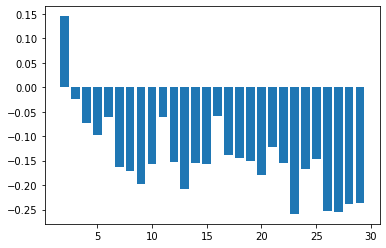

310-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 27s 207ms/step - loss: 0.6893 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 308us/step - loss: 0.6658 - val_loss: 0.6353
Epoch 3/100
132/132 [==============================] - 0s 300us/step - loss: 0.6102 - val_loss: 0.5434
Epoch 4/100
132/132 [==============================] - 0s 295us/step - loss: 0.5032 - val_loss: 0.3868
Epoch 5/100
132/132 [==============================] - 0s 300us/step - loss: 0.3503 - val_loss: 0.2108
Epoch 6/100
132/132 [==============================] - 0s 306us/step - loss: 0.2272 - val_loss: 0.1084
Epoch 7/100
132/132 [==============================] - 0s 303us/step - loss: 0.1770 - val_loss: 0.0887
Epoch 8/100
132/132 [==============================] - 0s 299us/step - loss: 0.1627 - val_loss: 0.0927
(165, 220)


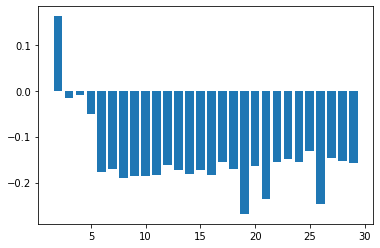

310-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 209ms/step - loss: 0.6871 - val_loss: 0.6708
Epoch 2/100
132/132 [==============================] - 0s 309us/step - loss: 0.6565 - val_loss: 0.6175
Epoch 3/100
132/132 [==============================] - 0s 299us/step - loss: 0.5849 - val_loss: 0.5049
Epoch 4/100
132/132 [==============================] - 0s 299us/step - loss: 0.4561 - val_loss: 0.3303
Epoch 5/100
132/132 [==============================] - 0s 303us/step - loss: 0.3094 - val_loss: 0.1698
Epoch 6/100
132/132 [==============================] - 0s 302us/step - loss: 0.2112 - val_loss: 0.0996
Epoch 7/100
132/132 [==============================] - 0s 304us/step - loss: 0.1835 - val_loss: 0.0915
Epoch 8/100
132/132 [==============================] - 0s 310us/step - loss: 0.1659 - val_loss: 0.0958
(165, 210)


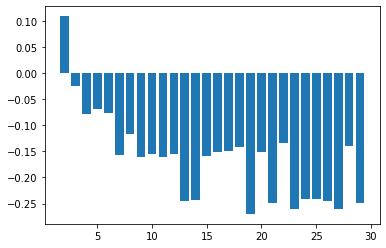

310-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 209ms/step - loss: 0.6894 - val_loss: 0.6756
Epoch 2/100
132/132 [==============================] - 0s 316us/step - loss: 0.6658 - val_loss: 0.6344
Epoch 3/100
132/132 [==============================] - 0s 303us/step - loss: 0.6104 - val_loss: 0.5448
Epoch 4/100
132/132 [==============================] - 0s 302us/step - loss: 0.5022 - val_loss: 0.3913
Epoch 5/100
132/132 [==============================] - 0s 300us/step - loss: 0.3613 - val_loss: 0.2156
Epoch 6/100
132/132 [==============================] - 0s 305us/step - loss: 0.2420 - val_loss: 0.1102
Epoch 7/100
132/132 [==============================] - 0s 298us/step - loss: 0.1885 - val_loss: 0.0874
Epoch 8/100
132/132 [==============================] - 0s 302us/step - loss: 0.1687 - val_loss: 0.0894
(165, 200)


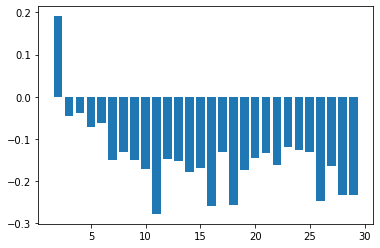

310-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 210ms/step - loss: 0.6886 - val_loss: 0.6736
Epoch 2/100
132/132 [==============================] - 0s 310us/step - loss: 0.6622 - val_loss: 0.6313
Epoch 3/100
132/132 [==============================] - 0s 304us/step - loss: 0.6061 - val_loss: 0.5422
Epoch 4/100
132/132 [==============================] - 0s 306us/step - loss: 0.5024 - val_loss: 0.3930
Epoch 5/100
132/132 [==============================] - 0s 303us/step - loss: 0.3664 - val_loss: 0.2221
Epoch 6/100
132/132 [==============================] - 0s 303us/step - loss: 0.2381 - val_loss: 0.1168
Epoch 7/100
132/132 [==============================] - 0s 303us/step - loss: 0.1821 - val_loss: 0.0876
Epoch 8/100
132/132 [==============================] - 0s 309us/step - loss: 0.1603 - val_loss: 0.0879
(165, 190)


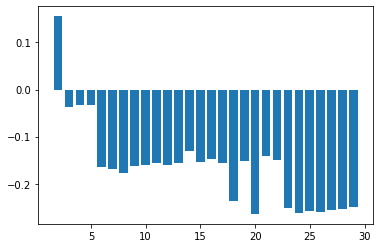

310-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 210ms/step - loss: 0.6891 - val_loss: 0.6767
Epoch 2/100
132/132 [==============================] - 0s 314us/step - loss: 0.6663 - val_loss: 0.6386
Epoch 3/100
132/132 [==============================] - 0s 308us/step - loss: 0.6150 - val_loss: 0.5559
Epoch 4/100
132/132 [==============================] - 0s 301us/step - loss: 0.5182 - val_loss: 0.4132
Epoch 5/100
132/132 [==============================] - 0s 305us/step - loss: 0.3778 - val_loss: 0.2404
Epoch 6/100
132/132 [==============================] - 0s 303us/step - loss: 0.2478 - val_loss: 0.1214
Epoch 7/100
132/132 [==============================] - 0s 305us/step - loss: 0.1855 - val_loss: 0.0885
Epoch 8/100
132/132 [==============================] - 0s 302us/step - loss: 0.1646 - val_loss: 0.0887
(165, 180)


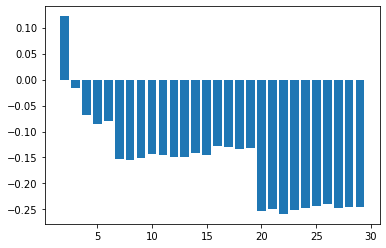

310-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 212ms/step - loss: 0.6903 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 316us/step - loss: 0.6714 - val_loss: 0.6455
Epoch 3/100
132/132 [==============================] - 0s 303us/step - loss: 0.6268 - val_loss: 0.5734
Epoch 4/100
132/132 [==============================] - 0s 305us/step - loss: 0.5390 - val_loss: 0.4452
Epoch 5/100
132/132 [==============================] - 0s 302us/step - loss: 0.4069 - val_loss: 0.2745
Epoch 6/100
132/132 [==============================] - 0s 301us/step - loss: 0.2700 - val_loss: 0.1385
Epoch 7/100
132/132 [==============================] - 0s 304us/step - loss: 0.1987 - val_loss: 0.0909
Epoch 8/100
132/132 [==============================] - 0s 305us/step - loss: 0.1747 - val_loss: 0.0892
Epoch 9/100
132/132 [==============================] - 0s 306us/step - loss: 0.1562 - val_loss: 0.0939
(165, 170)


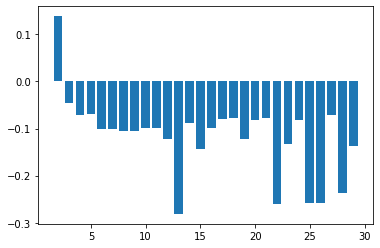

310-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 214ms/step - loss: 0.6894 - val_loss: 0.6760
Epoch 2/100
132/132 [==============================] - 0s 317us/step - loss: 0.6662 - val_loss: 0.6379
Epoch 3/100
132/132 [==============================] - 0s 307us/step - loss: 0.6159 - val_loss: 0.5565
Epoch 4/100
132/132 [==============================] - 0s 302us/step - loss: 0.5226 - val_loss: 0.4174
Epoch 5/100
132/132 [==============================] - 0s 301us/step - loss: 0.3808 - val_loss: 0.2500
Epoch 6/100
132/132 [==============================] - 0s 303us/step - loss: 0.2598 - val_loss: 0.1302
Epoch 7/100
132/132 [==============================] - 0s 304us/step - loss: 0.1952 - val_loss: 0.0928
Epoch 8/100
132/132 [==============================] - 0s 305us/step - loss: 0.1756 - val_loss: 0.0929
(165, 160)


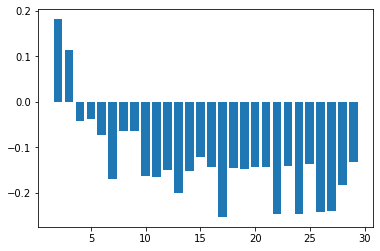

310-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 213ms/step - loss: 0.6882 - val_loss: 0.6743
Epoch 2/100
132/132 [==============================] - 0s 317us/step - loss: 0.6640 - val_loss: 0.6339
Epoch 3/100
132/132 [==============================] - 0s 308us/step - loss: 0.6079 - val_loss: 0.5512
Epoch 4/100
132/132 [==============================] - 0s 306us/step - loss: 0.5112 - val_loss: 0.4131
Epoch 5/100
132/132 [==============================] - 0s 304us/step - loss: 0.3768 - val_loss: 0.2460
Epoch 6/100
132/132 [==============================] - 0s 314us/step - loss: 0.2594 - val_loss: 0.1297
Epoch 7/100
132/132 [==============================] - 0s 302us/step - loss: 0.1914 - val_loss: 0.0929
Epoch 8/100
132/132 [==============================] - 0s 305us/step - loss: 0.1636 - val_loss: 0.0888
Epoch 9/100
132/132 [==============================] - 0s 305us/step - loss: 0.1412 - val_loss: 0.0909
(165, 150)


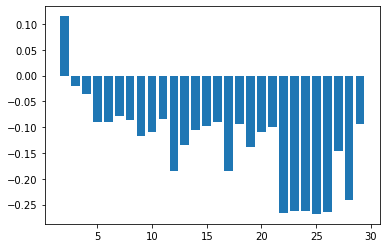

310-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 28s 214ms/step - loss: 0.6904 - val_loss: 0.6790
Epoch 2/100
132/132 [==============================] - 0s 318us/step - loss: 0.6716 - val_loss: 0.6479
Epoch 3/100
132/132 [==============================] - 0s 304us/step - loss: 0.6293 - val_loss: 0.5825
Epoch 4/100
132/132 [==============================] - 0s 308us/step - loss: 0.5491 - val_loss: 0.4651
Epoch 5/100
132/132 [==============================] - 0s 310us/step - loss: 0.4318 - val_loss: 0.3046
Epoch 6/100
132/132 [==============================] - 0s 308us/step - loss: 0.2949 - val_loss: 0.1642
Epoch 7/100
132/132 [==============================] - 0s 301us/step - loss: 0.2024 - val_loss: 0.0993
Epoch 8/100
132/132 [==============================] - 0s 307us/step - loss: 0.1657 - val_loss: 0.0869
Epoch 9/100
132/132 [==============================] - 0s 302us/step - loss: 0.1452 - val_loss: 0.0893
(165, 140)


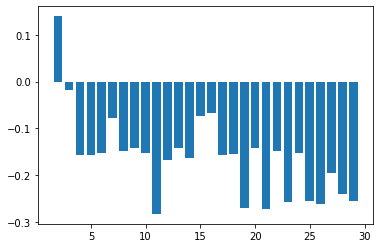

310-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 238ms/step - loss: 0.6885 - val_loss: 0.6740
Epoch 2/100
132/132 [==============================] - 0s 320us/step - loss: 0.6646 - val_loss: 0.6354
Epoch 3/100
132/132 [==============================] - 0s 314us/step - loss: 0.6143 - val_loss: 0.5580
Epoch 4/100
132/132 [==============================] - 0s 313us/step - loss: 0.5223 - val_loss: 0.4294
Epoch 5/100
132/132 [==============================] - 0s 309us/step - loss: 0.3963 - val_loss: 0.2683
Epoch 6/100
132/132 [==============================] - 0s 309us/step - loss: 0.2641 - val_loss: 0.1431
Epoch 7/100
132/132 [==============================] - 0s 308us/step - loss: 0.1940 - val_loss: 0.0936
Epoch 8/100
132/132 [==============================] - 0s 314us/step - loss: 0.1702 - val_loss: 0.0887
Epoch 9/100
132/132 [==============================] - 0s 307us/step - loss: 0.1544 - val_loss: 0.0913
(165, 130)


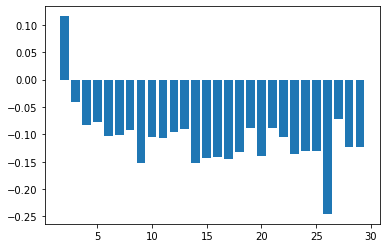

310-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 233ms/step - loss: 0.6900 - val_loss: 0.6780
Epoch 2/100
132/132 [==============================] - 0s 316us/step - loss: 0.6697 - val_loss: 0.6456
Epoch 3/100
132/132 [==============================] - 0s 307us/step - loss: 0.6279 - val_loss: 0.5788
Epoch 4/100
132/132 [==============================] - 0s 309us/step - loss: 0.5476 - val_loss: 0.4629
Epoch 5/100
132/132 [==============================] - 0s 312us/step - loss: 0.4231 - val_loss: 0.3065
Epoch 6/100
132/132 [==============================] - 0s 304us/step - loss: 0.2841 - val_loss: 0.1653
Epoch 7/100
132/132 [==============================] - 0s 309us/step - loss: 0.1988 - val_loss: 0.0976
Epoch 8/100
132/132 [==============================] - 0s 316us/step - loss: 0.1629 - val_loss: 0.0863
Epoch 9/100
132/132 [==============================] - 0s 315us/step - loss: 0.1476 - val_loss: 0.0892
(165, 120)


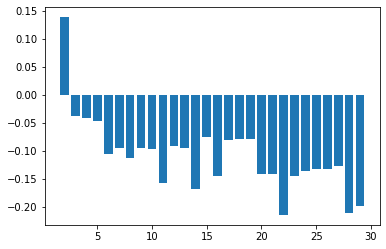

310-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 237ms/step - loss: 0.6889 - val_loss: 0.6766
Epoch 2/100
132/132 [==============================] - 0s 317us/step - loss: 0.6671 - val_loss: 0.6421
Epoch 3/100
132/132 [==============================] - 0s 311us/step - loss: 0.6195 - val_loss: 0.5721
Epoch 4/100
132/132 [==============================] - 0s 306us/step - loss: 0.5326 - val_loss: 0.4535
Epoch 5/100
132/132 [==============================] - 0s 309us/step - loss: 0.4163 - val_loss: 0.2978
Epoch 6/100
132/132 [==============================] - 0s 310us/step - loss: 0.2850 - val_loss: 0.1635
Epoch 7/100
132/132 [==============================] - 0s 308us/step - loss: 0.1995 - val_loss: 0.0986
Epoch 8/100
132/132 [==============================] - 0s 307us/step - loss: 0.1703 - val_loss: 0.0851
Epoch 9/100
132/132 [==============================] - 0s 314us/step - loss: 0.1570 - val_loss: 0.0866
(165, 110)


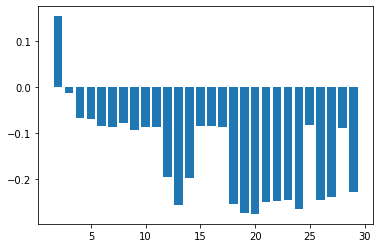

310-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 235ms/step - loss: 0.6898 - val_loss: 0.6783
Epoch 2/100
132/132 [==============================] - 0s 326us/step - loss: 0.6701 - val_loss: 0.6476
Epoch 3/100
132/132 [==============================] - 0s 310us/step - loss: 0.6291 - val_loss: 0.5854
Epoch 4/100
132/132 [==============================] - 0s 308us/step - loss: 0.5513 - val_loss: 0.4774
Epoch 5/100
132/132 [==============================] - 0s 311us/step - loss: 0.4398 - val_loss: 0.3290
Epoch 6/100
132/132 [==============================] - 0s 311us/step - loss: 0.3137 - val_loss: 0.1861
Epoch 7/100
132/132 [==============================] - 0s 308us/step - loss: 0.2198 - val_loss: 0.1066
Epoch 8/100
132/132 [==============================] - 0s 313us/step - loss: 0.1820 - val_loss: 0.0849
Epoch 9/100
132/132 [==============================] - 0s 315us/step - loss: 0.1599 - val_loss: 0.0847
Epoch 10/100
132

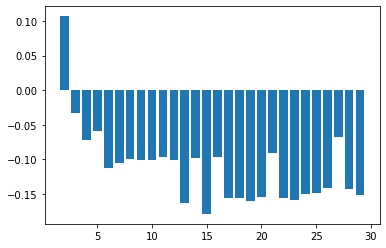

310-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 237ms/step - loss: 0.6890 - val_loss: 0.6769
Epoch 2/100
132/132 [==============================] - 0s 321us/step - loss: 0.6689 - val_loss: 0.6449
Epoch 3/100
132/132 [==============================] - 0s 314us/step - loss: 0.6291 - val_loss: 0.5816
Epoch 4/100
132/132 [==============================] - 0s 313us/step - loss: 0.5546 - val_loss: 0.4743
Epoch 5/100
132/132 [==============================] - 0s 308us/step - loss: 0.4477 - val_loss: 0.3295
Epoch 6/100
132/132 [==============================] - 0s 311us/step - loss: 0.3248 - val_loss: 0.1923
Epoch 7/100
132/132 [==============================] - 0s 314us/step - loss: 0.2244 - val_loss: 0.1129
Epoch 8/100
132/132 [==============================] - 0s 310us/step - loss: 0.1703 - val_loss: 0.0883
Epoch 9/100
132/132 [==============================] - 0s 312us/step - loss: 0.1461 - val_loss: 0.0858
Epoch 10/100
132/

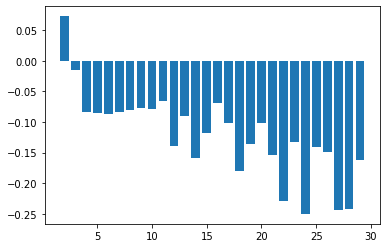

310-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 235ms/step - loss: 0.6901 - val_loss: 0.6811
Epoch 2/100
132/132 [==============================] - 0s 324us/step - loss: 0.6740 - val_loss: 0.6566
Epoch 3/100
132/132 [==============================] - 0s 308us/step - loss: 0.6389 - val_loss: 0.6065
Epoch 4/100
132/132 [==============================] - 0s 308us/step - loss: 0.5721 - val_loss: 0.5167
Epoch 5/100
132/132 [==============================] - 0s 310us/step - loss: 0.4715 - val_loss: 0.3836
Epoch 6/100
132/132 [==============================] - 0s 320us/step - loss: 0.3543 - val_loss: 0.2382
Epoch 7/100
132/132 [==============================] - 0s 313us/step - loss: 0.2412 - val_loss: 0.1377
Epoch 8/100
132/132 [==============================] - 0s 315us/step - loss: 0.1797 - val_loss: 0.0952
Epoch 9/100
132/132 [==============================] - 0s 311us/step - loss: 0.1512 - val_loss: 0.0859
Epoch 10/100
132/

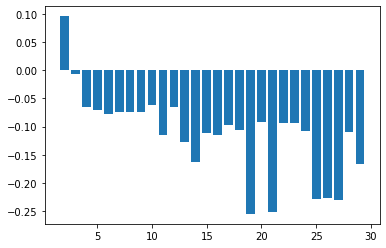

310-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 237ms/step - loss: 0.6894 - val_loss: 0.6779
Epoch 2/100
132/132 [==============================] - 0s 327us/step - loss: 0.6695 - val_loss: 0.6473
Epoch 3/100
132/132 [==============================] - 0s 313us/step - loss: 0.6280 - val_loss: 0.5873
Epoch 4/100
132/132 [==============================] - 0s 314us/step - loss: 0.5552 - val_loss: 0.4867
Epoch 5/100
132/132 [==============================] - 0s 316us/step - loss: 0.4474 - val_loss: 0.3493
Epoch 6/100
132/132 [==============================] - 0s 314us/step - loss: 0.3275 - val_loss: 0.2115
Epoch 7/100
132/132 [==============================] - 0s 319us/step - loss: 0.2322 - val_loss: 0.1243
Epoch 8/100
132/132 [==============================] - 0s 315us/step - loss: 0.1819 - val_loss: 0.0935
Epoch 9/100
132/132 [==============================] - 0s 312us/step - loss: 0.1589 - val_loss: 0.0880
Epoch 10/100
132/

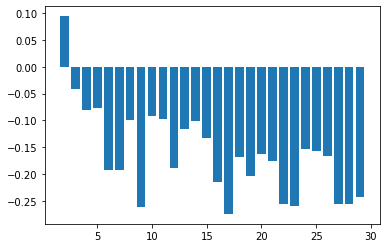

310-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 234ms/step - loss: 0.6909 - val_loss: 0.6820
Epoch 2/100
132/132 [==============================] - 0s 322us/step - loss: 0.6755 - val_loss: 0.6596
Epoch 3/100
132/132 [==============================] - 0s 313us/step - loss: 0.6447 - val_loss: 0.6153
Epoch 4/100
132/132 [==============================] - 0s 313us/step - loss: 0.5885 - val_loss: 0.5369
Epoch 5/100
132/132 [==============================] - 0s 318us/step - loss: 0.4989 - val_loss: 0.4179
Epoch 6/100
132/132 [==============================] - 0s 312us/step - loss: 0.3797 - val_loss: 0.2768
Epoch 7/100
132/132 [==============================] - 0s 313us/step - loss: 0.2690 - val_loss: 0.1602
Epoch 8/100
132/132 [==============================] - 0s 321us/step - loss: 0.1931 - val_loss: 0.1036
Epoch 9/100
132/132 [==============================] - 0s 317us/step - loss: 0.1621 - val_loss: 0.0885
Epoch 10/100
132/

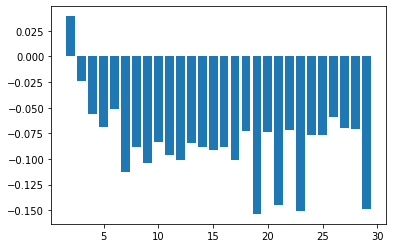

310-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 235ms/step - loss: 0.6901 - val_loss: 0.6817
Epoch 2/100
132/132 [==============================] - 0s 326us/step - loss: 0.6750 - val_loss: 0.6587
Epoch 3/100
132/132 [==============================] - 0s 324us/step - loss: 0.6424 - val_loss: 0.6138
Epoch 4/100
132/132 [==============================] - 0s 316us/step - loss: 0.5876 - val_loss: 0.5363
Epoch 5/100
132/132 [==============================] - 0s 317us/step - loss: 0.5011 - val_loss: 0.4230
Epoch 6/100
132/132 [==============================] - 0s 317us/step - loss: 0.3873 - val_loss: 0.2884
Epoch 7/100
132/132 [==============================] - 0s 318us/step - loss: 0.2795 - val_loss: 0.1721
Epoch 8/100
132/132 [==============================] - 0s 314us/step - loss: 0.2098 - val_loss: 0.1085
Epoch 9/100
132/132 [==============================] - 0s 319us/step - loss: 0.1695 - val_loss: 0.0895
Epoch 10/100
132/

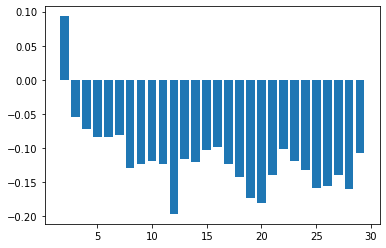

310-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 233ms/step - loss: 0.6914 - val_loss: 0.6846
Epoch 2/100
132/132 [==============================] - 0s 328us/step - loss: 0.6805 - val_loss: 0.6681
Epoch 3/100
132/132 [==============================] - 0s 316us/step - loss: 0.6578 - val_loss: 0.6358
Epoch 4/100
132/132 [==============================] - 0s 312us/step - loss: 0.6157 - val_loss: 0.5771
Epoch 5/100
132/132 [==============================] - 0s 316us/step - loss: 0.5433 - val_loss: 0.4836
Epoch 6/100
132/132 [==============================] - 0s 316us/step - loss: 0.4470 - val_loss: 0.3578
Epoch 7/100
132/132 [==============================] - 0s 322us/step - loss: 0.3346 - val_loss: 0.2289
Epoch 8/100
132/132 [==============================] - 0s 313us/step - loss: 0.2360 - val_loss: 0.1365
Epoch 9/100
132/132 [==============================] - 0s 315us/step - loss: 0.1836 - val_loss: 0.0941
Epoch 10/100
132/

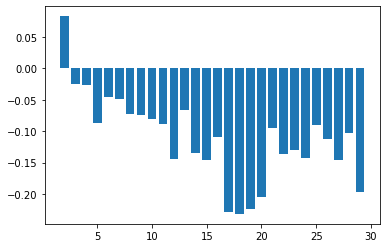

310-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 233ms/step - loss: 0.6917 - val_loss: 0.6861
Epoch 2/100
132/132 [==============================] - 0s 326us/step - loss: 0.6819 - val_loss: 0.6716
Epoch 3/100
132/132 [==============================] - 0s 317us/step - loss: 0.6613 - val_loss: 0.6422
Epoch 4/100
132/132 [==============================] - 0s 318us/step - loss: 0.6210 - val_loss: 0.5891
Epoch 5/100
132/132 [==============================] - 0s 320us/step - loss: 0.5561 - val_loss: 0.5046
Epoch 6/100
132/132 [==============================] - 0s 326us/step - loss: 0.4693 - val_loss: 0.3901
Epoch 7/100
132/132 [==============================] - 0s 320us/step - loss: 0.3644 - val_loss: 0.2668
Epoch 8/100
132/132 [==============================] - 0s 321us/step - loss: 0.2655 - val_loss: 0.1666
Epoch 9/100
132/132 [==============================] - 0s 312us/step - loss: 0.1986 - val_loss: 0.1106
Epoch 10/100
132/

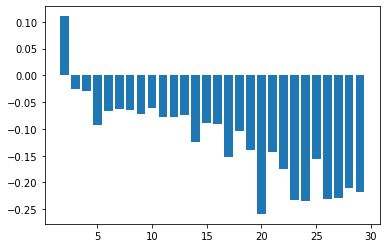

310-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 30s 229ms/step - loss: 0.6912 - val_loss: 0.6855
Epoch 2/100
132/132 [==============================] - 0s 326us/step - loss: 0.6810 - val_loss: 0.6711
Epoch 3/100
132/132 [==============================] - 0s 315us/step - loss: 0.6607 - val_loss: 0.6446
Epoch 4/100
132/132 [==============================] - 0s 315us/step - loss: 0.6254 - val_loss: 0.5998
Epoch 5/100
132/132 [==============================] - 0s 322us/step - loss: 0.5714 - val_loss: 0.5308
Epoch 6/100
132/132 [==============================] - 0s 321us/step - loss: 0.4957 - val_loss: 0.4362
Epoch 7/100
132/132 [==============================] - 0s 324us/step - loss: 0.4029 - val_loss: 0.3245
Epoch 8/100
132/132 [==============================] - 0s 321us/step - loss: 0.3089 - val_loss: 0.2176
Epoch 9/100
132/132 [==============================] - 0s 314us/step - loss: 0.2324 - val_loss: 0.1417
Epoch 10/100
132/

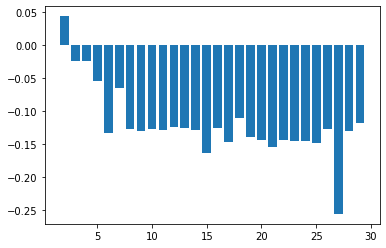

310-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 30s 230ms/step - loss: 0.6911 - val_loss: 0.6855
Epoch 2/100
132/132 [==============================] - 0s 334us/step - loss: 0.6808 - val_loss: 0.6712
Epoch 3/100
132/132 [==============================] - 0s 318us/step - loss: 0.6605 - val_loss: 0.6461
Epoch 4/100
132/132 [==============================] - 0s 323us/step - loss: 0.6278 - val_loss: 0.6067
Epoch 5/100
132/132 [==============================] - 0s 319us/step - loss: 0.5816 - val_loss: 0.5506
Epoch 6/100
132/132 [==============================] - 0s 318us/step - loss: 0.5190 - val_loss: 0.4774
Epoch 7/100
132/132 [==============================] - 0s 316us/step - loss: 0.4454 - val_loss: 0.3910
Epoch 8/100
132/132 [==============================] - 0s 316us/step - loss: 0.3618 - val_loss: 0.3009
Epoch 9/100
132/132 [==============================] - 0s 318us/step - loss: 0.2811 - val_loss: 0.2185
Epoch 10/100
132/

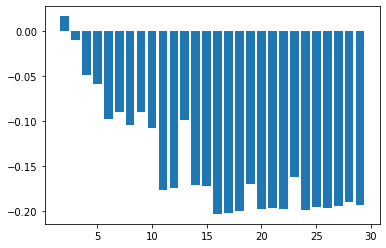

300-290dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 30s 230ms/step - loss: 0.6884 - val_loss: 0.6727
Epoch 2/100
132/132 [==============================] - 0s 340us/step - loss: 0.6600 - val_loss: 0.6205
Epoch 3/100
132/132 [==============================] - 0s 324us/step - loss: 0.5894 - val_loss: 0.5050
Epoch 4/100
132/132 [==============================] - 0s 323us/step - loss: 0.4642 - val_loss: 0.3230
Epoch 5/100
132/132 [==============================] - 0s 324us/step - loss: 0.3119 - val_loss: 0.1576
Epoch 6/100
132/132 [==============================] - 0s 326us/step - loss: 0.2023 - val_loss: 0.0955
Epoch 7/100
132/132 [==============================] - 0s 321us/step - loss: 0.1746 - val_loss: 0.0904
Epoch 8/100
132/132 [==============================] - 0s 325us/step - loss: 0.1534 - val_loss: 0.0957
(165, 290)


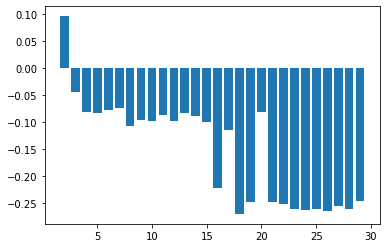

300-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 232ms/step - loss: 0.6883 - val_loss: 0.6733
Epoch 2/100
132/132 [==============================] - 0s 331us/step - loss: 0.6613 - val_loss: 0.6240
Epoch 3/100
132/132 [==============================] - 0s 324us/step - loss: 0.5960 - val_loss: 0.5145
Epoch 4/100
132/132 [==============================] - 0s 323us/step - loss: 0.4734 - val_loss: 0.3377
Epoch 5/100
132/132 [==============================] - 0s 328us/step - loss: 0.3227 - val_loss: 0.1689
Epoch 6/100
132/132 [==============================] - 0s 323us/step - loss: 0.2135 - val_loss: 0.0985
Epoch 7/100
132/132 [==============================] - 0s 323us/step - loss: 0.1764 - val_loss: 0.0905
Epoch 8/100
132/132 [==============================] - 0s 329us/step - loss: 0.1556 - val_loss: 0.0944
(165, 280)


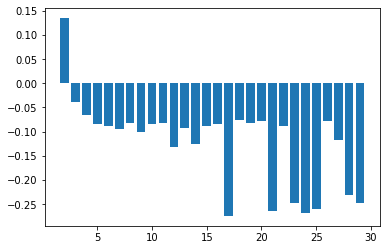

300-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 232ms/step - loss: 0.6888 - val_loss: 0.6731
Epoch 2/100
132/132 [==============================] - 0s 335us/step - loss: 0.6618 - val_loss: 0.6229
Epoch 3/100
132/132 [==============================] - 0s 326us/step - loss: 0.5953 - val_loss: 0.5158
Epoch 4/100
132/132 [==============================] - 0s 334us/step - loss: 0.4712 - val_loss: 0.3451
Epoch 5/100
132/132 [==============================] - 0s 327us/step - loss: 0.3261 - val_loss: 0.1760
Epoch 6/100
132/132 [==============================] - 0s 321us/step - loss: 0.2236 - val_loss: 0.0991
Epoch 7/100
132/132 [==============================] - 0s 322us/step - loss: 0.1832 - val_loss: 0.0895
Epoch 8/100
132/132 [==============================] - 0s 330us/step - loss: 0.1619 - val_loss: 0.0925
(165, 270)


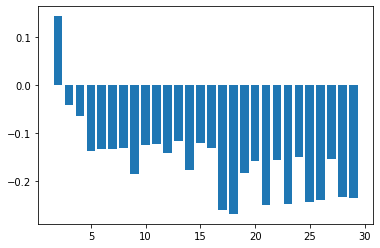

300-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 232ms/step - loss: 0.6879 - val_loss: 0.6718
Epoch 2/100
132/132 [==============================] - 0s 330us/step - loss: 0.6593 - val_loss: 0.6207
Epoch 3/100
132/132 [==============================] - 0s 321us/step - loss: 0.5921 - val_loss: 0.5114
Epoch 4/100
132/132 [==============================] - 0s 322us/step - loss: 0.4654 - val_loss: 0.3386
Epoch 5/100
132/132 [==============================] - 0s 319us/step - loss: 0.3147 - val_loss: 0.1707
Epoch 6/100
132/132 [==============================] - 0s 323us/step - loss: 0.2023 - val_loss: 0.0992
Epoch 7/100
132/132 [==============================] - 0s 325us/step - loss: 0.1762 - val_loss: 0.0913
Epoch 8/100
132/132 [==============================] - 0s 322us/step - loss: 0.1627 - val_loss: 0.0974
(165, 260)


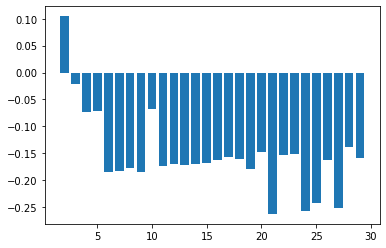

300-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 233ms/step - loss: 0.6885 - val_loss: 0.6731
Epoch 2/100
132/132 [==============================] - 0s 330us/step - loss: 0.6610 - val_loss: 0.6262
Epoch 3/100
132/132 [==============================] - 0s 325us/step - loss: 0.5978 - val_loss: 0.5248
Epoch 4/100
132/132 [==============================] - 0s 323us/step - loss: 0.4827 - val_loss: 0.3585
Epoch 5/100
132/132 [==============================] - 0s 325us/step - loss: 0.3418 - val_loss: 0.1872
Epoch 6/100
132/132 [==============================] - 0s 327us/step - loss: 0.2249 - val_loss: 0.1026
Epoch 7/100
132/132 [==============================] - 0s 322us/step - loss: 0.1819 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 325us/step - loss: 0.1660 - val_loss: 0.0931
(165, 250)


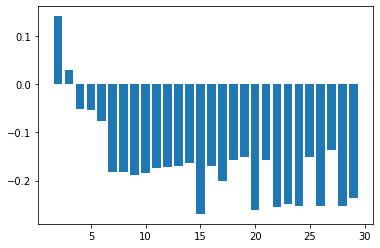

300-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 234ms/step - loss: 0.6888 - val_loss: 0.6747
Epoch 2/100
132/132 [==============================] - 0s 338us/step - loss: 0.6626 - val_loss: 0.6317
Epoch 3/100
132/132 [==============================] - 0s 330us/step - loss: 0.6053 - val_loss: 0.5388
Epoch 4/100
132/132 [==============================] - 0s 326us/step - loss: 0.4950 - val_loss: 0.3823
Epoch 5/100
132/132 [==============================] - 0s 328us/step - loss: 0.3502 - val_loss: 0.2069
Epoch 6/100
132/132 [==============================] - 0s 325us/step - loss: 0.2269 - val_loss: 0.1085
Epoch 7/100
132/132 [==============================] - 0s 324us/step - loss: 0.1831 - val_loss: 0.0892
Epoch 8/100
132/132 [==============================] - 0s 321us/step - loss: 0.1649 - val_loss: 0.0929
(165, 240)


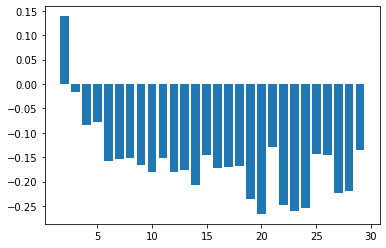

300-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 234ms/step - loss: 0.6885 - val_loss: 0.6721
Epoch 2/100
132/132 [==============================] - 0s 340us/step - loss: 0.6600 - val_loss: 0.6244
Epoch 3/100
132/132 [==============================] - 0s 324us/step - loss: 0.5971 - val_loss: 0.5247
Epoch 4/100
132/132 [==============================] - 0s 323us/step - loss: 0.4813 - val_loss: 0.3641
Epoch 5/100
132/132 [==============================] - 0s 323us/step - loss: 0.3464 - val_loss: 0.1975
Epoch 6/100
132/132 [==============================] - 0s 322us/step - loss: 0.2261 - val_loss: 0.1101
Epoch 7/100
132/132 [==============================] - 0s 329us/step - loss: 0.1837 - val_loss: 0.0899
Epoch 8/100
132/132 [==============================] - 0s 326us/step - loss: 0.1641 - val_loss: 0.0919
(165, 230)


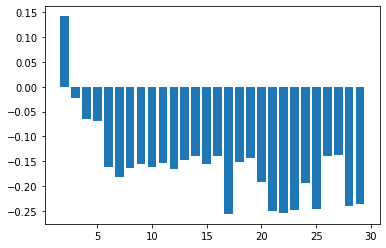

300-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 236ms/step - loss: 0.6889 - val_loss: 0.6738
Epoch 2/100
132/132 [==============================] - 0s 341us/step - loss: 0.6630 - val_loss: 0.6277
Epoch 3/100
132/132 [==============================] - 0s 331us/step - loss: 0.6017 - val_loss: 0.5273
Epoch 4/100
132/132 [==============================] - 0s 325us/step - loss: 0.4841 - val_loss: 0.3615
Epoch 5/100
132/132 [==============================] - 0s 326us/step - loss: 0.3415 - val_loss: 0.1865
Epoch 6/100
132/132 [==============================] - 0s 328us/step - loss: 0.2224 - val_loss: 0.1008
Epoch 7/100
132/132 [==============================] - 0s 325us/step - loss: 0.1838 - val_loss: 0.0871
Epoch 8/100
132/132 [==============================] - 0s 326us/step - loss: 0.1622 - val_loss: 0.0914
(165, 220)


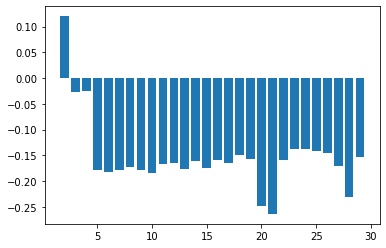

300-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 31s 237ms/step - loss: 0.6874 - val_loss: 0.6715
Epoch 2/100
132/132 [==============================] - 0s 338us/step - loss: 0.6595 - val_loss: 0.6217
Epoch 3/100
132/132 [==============================] - 0s 324us/step - loss: 0.5956 - val_loss: 0.5179
Epoch 4/100
132/132 [==============================] - 0s 339us/step - loss: 0.4866 - val_loss: 0.3550
Epoch 5/100
132/132 [==============================] - 0s 329us/step - loss: 0.3441 - val_loss: 0.1932
Epoch 6/100
132/132 [==============================] - 0s 325us/step - loss: 0.2245 - val_loss: 0.1080
Epoch 7/100
132/132 [==============================] - 0s 335us/step - loss: 0.1733 - val_loss: 0.0892
Epoch 8/100
132/132 [==============================] - 0s 325us/step - loss: 0.1530 - val_loss: 0.0915
(165, 210)


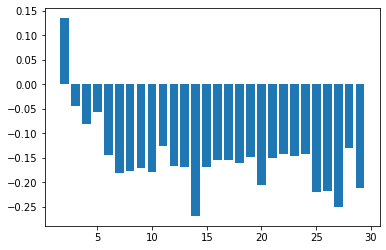

300-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 239ms/step - loss: 0.6894 - val_loss: 0.6762
Epoch 2/100
132/132 [==============================] - 0s 337us/step - loss: 0.6669 - val_loss: 0.6369
Epoch 3/100
132/132 [==============================] - 0s 328us/step - loss: 0.6141 - val_loss: 0.5522
Epoch 4/100
132/132 [==============================] - 0s 331us/step - loss: 0.5102 - val_loss: 0.4064
Epoch 5/100
132/132 [==============================] - 0s 331us/step - loss: 0.3712 - val_loss: 0.2327
Epoch 6/100
132/132 [==============================] - 0s 327us/step - loss: 0.2363 - val_loss: 0.1185
Epoch 7/100
132/132 [==============================] - 0s 325us/step - loss: 0.1882 - val_loss: 0.0890
Epoch 8/100
132/132 [==============================] - 0s 324us/step - loss: 0.1664 - val_loss: 0.0909
(165, 200)


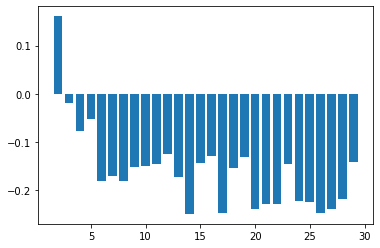

300-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 239ms/step - loss: 0.6901 - val_loss: 0.6780
Epoch 2/100
132/132 [==============================] - 0s 339us/step - loss: 0.6695 - val_loss: 0.6434
Epoch 3/100
132/132 [==============================] - 0s 326us/step - loss: 0.6230 - val_loss: 0.5677
Epoch 4/100
132/132 [==============================] - 0s 339us/step - loss: 0.5319 - val_loss: 0.4332
Epoch 5/100
132/132 [==============================] - 0s 332us/step - loss: 0.3948 - val_loss: 0.2598
Epoch 6/100
132/132 [==============================] - 0s 331us/step - loss: 0.2625 - val_loss: 0.1312
Epoch 7/100
132/132 [==============================] - 0s 328us/step - loss: 0.1921 - val_loss: 0.0909
Epoch 8/100
132/132 [==============================] - 0s 326us/step - loss: 0.1752 - val_loss: 0.0903
Epoch 9/100
132/132 [==============================] - 0s 323us/step - loss: 0.1526 - val_loss: 0.0948
(165, 190)


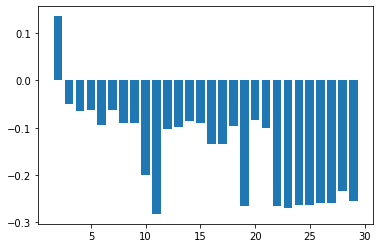

300-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 240ms/step - loss: 0.6893 - val_loss: 0.6776
Epoch 2/100
132/132 [==============================] - 0s 340us/step - loss: 0.6670 - val_loss: 0.6418
Epoch 3/100
132/132 [==============================] - 0s 327us/step - loss: 0.6167 - val_loss: 0.5634
Epoch 4/100
132/132 [==============================] - 0s 330us/step - loss: 0.5253 - val_loss: 0.4261
Epoch 5/100
132/132 [==============================] - 0s 324us/step - loss: 0.3834 - val_loss: 0.2558
Epoch 6/100
132/132 [==============================] - 0s 330us/step - loss: 0.2528 - val_loss: 0.1311
Epoch 7/100
132/132 [==============================] - 0s 327us/step - loss: 0.1903 - val_loss: 0.0913
Epoch 8/100
132/132 [==============================] - 0s 328us/step - loss: 0.1691 - val_loss: 0.0892
Epoch 9/100
132/132 [==============================] - 0s 329us/step - loss: 0.1463 - val_loss: 0.0914
(165, 180)


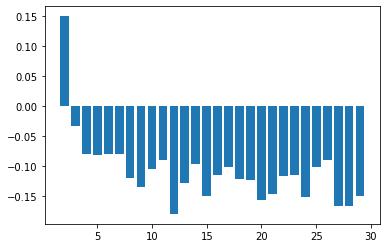

300-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 239ms/step - loss: 0.6885 - val_loss: 0.6742
Epoch 2/100
132/132 [==============================] - 0s 343us/step - loss: 0.6639 - val_loss: 0.6335
Epoch 3/100
132/132 [==============================] - 0s 331us/step - loss: 0.6128 - val_loss: 0.5485
Epoch 4/100
132/132 [==============================] - 0s 330us/step - loss: 0.5094 - val_loss: 0.4050
Epoch 5/100
132/132 [==============================] - 0s 329us/step - loss: 0.3726 - val_loss: 0.2354
Epoch 6/100
132/132 [==============================] - 0s 329us/step - loss: 0.2366 - val_loss: 0.1237
Epoch 7/100
132/132 [==============================] - 0s 332us/step - loss: 0.1851 - val_loss: 0.0915
Epoch 8/100
132/132 [==============================] - 0s 327us/step - loss: 0.1676 - val_loss: 0.0923
(165, 170)


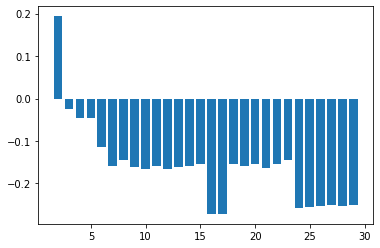

300-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 244ms/step - loss: 0.6882 - val_loss: 0.6739
Epoch 2/100
132/132 [==============================] - 0s 342us/step - loss: 0.6636 - val_loss: 0.6334
Epoch 3/100
132/132 [==============================] - 0s 330us/step - loss: 0.6097 - val_loss: 0.5507
Epoch 4/100
132/132 [==============================] - 0s 328us/step - loss: 0.5129 - val_loss: 0.4130
Epoch 5/100
132/132 [==============================] - 0s 330us/step - loss: 0.3790 - val_loss: 0.2460
Epoch 6/100
132/132 [==============================] - 0s 330us/step - loss: 0.2546 - val_loss: 0.1278
Epoch 7/100
132/132 [==============================] - 0s 335us/step - loss: 0.1864 - val_loss: 0.0909
Epoch 8/100
132/132 [==============================] - 0s 338us/step - loss: 0.1642 - val_loss: 0.0895
Epoch 9/100
132/132 [==============================] - 0s 332us/step - loss: 0.1463 - val_loss: 0.0926
(165, 160)


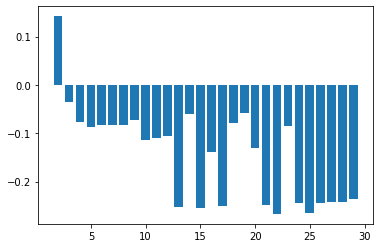

300-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 242ms/step - loss: 0.6896 - val_loss: 0.6775
Epoch 2/100
132/132 [==============================] - 0s 346us/step - loss: 0.6684 - val_loss: 0.6432
Epoch 3/100
132/132 [==============================] - 0s 329us/step - loss: 0.6218 - val_loss: 0.5703
Epoch 4/100
132/132 [==============================] - 0s 328us/step - loss: 0.5327 - val_loss: 0.4425
Epoch 5/100
132/132 [==============================] - 0s 328us/step - loss: 0.4054 - val_loss: 0.2769
Epoch 6/100
132/132 [==============================] - 0s 329us/step - loss: 0.2644 - val_loss: 0.1462
Epoch 7/100
132/132 [==============================] - 0s 333us/step - loss: 0.1968 - val_loss: 0.0944
Epoch 8/100
132/132 [==============================] - 0s 330us/step - loss: 0.1745 - val_loss: 0.0897
Epoch 9/100
132/132 [==============================] - 0s 329us/step - loss: 0.1542 - val_loss: 0.0924
(165, 150)


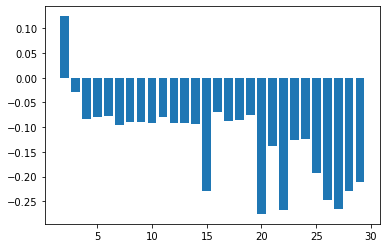

300-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 245ms/step - loss: 0.6894 - val_loss: 0.6776
Epoch 2/100
132/132 [==============================] - 0s 342us/step - loss: 0.6688 - val_loss: 0.6436
Epoch 3/100
132/132 [==============================] - 0s 336us/step - loss: 0.6230 - val_loss: 0.5729
Epoch 4/100
132/132 [==============================] - 0s 335us/step - loss: 0.5360 - val_loss: 0.4509
Epoch 5/100
132/132 [==============================] - 0s 335us/step - loss: 0.4129 - val_loss: 0.2909
Epoch 6/100
132/132 [==============================] - 0s 327us/step - loss: 0.2816 - val_loss: 0.1565
Epoch 7/100
132/132 [==============================] - 0s 335us/step - loss: 0.2007 - val_loss: 0.0973
Epoch 8/100
132/132 [==============================] - 0s 326us/step - loss: 0.1735 - val_loss: 0.0878
Epoch 9/100
132/132 [==============================] - 0s 330us/step - loss: 0.1563 - val_loss: 0.0901
(165, 140)


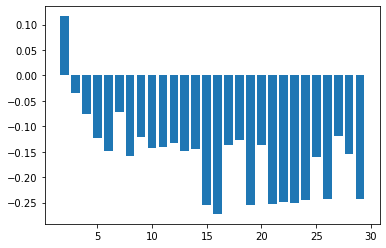

300-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 245ms/step - loss: 0.6885 - val_loss: 0.6755
Epoch 2/100
132/132 [==============================] - 0s 343us/step - loss: 0.6662 - val_loss: 0.6394
Epoch 3/100
132/132 [==============================] - 0s 336us/step - loss: 0.6161 - val_loss: 0.5647
Epoch 4/100
132/132 [==============================] - 0s 328us/step - loss: 0.5220 - val_loss: 0.4374
Epoch 5/100
132/132 [==============================] - 0s 328us/step - loss: 0.4020 - val_loss: 0.2764
Epoch 6/100
132/132 [==============================] - 0s 332us/step - loss: 0.2803 - val_loss: 0.1507
Epoch 7/100
132/132 [==============================] - 0s 334us/step - loss: 0.1984 - val_loss: 0.0988
Epoch 8/100
132/132 [==============================] - 0s 351us/step - loss: 0.1676 - val_loss: 0.0871
Epoch 9/100
132/132 [==============================] - 0s 333us/step - loss: 0.1461 - val_loss: 0.0884
(165, 130)


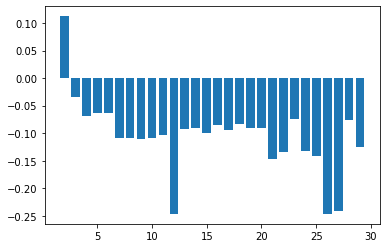

300-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 245ms/step - loss: 0.6877 - val_loss: 0.6735
Epoch 2/100
132/132 [==============================] - 0s 343us/step - loss: 0.6619 - val_loss: 0.6347
Epoch 3/100
132/132 [==============================] - 0s 339us/step - loss: 0.6117 - val_loss: 0.5582
Epoch 4/100
132/132 [==============================] - 0s 337us/step - loss: 0.5194 - val_loss: 0.4333
Epoch 5/100
132/132 [==============================] - 0s 333us/step - loss: 0.3974 - val_loss: 0.2769
Epoch 6/100
132/132 [==============================] - 0s 334us/step - loss: 0.2693 - val_loss: 0.1531
Epoch 7/100
132/132 [==============================] - 0s 336us/step - loss: 0.1932 - val_loss: 0.0986
Epoch 8/100
132/132 [==============================] - 0s 337us/step - loss: 0.1604 - val_loss: 0.0878
Epoch 9/100
132/132 [==============================] - 0s 334us/step - loss: 0.1428 - val_loss: 0.0893
(165, 120)


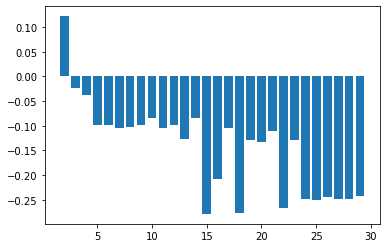

300-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 32s 246ms/step - loss: 0.6876 - val_loss: 0.6746
Epoch 2/100
132/132 [==============================] - 0s 348us/step - loss: 0.6640 - val_loss: 0.6374
Epoch 3/100
132/132 [==============================] - 0s 336us/step - loss: 0.6155 - val_loss: 0.5634
Epoch 4/100
132/132 [==============================] - 0s 336us/step - loss: 0.5266 - val_loss: 0.4412
Epoch 5/100
132/132 [==============================] - 0s 335us/step - loss: 0.4022 - val_loss: 0.2859
Epoch 6/100
132/132 [==============================] - 0s 330us/step - loss: 0.2783 - val_loss: 0.1550
Epoch 7/100
132/132 [==============================] - 0s 339us/step - loss: 0.2023 - val_loss: 0.0961
Epoch 8/100
132/132 [==============================] - 0s 333us/step - loss: 0.1677 - val_loss: 0.0857
Epoch 9/100
132/132 [==============================] - 0s 335us/step - loss: 0.1483 - val_loss: 0.0874
(165, 110)


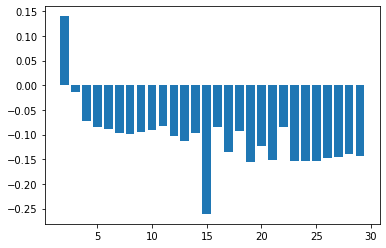

300-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 33s 248ms/step - loss: 0.6906 - val_loss: 0.6798
Epoch 2/100
132/132 [==============================] - 0s 351us/step - loss: 0.6729 - val_loss: 0.6517
Epoch 3/100
132/132 [==============================] - 0s 338us/step - loss: 0.6356 - val_loss: 0.5943
Epoch 4/100
132/132 [==============================] - 0s 332us/step - loss: 0.5662 - val_loss: 0.4924
Epoch 5/100
132/132 [==============================] - 0s 335us/step - loss: 0.4516 - val_loss: 0.3474
Epoch 6/100
132/132 [==============================] - 0s 337us/step - loss: 0.3176 - val_loss: 0.1991
Epoch 7/100
132/132 [==============================] - 0s 333us/step - loss: 0.2189 - val_loss: 0.1113
Epoch 8/100
132/132 [==============================] - 0s 333us/step - loss: 0.1677 - val_loss: 0.0888
Epoch 9/100
132/132 [==============================] - 0s 336us/step - loss: 0.1450 - val_loss: 0.0887
Epoch 10/100
132

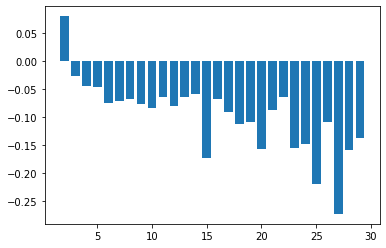

300-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 33s 250ms/step - loss: 0.6911 - val_loss: 0.6827
Epoch 2/100
132/132 [==============================] - 0s 347us/step - loss: 0.6772 - val_loss: 0.6610
Epoch 3/100
132/132 [==============================] - 0s 343us/step - loss: 0.6469 - val_loss: 0.6162
Epoch 4/100
132/132 [==============================] - 0s 332us/step - loss: 0.5883 - val_loss: 0.5346
Epoch 5/100
132/132 [==============================] - 0s 340us/step - loss: 0.4959 - val_loss: 0.4105
Epoch 6/100
132/132 [==============================] - 0s 335us/step - loss: 0.3762 - val_loss: 0.2644
Epoch 7/100
132/132 [==============================] - 0s 338us/step - loss: 0.2684 - val_loss: 0.1495
Epoch 8/100
132/132 [==============================] - 0s 337us/step - loss: 0.1999 - val_loss: 0.0989
Epoch 9/100
132/132 [==============================] - 0s 337us/step - loss: 0.1692 - val_loss: 0.0876
Epoch 10/100
132/

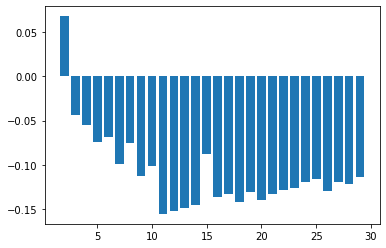

300-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 33s 252ms/step - loss: 0.6906 - val_loss: 0.6800
Epoch 2/100
132/132 [==============================] - 0s 346us/step - loss: 0.6735 - val_loss: 0.6539
Epoch 3/100
132/132 [==============================] - 0s 336us/step - loss: 0.6401 - val_loss: 0.6021
Epoch 4/100
132/132 [==============================] - 0s 333us/step - loss: 0.5772 - val_loss: 0.5118
Epoch 5/100
132/132 [==============================] - 0s 336us/step - loss: 0.4784 - val_loss: 0.3821
Epoch 6/100
132/132 [==============================] - 0s 340us/step - loss: 0.3627 - val_loss: 0.2410
Epoch 7/100
132/132 [==============================] - 0s 344us/step - loss: 0.2454 - val_loss: 0.1416
Epoch 8/100
132/132 [==============================] - 0s 338us/step - loss: 0.1819 - val_loss: 0.0980
Epoch 9/100
132/132 [==============================] - 0s 335us/step - loss: 0.1572 - val_loss: 0.0895
Epoch 10/100
132/

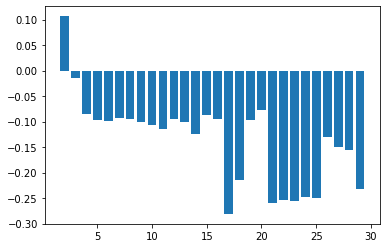

300-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 33s 250ms/step - loss: 0.6901 - val_loss: 0.6811
Epoch 2/100
132/132 [==============================] - 0s 343us/step - loss: 0.6743 - val_loss: 0.6578
Epoch 3/100
132/132 [==============================] - 0s 340us/step - loss: 0.6423 - val_loss: 0.6123
Epoch 4/100
132/132 [==============================] - 0s 333us/step - loss: 0.5857 - val_loss: 0.5330
Epoch 5/100
132/132 [==============================] - 0s 335us/step - loss: 0.4935 - val_loss: 0.4161
Epoch 6/100
132/132 [==============================] - 0s 345us/step - loss: 0.3749 - val_loss: 0.2767
Epoch 7/100
132/132 [==============================] - 0s 337us/step - loss: 0.2650 - val_loss: 0.1588
Epoch 8/100
132/132 [==============================] - 0s 344us/step - loss: 0.1972 - val_loss: 0.1007
Epoch 9/100
132/132 [==============================] - 0s 333us/step - loss: 0.1641 - val_loss: 0.0859
Epoch 10/100
132/

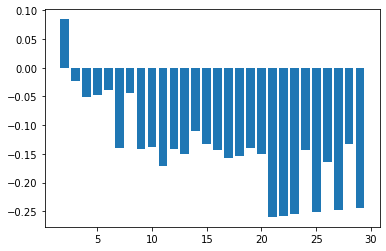

300-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 254ms/step - loss: 0.6902 - val_loss: 0.6816
Epoch 2/100
132/132 [==============================] - 0s 353us/step - loss: 0.6745 - val_loss: 0.6587
Epoch 3/100
132/132 [==============================] - 0s 337us/step - loss: 0.6440 - val_loss: 0.6136
Epoch 4/100
132/132 [==============================] - 0s 334us/step - loss: 0.5866 - val_loss: 0.5354
Epoch 5/100
132/132 [==============================] - 0s 341us/step - loss: 0.4971 - val_loss: 0.4191
Epoch 6/100
132/132 [==============================] - 0s 336us/step - loss: 0.3884 - val_loss: 0.2822
Epoch 7/100
132/132 [==============================] - 0s 334us/step - loss: 0.2764 - val_loss: 0.1682
Epoch 8/100
132/132 [==============================] - 0s 349us/step - loss: 0.2020 - val_loss: 0.1075
Epoch 9/100
132/132 [==============================] - 0s 341us/step - loss: 0.1669 - val_loss: 0.0895
Epoch 10/100
132/

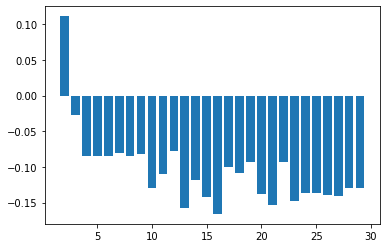

300-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 255ms/step - loss: 0.6903 - val_loss: 0.6824
Epoch 2/100
132/132 [==============================] - 0s 345us/step - loss: 0.6745 - val_loss: 0.6603
Epoch 3/100
132/132 [==============================] - 0s 340us/step - loss: 0.6425 - val_loss: 0.6157
Epoch 4/100
132/132 [==============================] - 0s 340us/step - loss: 0.5846 - val_loss: 0.5367
Epoch 5/100
132/132 [==============================] - 0s 344us/step - loss: 0.4936 - val_loss: 0.4211
Epoch 6/100
132/132 [==============================] - 0s 340us/step - loss: 0.3809 - val_loss: 0.2854
Epoch 7/100
132/132 [==============================] - 0s 353us/step - loss: 0.2714 - val_loss: 0.1711
Epoch 8/100
132/132 [==============================] - 0s 340us/step - loss: 0.2013 - val_loss: 0.1104
Epoch 9/100
132/132 [==============================] - 0s 338us/step - loss: 0.1639 - val_loss: 0.0916
Epoch 10/100
132/

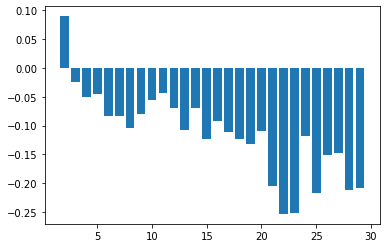

300-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 254ms/step - loss: 0.6907 - val_loss: 0.6836
Epoch 2/100
132/132 [==============================] - 0s 347us/step - loss: 0.6784 - val_loss: 0.6663
Epoch 3/100
132/132 [==============================] - 0s 340us/step - loss: 0.6548 - val_loss: 0.6343
Epoch 4/100
132/132 [==============================] - 0s 342us/step - loss: 0.6138 - val_loss: 0.5800
Epoch 5/100
132/132 [==============================] - 0s 342us/step - loss: 0.5487 - val_loss: 0.4961
Epoch 6/100
132/132 [==============================] - 0s 345us/step - loss: 0.4600 - val_loss: 0.3824
Epoch 7/100
132/132 [==============================] - 0s 342us/step - loss: 0.3548 - val_loss: 0.2563
Epoch 8/100
132/132 [==============================] - 0s 343us/step - loss: 0.2631 - val_loss: 0.1555
Epoch 9/100
132/132 [==============================] - 0s 337us/step - loss: 0.1993 - val_loss: 0.1065
Epoch 10/100
132/

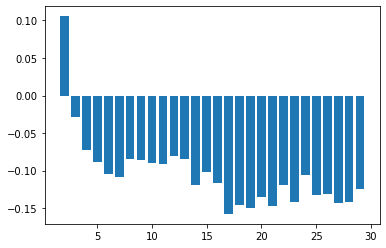

300-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 254ms/step - loss: 0.6901 - val_loss: 0.6819
Epoch 2/100
132/132 [==============================] - 0s 349us/step - loss: 0.6759 - val_loss: 0.6622
Epoch 3/100
132/132 [==============================] - 0s 340us/step - loss: 0.6499 - val_loss: 0.6261
Epoch 4/100
132/132 [==============================] - 0s 340us/step - loss: 0.6052 - val_loss: 0.5658
Epoch 5/100
132/132 [==============================] - 0s 340us/step - loss: 0.5344 - val_loss: 0.4767
Epoch 6/100
132/132 [==============================] - 0s 341us/step - loss: 0.4459 - val_loss: 0.3626
Epoch 7/100
132/132 [==============================] - 0s 344us/step - loss: 0.3428 - val_loss: 0.2441
Epoch 8/100
132/132 [==============================] - 0s 338us/step - loss: 0.2467 - val_loss: 0.1551
Epoch 9/100
132/132 [==============================] - 0s 349us/step - loss: 0.1893 - val_loss: 0.1059
Epoch 10/100
132/

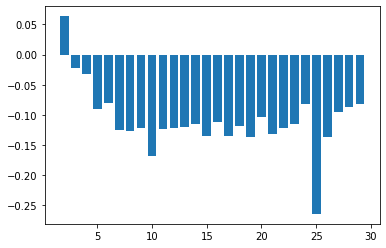

300-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 256ms/step - loss: 0.6905 - val_loss: 0.6842
Epoch 2/100
132/132 [==============================] - 0s 355us/step - loss: 0.6786 - val_loss: 0.6674
Epoch 3/100
132/132 [==============================] - 0s 336us/step - loss: 0.6531 - val_loss: 0.6370
Epoch 4/100
132/132 [==============================] - 0s 341us/step - loss: 0.6137 - val_loss: 0.5877
Epoch 5/100
132/132 [==============================] - 0s 339us/step - loss: 0.5536 - val_loss: 0.5153
Epoch 6/100
132/132 [==============================] - 0s 340us/step - loss: 0.4735 - val_loss: 0.4209
Epoch 7/100
132/132 [==============================] - 0s 345us/step - loss: 0.3827 - val_loss: 0.3136
Epoch 8/100
132/132 [==============================] - 0s 341us/step - loss: 0.2927 - val_loss: 0.2141
Epoch 9/100
132/132 [==============================] - 0s 339us/step - loss: 0.2244 - val_loss: 0.1430
Epoch 10/100
132/

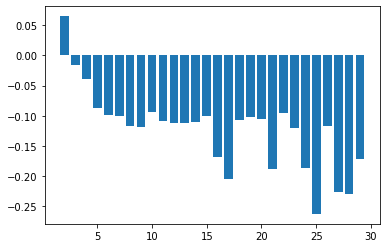

300-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 257ms/step - loss: 0.6925 - val_loss: 0.6899
Epoch 2/100
132/132 [==============================] - 0s 352us/step - loss: 0.6886 - val_loss: 0.6836
Epoch 3/100
132/132 [==============================] - 0s 348us/step - loss: 0.6796 - val_loss: 0.6716
Epoch 4/100
132/132 [==============================] - 0s 346us/step - loss: 0.6623 - val_loss: 0.6501
Epoch 5/100
132/132 [==============================] - 0s 343us/step - loss: 0.6338 - val_loss: 0.6149
Epoch 6/100
132/132 [==============================] - 0s 347us/step - loss: 0.5884 - val_loss: 0.5623
Epoch 7/100
132/132 [==============================] - 0s 344us/step - loss: 0.5292 - val_loss: 0.4900
Epoch 8/100
132/132 [==============================] - 0s 338us/step - loss: 0.4522 - val_loss: 0.4015
Epoch 9/100
132/132 [==============================] - 0s 341us/step - loss: 0.3680 - val_loss: 0.3048
Epoch 10/100
132/

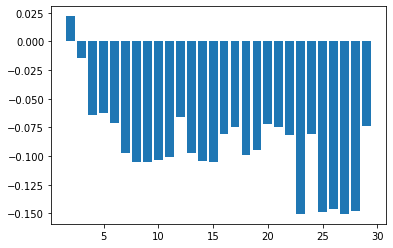

290-280dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 258ms/step - loss: 0.6871 - val_loss: 0.6697
Epoch 2/100
132/132 [==============================] - 0s 357us/step - loss: 0.6568 - val_loss: 0.6166
Epoch 3/100
132/132 [==============================] - 0s 355us/step - loss: 0.5869 - val_loss: 0.5044
Epoch 4/100
132/132 [==============================] - 0s 354us/step - loss: 0.4624 - val_loss: 0.3316
Epoch 5/100
132/132 [==============================] - 0s 347us/step - loss: 0.3144 - val_loss: 0.1691
Epoch 6/100
132/132 [==============================] - 0s 348us/step - loss: 0.2091 - val_loss: 0.0999
Epoch 7/100
132/132 [==============================] - 0s 347us/step - loss: 0.1721 - val_loss: 0.0919
Epoch 8/100
132/132 [==============================] - 0s 347us/step - loss: 0.1559 - val_loss: 0.0957
(165, 280)


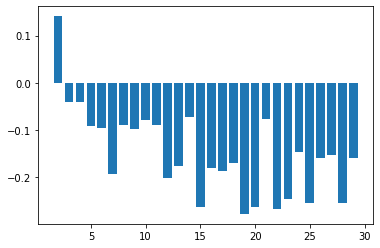

290-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 260ms/step - loss: 0.6877 - val_loss: 0.6697
Epoch 2/100
132/132 [==============================] - 0s 360us/step - loss: 0.6562 - val_loss: 0.6142
Epoch 3/100
132/132 [==============================] - 0s 355us/step - loss: 0.5834 - val_loss: 0.4978
Epoch 4/100
132/132 [==============================] - 0s 348us/step - loss: 0.4594 - val_loss: 0.3208
Epoch 5/100
132/132 [==============================] - 0s 350us/step - loss: 0.3030 - val_loss: 0.1592
Epoch 6/100
132/132 [==============================] - 0s 345us/step - loss: 0.2069 - val_loss: 0.0944
Epoch 7/100
132/132 [==============================] - 0s 346us/step - loss: 0.1727 - val_loss: 0.0892
Epoch 8/100
132/132 [==============================] - 0s 345us/step - loss: 0.1505 - val_loss: 0.0937
(165, 270)


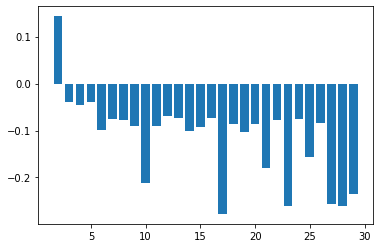

290-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 261ms/step - loss: 0.6875 - val_loss: 0.6705
Epoch 2/100
132/132 [==============================] - 0s 354us/step - loss: 0.6566 - val_loss: 0.6193
Epoch 3/100
132/132 [==============================] - 0s 350us/step - loss: 0.5889 - val_loss: 0.5121
Epoch 4/100
132/132 [==============================] - 0s 355us/step - loss: 0.4640 - val_loss: 0.3427
Epoch 5/100
132/132 [==============================] - 0s 344us/step - loss: 0.3149 - val_loss: 0.1764
Epoch 6/100
132/132 [==============================] - 0s 345us/step - loss: 0.2208 - val_loss: 0.0999
Epoch 7/100
132/132 [==============================] - 0s 348us/step - loss: 0.1848 - val_loss: 0.0900
Epoch 8/100
132/132 [==============================] - 0s 346us/step - loss: 0.1585 - val_loss: 0.0925
(165, 260)


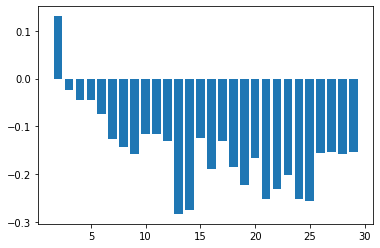

290-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 34s 261ms/step - loss: 0.6892 - val_loss: 0.6754
Epoch 2/100
132/132 [==============================] - 0s 362us/step - loss: 0.6645 - val_loss: 0.6333
Epoch 3/100
132/132 [==============================] - 0s 345us/step - loss: 0.6069 - val_loss: 0.5398
Epoch 4/100
132/132 [==============================] - 0s 344us/step - loss: 0.5012 - val_loss: 0.3828
Epoch 5/100
132/132 [==============================] - 0s 348us/step - loss: 0.3490 - val_loss: 0.2089
Epoch 6/100
132/132 [==============================] - 0s 350us/step - loss: 0.2232 - val_loss: 0.1106
Epoch 7/100
132/132 [==============================] - 0s 344us/step - loss: 0.1788 - val_loss: 0.0911
Epoch 8/100
132/132 [==============================] - 0s 343us/step - loss: 0.1632 - val_loss: 0.0944
(165, 250)


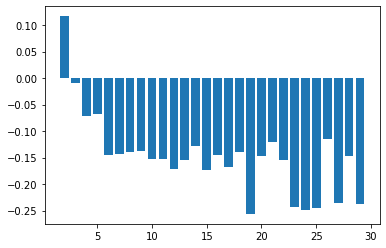

290-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 35s 262ms/step - loss: 0.6898 - val_loss: 0.6759
Epoch 2/100
132/132 [==============================] - 0s 358us/step - loss: 0.6664 - val_loss: 0.6358
Epoch 3/100
132/132 [==============================] - 0s 351us/step - loss: 0.6120 - val_loss: 0.5493
Epoch 4/100
132/132 [==============================] - 0s 355us/step - loss: 0.5097 - val_loss: 0.4002
Epoch 5/100
132/132 [==============================] - 0s 349us/step - loss: 0.3657 - val_loss: 0.2242
Epoch 6/100
132/132 [==============================] - 0s 354us/step - loss: 0.2368 - val_loss: 0.1146
Epoch 7/100
132/132 [==============================] - 0s 359us/step - loss: 0.1886 - val_loss: 0.0884
Epoch 8/100
132/132 [==============================] - 0s 351us/step - loss: 0.1740 - val_loss: 0.0921
(165, 240)


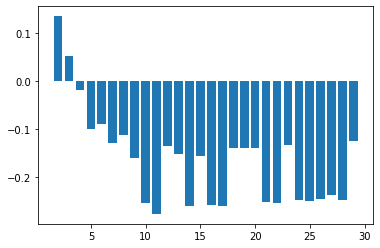

290-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 35s 263ms/step - loss: 0.6879 - val_loss: 0.6727
Epoch 2/100
132/132 [==============================] - 0s 367us/step - loss: 0.6617 - val_loss: 0.6271
Epoch 3/100
132/132 [==============================] - 0s 356us/step - loss: 0.6009 - val_loss: 0.5302
Epoch 4/100
132/132 [==============================] - 0s 349us/step - loss: 0.4907 - val_loss: 0.3718
Epoch 5/100
132/132 [==============================] - 0s 348us/step - loss: 0.3473 - val_loss: 0.2010
Epoch 6/100
132/132 [==============================] - 0s 354us/step - loss: 0.2315 - val_loss: 0.1067
Epoch 7/100
132/132 [==============================] - 0s 354us/step - loss: 0.1819 - val_loss: 0.0873
Epoch 8/100
132/132 [==============================] - 0s 353us/step - loss: 0.1626 - val_loss: 0.0897
(165, 230)


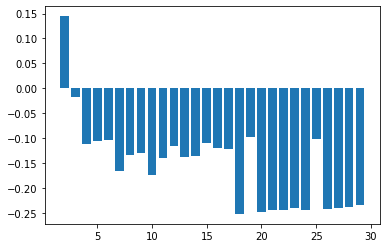

290-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 35s 264ms/step - loss: 0.6897 - val_loss: 0.6786
Epoch 2/100
132/132 [==============================] - 0s 367us/step - loss: 0.6699 - val_loss: 0.6444
Epoch 3/100
132/132 [==============================] - 0s 352us/step - loss: 0.6230 - val_loss: 0.5668
Epoch 4/100
132/132 [==============================] - 0s 348us/step - loss: 0.5297 - val_loss: 0.4261
Epoch 5/100
132/132 [==============================] - 0s 345us/step - loss: 0.3903 - val_loss: 0.2484
Epoch 6/100
132/132 [==============================] - 0s 348us/step - loss: 0.2605 - val_loss: 0.1245
Epoch 7/100
132/132 [==============================] - 0s 353us/step - loss: 0.1928 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 355us/step - loss: 0.1667 - val_loss: 0.0877
Epoch 9/100
132/132 [==============================] - 0s 349us/step - loss: 0.1499 - val_loss: 0.0899
(165, 220)


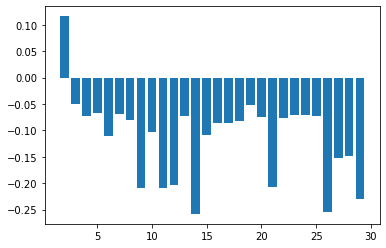

290-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 35s 267ms/step - loss: 0.6881 - val_loss: 0.6728
Epoch 2/100
132/132 [==============================] - 0s 362us/step - loss: 0.6615 - val_loss: 0.6287
Epoch 3/100
132/132 [==============================] - 0s 351us/step - loss: 0.6055 - val_loss: 0.5380
Epoch 4/100
132/132 [==============================] - 0s 351us/step - loss: 0.5019 - val_loss: 0.3892
Epoch 5/100
132/132 [==============================] - 0s 355us/step - loss: 0.3568 - val_loss: 0.2190
Epoch 6/100
132/132 [==============================] - 0s 357us/step - loss: 0.2434 - val_loss: 0.1136
Epoch 7/100
132/132 [==============================] - 0s 355us/step - loss: 0.1847 - val_loss: 0.0898
Epoch 8/100
132/132 [==============================] - 0s 359us/step - loss: 0.1642 - val_loss: 0.0922
(165, 210)


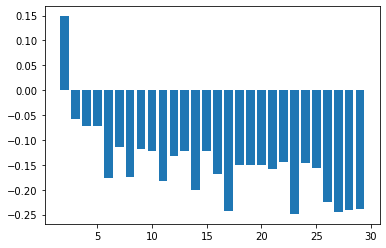

290-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 35s 268ms/step - loss: 0.6889 - val_loss: 0.6751
Epoch 2/100
132/132 [==============================] - 0s 376us/step - loss: 0.6654 - val_loss: 0.6360
Epoch 3/100
132/132 [==============================] - 0s 356us/step - loss: 0.6131 - val_loss: 0.5538
Epoch 4/100
132/132 [==============================] - 0s 354us/step - loss: 0.5151 - val_loss: 0.4132
Epoch 5/100
132/132 [==============================] - 0s 354us/step - loss: 0.3794 - val_loss: 0.2412
Epoch 6/100
132/132 [==============================] - 0s 373us/step - loss: 0.2458 - val_loss: 0.1224
Epoch 7/100
132/132 [==============================] - 0s 361us/step - loss: 0.1790 - val_loss: 0.0879
Epoch 8/100
132/132 [==============================] - 0s 354us/step - loss: 0.1594 - val_loss: 0.0882
(165, 200)


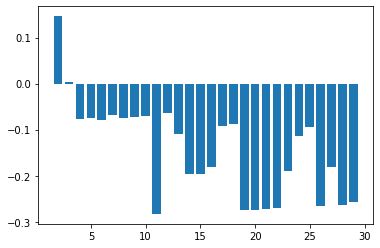

290-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 35s 268ms/step - loss: 0.6878 - val_loss: 0.6727
Epoch 2/100
132/132 [==============================] - 0s 371us/step - loss: 0.6613 - val_loss: 0.6283
Epoch 3/100
132/132 [==============================] - 0s 352us/step - loss: 0.6033 - val_loss: 0.5361
Epoch 4/100
132/132 [==============================] - 0s 348us/step - loss: 0.4955 - val_loss: 0.3867
Epoch 5/100
132/132 [==============================] - 0s 351us/step - loss: 0.3588 - val_loss: 0.2198
Epoch 6/100
132/132 [==============================] - 0s 358us/step - loss: 0.2468 - val_loss: 0.1180
Epoch 7/100
132/132 [==============================] - 0s 354us/step - loss: 0.1925 - val_loss: 0.0910
Epoch 8/100
132/132 [==============================] - 0s 354us/step - loss: 0.1743 - val_loss: 0.0912
(165, 190)


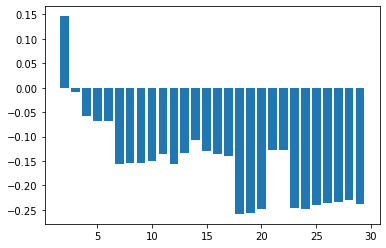

290-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 270ms/step - loss: 0.6896 - val_loss: 0.6769
Epoch 2/100
132/132 [==============================] - 0s 367us/step - loss: 0.6678 - val_loss: 0.6408
Epoch 3/100
132/132 [==============================] - 0s 357us/step - loss: 0.6196 - val_loss: 0.5634
Epoch 4/100
132/132 [==============================] - 0s 360us/step - loss: 0.5298 - val_loss: 0.4287
Epoch 5/100
132/132 [==============================] - 0s 355us/step - loss: 0.3974 - val_loss: 0.2609
Epoch 6/100
132/132 [==============================] - 0s 359us/step - loss: 0.2641 - val_loss: 0.1339
Epoch 7/100
132/132 [==============================] - 0s 361us/step - loss: 0.1922 - val_loss: 0.0905
Epoch 8/100
132/132 [==============================] - 0s 353us/step - loss: 0.1680 - val_loss: 0.0870
Epoch 9/100
132/132 [==============================] - 0s 354us/step - loss: 0.1466 - val_loss: 0.0898
(165, 180)


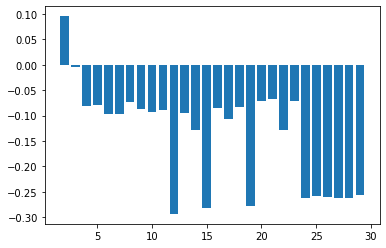

290-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 272ms/step - loss: 0.6890 - val_loss: 0.6764
Epoch 2/100
132/132 [==============================] - 0s 364us/step - loss: 0.6664 - val_loss: 0.6388
Epoch 3/100
132/132 [==============================] - 0s 352us/step - loss: 0.6150 - val_loss: 0.5588
Epoch 4/100
132/132 [==============================] - 0s 355us/step - loss: 0.5235 - val_loss: 0.4226
Epoch 5/100
132/132 [==============================] - 0s 362us/step - loss: 0.3945 - val_loss: 0.2574
Epoch 6/100
132/132 [==============================] - 0s 358us/step - loss: 0.2645 - val_loss: 0.1359
Epoch 7/100
132/132 [==============================] - 0s 353us/step - loss: 0.1936 - val_loss: 0.0939
Epoch 8/100
132/132 [==============================] - 0s 354us/step - loss: 0.1684 - val_loss: 0.0904
Epoch 9/100
132/132 [==============================] - 0s 355us/step - loss: 0.1442 - val_loss: 0.0932
(165, 170)


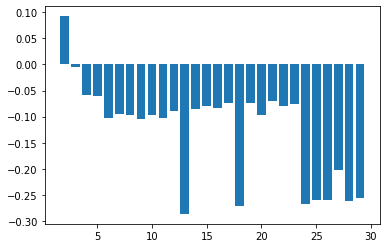

290-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 272ms/step - loss: 0.6897 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 372us/step - loss: 0.6678 - val_loss: 0.6405
Epoch 3/100
132/132 [==============================] - 0s 353us/step - loss: 0.6200 - val_loss: 0.5664
Epoch 4/100
132/132 [==============================] - 0s 351us/step - loss: 0.5324 - val_loss: 0.4385
Epoch 5/100
132/132 [==============================] - 0s 356us/step - loss: 0.4055 - val_loss: 0.2744
Epoch 6/100
132/132 [==============================] - 0s 361us/step - loss: 0.2757 - val_loss: 0.1423
Epoch 7/100
132/132 [==============================] - 0s 363us/step - loss: 0.1943 - val_loss: 0.0905
Epoch 8/100
132/132 [==============================] - 0s 356us/step - loss: 0.1670 - val_loss: 0.0848
Epoch 9/100
132/132 [==============================] - 0s 360us/step - loss: 0.1526 - val_loss: 0.0881
(165, 160)


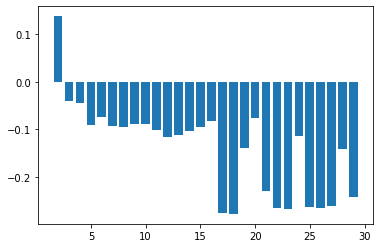

290-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 273ms/step - loss: 0.6896 - val_loss: 0.6773
Epoch 2/100
132/132 [==============================] - 0s 370us/step - loss: 0.6689 - val_loss: 0.6433
Epoch 3/100
132/132 [==============================] - 0s 357us/step - loss: 0.6249 - val_loss: 0.5715
Epoch 4/100
132/132 [==============================] - 0s 356us/step - loss: 0.5364 - val_loss: 0.4447
Epoch 5/100
132/132 [==============================] - 0s 356us/step - loss: 0.4065 - val_loss: 0.2792
Epoch 6/100
132/132 [==============================] - 0s 360us/step - loss: 0.2699 - val_loss: 0.1456
Epoch 7/100
132/132 [==============================] - 0s 352us/step - loss: 0.1927 - val_loss: 0.0946
Epoch 8/100
132/132 [==============================] - 0s 362us/step - loss: 0.1728 - val_loss: 0.0894
Epoch 9/100
132/132 [==============================] - 0s 359us/step - loss: 0.1543 - val_loss: 0.0926
(165, 150)


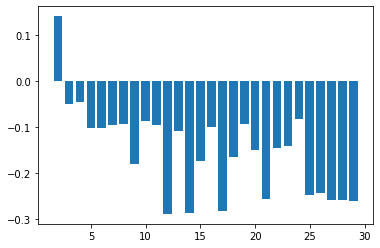

290-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 273ms/step - loss: 0.6895 - val_loss: 0.6781
Epoch 2/100
132/132 [==============================] - 0s 370us/step - loss: 0.6687 - val_loss: 0.6454
Epoch 3/100
132/132 [==============================] - 0s 359us/step - loss: 0.6257 - val_loss: 0.5772
Epoch 4/100
132/132 [==============================] - 0s 355us/step - loss: 0.5408 - val_loss: 0.4597
Epoch 5/100
132/132 [==============================] - 0s 365us/step - loss: 0.4164 - val_loss: 0.3039
Epoch 6/100
132/132 [==============================] - 0s 363us/step - loss: 0.2838 - val_loss: 0.1671
Epoch 7/100
132/132 [==============================] - 0s 361us/step - loss: 0.1969 - val_loss: 0.1036
Epoch 8/100
132/132 [==============================] - 0s 361us/step - loss: 0.1683 - val_loss: 0.0908
Epoch 9/100
132/132 [==============================] - 0s 366us/step - loss: 0.1517 - val_loss: 0.0926
(165, 140)


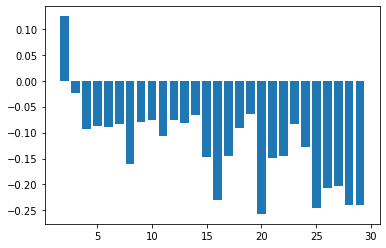

290-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 274ms/step - loss: 0.6903 - val_loss: 0.6803
Epoch 2/100
132/132 [==============================] - 0s 371us/step - loss: 0.6733 - val_loss: 0.6523
Epoch 3/100
132/132 [==============================] - 0s 363us/step - loss: 0.6360 - val_loss: 0.5923
Epoch 4/100
132/132 [==============================] - 0s 366us/step - loss: 0.5612 - val_loss: 0.4834
Epoch 5/100
132/132 [==============================] - 0s 360us/step - loss: 0.4492 - val_loss: 0.3294
Epoch 6/100
132/132 [==============================] - 0s 374us/step - loss: 0.3138 - val_loss: 0.1826
Epoch 7/100
132/132 [==============================] - 0s 381us/step - loss: 0.2127 - val_loss: 0.1054
Epoch 8/100
132/132 [==============================] - 0s 386us/step - loss: 0.1715 - val_loss: 0.0876
Epoch 9/100
132/132 [==============================] - 0s 383us/step - loss: 0.1578 - val_loss: 0.0886
(165, 130)


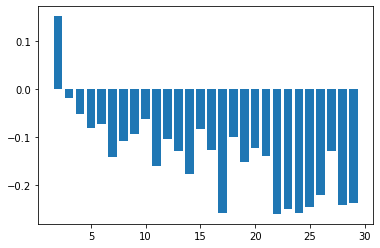

290-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 274ms/step - loss: 0.6905 - val_loss: 0.6798
Epoch 2/100
132/132 [==============================] - 0s 368us/step - loss: 0.6720 - val_loss: 0.6510
Epoch 3/100
132/132 [==============================] - 0s 356us/step - loss: 0.6326 - val_loss: 0.5905
Epoch 4/100
132/132 [==============================] - 0s 356us/step - loss: 0.5563 - val_loss: 0.4824
Epoch 5/100
132/132 [==============================] - 0s 361us/step - loss: 0.4406 - val_loss: 0.3306
Epoch 6/100
132/132 [==============================] - 0s 357us/step - loss: 0.3107 - val_loss: 0.1853
Epoch 7/100
132/132 [==============================] - 0s 359us/step - loss: 0.2186 - val_loss: 0.1075
Epoch 8/100
132/132 [==============================] - 0s 359us/step - loss: 0.1713 - val_loss: 0.0873
Epoch 9/100
132/132 [==============================] - 0s 362us/step - loss: 0.1491 - val_loss: 0.0863
Epoch 10/100
132

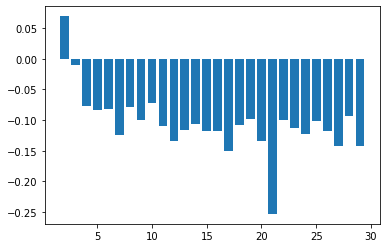

290-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 277ms/step - loss: 0.6884 - val_loss: 0.6760
Epoch 2/100
132/132 [==============================] - 0s 376us/step - loss: 0.6662 - val_loss: 0.6405
Epoch 3/100
132/132 [==============================] - 0s 357us/step - loss: 0.6187 - val_loss: 0.5694
Epoch 4/100
132/132 [==============================] - 0s 357us/step - loss: 0.5345 - val_loss: 0.4516
Epoch 5/100
132/132 [==============================] - 0s 356us/step - loss: 0.4140 - val_loss: 0.3002
Epoch 6/100
132/132 [==============================] - 0s 363us/step - loss: 0.2904 - val_loss: 0.1686
Epoch 7/100
132/132 [==============================] - 0s 355us/step - loss: 0.2082 - val_loss: 0.1045
Epoch 8/100
132/132 [==============================] - 0s 364us/step - loss: 0.1685 - val_loss: 0.0898
Epoch 9/100
132/132 [==============================] - 0s 363us/step - loss: 0.1459 - val_loss: 0.0907
(165, 110)


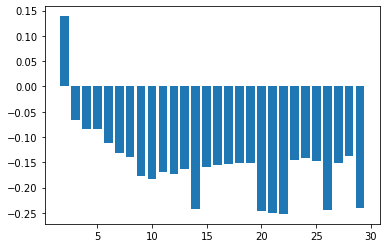

290-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 36s 276ms/step - loss: 0.6903 - val_loss: 0.6790
Epoch 2/100
132/132 [==============================] - 0s 373us/step - loss: 0.6713 - val_loss: 0.6487
Epoch 3/100
132/132 [==============================] - 0s 365us/step - loss: 0.6319 - val_loss: 0.5870
Epoch 4/100
132/132 [==============================] - 0s 361us/step - loss: 0.5568 - val_loss: 0.4795
Epoch 5/100
132/132 [==============================] - 0s 359us/step - loss: 0.4464 - val_loss: 0.3326
Epoch 6/100
132/132 [==============================] - 0s 360us/step - loss: 0.3147 - val_loss: 0.1901
Epoch 7/100
132/132 [==============================] - 0s 362us/step - loss: 0.2293 - val_loss: 0.1092
Epoch 8/100
132/132 [==============================] - 0s 358us/step - loss: 0.1816 - val_loss: 0.0885
Epoch 9/100
132/132 [==============================] - 0s 367us/step - loss: 0.1619 - val_loss: 0.0872
Epoch 10/100
132

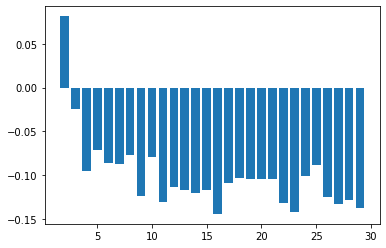

290-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 277ms/step - loss: 0.6906 - val_loss: 0.6815
Epoch 2/100
132/132 [==============================] - 0s 371us/step - loss: 0.6760 - val_loss: 0.6586
Epoch 3/100
132/132 [==============================] - 0s 357us/step - loss: 0.6464 - val_loss: 0.6125
Epoch 4/100
132/132 [==============================] - 0s 362us/step - loss: 0.5894 - val_loss: 0.5299
Epoch 5/100
132/132 [==============================] - 0s 358us/step - loss: 0.4994 - val_loss: 0.4041
Epoch 6/100
132/132 [==============================] - 0s 366us/step - loss: 0.3724 - val_loss: 0.2571
Epoch 7/100
132/132 [==============================] - 0s 365us/step - loss: 0.2572 - val_loss: 0.1423
Epoch 8/100
132/132 [==============================] - 0s 364us/step - loss: 0.1906 - val_loss: 0.0947
Epoch 9/100
132/132 [==============================] - 0s 364us/step - loss: 0.1649 - val_loss: 0.0875
Epoch 10/100
132/

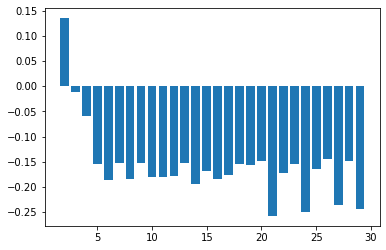

290-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 279ms/step - loss: 0.6889 - val_loss: 0.6758
Epoch 2/100
132/132 [==============================] - 0s 370us/step - loss: 0.6678 - val_loss: 0.6429
Epoch 3/100
132/132 [==============================] - 0s 360us/step - loss: 0.6254 - val_loss: 0.5808
Epoch 4/100
132/132 [==============================] - 0s 365us/step - loss: 0.5523 - val_loss: 0.4779
Epoch 5/100
132/132 [==============================] - 0s 368us/step - loss: 0.4470 - val_loss: 0.3387
Epoch 6/100
132/132 [==============================] - 0s 366us/step - loss: 0.3239 - val_loss: 0.2018
Epoch 7/100
132/132 [==============================] - 0s 368us/step - loss: 0.2264 - val_loss: 0.1173
Epoch 8/100
132/132 [==============================] - 0s 371us/step - loss: 0.1746 - val_loss: 0.0898
Epoch 9/100
132/132 [==============================] - 0s 369us/step - loss: 0.1525 - val_loss: 0.0873
Epoch 10/100
132/

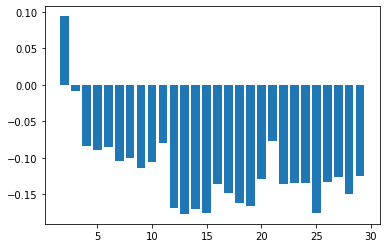

290-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 280ms/step - loss: 0.6904 - val_loss: 0.6801
Epoch 2/100
132/132 [==============================] - 0s 369us/step - loss: 0.6743 - val_loss: 0.6547
Epoch 3/100
132/132 [==============================] - 0s 363us/step - loss: 0.6410 - val_loss: 0.6058
Epoch 4/100
132/132 [==============================] - 0s 362us/step - loss: 0.5809 - val_loss: 0.5218
Epoch 5/100
132/132 [==============================] - 0s 369us/step - loss: 0.4891 - val_loss: 0.3992
Epoch 6/100
132/132 [==============================] - 0s 370us/step - loss: 0.3731 - val_loss: 0.2596
Epoch 7/100
132/132 [==============================] - 0s 370us/step - loss: 0.2633 - val_loss: 0.1530
Epoch 8/100
132/132 [==============================] - 0s 365us/step - loss: 0.1932 - val_loss: 0.1023
Epoch 9/100
132/132 [==============================] - 0s 367us/step - loss: 0.1620 - val_loss: 0.0900
Epoch 10/100
132/

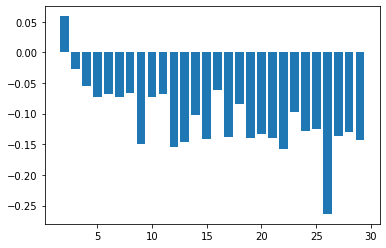

290-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 283ms/step - loss: 0.6888 - val_loss: 0.6786
Epoch 2/100
132/132 [==============================] - 0s 374us/step - loss: 0.6706 - val_loss: 0.6519
Epoch 3/100
132/132 [==============================] - 0s 362us/step - loss: 0.6336 - val_loss: 0.6018
Epoch 4/100
132/132 [==============================] - 0s 364us/step - loss: 0.5707 - val_loss: 0.5183
Epoch 5/100
132/132 [==============================] - 0s 363us/step - loss: 0.4783 - val_loss: 0.4000
Epoch 6/100
132/132 [==============================] - 0s 367us/step - loss: 0.3618 - val_loss: 0.2673
Epoch 7/100
132/132 [==============================] - 0s 367us/step - loss: 0.2599 - val_loss: 0.1585
Epoch 8/100
132/132 [==============================] - 0s 373us/step - loss: 0.1916 - val_loss: 0.1040
Epoch 9/100
132/132 [==============================] - 0s 367us/step - loss: 0.1587 - val_loss: 0.0882
Epoch 10/100
132/

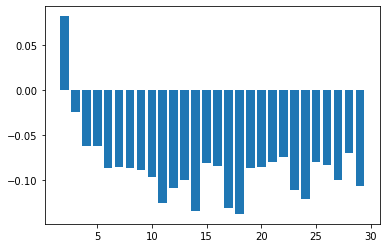

290-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 281ms/step - loss: 0.6906 - val_loss: 0.6816
Epoch 2/100
132/132 [==============================] - 0s 380us/step - loss: 0.6764 - val_loss: 0.6610
Epoch 3/100
132/132 [==============================] - 0s 364us/step - loss: 0.6505 - val_loss: 0.6230
Epoch 4/100
132/132 [==============================] - 0s 361us/step - loss: 0.6032 - val_loss: 0.5584
Epoch 5/100
132/132 [==============================] - 0s 364us/step - loss: 0.5313 - val_loss: 0.4620
Epoch 6/100
132/132 [==============================] - 0s 370us/step - loss: 0.4330 - val_loss: 0.3400
Epoch 7/100
132/132 [==============================] - 0s 393us/step - loss: 0.3289 - val_loss: 0.2191
Epoch 8/100
132/132 [==============================] - 0s 377us/step - loss: 0.2337 - val_loss: 0.1362
Epoch 9/100
132/132 [==============================] - 0s 362us/step - loss: 0.1806 - val_loss: 0.0974
Epoch 10/100
132/

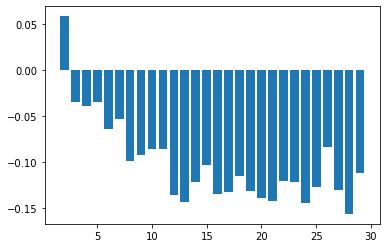

290-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 284ms/step - loss: 0.6903 - val_loss: 0.6822
Epoch 2/100
132/132 [==============================] - 0s 376us/step - loss: 0.6766 - val_loss: 0.6625
Epoch 3/100
132/132 [==============================] - 0s 365us/step - loss: 0.6505 - val_loss: 0.6272
Epoch 4/100
132/132 [==============================] - 0s 360us/step - loss: 0.6067 - val_loss: 0.5694
Epoch 5/100
132/132 [==============================] - 0s 375us/step - loss: 0.5388 - val_loss: 0.4852
Epoch 6/100
132/132 [==============================] - 0s 370us/step - loss: 0.4500 - val_loss: 0.3761
Epoch 7/100
132/132 [==============================] - 0s 365us/step - loss: 0.3504 - val_loss: 0.2587
Epoch 8/100
132/132 [==============================] - 0s 368us/step - loss: 0.2635 - val_loss: 0.1642
Epoch 9/100
132/132 [==============================] - 0s 372us/step - loss: 0.2021 - val_loss: 0.1113
Epoch 10/100
132/

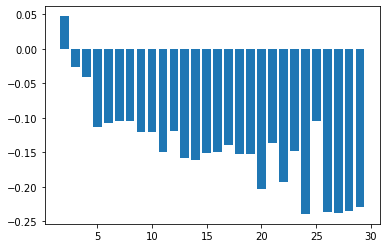

290-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 37s 283ms/step - loss: 0.6921 - val_loss: 0.6870
Epoch 2/100
132/132 [==============================] - 0s 385us/step - loss: 0.6841 - val_loss: 0.6752
Epoch 3/100
132/132 [==============================] - 0s 364us/step - loss: 0.6680 - val_loss: 0.6527
Epoch 4/100
132/132 [==============================] - 0s 368us/step - loss: 0.6379 - val_loss: 0.6126
Epoch 5/100
132/132 [==============================] - 0s 367us/step - loss: 0.5872 - val_loss: 0.5473
Epoch 6/100
132/132 [==============================] - 0s 375us/step - loss: 0.5121 - val_loss: 0.4521
Epoch 7/100
132/132 [==============================] - 0s 369us/step - loss: 0.4228 - val_loss: 0.3335
Epoch 8/100
132/132 [==============================] - 0s 371us/step - loss: 0.3202 - val_loss: 0.2189
Epoch 9/100
132/132 [==============================] - 0s 372us/step - loss: 0.2353 - val_loss: 0.1373
Epoch 10/100
132/

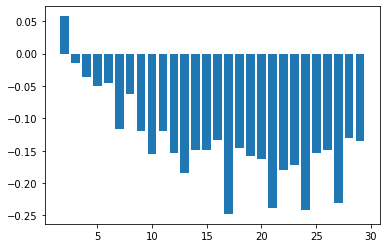

290-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 38s 286ms/step - loss: 0.6913 - val_loss: 0.6847
Epoch 2/100
132/132 [==============================] - 0s 381us/step - loss: 0.6805 - val_loss: 0.6687
Epoch 3/100
132/132 [==============================] - 0s 375us/step - loss: 0.6588 - val_loss: 0.6400
Epoch 4/100
132/132 [==============================] - 0s 367us/step - loss: 0.6211 - val_loss: 0.5934
Epoch 5/100
132/132 [==============================] - 0s 372us/step - loss: 0.5650 - val_loss: 0.5252
Epoch 6/100
132/132 [==============================] - 0s 376us/step - loss: 0.4901 - val_loss: 0.4351
Epoch 7/100
132/132 [==============================] - 0s 371us/step - loss: 0.4018 - val_loss: 0.3313
Epoch 8/100
132/132 [==============================] - 0s 372us/step - loss: 0.3080 - val_loss: 0.2323
Epoch 9/100
132/132 [==============================] - 0s 369us/step - loss: 0.2309 - val_loss: 0.1554
Epoch 10/100
132/

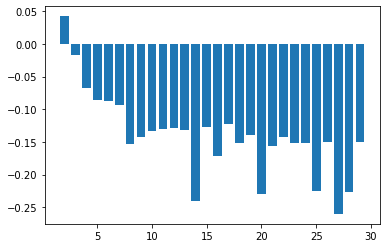

290-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 38s 287ms/step - loss: 0.6916 - val_loss: 0.6871
Epoch 2/100
132/132 [==============================] - 0s 382us/step - loss: 0.6830 - val_loss: 0.6752
Epoch 3/100
132/132 [==============================] - 0s 367us/step - loss: 0.6651 - val_loss: 0.6532
Epoch 4/100
132/132 [==============================] - 0s 371us/step - loss: 0.6350 - val_loss: 0.6171
Epoch 5/100
132/132 [==============================] - 0s 371us/step - loss: 0.5901 - val_loss: 0.5635
Epoch 6/100
132/132 [==============================] - 0s 369us/step - loss: 0.5281 - val_loss: 0.4905
Epoch 7/100
132/132 [==============================] - 0s 374us/step - loss: 0.4508 - val_loss: 0.4013
Epoch 8/100
132/132 [==============================] - 0s 375us/step - loss: 0.3643 - val_loss: 0.3047
Epoch 9/100
132/132 [==============================] - 0s 375us/step - loss: 0.2846 - val_loss: 0.2156
Epoch 10/100
132/

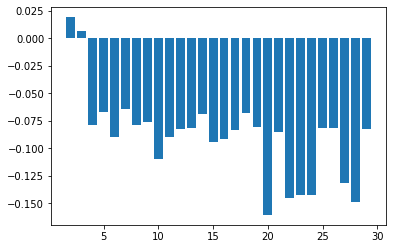

280-270dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 38s 289ms/step - loss: 0.6890 - val_loss: 0.6744
Epoch 2/100
132/132 [==============================] - 0s 386us/step - loss: 0.6628 - val_loss: 0.6304
Epoch 3/100
132/132 [==============================] - 0s 368us/step - loss: 0.6048 - val_loss: 0.5350
Epoch 4/100
132/132 [==============================] - 0s 366us/step - loss: 0.4933 - val_loss: 0.3746
Epoch 5/100
132/132 [==============================] - 0s 371us/step - loss: 0.3459 - val_loss: 0.1996
Epoch 6/100
132/132 [==============================] - 0s 376us/step - loss: 0.2323 - val_loss: 0.1068
Epoch 7/100
132/132 [==============================] - 0s 368us/step - loss: 0.1889 - val_loss: 0.0905
Epoch 8/100
132/132 [==============================] - 0s 371us/step - loss: 0.1737 - val_loss: 0.0945
(165, 270)


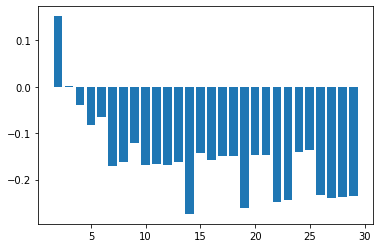

280-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 38s 289ms/step - loss: 0.6894 - val_loss: 0.6757
Epoch 2/100
132/132 [==============================] - 0s 384us/step - loss: 0.6656 - val_loss: 0.6345
Epoch 3/100
132/132 [==============================] - 0s 371us/step - loss: 0.6099 - val_loss: 0.5446
Epoch 4/100
132/132 [==============================] - 0s 369us/step - loss: 0.5022 - val_loss: 0.3908
Epoch 5/100
132/132 [==============================] - 0s 370us/step - loss: 0.3590 - val_loss: 0.2141
Epoch 6/100
132/132 [==============================] - 0s 372us/step - loss: 0.2363 - val_loss: 0.1115
Epoch 7/100
132/132 [==============================] - 0s 376us/step - loss: 0.1874 - val_loss: 0.0903
Epoch 8/100
132/132 [==============================] - ETA: 0s - loss: 0.152 - 0s 382us/step - loss: 0.1666 - val_loss: 0.0930
(165, 260)


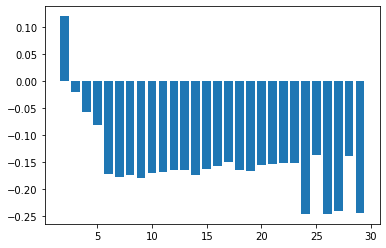

280-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 38s 290ms/step - loss: 0.6887 - val_loss: 0.6740
Epoch 2/100
132/132 [==============================] - 0s 382us/step - loss: 0.6636 - val_loss: 0.6304
Epoch 3/100
132/132 [==============================] - 0s 374us/step - loss: 0.6076 - val_loss: 0.5377
Epoch 4/100
132/132 [==============================] - 0s 370us/step - loss: 0.4986 - val_loss: 0.3822
Epoch 5/100
132/132 [==============================] - 0s 376us/step - loss: 0.3531 - val_loss: 0.2094
Epoch 6/100
132/132 [==============================] - 0s 385us/step - loss: 0.2371 - val_loss: 0.1105
Epoch 7/100
132/132 [==============================] - 0s 386us/step - loss: 0.1815 - val_loss: 0.0907
Epoch 8/100
132/132 [==============================] - 0s 375us/step - loss: 0.1611 - val_loss: 0.0926
(165, 250)


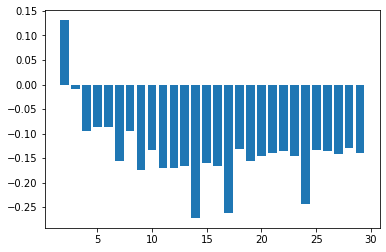

280-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 39s 292ms/step - loss: 0.6892 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 387us/step - loss: 0.6662 - val_loss: 0.6377
Epoch 3/100
132/132 [==============================] - 0s 374us/step - loss: 0.6140 - val_loss: 0.5517
Epoch 4/100
132/132 [==============================] - 0s 388us/step - loss: 0.5144 - val_loss: 0.4032
Epoch 5/100
132/132 [==============================] - 0s 373us/step - loss: 0.3614 - val_loss: 0.2274
Epoch 6/100
132/132 [==============================] - 0s 374us/step - loss: 0.2378 - val_loss: 0.1144
Epoch 7/100
132/132 [==============================] - 0s 381us/step - loss: 0.1806 - val_loss: 0.0881
Epoch 8/100
132/132 [==============================] - 0s 374us/step - loss: 0.1622 - val_loss: 0.0906
(165, 240)


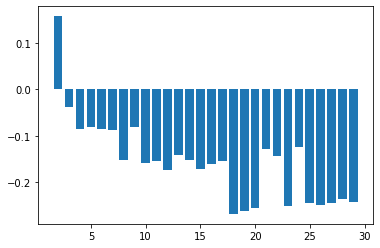

280-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 329ms/step - loss: 0.6891 - val_loss: 0.6765
Epoch 2/100
132/132 [==============================] - 0s 533us/step - loss: 0.6671 - val_loss: 0.6364
Epoch 3/100
132/132 [==============================] - 0s 381us/step - loss: 0.6151 - val_loss: 0.5477
Epoch 4/100
132/132 [==============================] - 0s 375us/step - loss: 0.5105 - val_loss: 0.3963
Epoch 5/100
132/132 [==============================] - 0s 373us/step - loss: 0.3715 - val_loss: 0.2231
Epoch 6/100
132/132 [==============================] - 0s 371us/step - loss: 0.2508 - val_loss: 0.1175
Epoch 7/100
132/132 [==============================] - 0s 382us/step - loss: 0.1875 - val_loss: 0.0914
Epoch 8/100
132/132 [==============================] - 0s 379us/step - loss: 0.1631 - val_loss: 0.0915
(165, 230)


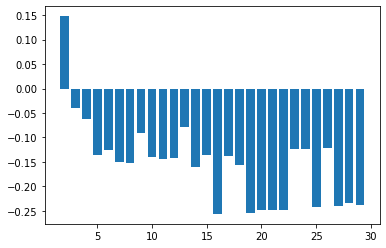

280-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 322ms/step - loss: 0.6893 - val_loss: 0.6762
Epoch 2/100
132/132 [==============================] - 0s 387us/step - loss: 0.6659 - val_loss: 0.6380
Epoch 3/100
132/132 [==============================] - 0s 380us/step - loss: 0.6174 - val_loss: 0.5567
Epoch 4/100
132/132 [==============================] - 0s 382us/step - loss: 0.5159 - val_loss: 0.4166
Epoch 5/100
132/132 [==============================] - 0s 381us/step - loss: 0.3710 - val_loss: 0.2443
Epoch 6/100
132/132 [==============================] - 0s 387us/step - loss: 0.2427 - val_loss: 0.1254
Epoch 7/100
132/132 [==============================] - 0s 377us/step - loss: 0.1816 - val_loss: 0.0919
Epoch 8/100
132/132 [==============================] - 0s 378us/step - loss: 0.1600 - val_loss: 0.0927
(165, 220)


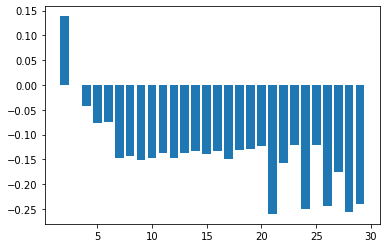

280-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 324ms/step - loss: 0.6892 - val_loss: 0.6758
Epoch 2/100
132/132 [==============================] - 0s 393us/step - loss: 0.6666 - val_loss: 0.6372
Epoch 3/100
132/132 [==============================] - 0s 380us/step - loss: 0.6170 - val_loss: 0.5540
Epoch 4/100
132/132 [==============================] - 0s 383us/step - loss: 0.5166 - val_loss: 0.4105
Epoch 5/100
132/132 [==============================] - 0s 382us/step - loss: 0.3785 - val_loss: 0.2378
Epoch 6/100
132/132 [==============================] - 0s 382us/step - loss: 0.2508 - val_loss: 0.1215
Epoch 7/100
132/132 [==============================] - 0s 384us/step - loss: 0.1914 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 378us/step - loss: 0.1733 - val_loss: 0.0911
(165, 210)


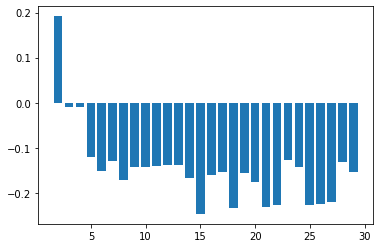

280-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 322ms/step - loss: 0.6886 - val_loss: 0.6749
Epoch 2/100
132/132 [==============================] - 0s 387us/step - loss: 0.6639 - val_loss: 0.6335
Epoch 3/100
132/132 [==============================] - 0s 376us/step - loss: 0.6106 - val_loss: 0.5464
Epoch 4/100
132/132 [==============================] - 0s 377us/step - loss: 0.5107 - val_loss: 0.4003
Epoch 5/100
132/132 [==============================] - 0s 373us/step - loss: 0.3737 - val_loss: 0.2288
Epoch 6/100
132/132 [==============================] - 0s 376us/step - loss: 0.2554 - val_loss: 0.1179
Epoch 7/100
132/132 [==============================] - 0s 385us/step - loss: 0.1867 - val_loss: 0.0896
Epoch 8/100
132/132 [==============================] - 0s 378us/step - loss: 0.1663 - val_loss: 0.0900
(165, 200)


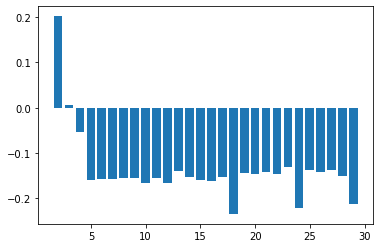

280-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 326ms/step - loss: 0.6893 - val_loss: 0.6748
Epoch 2/100
132/132 [==============================] - 0s 391us/step - loss: 0.6661 - val_loss: 0.6351
Epoch 3/100
132/132 [==============================] - 0s 385us/step - loss: 0.6140 - val_loss: 0.5533
Epoch 4/100
132/132 [==============================] - 0s 377us/step - loss: 0.5205 - val_loss: 0.4157
Epoch 5/100
132/132 [==============================] - 0s 375us/step - loss: 0.3838 - val_loss: 0.2488
Epoch 6/100
132/132 [==============================] - 0s 382us/step - loss: 0.2551 - val_loss: 0.1301
Epoch 7/100
132/132 [==============================] - 0s 378us/step - loss: 0.1908 - val_loss: 0.0925
Epoch 8/100
132/132 [==============================] - 0s 376us/step - loss: 0.1686 - val_loss: 0.0912
Epoch 9/100
132/132 [==============================] - 0s 383us/step - loss: 0.1486 - val_loss: 0.0937
(165, 190)


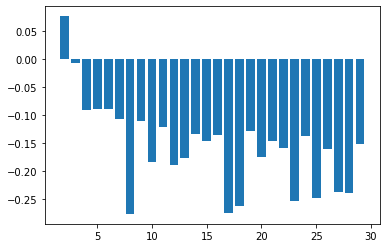

280-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 323ms/step - loss: 0.6898 - val_loss: 0.6775
Epoch 2/100
132/132 [==============================] - 0s 385us/step - loss: 0.6680 - val_loss: 0.6421
Epoch 3/100
132/132 [==============================] - 0s 378us/step - loss: 0.6199 - val_loss: 0.5683
Epoch 4/100
132/132 [==============================] - 0s 376us/step - loss: 0.5314 - val_loss: 0.4417
Epoch 5/100
132/132 [==============================] - 0s 380us/step - loss: 0.4120 - val_loss: 0.2808
Epoch 6/100
132/132 [==============================] - 0s 389us/step - loss: 0.2860 - val_loss: 0.1533
Epoch 7/100
132/132 [==============================] - 0s 380us/step - loss: 0.2014 - val_loss: 0.1011
Epoch 8/100
132/132 [==============================] - 0s 378us/step - loss: 0.1714 - val_loss: 0.0918
Epoch 9/100
132/132 [==============================] - 0s 375us/step - loss: 0.1495 - val_loss: 0.0931
(165, 180)


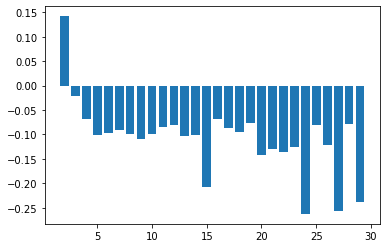

280-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 325ms/step - loss: 0.6902 - val_loss: 0.6796
Epoch 2/100
132/132 [==============================] - 0s 389us/step - loss: 0.6715 - val_loss: 0.6489
Epoch 3/100
132/132 [==============================] - 0s 380us/step - loss: 0.6299 - val_loss: 0.5819
Epoch 4/100
132/132 [==============================] - 0s 379us/step - loss: 0.5470 - val_loss: 0.4603
Epoch 5/100
132/132 [==============================] - 0s 386us/step - loss: 0.4257 - val_loss: 0.2955
Epoch 6/100
132/132 [==============================] - 0s 385us/step - loss: 0.2901 - val_loss: 0.1562
Epoch 7/100
132/132 [==============================] - 0s 387us/step - loss: 0.2087 - val_loss: 0.0957
Epoch 8/100
132/132 [==============================] - 0s 380us/step - loss: 0.1757 - val_loss: 0.0878
Epoch 9/100
132/132 [==============================] - 0s 382us/step - loss: 0.1568 - val_loss: 0.0907
(165, 170)


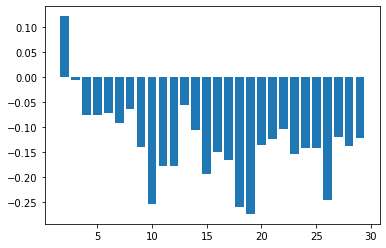

280-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 320ms/step - loss: 0.6888 - val_loss: 0.6768
Epoch 2/100
132/132 [==============================] - 0s 394us/step - loss: 0.6667 - val_loss: 0.6422
Epoch 3/100
132/132 [==============================] - 0s 388us/step - loss: 0.6182 - val_loss: 0.5701
Epoch 4/100
132/132 [==============================] - 0s 380us/step - loss: 0.5275 - val_loss: 0.4452
Epoch 5/100
132/132 [==============================] - 0s 388us/step - loss: 0.4015 - val_loss: 0.2826
Epoch 6/100
132/132 [==============================] - 0s 386us/step - loss: 0.2689 - val_loss: 0.1506
Epoch 7/100
132/132 [==============================] - 0s 388us/step - loss: 0.1987 - val_loss: 0.0958
Epoch 8/100
132/132 [==============================] - 0s 378us/step - loss: 0.1658 - val_loss: 0.0875
Epoch 9/100
132/132 [==============================] - 0s 383us/step - loss: 0.1420 - val_loss: 0.0891
(165, 160)


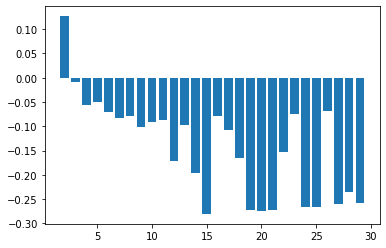

280-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 324ms/step - loss: 0.6900 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 400us/step - loss: 0.6707 - val_loss: 0.6478
Epoch 3/100
132/132 [==============================] - 0s 381us/step - loss: 0.6303 - val_loss: 0.5833
Epoch 4/100
132/132 [==============================] - 0s 382us/step - loss: 0.5543 - val_loss: 0.4688
Epoch 5/100
132/132 [==============================] - 0s 375us/step - loss: 0.4346 - val_loss: 0.3129
Epoch 6/100
132/132 [==============================] - 0s 382us/step - loss: 0.3032 - val_loss: 0.1697
Epoch 7/100
132/132 [==============================] - 0s 384us/step - loss: 0.2163 - val_loss: 0.0980
Epoch 8/100
132/132 [==============================] - 0s 378us/step - loss: 0.1773 - val_loss: 0.0841
Epoch 9/100
132/132 [==============================] - 0s 385us/step - loss: 0.1558 - val_loss: 0.0853
(165, 150)


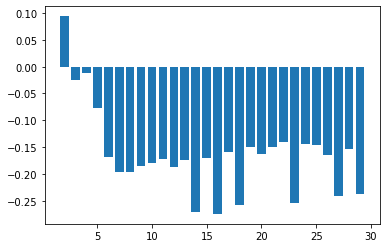

280-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 321ms/step - loss: 0.6903 - val_loss: 0.6800
Epoch 2/100
132/132 [==============================] - 0s 399us/step - loss: 0.6720 - val_loss: 0.6521
Epoch 3/100
132/132 [==============================] - 0s 379us/step - loss: 0.6336 - val_loss: 0.5927
Epoch 4/100
132/132 [==============================] - 0s 380us/step - loss: 0.5593 - val_loss: 0.4851
Epoch 5/100
132/132 [==============================] - 0s 381us/step - loss: 0.4465 - val_loss: 0.3335
Epoch 6/100
132/132 [==============================] - 0s 378us/step - loss: 0.3144 - val_loss: 0.1897
Epoch 7/100
132/132 [==============================] - 0s 377us/step - loss: 0.2184 - val_loss: 0.1118
Epoch 8/100
132/132 [==============================] - 0s 378us/step - loss: 0.1748 - val_loss: 0.0916
Epoch 9/100
132/132 [==============================] - 0s 380us/step - loss: 0.1492 - val_loss: 0.0903
Epoch 10/100
132

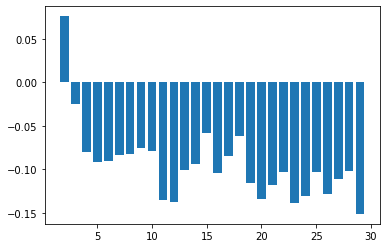

280-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 323ms/step - loss: 0.6881 - val_loss: 0.6750
Epoch 2/100
132/132 [==============================] - 0s 395us/step - loss: 0.6657 - val_loss: 0.6377
Epoch 3/100
132/132 [==============================] - 0s 388us/step - loss: 0.6163 - val_loss: 0.5631
Epoch 4/100
132/132 [==============================] - 0s 385us/step - loss: 0.5300 - val_loss: 0.4390
Epoch 5/100
132/132 [==============================] - 0s 389us/step - loss: 0.4111 - val_loss: 0.2819
Epoch 6/100
132/132 [==============================] - 0s 384us/step - loss: 0.2829 - val_loss: 0.1544
Epoch 7/100
132/132 [==============================] - 0s 389us/step - loss: 0.2043 - val_loss: 0.0976
Epoch 8/100
132/132 [==============================] - 0s 389us/step - loss: 0.1697 - val_loss: 0.0873
Epoch 9/100
132/132 [==============================] - 0s 383us/step - loss: 0.1467 - val_loss: 0.0888
(165, 130)


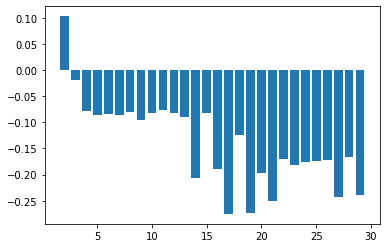

280-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 321ms/step - loss: 0.6892 - val_loss: 0.6769
Epoch 2/100
132/132 [==============================] - 0s 390us/step - loss: 0.6687 - val_loss: 0.6441
Epoch 3/100
132/132 [==============================] - 0s 381us/step - loss: 0.6263 - val_loss: 0.5786
Epoch 4/100
132/132 [==============================] - 0s 381us/step - loss: 0.5486 - val_loss: 0.4678
Epoch 5/100
132/132 [==============================] - 0s 380us/step - loss: 0.4327 - val_loss: 0.3179
Epoch 6/100
132/132 [==============================] - 0s 382us/step - loss: 0.3095 - val_loss: 0.1777
Epoch 7/100
132/132 [==============================] - 0s 384us/step - loss: 0.2167 - val_loss: 0.1036
Epoch 8/100
132/132 [==============================] - 0s 381us/step - loss: 0.1715 - val_loss: 0.0850
Epoch 9/100
132/132 [==============================] - 0s 382us/step - loss: 0.1479 - val_loss: 0.0848
Epoch 10/100
132

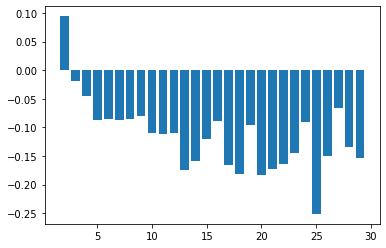

280-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 319ms/step - loss: 0.6896 - val_loss: 0.6792
Epoch 2/100
132/132 [==============================] - 0s 395us/step - loss: 0.6716 - val_loss: 0.6503
Epoch 3/100
132/132 [==============================] - 0s 377us/step - loss: 0.6331 - val_loss: 0.5908
Epoch 4/100
132/132 [==============================] - 0s 382us/step - loss: 0.5610 - val_loss: 0.4866
Epoch 5/100
132/132 [==============================] - 0s 380us/step - loss: 0.4518 - val_loss: 0.3404
Epoch 6/100
132/132 [==============================] - 0s 380us/step - loss: 0.3219 - val_loss: 0.1959
Epoch 7/100
132/132 [==============================] - 0s 382us/step - loss: 0.2268 - val_loss: 0.1115
Epoch 8/100
132/132 [==============================] - 0s 384us/step - loss: 0.1805 - val_loss: 0.0879
Epoch 9/100
132/132 [==============================] - 0s 382us/step - loss: 0.1598 - val_loss: 0.0861
Epoch 10/100
132

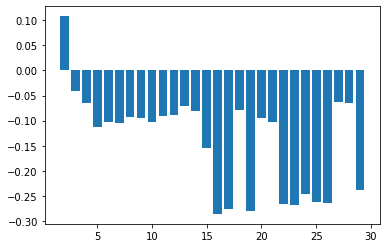

280-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 41s 314ms/step - loss: 0.6901 - val_loss: 0.6800
Epoch 2/100
132/132 [==============================] - 0s 395us/step - loss: 0.6726 - val_loss: 0.6539
Epoch 3/100
132/132 [==============================] - 0s 385us/step - loss: 0.6371 - val_loss: 0.6015
Epoch 4/100
132/132 [==============================] - 0s 381us/step - loss: 0.5730 - val_loss: 0.5098
Epoch 5/100
132/132 [==============================] - 0s 384us/step - loss: 0.4758 - val_loss: 0.3773
Epoch 6/100
132/132 [==============================] - 0s 381us/step - loss: 0.3514 - val_loss: 0.2347
Epoch 7/100
132/132 [==============================] - 0s 388us/step - loss: 0.2454 - val_loss: 0.1326
Epoch 8/100
132/132 [==============================] - 0s 395us/step - loss: 0.1843 - val_loss: 0.0932
Epoch 9/100
132/132 [==============================] - 0s 388us/step - loss: 0.1620 - val_loss: 0.0866
Epoch 10/100
132

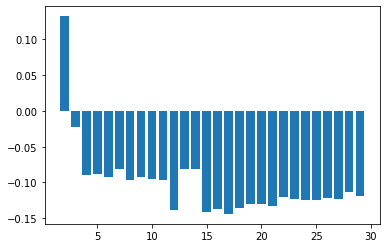

280-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 41s 314ms/step - loss: 0.6888 - val_loss: 0.6766
Epoch 2/100
132/132 [==============================] - 0s 400us/step - loss: 0.6672 - val_loss: 0.6445
Epoch 3/100
132/132 [==============================] - 0s 389us/step - loss: 0.6245 - val_loss: 0.5815
Epoch 4/100
132/132 [==============================] - 0s 386us/step - loss: 0.5486 - val_loss: 0.4759
Epoch 5/100
132/132 [==============================] - 0s 385us/step - loss: 0.4410 - val_loss: 0.3338
Epoch 6/100
132/132 [==============================] - 0s 388us/step - loss: 0.3146 - val_loss: 0.1974
Epoch 7/100
132/132 [==============================] - 0s 386us/step - loss: 0.2291 - val_loss: 0.1147
Epoch 8/100
132/132 [==============================] - 0s 387us/step - loss: 0.1808 - val_loss: 0.0894
Epoch 9/100
132/132 [==============================] - 0s 383us/step - loss: 0.1624 - val_loss: 0.0866
Epoch 10/100
132/

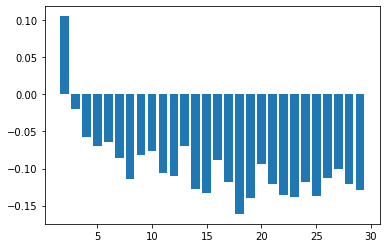

280-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 41s 311ms/step - loss: 0.6902 - val_loss: 0.6811
Epoch 2/100
132/132 [==============================] - 0s 397us/step - loss: 0.6743 - val_loss: 0.6581
Epoch 3/100
132/132 [==============================] - 0s 383us/step - loss: 0.6427 - val_loss: 0.6126
Epoch 4/100
132/132 [==============================] - 0s 388us/step - loss: 0.5860 - val_loss: 0.5324
Epoch 5/100
132/132 [==============================] - 0s 391us/step - loss: 0.4962 - val_loss: 0.4121
Epoch 6/100
132/132 [==============================] - 0s 403us/step - loss: 0.3758 - val_loss: 0.2709
Epoch 7/100
132/132 [==============================] - 0s 384us/step - loss: 0.2636 - val_loss: 0.1558
Epoch 8/100
132/132 [==============================] - 0s 383us/step - loss: 0.1923 - val_loss: 0.1005
Epoch 9/100
132/132 [==============================] - 0s 386us/step - loss: 0.1619 - val_loss: 0.0869
Epoch 10/100
132/

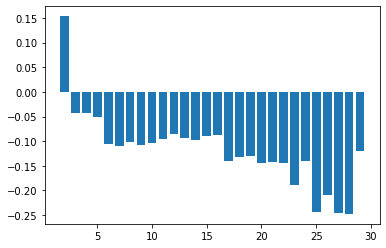

280-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 315ms/step - loss: 0.6897 - val_loss: 0.6803
Epoch 2/100
132/132 [==============================] - 0s 397us/step - loss: 0.6738 - val_loss: 0.6563
Epoch 3/100
132/132 [==============================] - 0s 383us/step - loss: 0.6409 - val_loss: 0.6096
Epoch 4/100
132/132 [==============================] - 0s 384us/step - loss: 0.5837 - val_loss: 0.5291
Epoch 5/100
132/132 [==============================] - 0s 389us/step - loss: 0.4922 - val_loss: 0.4115
Epoch 6/100
132/132 [==============================] - 0s 382us/step - loss: 0.3781 - val_loss: 0.2726
Epoch 7/100
132/132 [==============================] - 0s 385us/step - loss: 0.2659 - val_loss: 0.1590
Epoch 8/100
132/132 [==============================] - 0s 390us/step - loss: 0.1932 - val_loss: 0.1040
Epoch 9/100
132/132 [==============================] - 0s 389us/step - loss: 0.1614 - val_loss: 0.0895
Epoch 10/100
132/

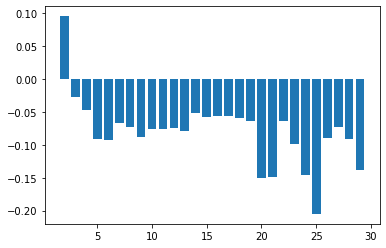

280-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 41s 312ms/step - loss: 0.6889 - val_loss: 0.6774
Epoch 2/100
132/132 [==============================] - 0s 409us/step - loss: 0.6702 - val_loss: 0.6481
Epoch 3/100
132/132 [==============================] - 0s 387us/step - loss: 0.6335 - val_loss: 0.5935
Epoch 4/100
132/132 [==============================] - 0s 393us/step - loss: 0.5671 - val_loss: 0.5042
Epoch 5/100
132/132 [==============================] - 0s 388us/step - loss: 0.4683 - val_loss: 0.3800
Epoch 6/100
132/132 [==============================] - 0s 389us/step - loss: 0.3516 - val_loss: 0.2444
Epoch 7/100
132/132 [==============================] - 0s 388us/step - loss: 0.2514 - val_loss: 0.1422
Epoch 8/100
132/132 [==============================] - 0s 388us/step - loss: 0.1914 - val_loss: 0.0964
Epoch 9/100
132/132 [==============================] - 0s 391us/step - loss: 0.1592 - val_loss: 0.0847
Epoch 10/100
132/

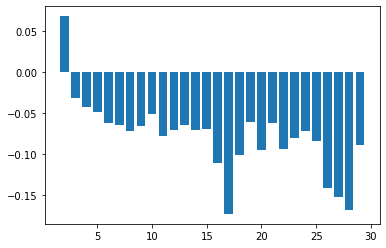

280-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 315ms/step - loss: 0.6909 - val_loss: 0.6841
Epoch 2/100
132/132 [==============================] - 0s 396us/step - loss: 0.6796 - val_loss: 0.6668
Epoch 3/100
132/132 [==============================] - 0s 389us/step - loss: 0.6557 - val_loss: 0.6332
Epoch 4/100
132/132 [==============================] - 0s 390us/step - loss: 0.6130 - val_loss: 0.5735
Epoch 5/100
132/132 [==============================] - 0s 391us/step - loss: 0.5441 - val_loss: 0.4794
Epoch 6/100
132/132 [==============================] - 0s 394us/step - loss: 0.4473 - val_loss: 0.3558
Epoch 7/100
132/132 [==============================] - 0s 392us/step - loss: 0.3426 - val_loss: 0.2280
Epoch 8/100
132/132 [==============================] - 0s 393us/step - loss: 0.2457 - val_loss: 0.1383
Epoch 9/100
132/132 [==============================] - 0s 393us/step - loss: 0.1844 - val_loss: 0.0961
Epoch 10/100
132/

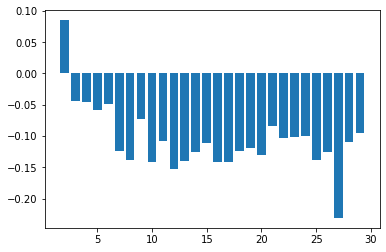

280-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 316ms/step - loss: 0.6910 - val_loss: 0.6835
Epoch 2/100
132/132 [==============================] - 0s 406us/step - loss: 0.6782 - val_loss: 0.6654
Epoch 3/100
132/132 [==============================] - 0s 390us/step - loss: 0.6531 - val_loss: 0.6313
Epoch 4/100
132/132 [==============================] - 0s 394us/step - loss: 0.6087 - val_loss: 0.5721
Epoch 5/100
132/132 [==============================] - 0s 396us/step - loss: 0.5404 - val_loss: 0.4816
Epoch 6/100
132/132 [==============================] - 0s 390us/step - loss: 0.4488 - val_loss: 0.3647
Epoch 7/100
132/132 [==============================] - 0s 386us/step - loss: 0.3390 - val_loss: 0.2453
Epoch 8/100
132/132 [==============================] - 0s 394us/step - loss: 0.2484 - val_loss: 0.1530
Epoch 9/100
132/132 [==============================] - 0s 390us/step - loss: 0.1869 - val_loss: 0.1075
Epoch 10/100
132/

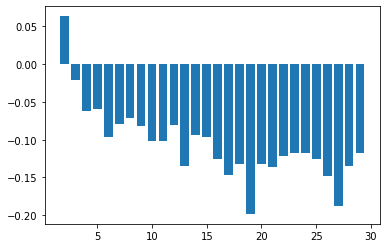

280-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 317ms/step - loss: 0.6906 - val_loss: 0.6839
Epoch 2/100
132/132 [==============================] - 0s 399us/step - loss: 0.6795 - val_loss: 0.6675
Epoch 3/100
132/132 [==============================] - 0s 384us/step - loss: 0.6579 - val_loss: 0.6384
Epoch 4/100
132/132 [==============================] - 0s 391us/step - loss: 0.6217 - val_loss: 0.5910
Epoch 5/100
132/132 [==============================] - 0s 395us/step - loss: 0.5665 - val_loss: 0.5198
Epoch 6/100
132/132 [==============================] - 0s 407us/step - loss: 0.4884 - val_loss: 0.4235
Epoch 7/100
132/132 [==============================] - 0s 390us/step - loss: 0.3969 - val_loss: 0.3099
Epoch 8/100
132/132 [==============================] - 0s 387us/step - loss: 0.2988 - val_loss: 0.2052
Epoch 9/100
132/132 [==============================] - 0s 387us/step - loss: 0.2177 - val_loss: 0.1342
Epoch 10/100
132/

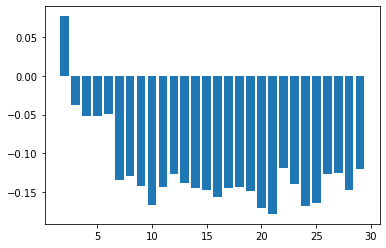

280-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 317ms/step - loss: 0.6914 - val_loss: 0.6856
Epoch 2/100
132/132 [==============================] - 0s 403us/step - loss: 0.6825 - val_loss: 0.6717
Epoch 3/100
132/132 [==============================] - 0s 385us/step - loss: 0.6646 - val_loss: 0.6473
Epoch 4/100
132/132 [==============================] - 0s 388us/step - loss: 0.6336 - val_loss: 0.6078
Epoch 5/100
132/132 [==============================] - 0s 390us/step - loss: 0.5876 - val_loss: 0.5494
Epoch 6/100
132/132 [==============================] - 0s 388us/step - loss: 0.5232 - val_loss: 0.4703
Epoch 7/100
132/132 [==============================] - 0s 392us/step - loss: 0.4455 - val_loss: 0.3739
Epoch 8/100
132/132 [==============================] - 0s 393us/step - loss: 0.3563 - val_loss: 0.2732
Epoch 9/100
132/132 [==============================] - 0s 394us/step - loss: 0.2702 - val_loss: 0.1870
Epoch 10/100
132/

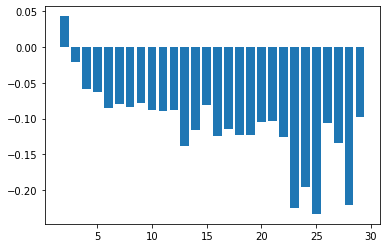

280-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 319ms/step - loss: 0.6915 - val_loss: 0.6876
Epoch 2/100
132/132 [==============================] - 0s 401us/step - loss: 0.6838 - val_loss: 0.6770
Epoch 3/100
132/132 [==============================] - 0s 392us/step - loss: 0.6685 - val_loss: 0.6578
Epoch 4/100
132/132 [==============================] - 0s 396us/step - loss: 0.6421 - val_loss: 0.6269
Epoch 5/100
132/132 [==============================] - 0s 393us/step - loss: 0.6026 - val_loss: 0.5817
Epoch 6/100
132/132 [==============================] - 0s 394us/step - loss: 0.5518 - val_loss: 0.5203
Epoch 7/100
132/132 [==============================] - 0s 389us/step - loss: 0.4857 - val_loss: 0.4443
Epoch 8/100
132/132 [==============================] - 0s 391us/step - loss: 0.4155 - val_loss: 0.3587
Epoch 9/100
132/132 [==============================] - 0s 389us/step - loss: 0.3367 - val_loss: 0.2763
Epoch 10/100
132/

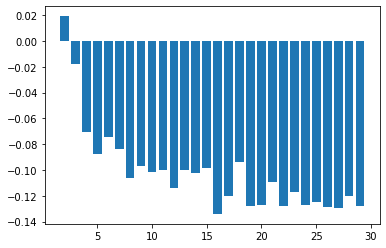

270-260dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 316ms/step - loss: 0.6883 - val_loss: 0.6737
Epoch 2/100
132/132 [==============================] - 0s 416us/step - loss: 0.6617 - val_loss: 0.6276
Epoch 3/100
132/132 [==============================] - 0s 414us/step - loss: 0.5999 - val_loss: 0.5305
Epoch 4/100
132/132 [==============================] - 0s 397us/step - loss: 0.4940 - val_loss: 0.3735
Epoch 5/100
132/132 [==============================] - 0s 392us/step - loss: 0.3513 - val_loss: 0.2066
Epoch 6/100
132/132 [==============================] - 0s 401us/step - loss: 0.2253 - val_loss: 0.1132
Epoch 7/100
132/132 [==============================] - 0s 398us/step - loss: 0.1792 - val_loss: 0.0911
Epoch 8/100
132/132 [==============================] - 0s 393us/step - loss: 0.1560 - val_loss: 0.0933
(165, 260)


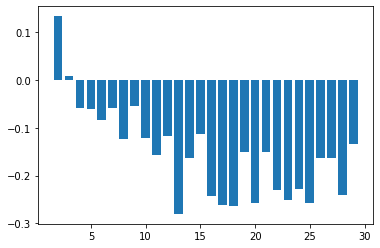

270-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 42s 319ms/step - loss: 0.6896 - val_loss: 0.6768
Epoch 2/100
132/132 [==============================] - 0s 406us/step - loss: 0.6674 - val_loss: 0.6385
Epoch 3/100
132/132 [==============================] - 0s 392us/step - loss: 0.6166 - val_loss: 0.5550
Epoch 4/100
132/132 [==============================] - 0s 394us/step - loss: 0.5160 - val_loss: 0.4097
Epoch 5/100
132/132 [==============================] - 0s 395us/step - loss: 0.3748 - val_loss: 0.2333
Epoch 6/100
132/132 [==============================] - 0s 397us/step - loss: 0.2463 - val_loss: 0.1184
Epoch 7/100
132/132 [==============================] - 0s 393us/step - loss: 0.1821 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 397us/step - loss: 0.1598 - val_loss: 0.0905
(165, 250)


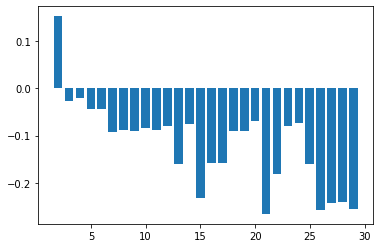

270-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 322ms/step - loss: 0.6892 - val_loss: 0.6752
Epoch 2/100
132/132 [==============================] - 0s 407us/step - loss: 0.6646 - val_loss: 0.6329
Epoch 3/100
132/132 [==============================] - 0s 397us/step - loss: 0.6085 - val_loss: 0.5422
Epoch 4/100
132/132 [==============================] - 0s 401us/step - loss: 0.5050 - val_loss: 0.3904
Epoch 5/100
132/132 [==============================] - 0s 395us/step - loss: 0.3604 - val_loss: 0.2194
Epoch 6/100
132/132 [==============================] - 0s 396us/step - loss: 0.2391 - val_loss: 0.1141
Epoch 7/100
132/132 [==============================] - 0s 395us/step - loss: 0.1813 - val_loss: 0.0877
Epoch 8/100
132/132 [==============================] - 0s 395us/step - loss: 0.1587 - val_loss: 0.0881
(165, 240)


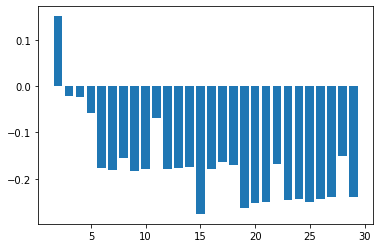

270-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 322ms/step - loss: 0.6892 - val_loss: 0.6761
Epoch 2/100
132/132 [==============================] - 0s 407us/step - loss: 0.6664 - val_loss: 0.6381
Epoch 3/100
132/132 [==============================] - 0s 399us/step - loss: 0.6145 - val_loss: 0.5568
Epoch 4/100
132/132 [==============================] - 0s 399us/step - loss: 0.5163 - val_loss: 0.4174
Epoch 5/100
132/132 [==============================] - 0s 397us/step - loss: 0.3783 - val_loss: 0.2473
Epoch 6/100
132/132 [==============================] - 0s 397us/step - loss: 0.2540 - val_loss: 0.1287
Epoch 7/100
132/132 [==============================] - 0s 395us/step - loss: 0.1884 - val_loss: 0.0919
Epoch 8/100
132/132 [==============================] - 0s 398us/step - loss: 0.1664 - val_loss: 0.0898
Epoch 9/100
132/132 [==============================] - 0s 402us/step - loss: 0.1474 - val_loss: 0.0920
(165, 230)


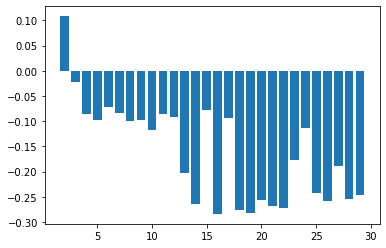

270-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 324ms/step - loss: 0.6866 - val_loss: 0.6711
Epoch 2/100
132/132 [==============================] - 0s 412us/step - loss: 0.6584 - val_loss: 0.6229
Epoch 3/100
132/132 [==============================] - 0s 397us/step - loss: 0.5941 - val_loss: 0.5255
Epoch 4/100
132/132 [==============================] - 0s 401us/step - loss: 0.4949 - val_loss: 0.3746
Epoch 5/100
132/132 [==============================] - 0s 404us/step - loss: 0.3515 - val_loss: 0.2162
Epoch 6/100
132/132 [==============================] - 0s 398us/step - loss: 0.2395 - val_loss: 0.1160
Epoch 7/100
132/132 [==============================] - 0s 393us/step - loss: 0.1788 - val_loss: 0.0898
Epoch 8/100
132/132 [==============================] - 0s 402us/step - loss: 0.1569 - val_loss: 0.0893
Epoch 9/100
132/132 [==============================] - 0s 395us/step - loss: 0.1375 - val_loss: 0.0920
(165, 220)


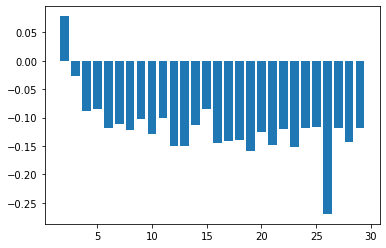

270-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 324ms/step - loss: 0.6893 - val_loss: 0.6770
Epoch 2/100
132/132 [==============================] - 0s 409us/step - loss: 0.6665 - val_loss: 0.6415
Epoch 3/100
132/132 [==============================] - 0s 396us/step - loss: 0.6165 - val_loss: 0.5656
Epoch 4/100
132/132 [==============================] - 0s 397us/step - loss: 0.5233 - val_loss: 0.4339
Epoch 5/100
132/132 [==============================] - 0s 398us/step - loss: 0.3906 - val_loss: 0.2667
Epoch 6/100
132/132 [==============================] - 0s 397us/step - loss: 0.2641 - val_loss: 0.1402
Epoch 7/100
132/132 [==============================] - 0s 402us/step - loss: 0.1894 - val_loss: 0.0947
Epoch 8/100
132/132 [==============================] - 0s 395us/step - loss: 0.1604 - val_loss: 0.0888
Epoch 9/100
132/132 [==============================] - 0s 397us/step - loss: 0.1453 - val_loss: 0.0912
(165, 210)


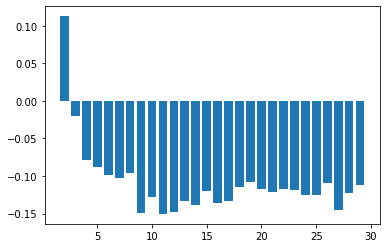

270-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 324ms/step - loss: 0.6900 - val_loss: 0.6784
Epoch 2/100
132/132 [==============================] - 0s 409us/step - loss: 0.6699 - val_loss: 0.6452
Epoch 3/100
132/132 [==============================] - 0s 403us/step - loss: 0.6240 - val_loss: 0.5742
Epoch 4/100
132/132 [==============================] - 0s 400us/step - loss: 0.5352 - val_loss: 0.4482
Epoch 5/100
132/132 [==============================] - 0s 398us/step - loss: 0.4064 - val_loss: 0.2810
Epoch 6/100
132/132 [==============================] - 0s 399us/step - loss: 0.2683 - val_loss: 0.1452
Epoch 7/100
132/132 [==============================] - 0s 397us/step - loss: 0.1933 - val_loss: 0.0920
Epoch 8/100
132/132 [==============================] - 0s 397us/step - loss: 0.1716 - val_loss: 0.0869
Epoch 9/100
132/132 [==============================] - 0s 397us/step - loss: 0.1609 - val_loss: 0.0906
(165, 200)


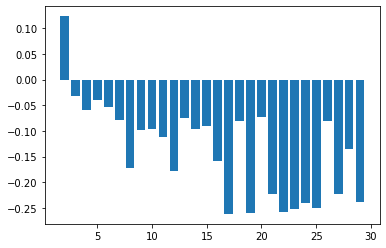

270-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 328ms/step - loss: 0.6909 - val_loss: 0.6805
Epoch 2/100
132/132 [==============================] - 0s 413us/step - loss: 0.6741 - val_loss: 0.6519
Epoch 3/100
132/132 [==============================] - 0s 400us/step - loss: 0.6368 - val_loss: 0.5909
Epoch 4/100
132/132 [==============================] - 0s 401us/step - loss: 0.5641 - val_loss: 0.4797
Epoch 5/100
132/132 [==============================] - 0s 408us/step - loss: 0.4471 - val_loss: 0.3215
Epoch 6/100
132/132 [==============================] - 0s 403us/step - loss: 0.3050 - val_loss: 0.1730
Epoch 7/100
132/132 [==============================] - 0s 399us/step - loss: 0.2098 - val_loss: 0.0996
Epoch 8/100
132/132 [==============================] - 0s 405us/step - loss: 0.1744 - val_loss: 0.0874
Epoch 9/100
132/132 [==============================] - 0s 399us/step - loss: 0.1594 - val_loss: 0.0904
(165, 190)


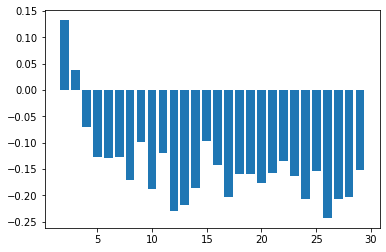

270-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 327ms/step - loss: 0.6883 - val_loss: 0.6743
Epoch 2/100
132/132 [==============================] - 0s 415us/step - loss: 0.6644 - val_loss: 0.6366
Epoch 3/100
132/132 [==============================] - 0s 401us/step - loss: 0.6156 - val_loss: 0.5598
Epoch 4/100
132/132 [==============================] - 0s 412us/step - loss: 0.5244 - val_loss: 0.4300
Epoch 5/100
132/132 [==============================] - 0s 408us/step - loss: 0.3974 - val_loss: 0.2678
Epoch 6/100
132/132 [==============================] - 0s 399us/step - loss: 0.2652 - val_loss: 0.1425
Epoch 7/100
132/132 [==============================] - 0s 396us/step - loss: 0.1941 - val_loss: 0.0931
Epoch 8/100
132/132 [==============================] - 0s 404us/step - loss: 0.1641 - val_loss: 0.0880
Epoch 9/100
132/132 [==============================] - 0s 404us/step - loss: 0.1472 - val_loss: 0.0913
(165, 180)


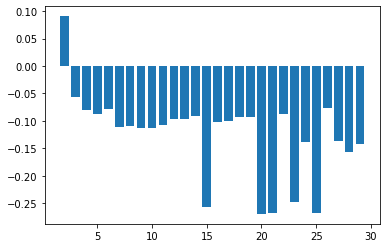

270-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 43s 329ms/step - loss: 0.6897 - val_loss: 0.6798
Epoch 2/100
132/132 [==============================] - 0s 413us/step - loss: 0.6718 - val_loss: 0.6512
Epoch 3/100
132/132 [==============================] - 0s 404us/step - loss: 0.6325 - val_loss: 0.5906
Epoch 4/100
132/132 [==============================] - 0s 407us/step - loss: 0.5564 - val_loss: 0.4803
Epoch 5/100
132/132 [==============================] - 0s 404us/step - loss: 0.4337 - val_loss: 0.3248
Epoch 6/100
132/132 [==============================] - 0s 401us/step - loss: 0.2979 - val_loss: 0.1780
Epoch 7/100
132/132 [==============================] - 0s 397us/step - loss: 0.2005 - val_loss: 0.1038
Epoch 8/100
132/132 [==============================] - 0s 403us/step - loss: 0.1652 - val_loss: 0.0885
Epoch 9/100
132/132 [==============================] - 0s 396us/step - loss: 0.1472 - val_loss: 0.0905
(165, 170)


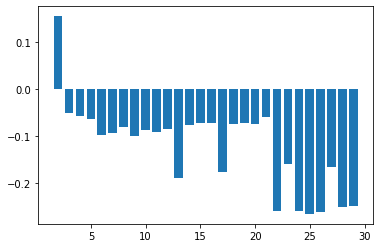

270-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 44s 333ms/step - loss: 0.6897 - val_loss: 0.6785
Epoch 2/100
132/132 [==============================] - 0s 416us/step - loss: 0.6703 - val_loss: 0.6481
Epoch 3/100
132/132 [==============================] - 0s 402us/step - loss: 0.6296 - val_loss: 0.5854
Epoch 4/100
132/132 [==============================] - 0s 403us/step - loss: 0.5549 - val_loss: 0.4744
Epoch 5/100
132/132 [==============================] - 0s 399us/step - loss: 0.4355 - val_loss: 0.3214
Epoch 6/100
132/132 [==============================] - 0s 408us/step - loss: 0.3071 - val_loss: 0.1774
Epoch 7/100
132/132 [==============================] - 0s 407us/step - loss: 0.2108 - val_loss: 0.1043
Epoch 8/100
132/132 [==============================] - 0s 410us/step - loss: 0.1736 - val_loss: 0.0876
Epoch 9/100
132/132 [==============================] - 0s 404us/step - loss: 0.1595 - val_loss: 0.0888
(165, 160)


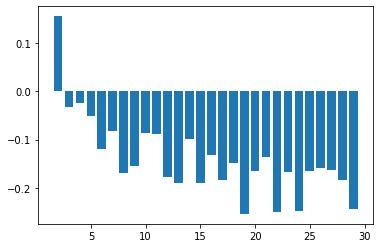

270-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 45s 345ms/step - loss: 0.6896 - val_loss: 0.6779
Epoch 2/100
132/132 [==============================] - 0s 573us/step - loss: 0.6692 - val_loss: 0.6465
Epoch 3/100
132/132 [==============================] - 0s 400us/step - loss: 0.6267 - val_loss: 0.5824
Epoch 4/100
132/132 [==============================] - 0s 409us/step - loss: 0.5462 - val_loss: 0.4708
Epoch 5/100
132/132 [==============================] - 0s 407us/step - loss: 0.4283 - val_loss: 0.3180
Epoch 6/100
132/132 [==============================] - 0s 406us/step - loss: 0.2933 - val_loss: 0.1765
Epoch 7/100
132/132 [==============================] - 0s 403us/step - loss: 0.2069 - val_loss: 0.1037
Epoch 8/100
132/132 [==============================] - 0s 398us/step - loss: 0.1695 - val_loss: 0.0884
Epoch 9/100
132/132 [==============================] - 0s 403us/step - loss: 0.1536 - val_loss: 0.0893
(165, 150)


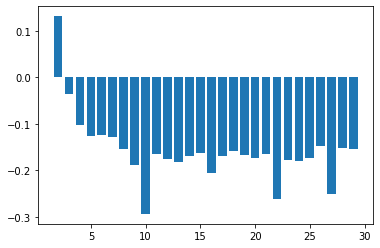

270-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 44s 334ms/step - loss: 0.6898 - val_loss: 0.6785
Epoch 2/100
132/132 [==============================] - 0s 417us/step - loss: 0.6701 - val_loss: 0.6477
Epoch 3/100
132/132 [==============================] - 0s 756us/step - loss: 0.6290 - val_loss: 0.5854
Epoch 4/100
132/132 [==============================] - 0s 402us/step - loss: 0.5530 - val_loss: 0.4773
Epoch 5/100
132/132 [==============================] - 0s 403us/step - loss: 0.4392 - val_loss: 0.3300
Epoch 6/100
132/132 [==============================] - 0s 401us/step - loss: 0.3156 - val_loss: 0.1903
Epoch 7/100
132/132 [==============================] - 0s 401us/step - loss: 0.2123 - val_loss: 0.1130
Epoch 8/100
132/132 [==============================] - 0s 397us/step - loss: 0.1650 - val_loss: 0.0886
Epoch 9/100
132/132 [==============================] - 0s 403us/step - loss: 0.1439 - val_loss: 0.0863
Epoch 10/100
132

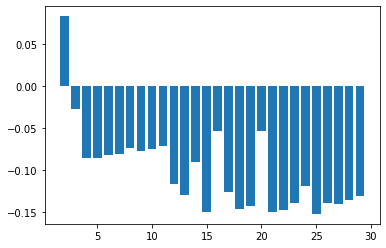

270-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 44s 335ms/step - loss: 0.6898 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 418us/step - loss: 0.6706 - val_loss: 0.6491
Epoch 3/100
132/132 [==============================] - 0s 778us/step - loss: 0.6320 - val_loss: 0.5885
Epoch 4/100
132/132 [==============================] - 0s 463us/step - loss: 0.5579 - val_loss: 0.4821
Epoch 5/100
132/132 [==============================] - 0s 408us/step - loss: 0.4400 - val_loss: 0.3330
Epoch 6/100
132/132 [==============================] - 0s 407us/step - loss: 0.3149 - val_loss: 0.1885
Epoch 7/100
132/132 [==============================] - 0s 404us/step - loss: 0.2172 - val_loss: 0.1112
Epoch 8/100
132/132 [==============================] - 0s 408us/step - loss: 0.1753 - val_loss: 0.0908
Epoch 9/100
132/132 [==============================] - 0s 408us/step - loss: 0.1545 - val_loss: 0.0902
Epoch 10/100
132

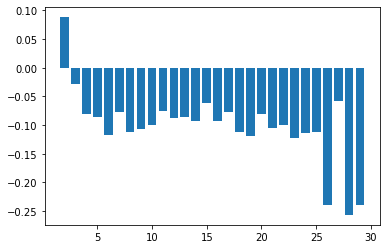

270-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 44s 336ms/step - loss: 0.6898 - val_loss: 0.6797
Epoch 2/100
132/132 [==============================] - 0s 417us/step - loss: 0.6723 - val_loss: 0.6525
Epoch 3/100
132/132 [==============================] - 0s 410us/step - loss: 0.6349 - val_loss: 0.5981
Epoch 4/100
132/132 [==============================] - 0s 409us/step - loss: 0.5686 - val_loss: 0.5027
Epoch 5/100
132/132 [==============================] - 0s 402us/step - loss: 0.4686 - val_loss: 0.3669
Epoch 6/100
132/132 [==============================] - 0s 414us/step - loss: 0.3462 - val_loss: 0.2245
Epoch 7/100
132/132 [==============================] - 0s 409us/step - loss: 0.2374 - val_loss: 0.1279
Epoch 8/100
132/132 [==============================] - 0s 406us/step - loss: 0.1782 - val_loss: 0.0908
Epoch 9/100
132/132 [==============================] - 0s 407us/step - loss: 0.1577 - val_loss: 0.0848
Epoch 10/100
132

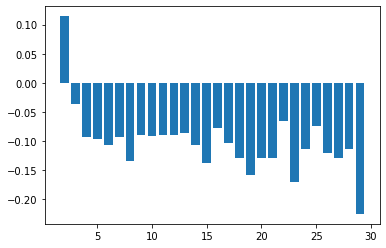

270-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 44s 336ms/step - loss: 0.6896 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 420us/step - loss: 0.6714 - val_loss: 0.6504
Epoch 3/100
132/132 [==============================] - 0s 405us/step - loss: 0.6340 - val_loss: 0.5934
Epoch 4/100
132/132 [==============================] - 0s 416us/step - loss: 0.5625 - val_loss: 0.4947
Epoch 5/100
132/132 [==============================] - 0s 414us/step - loss: 0.4534 - val_loss: 0.3558
Epoch 6/100
132/132 [==============================] - 0s 411us/step - loss: 0.3327 - val_loss: 0.2128
Epoch 7/100
132/132 [==============================] - 0s 405us/step - loss: 0.2356 - val_loss: 0.1239
Epoch 8/100
132/132 [==============================] - 0s 414us/step - loss: 0.1769 - val_loss: 0.0946
Epoch 9/100
132/132 [==============================] - 0s 407us/step - loss: 0.1545 - val_loss: 0.0899
Epoch 10/100
132

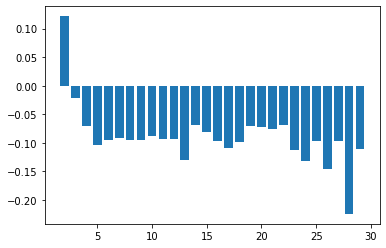

270-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 44s 336ms/step - loss: 0.6901 - val_loss: 0.6793
Epoch 2/100
132/132 [==============================] - 0s 414us/step - loss: 0.6725 - val_loss: 0.6522
Epoch 3/100
132/132 [==============================] - 0s 405us/step - loss: 0.6357 - val_loss: 0.5985
Epoch 4/100
132/132 [==============================] - 0s 408us/step - loss: 0.5704 - val_loss: 0.5053
Epoch 5/100
132/132 [==============================] - 0s 411us/step - loss: 0.4683 - val_loss: 0.3721
Epoch 6/100
132/132 [==============================] - 0s 403us/step - loss: 0.3557 - val_loss: 0.2328
Epoch 7/100
132/132 [==============================] - 0s 407us/step - loss: 0.2455 - val_loss: 0.1407
Epoch 8/100
132/132 [==============================] - 0s 408us/step - loss: 0.1906 - val_loss: 0.0997
Epoch 9/100
132/132 [==============================] - 0s 414us/step - loss: 0.1582 - val_loss: 0.0914
Epoch 10/100
132

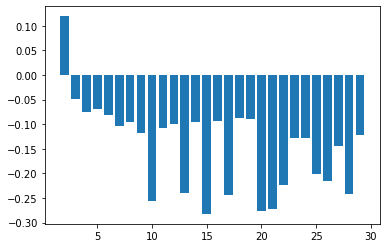

270-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 45s 342ms/step - loss: 0.6885 - val_loss: 0.6773
Epoch 2/100
132/132 [==============================] - 0s 424us/step - loss: 0.6685 - val_loss: 0.6473
Epoch 3/100
132/132 [==============================] - 0s 412us/step - loss: 0.6299 - val_loss: 0.5910
Epoch 4/100
132/132 [==============================] - 0s 409us/step - loss: 0.5597 - val_loss: 0.4987
Epoch 5/100
132/132 [==============================] - 0s 409us/step - loss: 0.4599 - val_loss: 0.3697
Epoch 6/100
132/132 [==============================] - 0s 412us/step - loss: 0.3388 - val_loss: 0.2316
Epoch 7/100
132/132 [==============================] - 0s 406us/step - loss: 0.2394 - val_loss: 0.1328
Epoch 8/100
132/132 [==============================] - 0s 410us/step - loss: 0.1855 - val_loss: 0.0927
Epoch 9/100
132/132 [==============================] - 0s 410us/step - loss: 0.1599 - val_loss: 0.0853
Epoch 10/100
132/

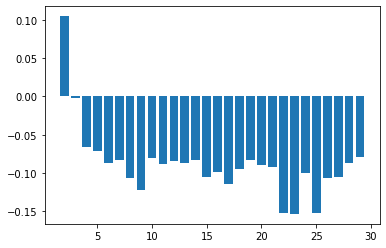

270-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 45s 341ms/step - loss: 0.6888 - val_loss: 0.6771
Epoch 2/100
132/132 [==============================] - 0s 421us/step - loss: 0.6698 - val_loss: 0.6479
Epoch 3/100
132/132 [==============================] - 0s 408us/step - loss: 0.6323 - val_loss: 0.5926
Epoch 4/100
132/132 [==============================] - 0s 411us/step - loss: 0.5652 - val_loss: 0.4996
Epoch 5/100
132/132 [==============================] - 0s 426us/step - loss: 0.4660 - val_loss: 0.3689
Epoch 6/100
132/132 [==============================] - 0s 410us/step - loss: 0.3430 - val_loss: 0.2302
Epoch 7/100
132/132 [==============================] - 0s 415us/step - loss: 0.2407 - val_loss: 0.1322
Epoch 8/100
132/132 [==============================] - 0s 409us/step - loss: 0.1854 - val_loss: 0.0932
Epoch 9/100
132/132 [==============================] - 0s 415us/step - loss: 0.1589 - val_loss: 0.0863
Epoch 10/100
132/

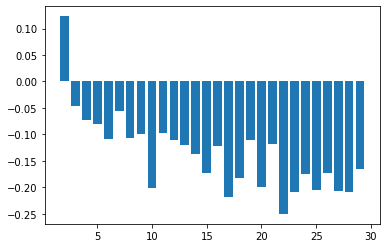

270-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 45s 341ms/step - loss: 0.6901 - val_loss: 0.6810
Epoch 2/100
132/132 [==============================] - 0s 418us/step - loss: 0.6747 - val_loss: 0.6581
Epoch 3/100
132/132 [==============================] - 0s 419us/step - loss: 0.6439 - val_loss: 0.6137
Epoch 4/100
132/132 [==============================] - 0s 420us/step - loss: 0.5900 - val_loss: 0.5370
Epoch 5/100
132/132 [==============================] - 0s 412us/step - loss: 0.5028 - val_loss: 0.4236
Epoch 6/100
132/132 [==============================] - 0s 406us/step - loss: 0.3923 - val_loss: 0.2878
Epoch 7/100
132/132 [==============================] - 0s 410us/step - loss: 0.2827 - val_loss: 0.1702
Epoch 8/100
132/132 [==============================] - 0s 415us/step - loss: 0.2059 - val_loss: 0.1064
Epoch 9/100
132/132 [==============================] - 0s 412us/step - loss: 0.1651 - val_loss: 0.0862
Epoch 10/100
132/

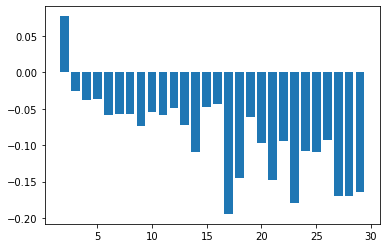

270-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 45s 342ms/step - loss: 0.6907 - val_loss: 0.6829
Epoch 2/100
132/132 [==============================] - 0s 424us/step - loss: 0.6776 - val_loss: 0.6633
Epoch 3/100
132/132 [==============================] - 0s 424us/step - loss: 0.6509 - val_loss: 0.6256
Epoch 4/100
132/132 [==============================] - 0s 413us/step - loss: 0.6035 - val_loss: 0.5588
Epoch 5/100
132/132 [==============================] - 0s 409us/step - loss: 0.5258 - val_loss: 0.4553
Epoch 6/100
132/132 [==============================] - 0s 412us/step - loss: 0.4206 - val_loss: 0.3235
Epoch 7/100
132/132 [==============================] - 0s 412us/step - loss: 0.3047 - val_loss: 0.1979
Epoch 8/100
132/132 [==============================] - 0s 414us/step - loss: 0.2183 - val_loss: 0.1190
Epoch 9/100
132/132 [==============================] - 0s 410us/step - loss: 0.1720 - val_loss: 0.0904
Epoch 10/100
132/

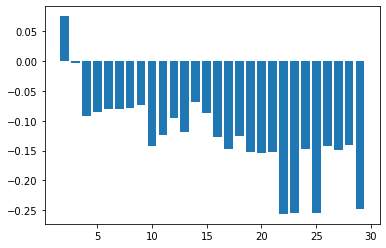

270-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 45s 342ms/step - loss: 0.6905 - val_loss: 0.6815
Epoch 2/100
132/132 [==============================] - 0s 423us/step - loss: 0.6759 - val_loss: 0.6598
Epoch 3/100
132/132 [==============================] - 0s 418us/step - loss: 0.6481 - val_loss: 0.6193
Epoch 4/100
132/132 [==============================] - 0s 417us/step - loss: 0.5983 - val_loss: 0.5510
Epoch 5/100
132/132 [==============================] - 0s 409us/step - loss: 0.5242 - val_loss: 0.4512
Epoch 6/100
132/132 [==============================] - 0s 419us/step - loss: 0.4197 - val_loss: 0.3281
Epoch 7/100
132/132 [==============================] - 0s 413us/step - loss: 0.3125 - val_loss: 0.2068
Epoch 8/100
132/132 [==============================] - 0s 412us/step - loss: 0.2259 - val_loss: 0.1256
Epoch 9/100
132/132 [==============================] - 0s 414us/step - loss: 0.1735 - val_loss: 0.0921
Epoch 10/100
132/

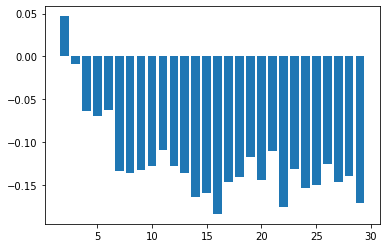

270-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 45s 342ms/step - loss: 0.6908 - val_loss: 0.6841
Epoch 2/100
132/132 [==============================] - 0s 429us/step - loss: 0.6789 - val_loss: 0.6668
Epoch 3/100
132/132 [==============================] - 0s 411us/step - loss: 0.6550 - val_loss: 0.6336
Epoch 4/100
132/132 [==============================] - 0s 412us/step - loss: 0.6113 - val_loss: 0.5758
Epoch 5/100
132/132 [==============================] - 0s 426us/step - loss: 0.5421 - val_loss: 0.4874
Epoch 6/100
132/132 [==============================] - 0s 416us/step - loss: 0.4471 - val_loss: 0.3721
Epoch 7/100
132/132 [==============================] - 0s 420us/step - loss: 0.3409 - val_loss: 0.2486
Epoch 8/100
132/132 [==============================] - 0s 414us/step - loss: 0.2472 - val_loss: 0.1543
Epoch 9/100
132/132 [==============================] - 0s 412us/step - loss: 0.1890 - val_loss: 0.1054
Epoch 10/100
132/

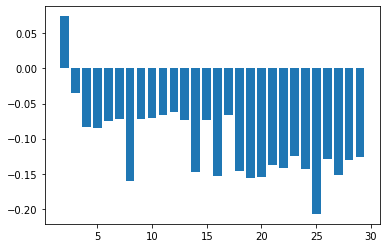

270-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 345ms/step - loss: 0.6908 - val_loss: 0.6835
Epoch 2/100
132/132 [==============================] - 0s 423us/step - loss: 0.6784 - val_loss: 0.6664
Epoch 3/100
132/132 [==============================] - 0s 409us/step - loss: 0.6549 - val_loss: 0.6355
Epoch 4/100
132/132 [==============================] - 0s 414us/step - loss: 0.6158 - val_loss: 0.5846
Epoch 5/100
132/132 [==============================] - 0s 413us/step - loss: 0.5546 - val_loss: 0.5090
Epoch 6/100
132/132 [==============================] - 0s 419us/step - loss: 0.4746 - val_loss: 0.4080
Epoch 7/100
132/132 [==============================] - 0s 412us/step - loss: 0.3755 - val_loss: 0.2946
Epoch 8/100
132/132 [==============================] - 0s 409us/step - loss: 0.2798 - val_loss: 0.1921
Epoch 9/100
132/132 [==============================] - 0s 410us/step - loss: 0.2080 - val_loss: 0.1248
Epoch 10/100
132/

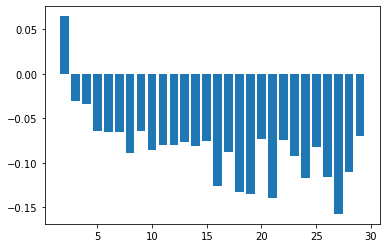

270-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 346ms/step - loss: 0.6911 - val_loss: 0.6858
Epoch 2/100
132/132 [==============================] - 0s 424us/step - loss: 0.6815 - val_loss: 0.6727
Epoch 3/100
132/132 [==============================] - 0s 416us/step - loss: 0.6632 - val_loss: 0.6486
Epoch 4/100
132/132 [==============================] - 0s 412us/step - loss: 0.6304 - val_loss: 0.6086
Epoch 5/100
132/132 [==============================] - 0s 417us/step - loss: 0.5816 - val_loss: 0.5477
Epoch 6/100
132/132 [==============================] - 0s 418us/step - loss: 0.5111 - val_loss: 0.4643
Epoch 7/100
132/132 [==============================] - 0s 420us/step - loss: 0.4264 - val_loss: 0.3620
Epoch 8/100
132/132 [==============================] - 0s 413us/step - loss: 0.3314 - val_loss: 0.2566
Epoch 9/100
132/132 [==============================] - 0s 419us/step - loss: 0.2498 - val_loss: 0.1702
Epoch 10/100
132/

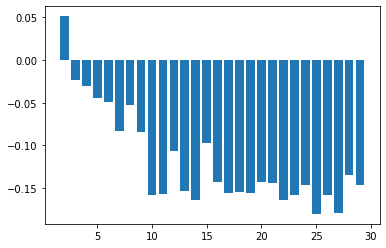

270-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 349ms/step - loss: 0.6924 - val_loss: 0.6891
Epoch 2/100
132/132 [==============================] - 0s 621us/step - loss: 0.6872 - val_loss: 0.6816
Epoch 3/100
132/132 [==============================] - 0s 415us/step - loss: 0.6765 - val_loss: 0.6678
Epoch 4/100
132/132 [==============================] - 0s 417us/step - loss: 0.6577 - val_loss: 0.6446
Epoch 5/100
132/132 [==============================] - 0s 422us/step - loss: 0.6278 - val_loss: 0.6088
Epoch 6/100
132/132 [==============================] - 0s 422us/step - loss: 0.5860 - val_loss: 0.5574
Epoch 7/100
132/132 [==============================] - 0s 413us/step - loss: 0.5289 - val_loss: 0.4895
Epoch 8/100
132/132 [==============================] - 0s 413us/step - loss: 0.4608 - val_loss: 0.4067
Epoch 9/100
132/132 [==============================] - 0s 417us/step - loss: 0.3858 - val_loss: 0.3169
Epoch 10/100
132/

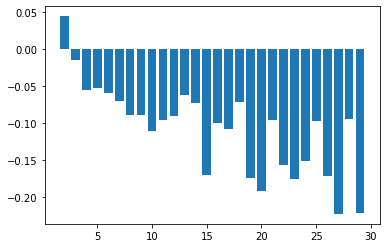

260-250dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 347ms/step - loss: 0.6907 - val_loss: 0.6785
Epoch 2/100
132/132 [==============================] - 0s 424us/step - loss: 0.6695 - val_loss: 0.6421
Epoch 3/100
132/132 [==============================] - 0s 417us/step - loss: 0.6207 - val_loss: 0.5623
Epoch 4/100
132/132 [==============================] - 0s 422us/step - loss: 0.5253 - val_loss: 0.4226
Epoch 5/100
132/132 [==============================] - 0s 414us/step - loss: 0.3871 - val_loss: 0.2487
Epoch 6/100
132/132 [==============================] - 0s 415us/step - loss: 0.2555 - val_loss: 0.1257
Epoch 7/100
132/132 [==============================] - 0s 415us/step - loss: 0.1854 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 418us/step - loss: 0.1653 - val_loss: 0.0886
Epoch 9/100
132/132 [==============================] - 0s 415us/step - loss: 0.1468 - val_loss: 0.0915
(165, 250)


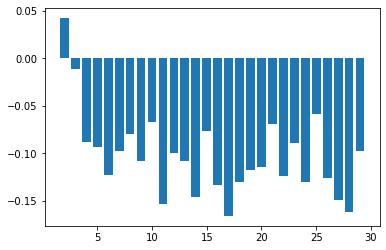

260-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 349ms/step - loss: 0.6883 - val_loss: 0.6754
Epoch 2/100
132/132 [==============================] - 0s 434us/step - loss: 0.6654 - val_loss: 0.6367
Epoch 3/100
132/132 [==============================] - 0s 416us/step - loss: 0.6135 - val_loss: 0.5544
Epoch 4/100
132/132 [==============================] - 0s 418us/step - loss: 0.5200 - val_loss: 0.4139
Epoch 5/100
132/132 [==============================] - 0s 421us/step - loss: 0.3764 - val_loss: 0.2448
Epoch 6/100
132/132 [==============================] - 0s 424us/step - loss: 0.2480 - val_loss: 0.1247
Epoch 7/100
132/132 [==============================] - 0s 421us/step - loss: 0.1809 - val_loss: 0.0889
Epoch 8/100
132/132 [==============================] - 0s 416us/step - loss: 0.1685 - val_loss: 0.0889
(165, 240)


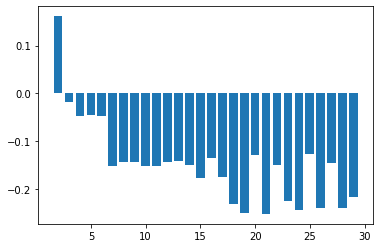

260-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 350ms/step - loss: 0.6870 - val_loss: 0.6704
Epoch 2/100
132/132 [==============================] - 0s 429us/step - loss: 0.6588 - val_loss: 0.6231
Epoch 3/100
132/132 [==============================] - 0s 416us/step - loss: 0.5989 - val_loss: 0.5273
Epoch 4/100
132/132 [==============================] - 0s 417us/step - loss: 0.4910 - val_loss: 0.3750
Epoch 5/100
132/132 [==============================] - 0s 417us/step - loss: 0.3476 - val_loss: 0.2108
Epoch 6/100
132/132 [==============================] - 0s 420us/step - loss: 0.2247 - val_loss: 0.1128
Epoch 7/100
132/132 [==============================] - 0s 417us/step - loss: 0.1754 - val_loss: 0.0901
Epoch 8/100
132/132 [==============================] - 0s 419us/step - loss: 0.1556 - val_loss: 0.0927
(165, 230)


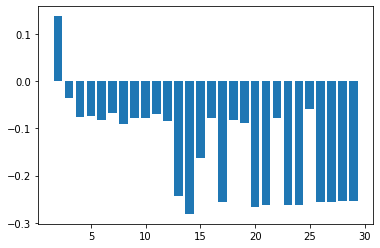

260-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 352ms/step - loss: 0.6885 - val_loss: 0.6737
Epoch 2/100
132/132 [==============================] - 0s 436us/step - loss: 0.6629 - val_loss: 0.6315
Epoch 3/100
132/132 [==============================] - 0s 418us/step - loss: 0.6095 - val_loss: 0.5439
Epoch 4/100
132/132 [==============================] - 0s 419us/step - loss: 0.5089 - val_loss: 0.3995
Epoch 5/100
132/132 [==============================] - 0s 420us/step - loss: 0.3665 - val_loss: 0.2317
Epoch 6/100
132/132 [==============================] - 0s 423us/step - loss: 0.2392 - val_loss: 0.1218
Epoch 7/100
132/132 [==============================] - 0s 419us/step - loss: 0.1827 - val_loss: 0.0915
Epoch 8/100
132/132 [==============================] - 0s 421us/step - loss: 0.1673 - val_loss: 0.0936
(165, 220)


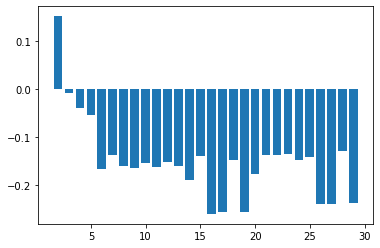

260-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 46s 351ms/step - loss: 0.6894 - val_loss: 0.6767
Epoch 2/100
132/132 [==============================] - 0s 432us/step - loss: 0.6682 - val_loss: 0.6405
Epoch 3/100
132/132 [==============================] - 0s 421us/step - loss: 0.6209 - val_loss: 0.5639
Epoch 4/100
132/132 [==============================] - 0s 426us/step - loss: 0.5293 - val_loss: 0.4318
Epoch 5/100
132/132 [==============================] - 0s 426us/step - loss: 0.4001 - val_loss: 0.2657
Epoch 6/100
132/132 [==============================] - 0s 428us/step - loss: 0.2684 - val_loss: 0.1398
Epoch 7/100
132/132 [==============================] - 0s 418us/step - loss: 0.1946 - val_loss: 0.0938
Epoch 8/100
132/132 [==============================] - 0s 420us/step - loss: 0.1622 - val_loss: 0.0889
Epoch 9/100
132/132 [==============================] - 0s 427us/step - loss: 0.1440 - val_loss: 0.0913
(165, 210)


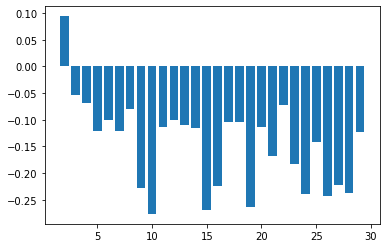

260-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 47s 355ms/step - loss: 0.6881 - val_loss: 0.6741
Epoch 2/100
132/132 [==============================] - 0s 435us/step - loss: 0.6636 - val_loss: 0.6334
Epoch 3/100
132/132 [==============================] - 0s 416us/step - loss: 0.6117 - val_loss: 0.5475
Epoch 4/100
132/132 [==============================] - 0s 416us/step - loss: 0.5128 - val_loss: 0.4050
Epoch 5/100
132/132 [==============================] - 0s 425us/step - loss: 0.3704 - val_loss: 0.2374
Epoch 6/100
132/132 [==============================] - 0s 420us/step - loss: 0.2482 - val_loss: 0.1242
Epoch 7/100
132/132 [==============================] - 0s 424us/step - loss: 0.1902 - val_loss: 0.0923
Epoch 8/100
132/132 [==============================] - 0s 424us/step - loss: 0.1657 - val_loss: 0.0927
(165, 200)


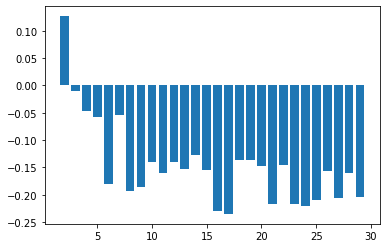

260-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 47s 355ms/step - loss: 0.6907 - val_loss: 0.6801
Epoch 2/100
132/132 [==============================] - 0s 436us/step - loss: 0.6721 - val_loss: 0.6515
Epoch 3/100
132/132 [==============================] - 0s 424us/step - loss: 0.6342 - val_loss: 0.5909
Epoch 4/100
132/132 [==============================] - 0s 430us/step - loss: 0.5589 - val_loss: 0.4805
Epoch 5/100
132/132 [==============================] - 0s 420us/step - loss: 0.4365 - val_loss: 0.3241
Epoch 6/100
132/132 [==============================] - 0s 427us/step - loss: 0.3024 - val_loss: 0.1760
Epoch 7/100
132/132 [==============================] - 0s 423us/step - loss: 0.2074 - val_loss: 0.1037
Epoch 8/100
132/132 [==============================] - 0s 431us/step - loss: 0.1681 - val_loss: 0.0898
Epoch 9/100
132/132 [==============================] - 0s 422us/step - loss: 0.1532 - val_loss: 0.0915
(165, 190)


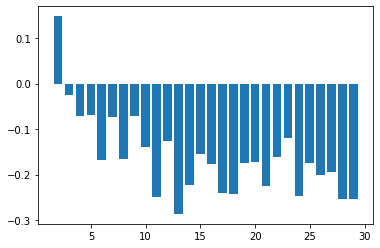

260-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 47s 358ms/step - loss: 0.6882 - val_loss: 0.6746
Epoch 2/100
132/132 [==============================] - 0s 442us/step - loss: 0.6638 - val_loss: 0.6354
Epoch 3/100
132/132 [==============================] - 0s 421us/step - loss: 0.6126 - val_loss: 0.5569
Epoch 4/100
132/132 [==============================] - 0s 426us/step - loss: 0.5161 - val_loss: 0.4275
Epoch 5/100
132/132 [==============================] - 0s 424us/step - loss: 0.3851 - val_loss: 0.2653
Epoch 6/100
132/132 [==============================] - 0s 427us/step - loss: 0.2599 - val_loss: 0.1405
Epoch 7/100
132/132 [==============================] - 0s 423us/step - loss: 0.1894 - val_loss: 0.0930
Epoch 8/100
132/132 [==============================] - 0s 423us/step - loss: 0.1672 - val_loss: 0.0867
Epoch 9/100
132/132 [==============================] - 0s 432us/step - loss: 0.1469 - val_loss: 0.0889
(165, 180)


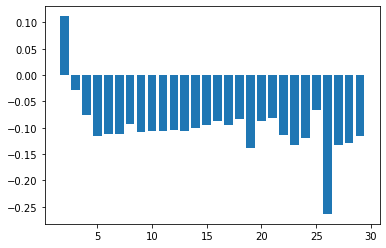

260-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 47s 357ms/step - loss: 0.6892 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 436us/step - loss: 0.6667 - val_loss: 0.6408
Epoch 3/100
132/132 [==============================] - 0s 430us/step - loss: 0.6174 - val_loss: 0.5674
Epoch 4/100
132/132 [==============================] - 0s 427us/step - loss: 0.5317 - val_loss: 0.4418
Epoch 5/100
132/132 [==============================] - 0s 424us/step - loss: 0.4054 - val_loss: 0.2808
Epoch 6/100
132/132 [==============================] - 0s 430us/step - loss: 0.2774 - val_loss: 0.1503
Epoch 7/100
132/132 [==============================] - 0s 421us/step - loss: 0.1908 - val_loss: 0.0948
Epoch 8/100
132/132 [==============================] - 0s 424us/step - loss: 0.1638 - val_loss: 0.0852
Epoch 9/100
132/132 [==============================] - 0s 423us/step - loss: 0.1445 - val_loss: 0.0878
(165, 170)


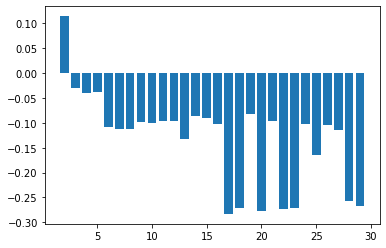

260-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 48s 360ms/step - loss: 0.6898 - val_loss: 0.6799
Epoch 2/100
132/132 [==============================] - 0s 443us/step - loss: 0.6720 - val_loss: 0.6521
Epoch 3/100
132/132 [==============================] - 0s 433us/step - loss: 0.6335 - val_loss: 0.5948
Epoch 4/100
132/132 [==============================] - 0s 425us/step - loss: 0.5620 - val_loss: 0.4933
Epoch 5/100
132/132 [==============================] - 0s 426us/step - loss: 0.4483 - val_loss: 0.3491
Epoch 6/100
132/132 [==============================] - 0s 425us/step - loss: 0.3185 - val_loss: 0.2028
Epoch 7/100
132/132 [==============================] - 0s 423us/step - loss: 0.2263 - val_loss: 0.1149
Epoch 8/100
132/132 [==============================] - 0s 434us/step - loss: 0.1822 - val_loss: 0.0900
Epoch 9/100
132/132 [==============================] - 0s 430us/step - loss: 0.1629 - val_loss: 0.0879
Epoch 10/100
132

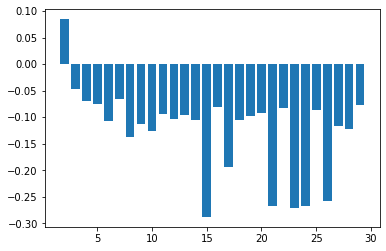

260-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 48s 363ms/step - loss: 0.6891 - val_loss: 0.6759
Epoch 2/100
132/132 [==============================] - 0s 438us/step - loss: 0.6664 - val_loss: 0.6404
Epoch 3/100
132/132 [==============================] - 0s 424us/step - loss: 0.6206 - val_loss: 0.5685
Epoch 4/100
132/132 [==============================] - 0s 421us/step - loss: 0.5365 - val_loss: 0.4470
Epoch 5/100
132/132 [==============================] - 0s 426us/step - loss: 0.4135 - val_loss: 0.2911
Epoch 6/100
132/132 [==============================] - 0s 422us/step - loss: 0.2867 - val_loss: 0.1590
Epoch 7/100
132/132 [==============================] - 0s 424us/step - loss: 0.2013 - val_loss: 0.0989
Epoch 8/100
132/132 [==============================] - 0s 420us/step - loss: 0.1660 - val_loss: 0.0874
Epoch 9/100
132/132 [==============================] - 0s 426us/step - loss: 0.1489 - val_loss: 0.0893
(165, 150)


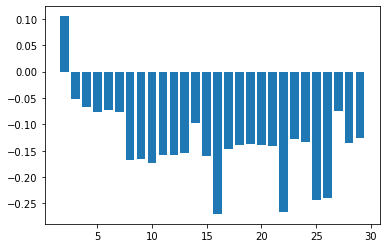

260-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 48s 363ms/step - loss: 0.6887 - val_loss: 0.6769
Epoch 2/100
132/132 [==============================] - 0s 438us/step - loss: 0.6670 - val_loss: 0.6445
Epoch 3/100
132/132 [==============================] - 0s 430us/step - loss: 0.6242 - val_loss: 0.5798
Epoch 4/100
132/132 [==============================] - 0s 429us/step - loss: 0.5454 - val_loss: 0.4699
Epoch 5/100
132/132 [==============================] - 0s 423us/step - loss: 0.4305 - val_loss: 0.3218
Epoch 6/100
132/132 [==============================] - 0s 426us/step - loss: 0.3010 - val_loss: 0.1838
Epoch 7/100
132/132 [==============================] - 0s 424us/step - loss: 0.2067 - val_loss: 0.1083
Epoch 8/100
132/132 [==============================] - 0s 427us/step - loss: 0.1678 - val_loss: 0.0894
Epoch 9/100
132/132 [==============================] - 0s 432us/step - loss: 0.1474 - val_loss: 0.0901
(165, 140)


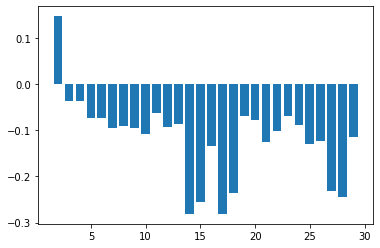

260-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 48s 362ms/step - loss: 0.6903 - val_loss: 0.6791
Epoch 2/100
132/132 [==============================] - 0s 450us/step - loss: 0.6726 - val_loss: 0.6516
Epoch 3/100
132/132 [==============================] - 0s 425us/step - loss: 0.6363 - val_loss: 0.5968
Epoch 4/100
132/132 [==============================] - 0s 423us/step - loss: 0.5702 - val_loss: 0.5001
Epoch 5/100
132/132 [==============================] - 0s 429us/step - loss: 0.4707 - val_loss: 0.3618
Epoch 6/100
132/132 [==============================] - 0s 425us/step - loss: 0.3451 - val_loss: 0.2192
Epoch 7/100
132/132 [==============================] - 0s 424us/step - loss: 0.2366 - val_loss: 0.1240
Epoch 8/100
132/132 [==============================] - 0s 429us/step - loss: 0.1774 - val_loss: 0.0901
Epoch 9/100
132/132 [==============================] - 0s 436us/step - loss: 0.1535 - val_loss: 0.0867
Epoch 10/100
132

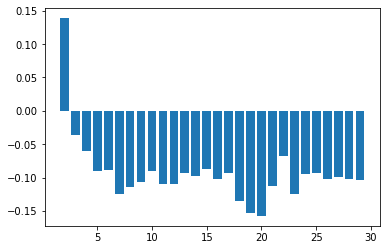

260-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 48s 364ms/step - loss: 0.6885 - val_loss: 0.6766
Epoch 2/100
132/132 [==============================] - 0s 437us/step - loss: 0.6673 - val_loss: 0.6449
Epoch 3/100
132/132 [==============================] - 0s 426us/step - loss: 0.6236 - val_loss: 0.5824
Epoch 4/100
132/132 [==============================] - 0s 428us/step - loss: 0.5474 - val_loss: 0.4763
Epoch 5/100
132/132 [==============================] - 0s 424us/step - loss: 0.4309 - val_loss: 0.3323
Epoch 6/100
132/132 [==============================] - 0s 427us/step - loss: 0.3029 - val_loss: 0.1927
Epoch 7/100
132/132 [==============================] - 0s 428us/step - loss: 0.2148 - val_loss: 0.1125
Epoch 8/100
132/132 [==============================] - 0s 428us/step - loss: 0.1785 - val_loss: 0.0893
Epoch 9/100
132/132 [==============================] - 0s 424us/step - loss: 0.1578 - val_loss: 0.0880
Epoch 10/100
132

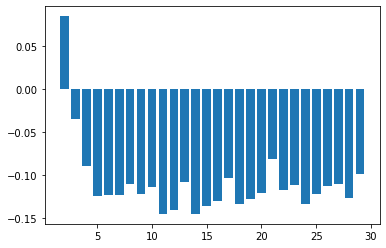

260-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 48s 365ms/step - loss: 0.6895 - val_loss: 0.6782
Epoch 2/100
132/132 [==============================] - 0s 437us/step - loss: 0.6715 - val_loss: 0.6503
Epoch 3/100
132/132 [==============================] - 0s 427us/step - loss: 0.6346 - val_loss: 0.5956
Epoch 4/100
132/132 [==============================] - 0s 426us/step - loss: 0.5660 - val_loss: 0.5006
Epoch 5/100
132/132 [==============================] - 0s 435us/step - loss: 0.4640 - val_loss: 0.3637
Epoch 6/100
132/132 [==============================] - 0s 431us/step - loss: 0.3338 - val_loss: 0.2192
Epoch 7/100
132/132 [==============================] - 0s 426us/step - loss: 0.2316 - val_loss: 0.1238
Epoch 8/100
132/132 [==============================] - 0s 427us/step - loss: 0.1784 - val_loss: 0.0914
Epoch 9/100
132/132 [==============================] - 0s 431us/step - loss: 0.1536 - val_loss: 0.0870
Epoch 10/100
132

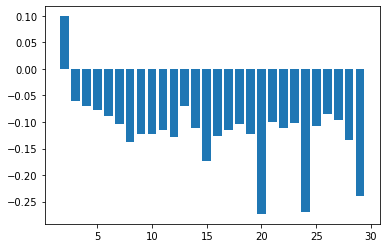

260-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 48s 366ms/step - loss: 0.6897 - val_loss: 0.6793
Epoch 2/100
132/132 [==============================] - 0s 446us/step - loss: 0.6733 - val_loss: 0.6532
Epoch 3/100
132/132 [==============================] - 0s 431us/step - loss: 0.6388 - val_loss: 0.6023
Epoch 4/100
132/132 [==============================] - 0s 425us/step - loss: 0.5756 - val_loss: 0.5140
Epoch 5/100
132/132 [==============================] - 0s 438us/step - loss: 0.4785 - val_loss: 0.3846
Epoch 6/100
132/132 [==============================] - 0s 440us/step - loss: 0.3606 - val_loss: 0.2398
Epoch 7/100
132/132 [==============================] - 0s 434us/step - loss: 0.2503 - val_loss: 0.1345
Epoch 8/100
132/132 [==============================] - 0s 440us/step - loss: 0.1857 - val_loss: 0.0912
Epoch 9/100
132/132 [==============================] - 0s 429us/step - loss: 0.1616 - val_loss: 0.0835
Epoch 10/100
132

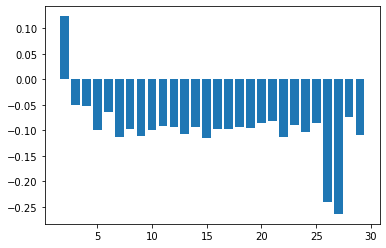

260-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 369ms/step - loss: 0.6898 - val_loss: 0.6798
Epoch 2/100
132/132 [==============================] - 0s 444us/step - loss: 0.6718 - val_loss: 0.6543
Epoch 3/100
132/132 [==============================] - 0s 429us/step - loss: 0.6375 - val_loss: 0.6051
Epoch 4/100
132/132 [==============================] - 0s 433us/step - loss: 0.5748 - val_loss: 0.5209
Epoch 5/100
132/132 [==============================] - 0s 433us/step - loss: 0.4791 - val_loss: 0.3986
Epoch 6/100
132/132 [==============================] - 0s 430us/step - loss: 0.3592 - val_loss: 0.2590
Epoch 7/100
132/132 [==============================] - 0s 434us/step - loss: 0.2617 - val_loss: 0.1494
Epoch 8/100
132/132 [==============================] - 0s 434us/step - loss: 0.1963 - val_loss: 0.1014
Epoch 9/100
132/132 [==============================] - 0s 435us/step - loss: 0.1712 - val_loss: 0.0882
Epoch 10/100
132/

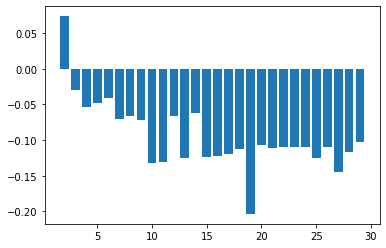

260-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 368ms/step - loss: 0.6905 - val_loss: 0.6811
Epoch 2/100
132/132 [==============================] - 0s 441us/step - loss: 0.6742 - val_loss: 0.6578
Epoch 3/100
132/132 [==============================] - 0s 431us/step - loss: 0.6425 - val_loss: 0.6131
Epoch 4/100
132/132 [==============================] - 0s 430us/step - loss: 0.5857 - val_loss: 0.5347
Epoch 5/100
132/132 [==============================] - 0s 429us/step - loss: 0.4985 - val_loss: 0.4174
Epoch 6/100
132/132 [==============================] - 0s 437us/step - loss: 0.3821 - val_loss: 0.2790
Epoch 7/100
132/132 [==============================] - 0s 432us/step - loss: 0.2806 - val_loss: 0.1618
Epoch 8/100
132/132 [==============================] - 0s 427us/step - loss: 0.2056 - val_loss: 0.1033
Epoch 9/100
132/132 [==============================] - 0s 428us/step - loss: 0.1697 - val_loss: 0.0855
Epoch 10/100
132/

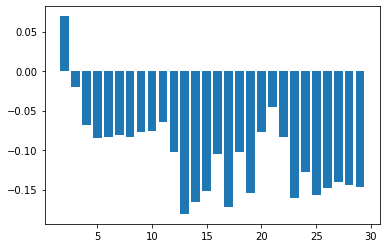

260-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 369ms/step - loss: 0.6907 - val_loss: 0.6826
Epoch 2/100
132/132 [==============================] - 0s 451us/step - loss: 0.6772 - val_loss: 0.6631
Epoch 3/100
132/132 [==============================] - 0s 440us/step - loss: 0.6496 - val_loss: 0.6261
Epoch 4/100
132/132 [==============================] - 0s 432us/step - loss: 0.6026 - val_loss: 0.5608
Epoch 5/100
132/132 [==============================] - 0s 438us/step - loss: 0.5253 - val_loss: 0.4593
Epoch 6/100
132/132 [==============================] - 0s 432us/step - loss: 0.4242 - val_loss: 0.3289
Epoch 7/100
132/132 [==============================] - 0s 432us/step - loss: 0.3112 - val_loss: 0.2042
Epoch 8/100
132/132 [==============================] - 0s 435us/step - loss: 0.2259 - val_loss: 0.1250
Epoch 9/100
132/132 [==============================] - 0s 435us/step - loss: 0.1776 - val_loss: 0.0948
Epoch 10/100
132/

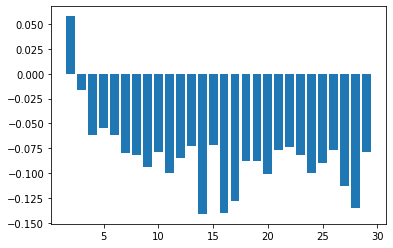

260-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 373ms/step - loss: 0.6910 - val_loss: 0.6838
Epoch 2/100
132/132 [==============================] - 0s 445us/step - loss: 0.6790 - val_loss: 0.6664
Epoch 3/100
132/132 [==============================] - 0s 435us/step - loss: 0.6555 - val_loss: 0.6329
Epoch 4/100
132/132 [==============================] - 0s 431us/step - loss: 0.6126 - val_loss: 0.5735
Epoch 5/100
132/132 [==============================] - 0s 429us/step - loss: 0.5441 - val_loss: 0.4805
Epoch 6/100
132/132 [==============================] - 0s 433us/step - loss: 0.4461 - val_loss: 0.3582
Epoch 7/100
132/132 [==============================] - 0s 432us/step - loss: 0.3360 - val_loss: 0.2322
Epoch 8/100
132/132 [==============================] - 0s 429us/step - loss: 0.2342 - val_loss: 0.1444
Epoch 9/100
132/132 [==============================] - 0s 431us/step - loss: 0.1777 - val_loss: 0.1006
Epoch 10/100
132/

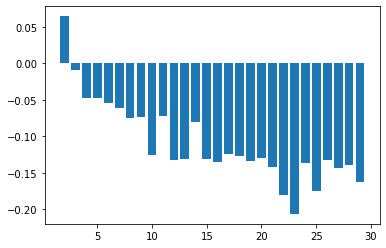

260-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 373ms/step - loss: 0.6911 - val_loss: 0.6830
Epoch 2/100
132/132 [==============================] - 0s 449us/step - loss: 0.6775 - val_loss: 0.6632
Epoch 3/100
132/132 [==============================] - 0s 437us/step - loss: 0.6508 - val_loss: 0.6257
Epoch 4/100
132/132 [==============================] - 0s 433us/step - loss: 0.6041 - val_loss: 0.5618
Epoch 5/100
132/132 [==============================] - 0s 434us/step - loss: 0.5305 - val_loss: 0.4666
Epoch 6/100
132/132 [==============================] - 0s 439us/step - loss: 0.4307 - val_loss: 0.3452
Epoch 7/100
132/132 [==============================] - 0s 433us/step - loss: 0.3265 - val_loss: 0.2223
Epoch 8/100
132/132 [==============================] - 0s 439us/step - loss: 0.2370 - val_loss: 0.1361
Epoch 9/100
132/132 [==============================] - 0s 439us/step - loss: 0.1789 - val_loss: 0.0977
Epoch 10/100
132/

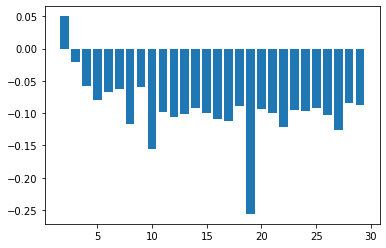

260-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 371ms/step - loss: 0.6913 - val_loss: 0.6845
Epoch 2/100
132/132 [==============================] - 0s 450us/step - loss: 0.6805 - val_loss: 0.6689
Epoch 3/100
132/132 [==============================] - 0s 434us/step - loss: 0.6597 - val_loss: 0.6408
Epoch 4/100
132/132 [==============================] - 0s 436us/step - loss: 0.6229 - val_loss: 0.5923
Epoch 5/100
132/132 [==============================] - 0s 436us/step - loss: 0.5642 - val_loss: 0.5162
Epoch 6/100
132/132 [==============================] - 0s 440us/step - loss: 0.4824 - val_loss: 0.4114
Epoch 7/100
132/132 [==============================] - 0s 435us/step - loss: 0.3842 - val_loss: 0.2907
Epoch 8/100
132/132 [==============================] - 0s 432us/step - loss: 0.2813 - val_loss: 0.1868
Epoch 9/100
132/132 [==============================] - 0s 435us/step - loss: 0.2090 - val_loss: 0.1215
Epoch 10/100
132/

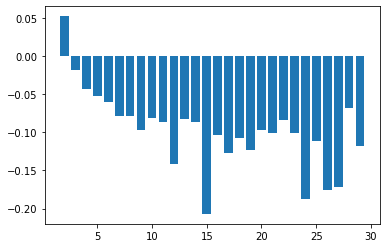

260-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 372ms/step - loss: 0.6904 - val_loss: 0.6834
Epoch 2/100
132/132 [==============================] - 0s 444us/step - loss: 0.6784 - val_loss: 0.6664
Epoch 3/100
132/132 [==============================] - 0s 435us/step - loss: 0.6560 - val_loss: 0.6355
Epoch 4/100
132/132 [==============================] - 0s 437us/step - loss: 0.6173 - val_loss: 0.5843
Epoch 5/100
132/132 [==============================] - 0s 434us/step - loss: 0.5567 - val_loss: 0.5075
Epoch 6/100
132/132 [==============================] - 0s 433us/step - loss: 0.4729 - val_loss: 0.4055
Epoch 7/100
132/132 [==============================] - 0s 439us/step - loss: 0.3753 - val_loss: 0.2913
Epoch 8/100
132/132 [==============================] - 0s 439us/step - loss: 0.2841 - val_loss: 0.1911
Epoch 9/100
132/132 [==============================] - 0s 448us/step - loss: 0.2145 - val_loss: 0.1277
Epoch 10/100
132/

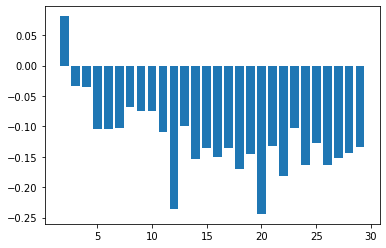

260-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 50s 379ms/step - loss: 0.6912 - val_loss: 0.6858
Epoch 2/100
132/132 [==============================] - 0s 451us/step - loss: 0.6818 - val_loss: 0.6731
Epoch 3/100
132/132 [==============================] - 0s 439us/step - loss: 0.6638 - val_loss: 0.6509
Epoch 4/100
132/132 [==============================] - 0s 441us/step - loss: 0.6345 - val_loss: 0.6146
Epoch 5/100
132/132 [==============================] - 0s 437us/step - loss: 0.5896 - val_loss: 0.5607
Epoch 6/100
132/132 [==============================] - 0s 435us/step - loss: 0.5269 - val_loss: 0.4870
Epoch 7/100
132/132 [==============================] - 0s 437us/step - loss: 0.4520 - val_loss: 0.3942
Epoch 8/100
132/132 [==============================] - 0s 435us/step - loss: 0.3657 - val_loss: 0.2946
Epoch 9/100
132/132 [==============================] - 0s 438us/step - loss: 0.2823 - val_loss: 0.2057
Epoch 10/100
132/

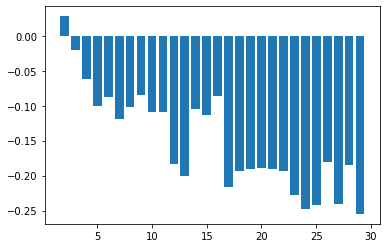

260-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 49s 375ms/step - loss: 0.6919 - val_loss: 0.6882
Epoch 2/100
132/132 [==============================] - 0s 450us/step - loss: 0.6856 - val_loss: 0.6791
Epoch 3/100
132/132 [==============================] - 0s 435us/step - loss: 0.6724 - val_loss: 0.6636
Epoch 4/100
132/132 [==============================] - 0s 442us/step - loss: 0.6513 - val_loss: 0.6387
Epoch 5/100
132/132 [==============================] - 0s 446us/step - loss: 0.6189 - val_loss: 0.6018
Epoch 6/100
132/132 [==============================] - 0s 437us/step - loss: 0.5757 - val_loss: 0.5506
Epoch 7/100
132/132 [==============================] - 0s 439us/step - loss: 0.5183 - val_loss: 0.4849
Epoch 8/100
132/132 [==============================] - 0s 439us/step - loss: 0.4506 - val_loss: 0.4058
Epoch 9/100
132/132 [==============================] - 0s 441us/step - loss: 0.3768 - val_loss: 0.3190
Epoch 10/100
132/

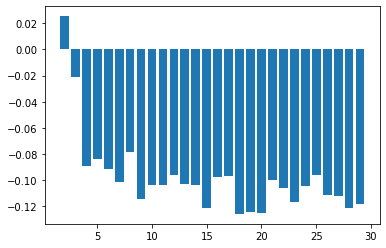

250-240dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 50s 380ms/step - loss: 0.6888 - val_loss: 0.6753
Epoch 2/100
132/132 [==============================] - 0s 448us/step - loss: 0.6653 - val_loss: 0.6353
Epoch 3/100
132/132 [==============================] - 0s 441us/step - loss: 0.6132 - val_loss: 0.5517
Epoch 4/100
132/132 [==============================] - 0s 438us/step - loss: 0.5170 - val_loss: 0.4117
Epoch 5/100
132/132 [==============================] - 0s 448us/step - loss: 0.3831 - val_loss: 0.2449
Epoch 6/100
132/132 [==============================] - 0s 444us/step - loss: 0.2566 - val_loss: 0.1278
Epoch 7/100
132/132 [==============================] - 0s 442us/step - loss: 0.1903 - val_loss: 0.0909
Epoch 8/100
132/132 [==============================] - 0s 441us/step - loss: 0.1723 - val_loss: 0.0897
Epoch 9/100
132/132 [==============================] - 0s 437us/step - loss: 0.1537 - val_loss: 0.0927
(165, 240)


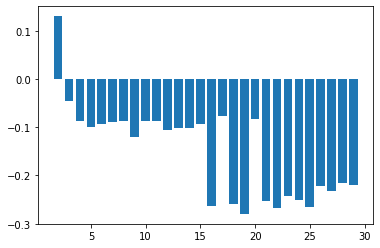

250-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 50s 382ms/step - loss: 0.6901 - val_loss: 0.6777
Epoch 2/100
132/132 [==============================] - 0s 454us/step - loss: 0.6677 - val_loss: 0.6423
Epoch 3/100
132/132 [==============================] - 0s 438us/step - loss: 0.6207 - val_loss: 0.5672
Epoch 4/100
132/132 [==============================] - 0s 443us/step - loss: 0.5320 - val_loss: 0.4372
Epoch 5/100
132/132 [==============================] - 0s 440us/step - loss: 0.3956 - val_loss: 0.2712
Epoch 6/100
132/132 [==============================] - 0s 454us/step - loss: 0.2696 - val_loss: 0.1413
Epoch 7/100
132/132 [==============================] - 0s 443us/step - loss: 0.1889 - val_loss: 0.0936
Epoch 8/100
132/132 [==============================] - 0s 440us/step - loss: 0.1669 - val_loss: 0.0881
Epoch 9/100
132/132 [==============================] - 0s 442us/step - loss: 0.1499 - val_loss: 0.0916
(165, 230)


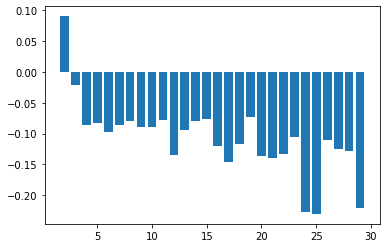

250-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 50s 381ms/step - loss: 0.6900 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 449us/step - loss: 0.6694 - val_loss: 0.6460
Epoch 3/100
132/132 [==============================] - 0s 441us/step - loss: 0.6252 - val_loss: 0.5764
Epoch 4/100
132/132 [==============================] - 0s 439us/step - loss: 0.5400 - val_loss: 0.4519
Epoch 5/100
132/132 [==============================] - 0s 439us/step - loss: 0.4128 - val_loss: 0.2863
Epoch 6/100
132/132 [==============================] - 0s 435us/step - loss: 0.2794 - val_loss: 0.1491
Epoch 7/100
132/132 [==============================] - 0s 449us/step - loss: 0.1948 - val_loss: 0.0940
Epoch 8/100
132/132 [==============================] - 0s 444us/step - loss: 0.1698 - val_loss: 0.0873
Epoch 9/100
132/132 [==============================] - 0s 441us/step - loss: 0.1523 - val_loss: 0.0911
(165, 220)


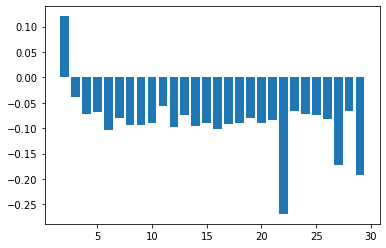

250-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 50s 380ms/step - loss: 0.6880 - val_loss: 0.6753
Epoch 2/100
132/132 [==============================] - 0s 454us/step - loss: 0.6654 - val_loss: 0.6382
Epoch 3/100
132/132 [==============================] - 0s 444us/step - loss: 0.6167 - val_loss: 0.5602
Epoch 4/100
132/132 [==============================] - 0s 443us/step - loss: 0.5226 - val_loss: 0.4269
Epoch 5/100
132/132 [==============================] - 0s 443us/step - loss: 0.3908 - val_loss: 0.2618
Epoch 6/100
132/132 [==============================] - 0s 443us/step - loss: 0.2610 - val_loss: 0.1369
Epoch 7/100
132/132 [==============================] - 0s 442us/step - loss: 0.2024 - val_loss: 0.0914
Epoch 8/100
132/132 [==============================] - 0s 436us/step - loss: 0.1766 - val_loss: 0.0878
Epoch 9/100
132/132 [==============================] - 0s 440us/step - loss: 0.1527 - val_loss: 0.0901
(165, 210)


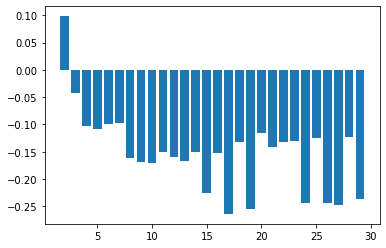

250-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 51s 386ms/step - loss: 0.6883 - val_loss: 0.6735
Epoch 2/100
132/132 [==============================] - 0s 454us/step - loss: 0.6625 - val_loss: 0.6309
Epoch 3/100
132/132 [==============================] - 0s 445us/step - loss: 0.6072 - val_loss: 0.5444
Epoch 4/100
132/132 [==============================] - 0s 450us/step - loss: 0.5058 - val_loss: 0.4039
Epoch 5/100
132/132 [==============================] - 0s 443us/step - loss: 0.3647 - val_loss: 0.2396
Epoch 6/100
132/132 [==============================] - 0s 445us/step - loss: 0.2513 - val_loss: 0.1268
Epoch 7/100
132/132 [==============================] - 0s 444us/step - loss: 0.1817 - val_loss: 0.0924
Epoch 8/100
132/132 [==============================] - 0s 445us/step - loss: 0.1588 - val_loss: 0.0895
Epoch 9/100
132/132 [==============================] - 0s 444us/step - loss: 0.1440 - val_loss: 0.0922
(165, 200)


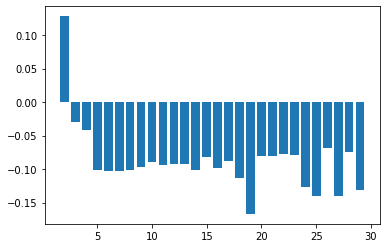

250-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 51s 384ms/step - loss: 0.6912 - val_loss: 0.6799
Epoch 2/100
132/132 [==============================] - 0s 456us/step - loss: 0.6726 - val_loss: 0.6520
Epoch 3/100
132/132 [==============================] - 0s 443us/step - loss: 0.6344 - val_loss: 0.5943
Epoch 4/100
132/132 [==============================] - 0s 445us/step - loss: 0.5617 - val_loss: 0.4903
Epoch 5/100
132/132 [==============================] - 0s 443us/step - loss: 0.4482 - val_loss: 0.3417
Epoch 6/100
132/132 [==============================] - 0s 442us/step - loss: 0.3164 - val_loss: 0.1946
Epoch 7/100
132/132 [==============================] - 0s 441us/step - loss: 0.2231 - val_loss: 0.1111
Epoch 8/100
132/132 [==============================] - 0s 444us/step - loss: 0.1773 - val_loss: 0.0901
Epoch 9/100
132/132 [==============================] - 0s 442us/step - loss: 0.1604 - val_loss: 0.0896
Epoch 10/100
132

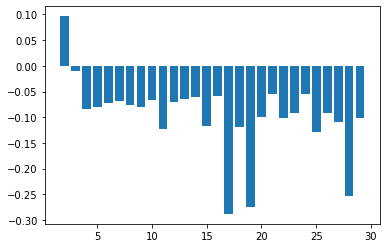

250-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 51s 389ms/step - loss: 0.6901 - val_loss: 0.6782
Epoch 2/100
132/132 [==============================] - 0s 457us/step - loss: 0.6700 - val_loss: 0.6467
Epoch 3/100
132/132 [==============================] - 0s 446us/step - loss: 0.6282 - val_loss: 0.5813
Epoch 4/100
132/132 [==============================] - 0s 447us/step - loss: 0.5498 - val_loss: 0.4659
Epoch 5/100
132/132 [==============================] - 0s 445us/step - loss: 0.4263 - val_loss: 0.3092
Epoch 6/100
132/132 [==============================] - 0s 444us/step - loss: 0.3007 - val_loss: 0.1678
Epoch 7/100
132/132 [==============================] - 0s 447us/step - loss: 0.2158 - val_loss: 0.0998
Epoch 8/100
132/132 [==============================] - 0s 455us/step - loss: 0.1789 - val_loss: 0.0865
Epoch 9/100
132/132 [==============================] - 0s 446us/step - loss: 0.1520 - val_loss: 0.0877
(165, 180)


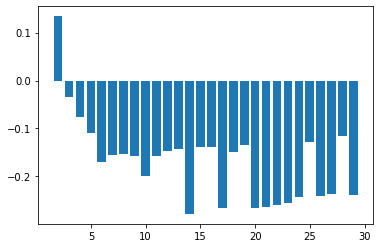

250-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 51s 385ms/step - loss: 0.6900 - val_loss: 0.6791
Epoch 2/100
132/132 [==============================] - 0s 463us/step - loss: 0.6720 - val_loss: 0.6495
Epoch 3/100
132/132 [==============================] - 0s 444us/step - loss: 0.6324 - val_loss: 0.5897
Epoch 4/100
132/132 [==============================] - 0s 448us/step - loss: 0.5604 - val_loss: 0.4852
Epoch 5/100
132/132 [==============================] - 0s 440us/step - loss: 0.4515 - val_loss: 0.3366
Epoch 6/100
132/132 [==============================] - 0s 449us/step - loss: 0.3218 - val_loss: 0.1899
Epoch 7/100
132/132 [==============================] - 0s 445us/step - loss: 0.2197 - val_loss: 0.1072
Epoch 8/100
132/132 [==============================] - 0s 442us/step - loss: 0.1688 - val_loss: 0.0853
Epoch 9/100
132/132 [==============================] - 0s 455us/step - loss: 0.1520 - val_loss: 0.0851
Epoch 10/100
132

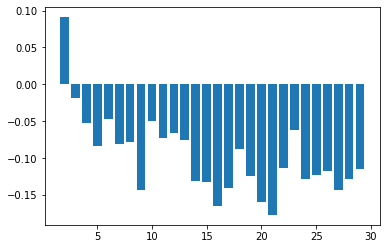

250-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 51s 388ms/step - loss: 0.6890 - val_loss: 0.6772
Epoch 2/100
132/132 [==============================] - 0s 464us/step - loss: 0.6689 - val_loss: 0.6451
Epoch 3/100
132/132 [==============================] - 0s 444us/step - loss: 0.6268 - val_loss: 0.5803
Epoch 4/100
132/132 [==============================] - 0s 445us/step - loss: 0.5490 - val_loss: 0.4671
Epoch 5/100
132/132 [==============================] - 0s 447us/step - loss: 0.4286 - val_loss: 0.3121
Epoch 6/100
132/132 [==============================] - 0s 446us/step - loss: 0.3036 - val_loss: 0.1718
Epoch 7/100
132/132 [==============================] - 0s 449us/step - loss: 0.2146 - val_loss: 0.1020
Epoch 8/100
132/132 [==============================] - 0s 456us/step - loss: 0.1775 - val_loss: 0.0873
Epoch 9/100
132/132 [==============================] - 0s 454us/step - loss: 0.1655 - val_loss: 0.0887
(165, 160)


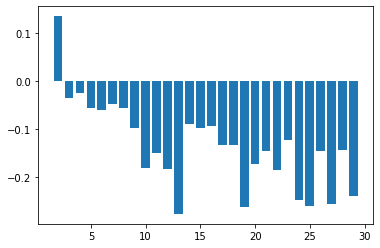

250-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 51s 389ms/step - loss: 0.6898 - val_loss: 0.6789
Epoch 2/100
132/132 [==============================] - 0s 463us/step - loss: 0.6719 - val_loss: 0.6511
Epoch 3/100
132/132 [==============================] - 0s 444us/step - loss: 0.6349 - val_loss: 0.5955
Epoch 4/100
132/132 [==============================] - 0s 448us/step - loss: 0.5682 - val_loss: 0.4976
Epoch 5/100
132/132 [==============================] - 0s 448us/step - loss: 0.4625 - val_loss: 0.3571
Epoch 6/100
132/132 [==============================] - 0s 447us/step - loss: 0.3356 - val_loss: 0.2116
Epoch 7/100
132/132 [==============================] - 0s 451us/step - loss: 0.2348 - val_loss: 0.1207
Epoch 8/100
132/132 [==============================] - 0s 448us/step - loss: 0.1811 - val_loss: 0.0925
Epoch 9/100
132/132 [==============================] - 0s 441us/step - loss: 0.1647 - val_loss: 0.0897
Epoch 10/100
132

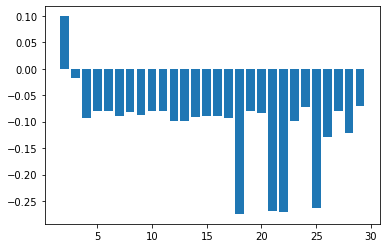

250-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 52s 392ms/step - loss: 0.6894 - val_loss: 0.6780
Epoch 2/100
132/132 [==============================] - 0s 456us/step - loss: 0.6698 - val_loss: 0.6488
Epoch 3/100
132/132 [==============================] - 0s 447us/step - loss: 0.6305 - val_loss: 0.5895
Epoch 4/100
132/132 [==============================] - 0s 445us/step - loss: 0.5585 - val_loss: 0.4856
Epoch 5/100
132/132 [==============================] - 0s 455us/step - loss: 0.4525 - val_loss: 0.3407
Epoch 6/100
132/132 [==============================] - 0s 452us/step - loss: 0.3245 - val_loss: 0.1989
Epoch 7/100
132/132 [==============================] - 0s 450us/step - loss: 0.2220 - val_loss: 0.1135
Epoch 8/100
132/132 [==============================] - 0s 447us/step - loss: 0.1817 - val_loss: 0.0880
Epoch 9/100
132/132 [==============================] - 0s 448us/step - loss: 0.1614 - val_loss: 0.0867
Epoch 10/100
132

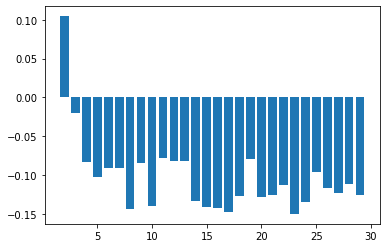

250-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 52s 390ms/step - loss: 0.6907 - val_loss: 0.6809
Epoch 2/100
132/132 [==============================] - 0s 461us/step - loss: 0.6750 - val_loss: 0.6566
Epoch 3/100
132/132 [==============================] - 0s 450us/step - loss: 0.6420 - val_loss: 0.6074
Epoch 4/100
132/132 [==============================] - 0s 446us/step - loss: 0.5817 - val_loss: 0.5185
Epoch 5/100
132/132 [==============================] - 0s 446us/step - loss: 0.4808 - val_loss: 0.3843
Epoch 6/100
132/132 [==============================] - 0s 454us/step - loss: 0.3553 - val_loss: 0.2341
Epoch 7/100
132/132 [==============================] - 0s 448us/step - loss: 0.2474 - val_loss: 0.1301
Epoch 8/100
132/132 [==============================] - 0s 452us/step - loss: 0.1888 - val_loss: 0.0934
Epoch 9/100
132/132 [==============================] - 0s 621us/step - loss: 0.1657 - val_loss: 0.0888
Epoch 10/100
132

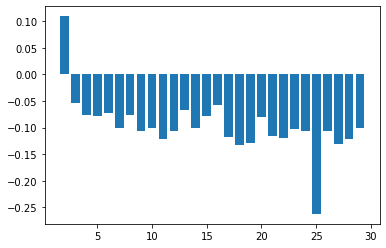

250-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 52s 394ms/step - loss: 0.6903 - val_loss: 0.6796
Epoch 2/100
132/132 [==============================] - 0s 467us/step - loss: 0.6729 - val_loss: 0.6528
Epoch 3/100
132/132 [==============================] - 0s 456us/step - loss: 0.6364 - val_loss: 0.6011
Epoch 4/100
132/132 [==============================] - 0s 661us/step - loss: 0.5723 - val_loss: 0.5118
Epoch 5/100
132/132 [==============================] - 0s 455us/step - loss: 0.4736 - val_loss: 0.3822
Epoch 6/100
132/132 [==============================] - 0s 454us/step - loss: 0.3562 - val_loss: 0.2398
Epoch 7/100
132/132 [==============================] - 0s 448us/step - loss: 0.2525 - val_loss: 0.1371
Epoch 8/100
132/132 [==============================] - 0s 446us/step - loss: 0.1880 - val_loss: 0.0961
Epoch 9/100
132/132 [==============================] - 0s 534us/step - loss: 0.1630 - val_loss: 0.0879
Epoch 10/100
132

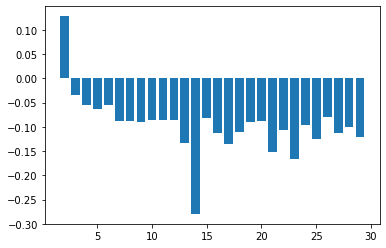

250-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 52s 394ms/step - loss: 0.6900 - val_loss: 0.6799
Epoch 2/100
132/132 [==============================] - 0s 465us/step - loss: 0.6739 - val_loss: 0.6544
Epoch 3/100
132/132 [==============================] - 0s 450us/step - loss: 0.6401 - val_loss: 0.6031
Epoch 4/100
132/132 [==============================] - 0s 449us/step - loss: 0.5754 - val_loss: 0.5133
Epoch 5/100
132/132 [==============================] - 0s 688us/step - loss: 0.4767 - val_loss: 0.3826
Epoch 6/100
132/132 [==============================] - 0s 482us/step - loss: 0.3631 - val_loss: 0.2396
Epoch 7/100
132/132 [==============================] - 0s 449us/step - loss: 0.2543 - val_loss: 0.1400
Epoch 8/100
132/132 [==============================] - 0s 451us/step - loss: 0.1850 - val_loss: 0.0991
Epoch 9/100
132/132 [==============================] - 0s 449us/step - loss: 0.1581 - val_loss: 0.0895
Epoch 10/100
132

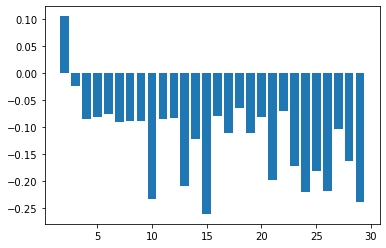

250-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 52s 396ms/step - loss: 0.6898 - val_loss: 0.6795
Epoch 2/100
132/132 [==============================] - 0s 478us/step - loss: 0.6729 - val_loss: 0.6541
Epoch 3/100
132/132 [==============================] - 0s 454us/step - loss: 0.6378 - val_loss: 0.6044
Epoch 4/100
132/132 [==============================] - 0s 447us/step - loss: 0.5779 - val_loss: 0.5175
Epoch 5/100
132/132 [==============================] - 0s 451us/step - loss: 0.4801 - val_loss: 0.3911
Epoch 6/100
132/132 [==============================] - 0s 454us/step - loss: 0.3597 - val_loss: 0.2491
Epoch 7/100
132/132 [==============================] - 0s 448us/step - loss: 0.2453 - val_loss: 0.1431
Epoch 8/100
132/132 [==============================] - 0s 448us/step - loss: 0.1857 - val_loss: 0.0974
Epoch 9/100
132/132 [==============================] - 0s 452us/step - loss: 0.1605 - val_loss: 0.0878
Epoch 10/100
132

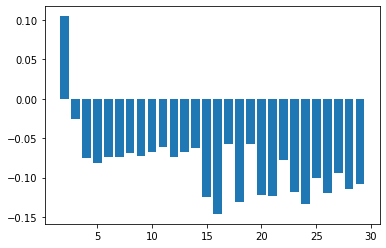

250-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 53s 400ms/step - loss: 0.6908 - val_loss: 0.6820
Epoch 2/100
132/132 [==============================] - 0s 464us/step - loss: 0.6761 - val_loss: 0.6606
Epoch 3/100
132/132 [==============================] - 0s 452us/step - loss: 0.6466 - val_loss: 0.6187
Epoch 4/100
132/132 [==============================] - 0s 458us/step - loss: 0.5914 - val_loss: 0.5442
Epoch 5/100
132/132 [==============================] - 0s 454us/step - loss: 0.5050 - val_loss: 0.4295
Epoch 6/100
132/132 [==============================] - 0s 452us/step - loss: 0.3942 - val_loss: 0.2906
Epoch 7/100
132/132 [==============================] - 0s 455us/step - loss: 0.2860 - val_loss: 0.1714
Epoch 8/100
132/132 [==============================] - 0s 453us/step - loss: 0.2098 - val_loss: 0.1089
Epoch 9/100
132/132 [==============================] - 0s 453us/step - loss: 0.1711 - val_loss: 0.0889
Epoch 10/100
132/

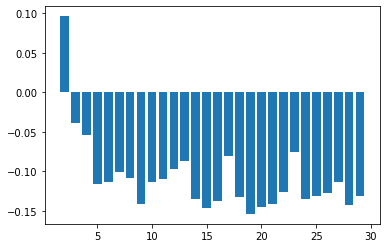

250-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 286s 2s/step - loss: 0.6887 - val_loss: 0.6782
Epoch 2/100
132/132 [==============================] - 0s 1ms/step - loss: 0.6714 - val_loss: 0.6516
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6358 - val_loss: 0.6033
Epoch 4/100
132/132 [==============================] - 0s 628us/step - loss: 0.5778 - val_loss: 0.5245
Epoch 5/100
132/132 [==============================] - 0s 1ms/step - loss: 0.4943 - val_loss: 0.4115
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 0.3876 - val_loss: 0.2809
Epoch 7/100
132/132 [==============================] - 0s 664us/step - loss: 0.2799 - val_loss: 0.1719
Epoch 8/100
132/132 [==============================] - 0s 537us/step - loss: 0.2093 - val_loss: 0.1093
Epoch 9/100
132/132 [==============================] - 0s 459us/step - loss: 0.1728 - val_loss: 0.0894
Epoch 10/100
132/132 [=====

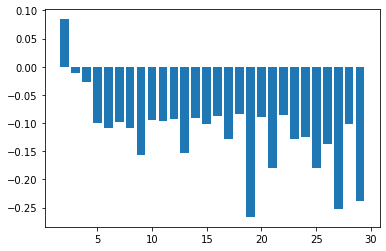

250-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 453ms/step - loss: 0.6902 - val_loss: 0.6814
Epoch 2/100
132/132 [==============================] - 0s 724us/step - loss: 0.6752 - val_loss: 0.6600
Epoch 3/100
132/132 [==============================] - 0s 457us/step - loss: 0.6458 - val_loss: 0.6198
Epoch 4/100
132/132 [==============================] - 0s 517us/step - loss: 0.5951 - val_loss: 0.5510
Epoch 5/100
132/132 [==============================] - 0s 457us/step - loss: 0.5131 - val_loss: 0.4485
Epoch 6/100
132/132 [==============================] - 0s 462us/step - loss: 0.4067 - val_loss: 0.3213
Epoch 7/100
132/132 [==============================] - 0s 559us/step - loss: 0.3025 - val_loss: 0.2005
Epoch 8/100
132/132 [==============================] - 0s 496us/step - loss: 0.2195 - val_loss: 0.1250
Epoch 9/100
132/132 [==============================] - 0s 507us/step - loss: 0.1766 - val_loss: 0.0944
Epoch 10/100
132/

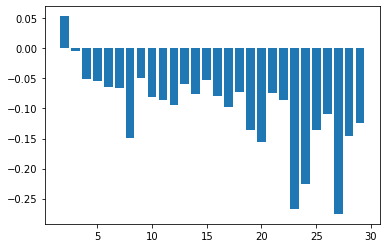

250-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 463ms/step - loss: 0.6910 - val_loss: 0.6828
Epoch 2/100
132/132 [==============================] - 0s 469us/step - loss: 0.6776 - val_loss: 0.6633
Epoch 3/100
132/132 [==============================] - 0s 458us/step - loss: 0.6516 - val_loss: 0.6268
Epoch 4/100
132/132 [==============================] - 0s 485us/step - loss: 0.6046 - val_loss: 0.5648
Epoch 5/100
132/132 [==============================] - 0s 672us/step - loss: 0.5321 - val_loss: 0.4713
Epoch 6/100
132/132 [==============================] - 0s 487us/step - loss: 0.4351 - val_loss: 0.3505
Epoch 7/100
132/132 [==============================] - 0s 451us/step - loss: 0.3293 - val_loss: 0.2280
Epoch 8/100
132/132 [==============================] - 0s 461us/step - loss: 0.2410 - val_loss: 0.1410
Epoch 9/100
132/132 [==============================] - 0s 460us/step - loss: 0.1885 - val_loss: 0.1015
Epoch 10/100
132/

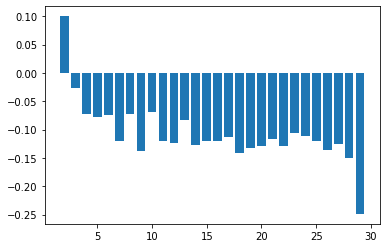

250-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 450ms/step - loss: 0.6893 - val_loss: 0.6796
Epoch 2/100
132/132 [==============================] - 0s 679us/step - loss: 0.6729 - val_loss: 0.6569
Epoch 3/100
132/132 [==============================] - 0s 477us/step - loss: 0.6428 - val_loss: 0.6166
Epoch 4/100
132/132 [==============================] - 0s 453us/step - loss: 0.5937 - val_loss: 0.5518
Epoch 5/100
132/132 [==============================] - 0s 455us/step - loss: 0.5193 - val_loss: 0.4588
Epoch 6/100
132/132 [==============================] - 0s 459us/step - loss: 0.4285 - val_loss: 0.3441
Epoch 7/100
132/132 [==============================] - 0s 499us/step - loss: 0.3250 - val_loss: 0.2303
Epoch 8/100
132/132 [==============================] - 0s 533us/step - loss: 0.2431 - val_loss: 0.1443
Epoch 9/100
132/132 [==============================] - 0s 470us/step - loss: 0.1871 - val_loss: 0.1025
Epoch 10/100
132/

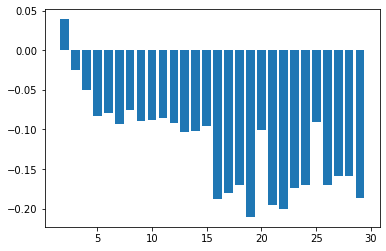

250-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 458ms/step - loss: 0.6919 - val_loss: 0.6856
Epoch 2/100
132/132 [==============================] - 0s 548us/step - loss: 0.6818 - val_loss: 0.6717
Epoch 3/100
132/132 [==============================] - 0s 589us/step - loss: 0.6629 - val_loss: 0.6460
Epoch 4/100
132/132 [==============================] - 0s 461us/step - loss: 0.6280 - val_loss: 0.6014
Epoch 5/100
132/132 [==============================] - 0s 462us/step - loss: 0.5750 - val_loss: 0.5309
Epoch 6/100
132/132 [==============================] - 0s 458us/step - loss: 0.4926 - val_loss: 0.4324
Epoch 7/100
132/132 [==============================] - 0s 465us/step - loss: 0.3946 - val_loss: 0.3144
Epoch 8/100
132/132 [==============================] - 0s 507us/step - loss: 0.2922 - val_loss: 0.2047
Epoch 9/100
132/132 [==============================] - 0s 477us/step - loss: 0.2166 - val_loss: 0.1307
Epoch 10/100
132/

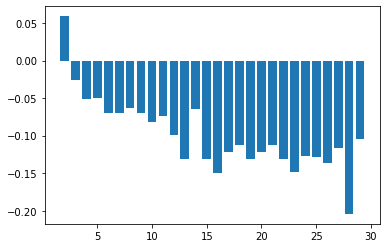

250-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 448ms/step - loss: 0.6911 - val_loss: 0.6840
Epoch 2/100
132/132 [==============================] - 0s 482us/step - loss: 0.6797 - val_loss: 0.6682
Epoch 3/100
132/132 [==============================] - 0s 459us/step - loss: 0.6596 - val_loss: 0.6402
Epoch 4/100
132/132 [==============================] - 0s 460us/step - loss: 0.6238 - val_loss: 0.5941
Epoch 5/100
132/132 [==============================] - 0s 456us/step - loss: 0.5689 - val_loss: 0.5251
Epoch 6/100
132/132 [==============================] - 0s 463us/step - loss: 0.4988 - val_loss: 0.4312
Epoch 7/100
132/132 [==============================] - 0s 460us/step - loss: 0.4071 - val_loss: 0.3227
Epoch 8/100
132/132 [==============================] - 0s 463us/step - loss: 0.3109 - val_loss: 0.2199
Epoch 9/100
132/132 [==============================] - 0s 462us/step - loss: 0.2333 - val_loss: 0.1438
Epoch 10/100
132/

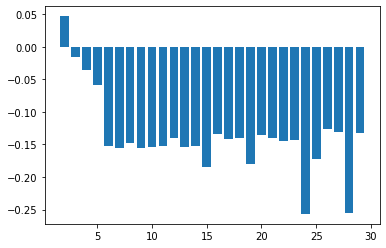

250-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 452ms/step - loss: 0.6919 - val_loss: 0.6874
Epoch 2/100
132/132 [==============================] - 0s 473us/step - loss: 0.6843 - val_loss: 0.6769
Epoch 3/100
132/132 [==============================] - 0s 463us/step - loss: 0.6700 - val_loss: 0.6579
Epoch 4/100
132/132 [==============================] - 0s 465us/step - loss: 0.6442 - val_loss: 0.6255
Epoch 5/100
132/132 [==============================] - 0s 462us/step - loss: 0.6043 - val_loss: 0.5750
Epoch 6/100
132/132 [==============================] - 0s 467us/step - loss: 0.5482 - val_loss: 0.5039
Epoch 7/100
132/132 [==============================] - 0s 462us/step - loss: 0.4738 - val_loss: 0.4131
Epoch 8/100
132/132 [==============================] - 0s 459us/step - loss: 0.3832 - val_loss: 0.3118
Epoch 9/100
132/132 [==============================] - 0s 465us/step - loss: 0.2960 - val_loss: 0.2159
Epoch 10/100
132/

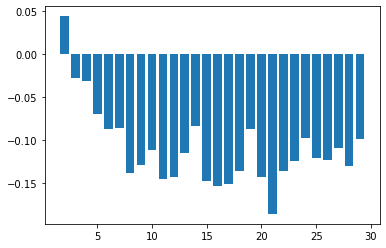

250-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 449ms/step - loss: 0.6924 - val_loss: 0.6889
Epoch 2/100
132/132 [==============================] - 0s 470us/step - loss: 0.6872 - val_loss: 0.6816
Epoch 3/100
132/132 [==============================] - 0s 465us/step - loss: 0.6766 - val_loss: 0.6683
Epoch 4/100
132/132 [==============================] - 0s 457us/step - loss: 0.6584 - val_loss: 0.6457
Epoch 5/100
132/132 [==============================] - 0s 463us/step - loss: 0.6294 - val_loss: 0.6106
Epoch 6/100
132/132 [==============================] - 0s 464us/step - loss: 0.5868 - val_loss: 0.5604
Epoch 7/100
132/132 [==============================] - 0s 462us/step - loss: 0.5309 - val_loss: 0.4923
Epoch 8/100
132/132 [==============================] - 0s 463us/step - loss: 0.4598 - val_loss: 0.4091
Epoch 9/100
132/132 [==============================] - 0s 470us/step - loss: 0.3811 - val_loss: 0.3171
Epoch 10/100
132/

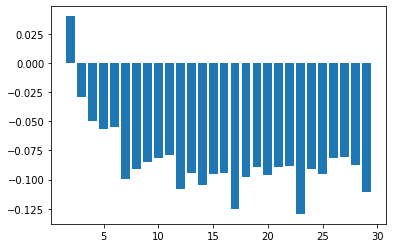

240-230dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 457ms/step - loss: 0.6880 - val_loss: 0.6754
Epoch 2/100
132/132 [==============================] - 0s 471us/step - loss: 0.6655 - val_loss: 0.6387
Epoch 3/100
132/132 [==============================] - 0s 458us/step - loss: 0.6169 - val_loss: 0.5629
Epoch 4/100
132/132 [==============================] - 0s 458us/step - loss: 0.5301 - val_loss: 0.4338
Epoch 5/100
132/132 [==============================] - 0s 477us/step - loss: 0.3952 - val_loss: 0.2710
Epoch 6/100
132/132 [==============================] - 0s 457us/step - loss: 0.2704 - val_loss: 0.1423
Epoch 7/100
132/132 [==============================] - 0s 460us/step - loss: 0.1997 - val_loss: 0.0920
Epoch 8/100
132/132 [==============================] - 0s 464us/step - loss: 0.1739 - val_loss: 0.0865
Epoch 9/100
132/132 [==============================] - 0s 464us/step - loss: 0.1581 - val_loss: 0.0886
(165, 230)


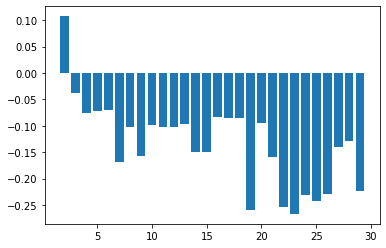

240-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 448ms/step - loss: 0.6898 - val_loss: 0.6768
Epoch 2/100
132/132 [==============================] - 0s 476us/step - loss: 0.6692 - val_loss: 0.6429
Epoch 3/100
132/132 [==============================] - 0s 477us/step - loss: 0.6262 - val_loss: 0.5740
Epoch 4/100
132/132 [==============================] - 0s 460us/step - loss: 0.5457 - val_loss: 0.4554
Epoch 5/100
132/132 [==============================] - 0s 470us/step - loss: 0.4201 - val_loss: 0.2973
Epoch 6/100
132/132 [==============================] - 0s 465us/step - loss: 0.2880 - val_loss: 0.1593
Epoch 7/100
132/132 [==============================] - 0s 471us/step - loss: 0.1980 - val_loss: 0.0959
Epoch 8/100
132/132 [==============================] - 0s 472us/step - loss: 0.1646 - val_loss: 0.0856
Epoch 9/100
132/132 [==============================] - 0s 478us/step - loss: 0.1462 - val_loss: 0.0880
(165, 220)


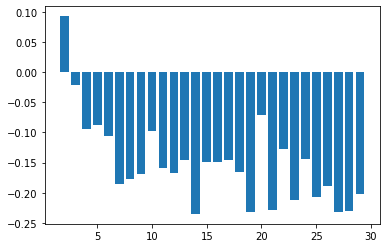

240-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 451ms/step - loss: 0.6903 - val_loss: 0.6796
Epoch 2/100
132/132 [==============================] - 0s 484us/step - loss: 0.6713 - val_loss: 0.6503
Epoch 3/100
132/132 [==============================] - 0s 463us/step - loss: 0.6330 - val_loss: 0.5896
Epoch 4/100
132/132 [==============================] - 0s 459us/step - loss: 0.5570 - val_loss: 0.4819
Epoch 5/100
132/132 [==============================] - 0s 464us/step - loss: 0.4407 - val_loss: 0.3303
Epoch 6/100
132/132 [==============================] - 0s 474us/step - loss: 0.3109 - val_loss: 0.1844
Epoch 7/100
132/132 [==============================] - 0s 473us/step - loss: 0.2101 - val_loss: 0.1072
Epoch 8/100
132/132 [==============================] - 0s 469us/step - loss: 0.1734 - val_loss: 0.0894
Epoch 9/100
132/132 [==============================] - 0s 464us/step - loss: 0.1545 - val_loss: 0.0913
(165, 210)


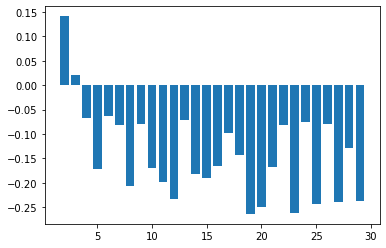

240-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 445ms/step - loss: 0.6894 - val_loss: 0.6766
Epoch 2/100
132/132 [==============================] - 0s 481us/step - loss: 0.6681 - val_loss: 0.6418
Epoch 3/100
132/132 [==============================] - 0s 460us/step - loss: 0.6229 - val_loss: 0.5708
Epoch 4/100
132/132 [==============================] - 0s 468us/step - loss: 0.5382 - val_loss: 0.4484
Epoch 5/100
132/132 [==============================] - 0s 474us/step - loss: 0.4112 - val_loss: 0.2880
Epoch 6/100
132/132 [==============================] - 0s 476us/step - loss: 0.2862 - val_loss: 0.1542
Epoch 7/100
132/132 [==============================] - 0s 466us/step - loss: 0.2009 - val_loss: 0.0986
Epoch 8/100
132/132 [==============================] - 0s 472us/step - loss: 0.1710 - val_loss: 0.0890
Epoch 9/100
132/132 [==============================] - 0s 469us/step - loss: 0.1485 - val_loss: 0.0908
(165, 200)


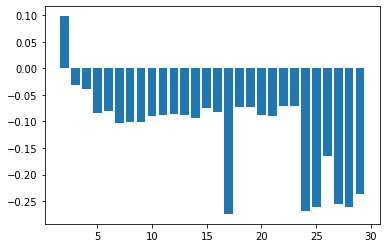

240-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 453ms/step - loss: 0.6901 - val_loss: 0.6790
Epoch 2/100
132/132 [==============================] - 0s 481us/step - loss: 0.6715 - val_loss: 0.6483
Epoch 3/100
132/132 [==============================] - 0s 469us/step - loss: 0.6306 - val_loss: 0.5845
Epoch 4/100
132/132 [==============================] - 0s 466us/step - loss: 0.5568 - val_loss: 0.4721
Epoch 5/100
132/132 [==============================] - 0s 474us/step - loss: 0.4362 - val_loss: 0.3184
Epoch 6/100
132/132 [==============================] - 0s 467us/step - loss: 0.3102 - val_loss: 0.1753
Epoch 7/100
132/132 [==============================] - 0s 471us/step - loss: 0.2147 - val_loss: 0.1035
Epoch 8/100
132/132 [==============================] - 0s 473us/step - loss: 0.1731 - val_loss: 0.0874
Epoch 9/100
132/132 [==============================] - 0s 470us/step - loss: 0.1522 - val_loss: 0.0889
(165, 190)


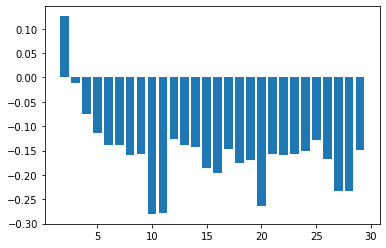

240-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 445ms/step - loss: 0.6890 - val_loss: 0.6778
Epoch 2/100
132/132 [==============================] - 0s 476us/step - loss: 0.6694 - val_loss: 0.6454
Epoch 3/100
132/132 [==============================] - 0s 467us/step - loss: 0.6256 - val_loss: 0.5789
Epoch 4/100
132/132 [==============================] - 0s 467us/step - loss: 0.5487 - val_loss: 0.4639
Epoch 5/100
132/132 [==============================] - 0s 473us/step - loss: 0.4248 - val_loss: 0.3091
Epoch 6/100
132/132 [==============================] - 0s 465us/step - loss: 0.2995 - val_loss: 0.1687
Epoch 7/100
132/132 [==============================] - 0s 470us/step - loss: 0.2157 - val_loss: 0.1008
Epoch 8/100
132/132 [==============================] - 0s 472us/step - loss: 0.1771 - val_loss: 0.0885
Epoch 9/100
132/132 [==============================] - 0s 472us/step - loss: 0.1592 - val_loss: 0.0907
(165, 180)


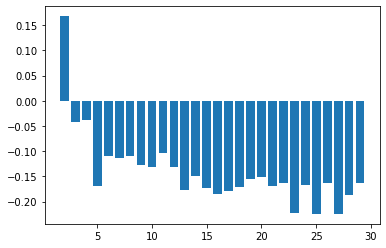

240-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 448ms/step - loss: 0.6899 - val_loss: 0.6789
Epoch 2/100
132/132 [==============================] - 0s 480us/step - loss: 0.6710 - val_loss: 0.6493
Epoch 3/100
132/132 [==============================] - 0s 473us/step - loss: 0.6322 - val_loss: 0.5881
Epoch 4/100
132/132 [==============================] - 0s 473us/step - loss: 0.5577 - val_loss: 0.4804
Epoch 5/100
132/132 [==============================] - 0s 470us/step - loss: 0.4424 - val_loss: 0.3310
Epoch 6/100
132/132 [==============================] - 0s 468us/step - loss: 0.3093 - val_loss: 0.1876
Epoch 7/100
132/132 [==============================] - 0s 470us/step - loss: 0.2160 - val_loss: 0.1100
Epoch 8/100
132/132 [==============================] - 0s 468us/step - loss: 0.1742 - val_loss: 0.0907
Epoch 9/100
132/132 [==============================] - 0s 468us/step - loss: 0.1512 - val_loss: 0.0907
Epoch 10/100
132

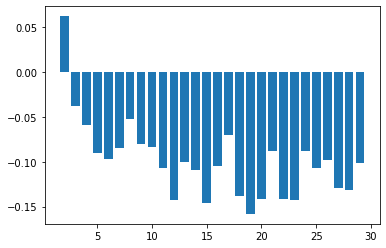

240-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 58s 441ms/step - loss: 0.6900 - val_loss: 0.6792
Epoch 2/100
132/132 [==============================] - 0s 480us/step - loss: 0.6720 - val_loss: 0.6512
Epoch 3/100
132/132 [==============================] - 0s 475us/step - loss: 0.6349 - val_loss: 0.5939
Epoch 4/100
132/132 [==============================] - 0s 469us/step - loss: 0.5621 - val_loss: 0.4929
Epoch 5/100
132/132 [==============================] - 0s 469us/step - loss: 0.4550 - val_loss: 0.3494
Epoch 6/100
132/132 [==============================] - 0s 475us/step - loss: 0.3174 - val_loss: 0.2043
Epoch 7/100
132/132 [==============================] - 0s 473us/step - loss: 0.2201 - val_loss: 0.1152
Epoch 8/100
132/132 [==============================] - 0s 469us/step - loss: 0.1755 - val_loss: 0.0898
Epoch 9/100
132/132 [==============================] - 0s 477us/step - loss: 0.1521 - val_loss: 0.0888
Epoch 10/100
132

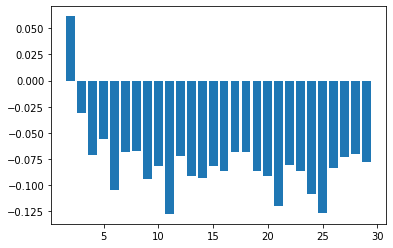

240-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 58s 439ms/step - loss: 0.6883 - val_loss: 0.6757
Epoch 2/100
132/132 [==============================] - 0s 481us/step - loss: 0.6669 - val_loss: 0.6430
Epoch 3/100
132/132 [==============================] - 0s 470us/step - loss: 0.6255 - val_loss: 0.5790
Epoch 4/100
132/132 [==============================] - 0s 463us/step - loss: 0.5480 - val_loss: 0.4711
Epoch 5/100
132/132 [==============================] - 0s 473us/step - loss: 0.4435 - val_loss: 0.3267
Epoch 6/100
132/132 [==============================] - 0s 475us/step - loss: 0.3169 - val_loss: 0.1920
Epoch 7/100
132/132 [==============================] - 0s 472us/step - loss: 0.2246 - val_loss: 0.1132
Epoch 8/100
132/132 [==============================] - 0s 475us/step - loss: 0.1766 - val_loss: 0.0908
Epoch 9/100
132/132 [==============================] - 0s 475us/step - loss: 0.1510 - val_loss: 0.0891
Epoch 10/100
132

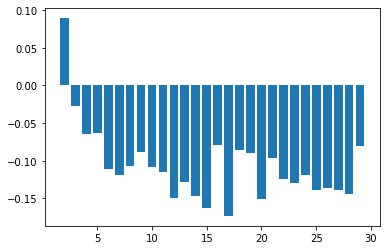

240-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 431ms/step - loss: 0.6891 - val_loss: 0.6766
Epoch 2/100
132/132 [==============================] - 0s 476us/step - loss: 0.6682 - val_loss: 0.6451
Epoch 3/100
132/132 [==============================] - 0s 470us/step - loss: 0.6263 - val_loss: 0.5834
Epoch 4/100
132/132 [==============================] - 0s 469us/step - loss: 0.5520 - val_loss: 0.4795
Epoch 5/100
132/132 [==============================] - 0s 471us/step - loss: 0.4447 - val_loss: 0.3382
Epoch 6/100
132/132 [==============================] - 0s 476us/step - loss: 0.3180 - val_loss: 0.2009
Epoch 7/100
132/132 [==============================] - 0s 482us/step - loss: 0.2202 - val_loss: 0.1169
Epoch 8/100
132/132 [==============================] - 0s 473us/step - loss: 0.1720 - val_loss: 0.0895
Epoch 9/100
132/132 [==============================] - 0s 475us/step - loss: 0.1495 - val_loss: 0.0868
Epoch 10/100
132

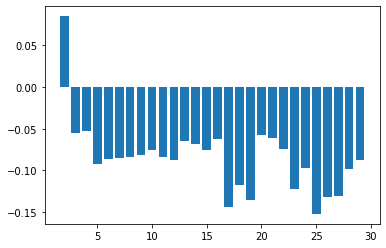

240-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 432ms/step - loss: 0.6908 - val_loss: 0.6819
Epoch 2/100
132/132 [==============================] - 0s 482us/step - loss: 0.6764 - val_loss: 0.6592
Epoch 3/100
132/132 [==============================] - 0s 469us/step - loss: 0.6465 - val_loss: 0.6132
Epoch 4/100
132/132 [==============================] - 0s 475us/step - loss: 0.5905 - val_loss: 0.5309
Epoch 5/100
132/132 [==============================] - 0s 490us/step - loss: 0.4963 - val_loss: 0.4069
Epoch 6/100
132/132 [==============================] - 0s 471us/step - loss: 0.3817 - val_loss: 0.2619
Epoch 7/100
132/132 [==============================] - 0s 478us/step - loss: 0.2624 - val_loss: 0.1492
Epoch 8/100
132/132 [==============================] - 0s 476us/step - loss: 0.1882 - val_loss: 0.0973
Epoch 9/100
132/132 [==============================] - 0s 479us/step - loss: 0.1556 - val_loss: 0.0861
Epoch 10/100
132

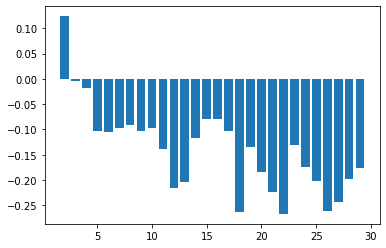

240-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 433ms/step - loss: 0.6904 - val_loss: 0.6813
Epoch 2/100
132/132 [==============================] - 0s 483us/step - loss: 0.6746 - val_loss: 0.6585
Epoch 3/100
132/132 [==============================] - 0s 470us/step - loss: 0.6433 - val_loss: 0.6133
Epoch 4/100
132/132 [==============================] - 0s 471us/step - loss: 0.5858 - val_loss: 0.5337
Epoch 5/100
132/132 [==============================] - 0s 482us/step - loss: 0.4976 - val_loss: 0.4148
Epoch 6/100
132/132 [==============================] - 0s 484us/step - loss: 0.3752 - val_loss: 0.2758
Epoch 7/100
132/132 [==============================] - 0s 488us/step - loss: 0.2657 - val_loss: 0.1597
Epoch 8/100
132/132 [==============================] - 0s 486us/step - loss: 0.1968 - val_loss: 0.1026
Epoch 9/100
132/132 [==============================] - 0s 485us/step - loss: 0.1663 - val_loss: 0.0886
Epoch 10/100
132

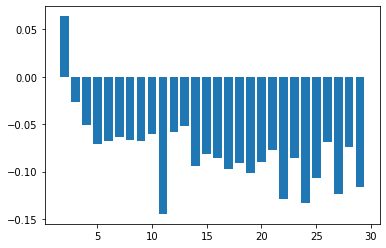

240-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 435ms/step - loss: 0.6912 - val_loss: 0.6818
Epoch 2/100
132/132 [==============================] - 0s 484us/step - loss: 0.6757 - val_loss: 0.6600
Epoch 3/100
132/132 [==============================] - 0s 469us/step - loss: 0.6460 - val_loss: 0.6175
Epoch 4/100
132/132 [==============================] - 0s 469us/step - loss: 0.5917 - val_loss: 0.5419
Epoch 5/100
132/132 [==============================] - 0s 475us/step - loss: 0.5022 - val_loss: 0.4264
Epoch 6/100
132/132 [==============================] - 0s 474us/step - loss: 0.3840 - val_loss: 0.2846
Epoch 7/100
132/132 [==============================] - 0s 476us/step - loss: 0.2703 - val_loss: 0.1632
Epoch 8/100
132/132 [==============================] - 0s 475us/step - loss: 0.1962 - val_loss: 0.1017
Epoch 9/100
132/132 [==============================] - 0s 474us/step - loss: 0.1618 - val_loss: 0.0864
Epoch 10/100
132

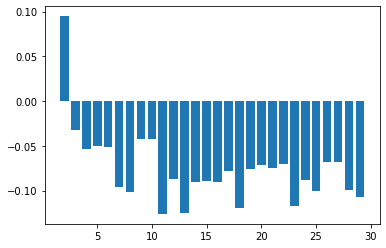

240-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 434ms/step - loss: 0.6895 - val_loss: 0.6790
Epoch 2/100
132/132 [==============================] - 0s 481us/step - loss: 0.6734 - val_loss: 0.6540
Epoch 3/100
132/132 [==============================] - 0s 467us/step - loss: 0.6426 - val_loss: 0.6059
Epoch 4/100
132/132 [==============================] - 0s 479us/step - loss: 0.5839 - val_loss: 0.5226
Epoch 5/100
132/132 [==============================] - 0s 478us/step - loss: 0.4941 - val_loss: 0.3999
Epoch 6/100
132/132 [==============================] - 0s 488us/step - loss: 0.3767 - val_loss: 0.2586
Epoch 7/100
132/132 [==============================] - 0s 481us/step - loss: 0.2644 - val_loss: 0.1483
Epoch 8/100
132/132 [==============================] - 0s 477us/step - loss: 0.1943 - val_loss: 0.0983
Epoch 9/100
132/132 [==============================] - 0s 481us/step - loss: 0.1667 - val_loss: 0.0877
Epoch 10/100
132

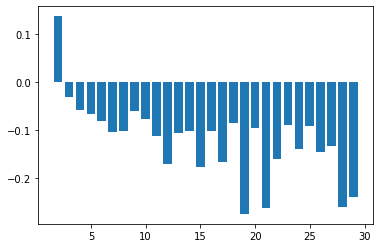

240-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 434ms/step - loss: 0.6901 - val_loss: 0.6804
Epoch 2/100
132/132 [==============================] - 0s 486us/step - loss: 0.6743 - val_loss: 0.6576
Epoch 3/100
132/132 [==============================] - 0s 477us/step - loss: 0.6444 - val_loss: 0.6139
Epoch 4/100
132/132 [==============================] - 0s 468us/step - loss: 0.5893 - val_loss: 0.5374
Epoch 5/100
132/132 [==============================] - 0s 473us/step - loss: 0.5026 - val_loss: 0.4223
Epoch 6/100
132/132 [==============================] - 0s 481us/step - loss: 0.3901 - val_loss: 0.2847
Epoch 7/100
132/132 [==============================] - 0s 489us/step - loss: 0.2790 - val_loss: 0.1673
Epoch 8/100
132/132 [==============================] - 0s 480us/step - loss: 0.2040 - val_loss: 0.1049
Epoch 9/100
132/132 [==============================] - 0s 475us/step - loss: 0.1656 - val_loss: 0.0871
Epoch 10/100
132/

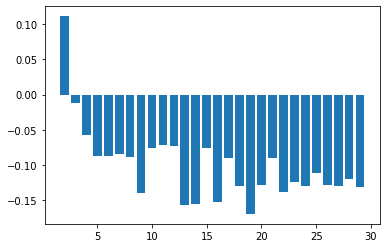

240-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 433ms/step - loss: 0.6900 - val_loss: 0.6814
Epoch 2/100
132/132 [==============================] - 0s 487us/step - loss: 0.6743 - val_loss: 0.6596
Epoch 3/100
132/132 [==============================] - 0s 472us/step - loss: 0.6442 - val_loss: 0.6183
Epoch 4/100
132/132 [==============================] - 0s 475us/step - loss: 0.5918 - val_loss: 0.5481
Epoch 5/100
132/132 [==============================] - 0s 476us/step - loss: 0.5112 - val_loss: 0.4440
Epoch 6/100
132/132 [==============================] - 0s 475us/step - loss: 0.4049 - val_loss: 0.3165
Epoch 7/100
132/132 [==============================] - 0s 469us/step - loss: 0.2956 - val_loss: 0.1970
Epoch 8/100
132/132 [==============================] - 0s 483us/step - loss: 0.2153 - val_loss: 0.1215
Epoch 9/100
132/132 [==============================] - 0s 476us/step - loss: 0.1748 - val_loss: 0.0919
Epoch 10/100
132/

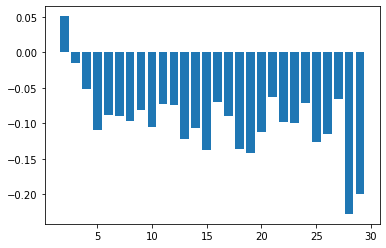

240-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 57s 435ms/step - loss: 0.6905 - val_loss: 0.6828
Epoch 2/100
132/132 [==============================] - 0s 492us/step - loss: 0.6777 - val_loss: 0.6634
Epoch 3/100
132/132 [==============================] - 0s 475us/step - loss: 0.6515 - val_loss: 0.6257
Epoch 4/100
132/132 [==============================] - 0s 474us/step - loss: 0.6031 - val_loss: 0.5587
Epoch 5/100
132/132 [==============================] - 0s 481us/step - loss: 0.5276 - val_loss: 0.4552
Epoch 6/100
132/132 [==============================] - 0s 484us/step - loss: 0.4214 - val_loss: 0.3236
Epoch 7/100
132/132 [==============================] - 0s 484us/step - loss: 0.3096 - val_loss: 0.1970
Epoch 8/100
132/132 [==============================] - 0s 493us/step - loss: 0.2182 - val_loss: 0.1181
Epoch 9/100
132/132 [==============================] - 0s 508us/step - loss: 0.1710 - val_loss: 0.0897
Epoch 10/100
132/

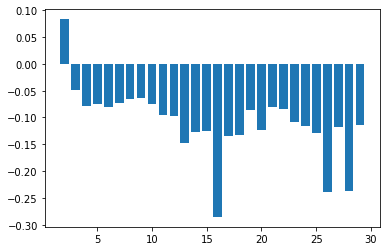

240-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 58s 437ms/step - loss: 0.6906 - val_loss: 0.6826
Epoch 2/100
132/132 [==============================] - 0s 512us/step - loss: 0.6770 - val_loss: 0.6625
Epoch 3/100
132/132 [==============================] - 0s 471us/step - loss: 0.6494 - val_loss: 0.6237
Epoch 4/100
132/132 [==============================] - 0s 480us/step - loss: 0.5999 - val_loss: 0.5559
Epoch 5/100
132/132 [==============================] - 0s 476us/step - loss: 0.5215 - val_loss: 0.4528
Epoch 6/100
132/132 [==============================] - 0s 477us/step - loss: 0.4151 - val_loss: 0.3249
Epoch 7/100
132/132 [==============================] - 0s 483us/step - loss: 0.3054 - val_loss: 0.2011
Epoch 8/100
132/132 [==============================] - 0s 482us/step - loss: 0.2186 - val_loss: 0.1219
Epoch 9/100
132/132 [==============================] - 0s 483us/step - loss: 0.1723 - val_loss: 0.0914
Epoch 10/100
132/

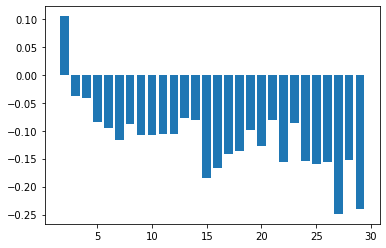

240-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 58s 443ms/step - loss: 0.6902 - val_loss: 0.6825
Epoch 2/100
132/132 [==============================] - 0s 500us/step - loss: 0.6770 - val_loss: 0.6632
Epoch 3/100
132/132 [==============================] - 0s 482us/step - loss: 0.6516 - val_loss: 0.6273
Epoch 4/100
132/132 [==============================] - 0s 482us/step - loss: 0.6067 - val_loss: 0.5664
Epoch 5/100
132/132 [==============================] - 0s 479us/step - loss: 0.5366 - val_loss: 0.4754
Epoch 6/100
132/132 [==============================] - 0s 478us/step - loss: 0.4414 - val_loss: 0.3581
Epoch 7/100
132/132 [==============================] - 0s 482us/step - loss: 0.3366 - val_loss: 0.2375
Epoch 8/100
132/132 [==============================] - 0s 482us/step - loss: 0.2448 - val_loss: 0.1486
Epoch 9/100
132/132 [==============================] - 0s 482us/step - loss: 0.1844 - val_loss: 0.1044
Epoch 10/100
132/

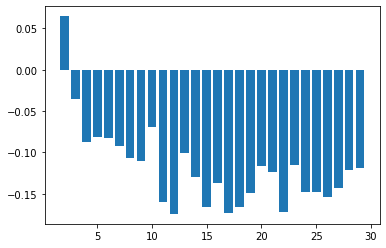

240-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 58s 440ms/step - loss: 0.6913 - val_loss: 0.6847
Epoch 2/100
132/132 [==============================] - 0s 494us/step - loss: 0.6801 - val_loss: 0.6695
Epoch 3/100
132/132 [==============================] - 0s 475us/step - loss: 0.6594 - val_loss: 0.6427
Epoch 4/100
132/132 [==============================] - 0s 476us/step - loss: 0.6251 - val_loss: 0.5988
Epoch 5/100
132/132 [==============================] - 0s 483us/step - loss: 0.5719 - val_loss: 0.5327
Epoch 6/100
132/132 [==============================] - 0s 658us/step - loss: 0.4988 - val_loss: 0.4428
Epoch 7/100
132/132 [==============================] - 0s 485us/step - loss: 0.4108 - val_loss: 0.3353
Epoch 8/100
132/132 [==============================] - 0s 494us/step - loss: 0.3189 - val_loss: 0.2297
Epoch 9/100
132/132 [==============================] - 0s 479us/step - loss: 0.2358 - val_loss: 0.1514
Epoch 10/100
132/

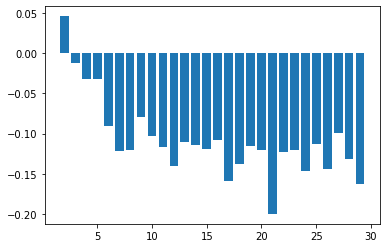

240-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 58s 442ms/step - loss: 0.6917 - val_loss: 0.6870
Epoch 2/100
132/132 [==============================] - 0s 493us/step - loss: 0.6839 - val_loss: 0.6762
Epoch 3/100
132/132 [==============================] - 0s 480us/step - loss: 0.6697 - val_loss: 0.6568
Epoch 4/100
132/132 [==============================] - 0s 477us/step - loss: 0.6439 - val_loss: 0.6240
Epoch 5/100
132/132 [==============================] - 0s 482us/step - loss: 0.6033 - val_loss: 0.5719
Epoch 6/100
132/132 [==============================] - 0s 481us/step - loss: 0.5444 - val_loss: 0.4963
Epoch 7/100
132/132 [==============================] - 0s 486us/step - loss: 0.4649 - val_loss: 0.3977
Epoch 8/100
132/132 [==============================] - 0s 481us/step - loss: 0.3692 - val_loss: 0.2882
Epoch 9/100
132/132 [==============================] - 0s 485us/step - loss: 0.2828 - val_loss: 0.1906
Epoch 10/100
132/

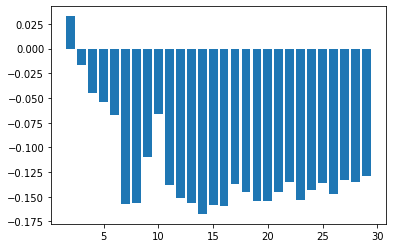

240-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 58s 442ms/step - loss: 0.6919 - val_loss: 0.6866
Epoch 2/100
132/132 [==============================] - 0s 492us/step - loss: 0.6837 - val_loss: 0.6750
Epoch 3/100
132/132 [==============================] - 0s 483us/step - loss: 0.6680 - val_loss: 0.6547
Epoch 4/100
132/132 [==============================] - 0s 478us/step - loss: 0.6410 - val_loss: 0.6206
Epoch 5/100
132/132 [==============================] - 0s 492us/step - loss: 0.5998 - val_loss: 0.5680
Epoch 6/100
132/132 [==============================] - 0s 488us/step - loss: 0.5403 - val_loss: 0.4936
Epoch 7/100
132/132 [==============================] - 0s 487us/step - loss: 0.4645 - val_loss: 0.3991
Epoch 8/100
132/132 [==============================] - 0s 484us/step - loss: 0.3788 - val_loss: 0.2955
Epoch 9/100
132/132 [==============================] - 0s 486us/step - loss: 0.2885 - val_loss: 0.2038
Epoch 10/100
132/

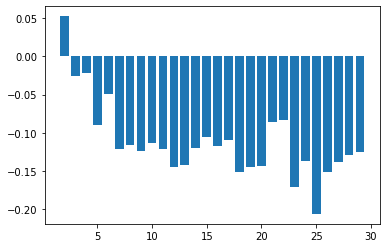

240-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 445ms/step - loss: 0.6914 - val_loss: 0.6863
Epoch 2/100
132/132 [==============================] - 0s 488us/step - loss: 0.6833 - val_loss: 0.6745
Epoch 3/100
132/132 [==============================] - 0s 477us/step - loss: 0.6679 - val_loss: 0.6548
Epoch 4/100
132/132 [==============================] - 0s 477us/step - loss: 0.6429 - val_loss: 0.6250
Epoch 5/100
132/132 [==============================] - 0s 490us/step - loss: 0.6075 - val_loss: 0.5824
Epoch 6/100
132/132 [==============================] - 0s 480us/step - loss: 0.5579 - val_loss: 0.5259
Epoch 7/100
132/132 [==============================] - 0s 484us/step - loss: 0.4980 - val_loss: 0.4546
Epoch 8/100
132/132 [==============================] - 0s 482us/step - loss: 0.4272 - val_loss: 0.3725
Epoch 9/100
132/132 [==============================] - 0s 490us/step - loss: 0.3489 - val_loss: 0.2887
Epoch 10/100
132/

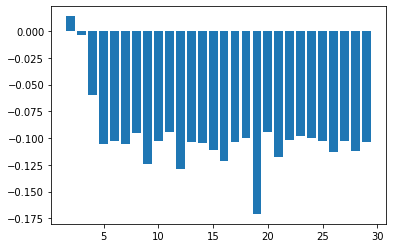

230-220dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 443ms/step - loss: 0.6906 - val_loss: 0.6799
Epoch 2/100
132/132 [==============================] - 0s 500us/step - loss: 0.6729 - val_loss: 0.6511
Epoch 3/100
132/132 [==============================] - 0s 484us/step - loss: 0.6354 - val_loss: 0.5904
Epoch 4/100
132/132 [==============================] - 0s 513us/step - loss: 0.5629 - val_loss: 0.4817
Epoch 5/100
132/132 [==============================] - 0s 496us/step - loss: 0.4456 - val_loss: 0.3282
Epoch 6/100
132/132 [==============================] - 0s 492us/step - loss: 0.3082 - val_loss: 0.1803
Epoch 7/100
132/132 [==============================] - 0s 481us/step - loss: 0.2092 - val_loss: 0.1018
Epoch 8/100
132/132 [==============================] - 0s 491us/step - loss: 0.1776 - val_loss: 0.0851
Epoch 9/100
132/132 [==============================] - 0s 488us/step - loss: 0.1620 - val_loss: 0.0876
(165, 220)


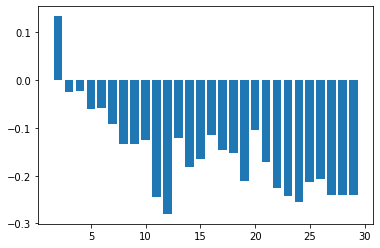

230-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 444ms/step - loss: 0.6885 - val_loss: 0.6763
Epoch 2/100
132/132 [==============================] - 0s 490us/step - loss: 0.6675 - val_loss: 0.6413
Epoch 3/100
132/132 [==============================] - 0s 477us/step - loss: 0.6215 - val_loss: 0.5691
Epoch 4/100
132/132 [==============================] - 0s 483us/step - loss: 0.5344 - val_loss: 0.4464
Epoch 5/100
132/132 [==============================] - 0s 490us/step - loss: 0.4170 - val_loss: 0.2877
Epoch 6/100
132/132 [==============================] - 0s 490us/step - loss: 0.2921 - val_loss: 0.1565
Epoch 7/100
132/132 [==============================] - 0s 493us/step - loss: 0.2088 - val_loss: 0.0990
Epoch 8/100
132/132 [==============================] - 0s 489us/step - loss: 0.1688 - val_loss: 0.0878
Epoch 9/100
132/132 [==============================] - 0s 494us/step - loss: 0.1471 - val_loss: 0.0886
(165, 210)


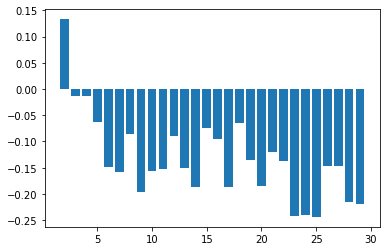

230-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 446ms/step - loss: 0.6891 - val_loss: 0.6753
Epoch 2/100
132/132 [==============================] - 0s 497us/step - loss: 0.6664 - val_loss: 0.6387
Epoch 3/100
132/132 [==============================] - 0s 479us/step - loss: 0.6181 - val_loss: 0.5661
Epoch 4/100
132/132 [==============================] - 0s 482us/step - loss: 0.5320 - val_loss: 0.4449
Epoch 5/100
132/132 [==============================] - 0s 492us/step - loss: 0.4202 - val_loss: 0.2899
Epoch 6/100
132/132 [==============================] - 0s 487us/step - loss: 0.2882 - val_loss: 0.1613
Epoch 7/100
132/132 [==============================] - 0s 490us/step - loss: 0.2084 - val_loss: 0.0995
Epoch 8/100
132/132 [==============================] - 0s 493us/step - loss: 0.1694 - val_loss: 0.0863
Epoch 9/100
132/132 [==============================] - 0s 491us/step - loss: 0.1490 - val_loss: 0.0867
(165, 200)


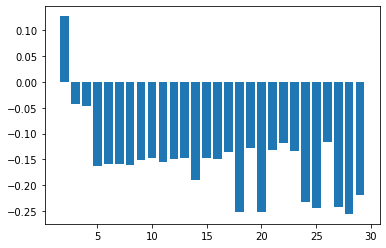

230-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 451ms/step - loss: 0.6883 - val_loss: 0.6760
Epoch 2/100
132/132 [==============================] - 0s 508us/step - loss: 0.6658 - val_loss: 0.6405
Epoch 3/100
132/132 [==============================] - 0s 478us/step - loss: 0.6186 - val_loss: 0.5695
Epoch 4/100
132/132 [==============================] - 0s 492us/step - loss: 0.5348 - val_loss: 0.4508
Epoch 5/100
132/132 [==============================] - 0s 498us/step - loss: 0.4167 - val_loss: 0.2980
Epoch 6/100
132/132 [==============================] - 0s 500us/step - loss: 0.2874 - val_loss: 0.1666
Epoch 7/100
132/132 [==============================] - 0s 490us/step - loss: 0.2052 - val_loss: 0.1022
Epoch 8/100
132/132 [==============================] - 0s 494us/step - loss: 0.1707 - val_loss: 0.0884
Epoch 9/100
132/132 [==============================] - 0s 494us/step - loss: 0.1567 - val_loss: 0.0892
(165, 190)


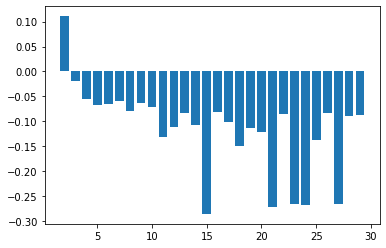

230-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 452ms/step - loss: 0.6897 - val_loss: 0.6784
Epoch 2/100
132/132 [==============================] - 0s 494us/step - loss: 0.6710 - val_loss: 0.6488
Epoch 3/100
132/132 [==============================] - 0s 486us/step - loss: 0.6331 - val_loss: 0.5883
Epoch 4/100
132/132 [==============================] - 0s 483us/step - loss: 0.5589 - val_loss: 0.4819
Epoch 5/100
132/132 [==============================] - 0s 495us/step - loss: 0.4456 - val_loss: 0.3326
Epoch 6/100
132/132 [==============================] - 0s 491us/step - loss: 0.3101 - val_loss: 0.1872
Epoch 7/100
132/132 [==============================] - 0s 496us/step - loss: 0.2204 - val_loss: 0.1063
Epoch 8/100
132/132 [==============================] - 0s 491us/step - loss: 0.1783 - val_loss: 0.0876
Epoch 9/100
132/132 [==============================] - 0s 500us/step - loss: 0.1669 - val_loss: 0.0887
(165, 180)


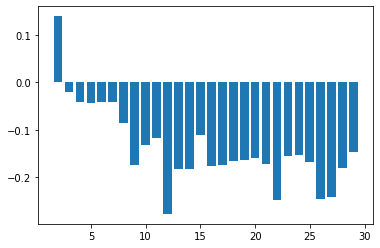

230-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 455ms/step - loss: 0.6898 - val_loss: 0.6787
Epoch 2/100
132/132 [==============================] - 0s 502us/step - loss: 0.6717 - val_loss: 0.6496
Epoch 3/100
132/132 [==============================] - 0s 490us/step - loss: 0.6336 - val_loss: 0.5911
Epoch 4/100
132/132 [==============================] - 0s 480us/step - loss: 0.5649 - val_loss: 0.4883
Epoch 5/100
132/132 [==============================] - 0s 486us/step - loss: 0.4537 - val_loss: 0.3442
Epoch 6/100
132/132 [==============================] - 0s 499us/step - loss: 0.3290 - val_loss: 0.1987
Epoch 7/100
132/132 [==============================] - 0s 500us/step - loss: 0.2227 - val_loss: 0.1126
Epoch 8/100
132/132 [==============================] - 0s 493us/step - loss: 0.1764 - val_loss: 0.0873
Epoch 9/100
132/132 [==============================] - 0s 494us/step - loss: 0.1546 - val_loss: 0.0872
Epoch 10/100
132

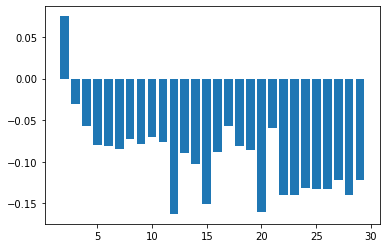

230-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 452ms/step - loss: 0.6897 - val_loss: 0.6786
Epoch 2/100
132/132 [==============================] - 0s 514us/step - loss: 0.6711 - val_loss: 0.6493
Epoch 3/100
132/132 [==============================] - 0s 486us/step - loss: 0.6329 - val_loss: 0.5916
Epoch 4/100
132/132 [==============================] - 0s 487us/step - loss: 0.5644 - val_loss: 0.4930
Epoch 5/100
132/132 [==============================] - 0s 493us/step - loss: 0.4573 - val_loss: 0.3541
Epoch 6/100
132/132 [==============================] - 0s 512us/step - loss: 0.3331 - val_loss: 0.2120
Epoch 7/100
132/132 [==============================] - 0s 495us/step - loss: 0.2348 - val_loss: 0.1219
Epoch 8/100
132/132 [==============================] - 0s 497us/step - loss: 0.1843 - val_loss: 0.0924
Epoch 9/100
132/132 [==============================] - 0s 487us/step - loss: 0.1599 - val_loss: 0.0894
Epoch 10/100
132

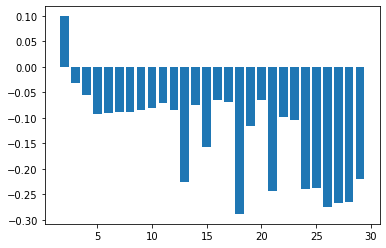

230-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 452ms/step - loss: 0.6901 - val_loss: 0.6804
Epoch 2/100
132/132 [==============================] - 0s 498us/step - loss: 0.6736 - val_loss: 0.6553
Epoch 3/100
132/132 [==============================] - 0s 489us/step - loss: 0.6396 - val_loss: 0.6043
Epoch 4/100
132/132 [==============================] - 0s 488us/step - loss: 0.5755 - val_loss: 0.5139
Epoch 5/100
132/132 [==============================] - 0s 497us/step - loss: 0.4745 - val_loss: 0.3810
Epoch 6/100
132/132 [==============================] - 0s 494us/step - loss: 0.3506 - val_loss: 0.2346
Epoch 7/100
132/132 [==============================] - 0s 501us/step - loss: 0.2453 - val_loss: 0.1319
Epoch 8/100
132/132 [==============================] - 0s 496us/step - loss: 0.1844 - val_loss: 0.0935
Epoch 9/100
132/132 [==============================] - 0s 485us/step - loss: 0.1566 - val_loss: 0.0861
Epoch 10/100
132

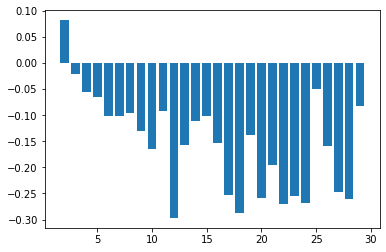

230-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 59s 450ms/step - loss: 0.6898 - val_loss: 0.6791
Epoch 2/100
132/132 [==============================] - 0s 500us/step - loss: 0.6717 - val_loss: 0.6510
Epoch 3/100
132/132 [==============================] - 0s 489us/step - loss: 0.6340 - val_loss: 0.5950
Epoch 4/100
132/132 [==============================] - 0s 484us/step - loss: 0.5664 - val_loss: 0.4977
Epoch 5/100
132/132 [==============================] - 0s 498us/step - loss: 0.4619 - val_loss: 0.3599
Epoch 6/100
132/132 [==============================] - 0s 499us/step - loss: 0.3392 - val_loss: 0.2158
Epoch 7/100
132/132 [==============================] - 0s 495us/step - loss: 0.2376 - val_loss: 0.1235
Epoch 8/100
132/132 [==============================] - 0s 488us/step - loss: 0.1816 - val_loss: 0.0924
Epoch 9/100
132/132 [==============================] - 0s 492us/step - loss: 0.1579 - val_loss: 0.0874
Epoch 10/100
132

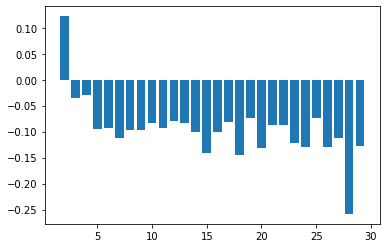

230-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 452ms/step - loss: 0.6907 - val_loss: 0.6813
Epoch 2/100
132/132 [==============================] - 0s 505us/step - loss: 0.6742 - val_loss: 0.6580
Epoch 3/100
132/132 [==============================] - 0s 489us/step - loss: 0.6424 - val_loss: 0.6119
Epoch 4/100
132/132 [==============================] - 0s 491us/step - loss: 0.5814 - val_loss: 0.5302
Epoch 5/100
132/132 [==============================] - 0s 491us/step - loss: 0.4851 - val_loss: 0.4070
Epoch 6/100
132/132 [==============================] - 0s 495us/step - loss: 0.3667 - val_loss: 0.2621
Epoch 7/100
132/132 [==============================] - 0s 504us/step - loss: 0.2560 - val_loss: 0.1486
Epoch 8/100
132/132 [==============================] - 0s 491us/step - loss: 0.1865 - val_loss: 0.0969
Epoch 9/100
132/132 [==============================] - 0s 498us/step - loss: 0.1554 - val_loss: 0.0844
Epoch 10/100
132

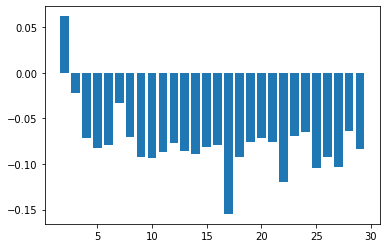

230-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 456ms/step - loss: 0.6891 - val_loss: 0.6779
Epoch 2/100
132/132 [==============================] - 0s 505us/step - loss: 0.6695 - val_loss: 0.6496
Epoch 3/100
132/132 [==============================] - 0s 496us/step - loss: 0.6325 - val_loss: 0.5957
Epoch 4/100
132/132 [==============================] - 0s 482us/step - loss: 0.5642 - val_loss: 0.5047
Epoch 5/100
132/132 [==============================] - 0s 499us/step - loss: 0.4688 - val_loss: 0.3752
Epoch 6/100
132/132 [==============================] - 0s 495us/step - loss: 0.3518 - val_loss: 0.2381
Epoch 7/100
132/132 [==============================] - 0s 499us/step - loss: 0.2422 - val_loss: 0.1415
Epoch 8/100
132/132 [==============================] - 0s 494us/step - loss: 0.1828 - val_loss: 0.0980
Epoch 9/100
132/132 [==============================] - 0s 494us/step - loss: 0.1530 - val_loss: 0.0880
Epoch 10/100
132

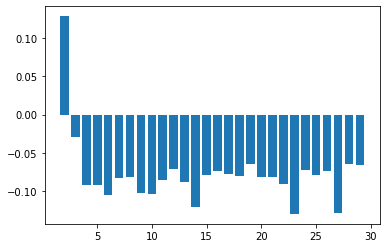

230-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 456ms/step - loss: 0.6893 - val_loss: 0.6782
Epoch 2/100
132/132 [==============================] - 0s 503us/step - loss: 0.6716 - val_loss: 0.6521
Epoch 3/100
132/132 [==============================] - 0s 494us/step - loss: 0.6384 - val_loss: 0.6026
Epoch 4/100
132/132 [==============================] - 0s 490us/step - loss: 0.5772 - val_loss: 0.5183
Epoch 5/100
132/132 [==============================] - 0s 496us/step - loss: 0.4807 - val_loss: 0.3956
Epoch 6/100
132/132 [==============================] - 0s 496us/step - loss: 0.3621 - val_loss: 0.2558
Epoch 7/100
132/132 [==============================] - 0s 497us/step - loss: 0.2574 - val_loss: 0.1469
Epoch 8/100
132/132 [==============================] - 0s 501us/step - loss: 0.1917 - val_loss: 0.0977
Epoch 9/100
132/132 [==============================] - 0s 494us/step - loss: 0.1603 - val_loss: 0.0864
Epoch 10/100
132

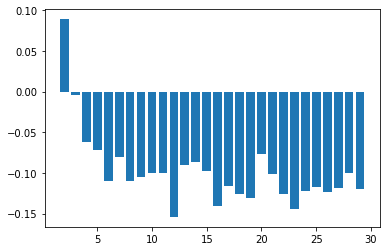

230-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 60s 458ms/step - loss: 0.6895 - val_loss: 0.6800
Epoch 2/100
132/132 [==============================] - 0s 504us/step - loss: 0.6734 - val_loss: 0.6563
Epoch 3/100
132/132 [==============================] - 0s 496us/step - loss: 0.6426 - val_loss: 0.6107
Epoch 4/100
132/132 [==============================] - 0s 489us/step - loss: 0.5839 - val_loss: 0.5322
Epoch 5/100
132/132 [==============================] - 0s 500us/step - loss: 0.4987 - val_loss: 0.4149
Epoch 6/100
132/132 [==============================] - 0s 495us/step - loss: 0.3812 - val_loss: 0.2777
Epoch 7/100
132/132 [==============================] - 0s 508us/step - loss: 0.2649 - val_loss: 0.1632
Epoch 8/100
132/132 [==============================] - 0s 497us/step - loss: 0.1962 - val_loss: 0.1033
Epoch 9/100
132/132 [==============================] - ETA: 0s - loss: 0.181 - 0s 493us/step - loss: 0.1646 - val_loss:

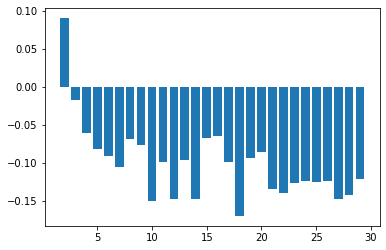

230-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 459ms/step - loss: 0.6907 - val_loss: 0.6830
Epoch 2/100
132/132 [==============================] - 0s 505us/step - loss: 0.6769 - val_loss: 0.6640
Epoch 3/100
132/132 [==============================] - 0s 493us/step - loss: 0.6503 - val_loss: 0.6274
Epoch 4/100
132/132 [==============================] - 0s 490us/step - loss: 0.6043 - val_loss: 0.5629
Epoch 5/100
132/132 [==============================] - 0s 494us/step - loss: 0.5304 - val_loss: 0.4626
Epoch 6/100
132/132 [==============================] - 0s 500us/step - loss: 0.4287 - val_loss: 0.3328
Epoch 7/100
132/132 [==============================] - 0s 500us/step - loss: 0.3173 - val_loss: 0.2065
Epoch 8/100
132/132 [==============================] - 0s 497us/step - loss: 0.2261 - val_loss: 0.1251
Epoch 9/100
132/132 [==============================] - 0s 499us/step - loss: 0.1768 - val_loss: 0.0927
Epoch 10/100
132/

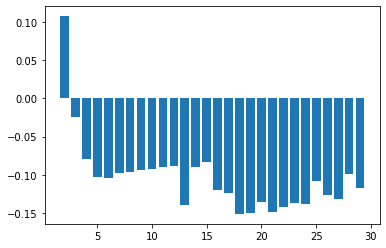

230-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 459ms/step - loss: 0.6907 - val_loss: 0.6820
Epoch 2/100
132/132 [==============================] - 0s 505us/step - loss: 0.6765 - val_loss: 0.6628
Epoch 3/100
132/132 [==============================] - 0s 491us/step - loss: 0.6514 - val_loss: 0.6265
Epoch 4/100
132/132 [==============================] - 0s 501us/step - loss: 0.6039 - val_loss: 0.5632
Epoch 5/100
132/132 [==============================] - 0s 502us/step - loss: 0.5283 - val_loss: 0.4654
Epoch 6/100
132/132 [==============================] - 0s 504us/step - loss: 0.4255 - val_loss: 0.3386
Epoch 7/100
132/132 [==============================] - 0s 502us/step - loss: 0.3167 - val_loss: 0.2130
Epoch 8/100
132/132 [==============================] - 0s 499us/step - loss: 0.2259 - val_loss: 0.1308
Epoch 9/100
132/132 [==============================] - 0s 491us/step - loss: 0.1791 - val_loss: 0.0952
Epoch 10/100
132/

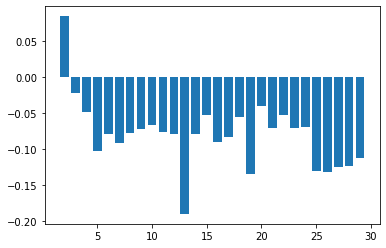

230-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 464ms/step - loss: 0.6899 - val_loss: 0.6805
Epoch 2/100
132/132 [==============================] - 0s 508us/step - loss: 0.6750 - val_loss: 0.6589
Epoch 3/100
132/132 [==============================] - 0s 495us/step - loss: 0.6465 - val_loss: 0.6200
Epoch 4/100
132/132 [==============================] - 0s 504us/step - loss: 0.5988 - val_loss: 0.5555
Epoch 5/100
132/132 [==============================] - 0s 493us/step - loss: 0.5243 - val_loss: 0.4600
Epoch 6/100
132/132 [==============================] - 0s 504us/step - loss: 0.4268 - val_loss: 0.3403
Epoch 7/100
132/132 [==============================] - 0s 499us/step - loss: 0.3218 - val_loss: 0.2219
Epoch 8/100
132/132 [==============================] - 0s 503us/step - loss: 0.2329 - val_loss: 0.1401
Epoch 9/100
132/132 [==============================] - 0s 507us/step - loss: 0.1822 - val_loss: 0.1022
Epoch 10/100
132/

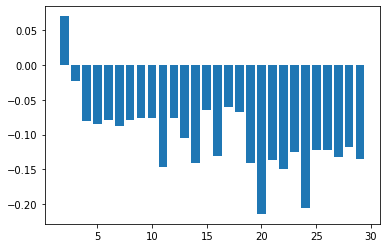

230-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 464ms/step - loss: 0.6899 - val_loss: 0.6828
Epoch 2/100
132/132 [==============================] - 0s 510us/step - loss: 0.6771 - val_loss: 0.6652
Epoch 3/100
132/132 [==============================] - 0s 499us/step - loss: 0.6537 - val_loss: 0.6323
Epoch 4/100
132/132 [==============================] - 0s 498us/step - loss: 0.6121 - val_loss: 0.5759
Epoch 5/100
132/132 [==============================] - 0s 496us/step - loss: 0.5446 - val_loss: 0.4894
Epoch 6/100
132/132 [==============================] - 0s 503us/step - loss: 0.4541 - val_loss: 0.3733
Epoch 7/100
132/132 [==============================] - 0s 503us/step - loss: 0.3461 - val_loss: 0.2488
Epoch 8/100
132/132 [==============================] - 0s 496us/step - loss: 0.2507 - val_loss: 0.1516
Epoch 9/100
132/132 [==============================] - 0s 509us/step - loss: 0.1937 - val_loss: 0.1030
Epoch 10/100
132/

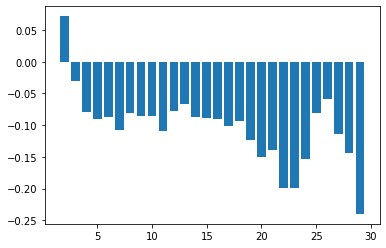

230-50dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 465ms/step - loss: 0.6904 - val_loss: 0.6826
Epoch 2/100
132/132 [==============================] - 0s 514us/step - loss: 0.6774 - val_loss: 0.6642
Epoch 3/100
132/132 [==============================] - 0s 495us/step - loss: 0.6540 - val_loss: 0.6306
Epoch 4/100
132/132 [==============================] - 0s 496us/step - loss: 0.6109 - val_loss: 0.5736
Epoch 5/100
132/132 [==============================] - 0s 497us/step - loss: 0.5473 - val_loss: 0.4871
Epoch 6/100
132/132 [==============================] - 0s 494us/step - loss: 0.4585 - val_loss: 0.3749
Epoch 7/100
132/132 [==============================] - 0s 505us/step - loss: 0.3495 - val_loss: 0.2572
Epoch 8/100
132/132 [==============================] - 0s 503us/step - loss: 0.2524 - val_loss: 0.1620
Epoch 9/100
132/132 [==============================] - 0s 499us/step - loss: 0.1928 - val_loss: 0.1086
Epoch 10/100
132/

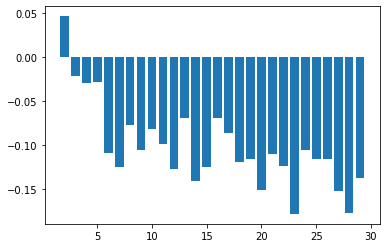

230-40dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 465ms/step - loss: 0.6898 - val_loss: 0.6816
Epoch 2/100
132/132 [==============================] - 0s 510us/step - loss: 0.6759 - val_loss: 0.6620
Epoch 3/100
132/132 [==============================] - 0s 497us/step - loss: 0.6491 - val_loss: 0.6274
Epoch 4/100
132/132 [==============================] - 0s 500us/step - loss: 0.6055 - val_loss: 0.5713
Epoch 5/100
132/132 [==============================] - 0s 497us/step - loss: 0.5393 - val_loss: 0.4900
Epoch 6/100
132/132 [==============================] - 0s 495us/step - loss: 0.4512 - val_loss: 0.3847
Epoch 7/100
132/132 [==============================] - 0s 510us/step - loss: 0.3600 - val_loss: 0.2707
Epoch 8/100
132/132 [==============================] - 0s 501us/step - loss: 0.2663 - val_loss: 0.1788
Epoch 9/100
132/132 [==============================] - 0s 508us/step - loss: 0.2005 - val_loss: 0.1215
Epoch 10/100
132/

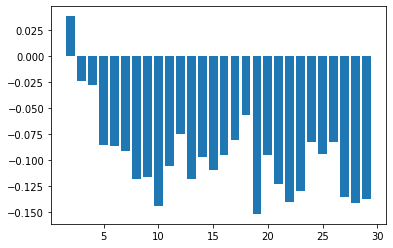

230-30dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 465ms/step - loss: 0.6910 - val_loss: 0.6848
Epoch 2/100
132/132 [==============================] - 0s 504us/step - loss: 0.6806 - val_loss: 0.6708
Epoch 3/100
132/132 [==============================] - 0s 495us/step - loss: 0.6616 - val_loss: 0.6465
Epoch 4/100
132/132 [==============================] - 0s 497us/step - loss: 0.6294 - val_loss: 0.6064
Epoch 5/100
132/132 [==============================] - 0s 504us/step - loss: 0.5799 - val_loss: 0.5455
Epoch 6/100
132/132 [==============================] - 0s 521us/step - loss: 0.5154 - val_loss: 0.4609
Epoch 7/100
132/132 [==============================] - 0s 506us/step - loss: 0.4247 - val_loss: 0.3599
Epoch 8/100
132/132 [==============================] - 0s 516us/step - loss: 0.3372 - val_loss: 0.2543
Epoch 9/100
132/132 [==============================] - 0s 502us/step - loss: 0.2578 - val_loss: 0.1688
Epoch 10/100
132/

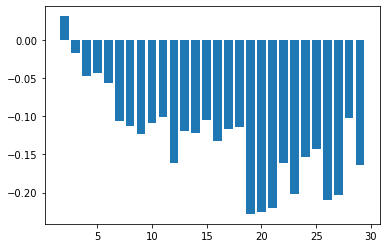

230-20dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 61s 465ms/step - loss: 0.6923 - val_loss: 0.6884
Epoch 2/100
132/132 [==============================] - 0s 516us/step - loss: 0.6859 - val_loss: 0.6801
Epoch 3/100
132/132 [==============================] - 0s 498us/step - loss: 0.6742 - val_loss: 0.6654
Epoch 4/100
132/132 [==============================] - 0s 497us/step - loss: 0.6533 - val_loss: 0.6409
Epoch 5/100
132/132 [==============================] - 0s 496us/step - loss: 0.6212 - val_loss: 0.6026
Epoch 6/100
132/132 [==============================] - 0s 504us/step - loss: 0.5774 - val_loss: 0.5469
Epoch 7/100
132/132 [==============================] - 0s 501us/step - loss: 0.5121 - val_loss: 0.4736
Epoch 8/100
132/132 [==============================] - 0s 508us/step - loss: 0.4369 - val_loss: 0.3826
Epoch 9/100
132/132 [==============================] - 0s 501us/step - loss: 0.3515 - val_loss: 0.2848
Epoch 10/100
132/

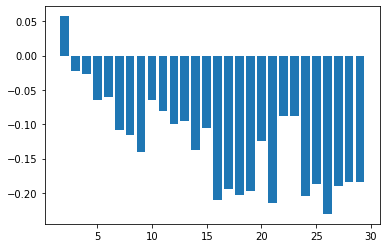

230-10dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 62s 470ms/step - loss: 0.6922 - val_loss: 0.6888
Epoch 2/100
132/132 [==============================] - 0s 513us/step - loss: 0.6864 - val_loss: 0.6811
Epoch 3/100
132/132 [==============================] - 0s 498us/step - loss: 0.6754 - val_loss: 0.6683
Epoch 4/100
132/132 [==============================] - 0s 507us/step - loss: 0.6580 - val_loss: 0.6480
Epoch 5/100
132/132 [==============================] - 0s 508us/step - loss: 0.6305 - val_loss: 0.6181
Epoch 6/100
132/132 [==============================] - 0s 503us/step - loss: 0.5936 - val_loss: 0.5765
Epoch 7/100
132/132 [==============================] - 0s 498us/step - loss: 0.5440 - val_loss: 0.5218
Epoch 8/100
132/132 [==============================] - 0s 500us/step - loss: 0.4836 - val_loss: 0.4548
Epoch 9/100
132/132 [==============================] - 0s 498us/step - loss: 0.4168 - val_loss: 0.3775
Epoch 10/100
132/

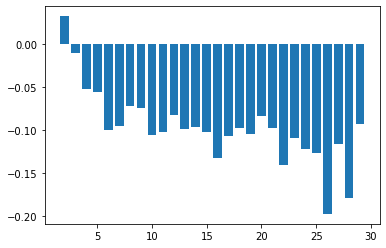

220-210dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 62s 472ms/step - loss: 0.6904 - val_loss: 0.6796
Epoch 2/100
132/132 [==============================] - 0s 515us/step - loss: 0.6723 - val_loss: 0.6504
Epoch 3/100
132/132 [==============================] - 0s 502us/step - loss: 0.6323 - val_loss: 0.5893
Epoch 4/100
132/132 [==============================] - 0s 505us/step - loss: 0.5588 - val_loss: 0.4808
Epoch 5/100
132/132 [==============================] - 0s 682us/step - loss: 0.4484 - val_loss: 0.3304
Epoch 6/100
132/132 [==============================] - 0s 497us/step - loss: 0.3174 - val_loss: 0.1889
Epoch 7/100
132/132 [==============================] - 0s 507us/step - loss: 0.2237 - val_loss: 0.1104
Epoch 8/100
132/132 [==============================] - 0s 502us/step - loss: 0.1801 - val_loss: 0.0902
Epoch 9/100
132/132 [==============================] - 0s 503us/step - loss: 0.1628 - val_loss: 0.0897
Epoch 10/100
132

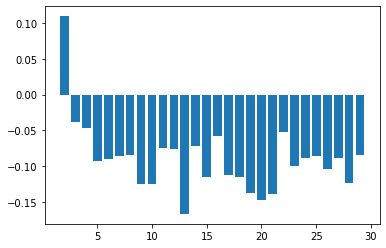

220-200dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 62s 472ms/step - loss: 0.6885 - val_loss: 0.6753
Epoch 2/100
132/132 [==============================] - 0s 519us/step - loss: 0.6665 - val_loss: 0.6405
Epoch 3/100
132/132 [==============================] - 0s 507us/step - loss: 0.6199 - val_loss: 0.5722
Epoch 4/100
132/132 [==============================] - 0s 505us/step - loss: 0.5417 - val_loss: 0.4589
Epoch 5/100
132/132 [==============================] - 0s 506us/step - loss: 0.4203 - val_loss: 0.3103
Epoch 6/100
132/132 [==============================] - 0s 508us/step - loss: 0.2914 - val_loss: 0.1755
Epoch 7/100
132/132 [==============================] - 0s 505us/step - loss: 0.2098 - val_loss: 0.1065
Epoch 8/100
132/132 [==============================] - 0s 507us/step - loss: 0.1724 - val_loss: 0.0920
Epoch 9/100
132/132 [==============================] - 0s 501us/step - loss: 0.1558 - val_loss: 0.0930
(165, 200)


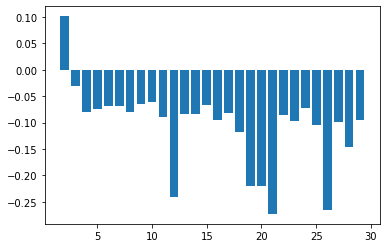

220-190dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 62s 471ms/step - loss: 0.6890 - val_loss: 0.6769
Epoch 2/100
132/132 [==============================] - 0s 522us/step - loss: 0.6681 - val_loss: 0.6446
Epoch 3/100
132/132 [==============================] - 0s 499us/step - loss: 0.6254 - val_loss: 0.5801
Epoch 4/100
132/132 [==============================] - 0s 500us/step - loss: 0.5476 - val_loss: 0.4701
Epoch 5/100
132/132 [==============================] - 0s 509us/step - loss: 0.4308 - val_loss: 0.3220
Epoch 6/100
132/132 [==============================] - 0s 502us/step - loss: 0.3006 - val_loss: 0.1835
Epoch 7/100
132/132 [==============================] - 0s 506us/step - loss: 0.2099 - val_loss: 0.1076
Epoch 8/100
132/132 [==============================] - 0s 506us/step - loss: 0.1672 - val_loss: 0.0881
Epoch 9/100
132/132 [==============================] - 0s 508us/step - loss: 0.1520 - val_loss: 0.0878
Epoch 10/100
132

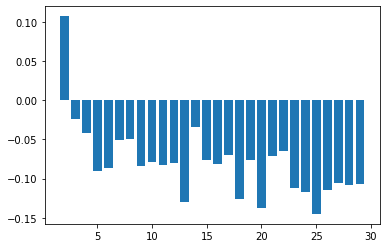

220-180dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 63s 476ms/step - loss: 0.6894 - val_loss: 0.6793
Epoch 2/100
132/132 [==============================] - 0s 517us/step - loss: 0.6716 - val_loss: 0.6520
Epoch 3/100
132/132 [==============================] - 0s 502us/step - loss: 0.6354 - val_loss: 0.5965
Epoch 4/100
132/132 [==============================] - 0s 505us/step - loss: 0.5690 - val_loss: 0.4987
Epoch 5/100
132/132 [==============================] - 0s 500us/step - loss: 0.4597 - val_loss: 0.3586
Epoch 6/100
132/132 [==============================] - 0s 504us/step - loss: 0.3396 - val_loss: 0.2126
Epoch 7/100
132/132 [==============================] - 0s 503us/step - loss: 0.2350 - val_loss: 0.1219
Epoch 8/100
132/132 [==============================] - 0s 506us/step - loss: 0.1826 - val_loss: 0.0913
Epoch 9/100
132/132 [==============================] - 0s 505us/step - loss: 0.1569 - val_loss: 0.0878
Epoch 10/100
132

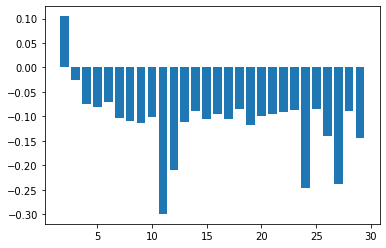

220-170dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 63s 479ms/step - loss: 0.6895 - val_loss: 0.6785
Epoch 2/100
132/132 [==============================] - 0s 512us/step - loss: 0.6716 - val_loss: 0.6502
Epoch 3/100
132/132 [==============================] - 0s 506us/step - loss: 0.6338 - val_loss: 0.5936
Epoch 4/100
132/132 [==============================] - 0s 510us/step - loss: 0.5668 - val_loss: 0.4945
Epoch 5/100
132/132 [==============================] - 0s 505us/step - loss: 0.4662 - val_loss: 0.3539
Epoch 6/100
132/132 [==============================] - 0s 510us/step - loss: 0.3425 - val_loss: 0.2117
Epoch 7/100
132/132 [==============================] - 0s 504us/step - loss: 0.2332 - val_loss: 0.1230
Epoch 8/100
132/132 [==============================] - 0s 514us/step - loss: 0.1898 - val_loss: 0.0903
Epoch 9/100
132/132 [==============================] - 0s 503us/step - loss: 0.1662 - val_loss: 0.0875
Epoch 10/100
132

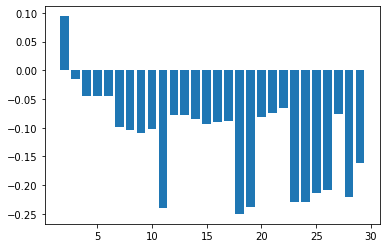

220-160dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 63s 477ms/step - loss: 0.6897 - val_loss: 0.6789
Epoch 2/100
132/132 [==============================] - 0s 522us/step - loss: 0.6720 - val_loss: 0.6509
Epoch 3/100
132/132 [==============================] - 0s 505us/step - loss: 0.6370 - val_loss: 0.5960
Epoch 4/100
132/132 [==============================] - 0s 506us/step - loss: 0.5708 - val_loss: 0.5014
Epoch 5/100
132/132 [==============================] - 0s 506us/step - loss: 0.4629 - val_loss: 0.3674
Epoch 6/100
132/132 [==============================] - 0s 508us/step - loss: 0.3364 - val_loss: 0.2251
Epoch 7/100
132/132 [==============================] - 0s 502us/step - loss: 0.2393 - val_loss: 0.1290
Epoch 8/100
132/132 [==============================] - 0s 512us/step - loss: 0.1830 - val_loss: 0.0960
Epoch 9/100
132/132 [==============================] - 0s 519us/step - loss: 0.1595 - val_loss: 0.0922
Epoch 10/100
132

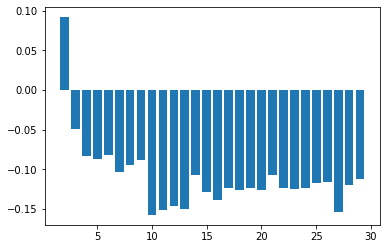

220-150dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 63s 477ms/step - loss: 0.6916 - val_loss: 0.6834
Epoch 2/100
132/132 [==============================] - 0s 520us/step - loss: 0.6780 - val_loss: 0.6637
Epoch 3/100
132/132 [==============================] - 0s 511us/step - loss: 0.6515 - val_loss: 0.6243
Epoch 4/100
132/132 [==============================] - 0s 507us/step - loss: 0.6016 - val_loss: 0.5521
Epoch 5/100
132/132 [==============================] - 0s 504us/step - loss: 0.5168 - val_loss: 0.4379
Epoch 6/100
132/132 [==============================] - 0s 583us/step - loss: 0.4005 - val_loss: 0.2932
Epoch 7/100
132/132 [==============================] - 0s 504us/step - loss: 0.2818 - val_loss: 0.1683
Epoch 8/100
132/132 [==============================] - 0s 507us/step - loss: 0.2057 - val_loss: 0.1050
Epoch 9/100
132/132 [==============================] - 0s 520us/step - loss: 0.1663 - val_loss: 0.0895
Epoch 10/100
132

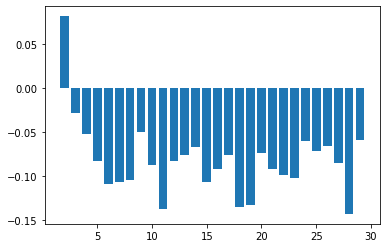

220-140dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 64s 482ms/step - loss: 0.6900 - val_loss: 0.6813
Epoch 2/100
132/132 [==============================] - 0s 518us/step - loss: 0.6744 - val_loss: 0.6583
Epoch 3/100
132/132 [==============================] - 0s 510us/step - loss: 0.6439 - val_loss: 0.6119
Epoch 4/100
132/132 [==============================] - 0s 510us/step - loss: 0.5866 - val_loss: 0.5282
Epoch 5/100
132/132 [==============================] - 0s 506us/step - loss: 0.4959 - val_loss: 0.4022
Epoch 6/100
132/132 [==============================] - 0s 512us/step - loss: 0.3722 - val_loss: 0.2577
Epoch 7/100
132/132 [==============================] - 0s 510us/step - loss: 0.2642 - val_loss: 0.1442
Epoch 8/100
132/132 [==============================] - 0s 511us/step - loss: 0.1940 - val_loss: 0.0945
Epoch 9/100
132/132 [==============================] - 0s 510us/step - loss: 0.1672 - val_loss: 0.0849
Epoch 10/100
132

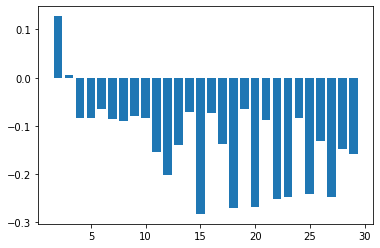

220-130dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 64s 483ms/step - loss: 0.6894 - val_loss: 0.6785
Epoch 2/100
132/132 [==============================] - 0s 520us/step - loss: 0.6719 - val_loss: 0.6520
Epoch 3/100
132/132 [==============================] - 0s 522us/step - loss: 0.6381 - val_loss: 0.6022
Epoch 4/100
132/132 [==============================] - 0s 512us/step - loss: 0.5764 - val_loss: 0.5182
Epoch 5/100
132/132 [==============================] - 0s 511us/step - loss: 0.4910 - val_loss: 0.3963
Epoch 6/100
132/132 [==============================] - 0s 506us/step - loss: 0.3692 - val_loss: 0.2603
Epoch 7/100
132/132 [==============================] - 0s 506us/step - loss: 0.2577 - val_loss: 0.1522
Epoch 8/100
132/132 [==============================] - 0s 504us/step - loss: 0.1948 - val_loss: 0.1005
Epoch 9/100
132/132 [==============================] - 0s 517us/step - loss: 0.1652 - val_loss: 0.0887
Epoch 10/100
132

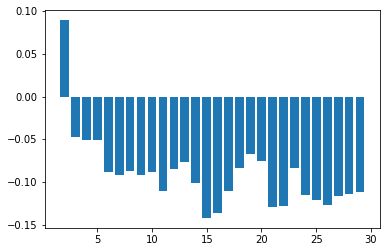

220-120dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 64s 484ms/step - loss: 0.6896 - val_loss: 0.6795
Epoch 2/100
132/132 [==============================] - 0s 526us/step - loss: 0.6731 - val_loss: 0.6547
Epoch 3/100
132/132 [==============================] - 0s 517us/step - loss: 0.6407 - val_loss: 0.6077
Epoch 4/100
132/132 [==============================] - 0s 578us/step - loss: 0.5833 - val_loss: 0.5275
Epoch 5/100
132/132 [==============================] - 0s 515us/step - loss: 0.4931 - val_loss: 0.4099
Epoch 6/100
132/132 [==============================] - 0s 513us/step - loss: 0.3813 - val_loss: 0.2725
Epoch 7/100
132/132 [==============================] - 0s 512us/step - loss: 0.2639 - val_loss: 0.1617
Epoch 8/100
132/132 [==============================] - 0s 515us/step - loss: 0.1915 - val_loss: 0.1051
Epoch 9/100
132/132 [==============================] - 0s 518us/step - loss: 0.1593 - val_loss: 0.0896
Epoch 10/100
132

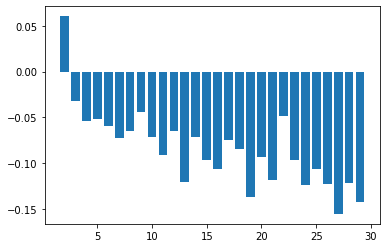

220-110dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 64s 484ms/step - loss: 0.6910 - val_loss: 0.6818
Epoch 2/100
132/132 [==============================] - 0s 539us/step - loss: 0.6765 - val_loss: 0.6603
Epoch 3/100
132/132 [==============================] - 0s 516us/step - loss: 0.6483 - val_loss: 0.6181
Epoch 4/100
132/132 [==============================] - 0s 519us/step - loss: 0.5952 - val_loss: 0.5430
Epoch 5/100
132/132 [==============================] - 0s 514us/step - loss: 0.5115 - val_loss: 0.4280
Epoch 6/100
132/132 [==============================] - 0s 516us/step - loss: 0.3972 - val_loss: 0.2878
Epoch 7/100
132/132 [==============================] - 0s 518us/step - loss: 0.2781 - val_loss: 0.1664
Epoch 8/100
132/132 [==============================] - 0s 513us/step - loss: 0.1958 - val_loss: 0.1021
Epoch 9/100
132/132 [==============================] - 0s 509us/step - loss: 0.1633 - val_loss: 0.0843
Epoch 10/100
132

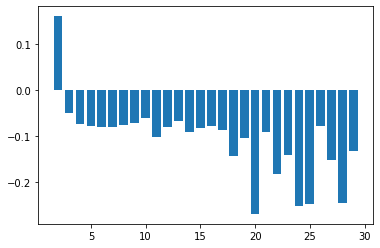

220-100dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 64s 485ms/step - loss: 0.6910 - val_loss: 0.6836
Epoch 2/100
132/132 [==============================] - 0s 524us/step - loss: 0.6783 - val_loss: 0.6659
Epoch 3/100
132/132 [==============================] - 0s 505us/step - loss: 0.6543 - val_loss: 0.6320
Epoch 4/100
132/132 [==============================] - 0s 512us/step - loss: 0.6118 - val_loss: 0.5714
Epoch 5/100
132/132 [==============================] - 0s 515us/step - loss: 0.5388 - val_loss: 0.4762
Epoch 6/100
132/132 [==============================] - 0s 518us/step - loss: 0.4407 - val_loss: 0.3479
Epoch 7/100
132/132 [==============================] - 0s 511us/step - loss: 0.3231 - val_loss: 0.2178
Epoch 8/100
132/132 [==============================] - 0s 510us/step - loss: 0.2316 - val_loss: 0.1300
Epoch 9/100
132/132 [==============================] - 0s 518us/step - loss: 0.1802 - val_loss: 0.0949
Epoch 10/100
132

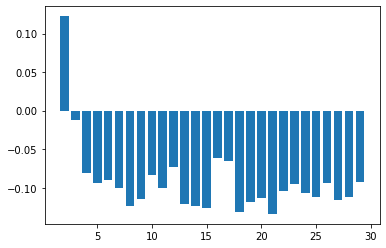

220-90dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 65s 491ms/step - loss: 0.6907 - val_loss: 0.6822
Epoch 2/100
132/132 [==============================] - 0s 532us/step - loss: 0.6763 - val_loss: 0.6619
Epoch 3/100
132/132 [==============================] - 0s 510us/step - loss: 0.6498 - val_loss: 0.6233
Epoch 4/100
132/132 [==============================] - 0s 514us/step - loss: 0.6006 - val_loss: 0.5560
Epoch 5/100
132/132 [==============================] - 0s 509us/step - loss: 0.5229 - val_loss: 0.4533
Epoch 6/100
132/132 [==============================] - 0s 519us/step - loss: 0.4231 - val_loss: 0.3234
Epoch 7/100
132/132 [==============================] - 0s 507us/step - loss: 0.3074 - val_loss: 0.2018
Epoch 8/100
132/132 [==============================] - 0s 510us/step - loss: 0.2268 - val_loss: 0.1235
Epoch 9/100
132/132 [==============================] - 0s 514us/step - loss: 0.1764 - val_loss: 0.0951
Epoch 10/100
132/

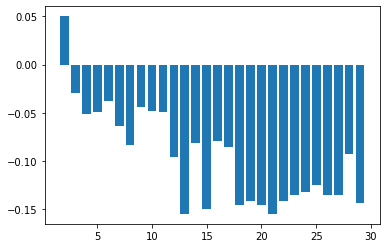

220-80dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 65s 490ms/step - loss: 0.6901 - val_loss: 0.6814
Epoch 2/100
132/132 [==============================] - 0s 532us/step - loss: 0.6757 - val_loss: 0.6607
Epoch 3/100
132/132 [==============================] - 0s 514us/step - loss: 0.6489 - val_loss: 0.6224
Epoch 4/100
132/132 [==============================] - 0s 523us/step - loss: 0.6022 - val_loss: 0.5577
Epoch 5/100
132/132 [==============================] - 0s 521us/step - loss: 0.5295 - val_loss: 0.4602
Epoch 6/100
132/132 [==============================] - 0s 512us/step - loss: 0.4303 - val_loss: 0.3362
Epoch 7/100
132/132 [==============================] - 0s 534us/step - loss: 0.3234 - val_loss: 0.2136
Epoch 8/100
132/132 [==============================] - 0s 526us/step - loss: 0.2314 - val_loss: 0.1312
Epoch 9/100
132/132 [==============================] - 0s 517us/step - loss: 0.1795 - val_loss: 0.0965
Epoch 10/100
132/

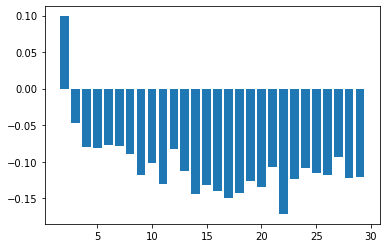

220-70dim
Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 68s 512ms/step - loss: 0.6900 - val_loss: 0.6819
Epoch 2/100
132/132 [==============================] - 0s 693us/step - loss: 0.6768 - val_loss: 0.6624
Epoch 3/100
132/132 [==============================] - 0s 523us/step - loss: 0.6512 - val_loss: 0.6258
Epoch 4/100
132/132 [==============================] - 0s 581us/step - loss: 0.6075 - val_loss: 0.5623
Epoch 5/100
132/132 [==============================] - 0s 513us/step - loss: 0.5361 - val_loss: 0.4653
Epoch 6/100
132/132 [==============================] - 0s 517us/step - loss: 0.4322 - val_loss: 0.3410
Epoch 7/100
132/132 [==============================] - 0s 522us/step - loss: 0.3203 - val_loss: 0.2153
Epoch 8/100
132/132 [==============================] - 0s 532us/step - loss: 0.2313 - val_loss: 0.1288
Epoch 9/100
132/132 [==============================] - 0s 534us/step - loss: 0.1764 - val_loss: 0.0942
Epoch 10/100
132/

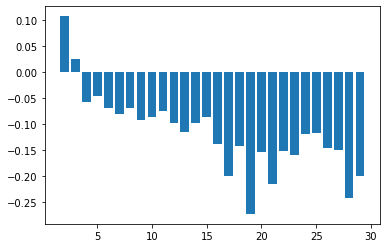

220-60dim
Train on 132 samples, validate on 33 samples
Epoch 1/100


KeyboardInterrupt: 

In [11]:
# Grid search
for middle_dim in search_list:
    for encoding_dim in search_list[search_list.index(middle_dim) + 1:]:
        training(middle_dim, encoding_dim)

# Silhouette Score 

In [ ]:
ls = os.listdir('./score/grid/')
ls.sort()
ls

In [ ]:
# del ls[0]
# ls

In [ ]:
rows = []
for file in ls:
    name = file.split('.')[0]
    score = read_json('./score/' + file)
    rows.append([name] + score)

In [ ]:
score_df = pd.DataFrame(rows, columns = range(1, 30))
score_df

In [ ]:
score_df.to_csv('./output/score_df_grid.csv', index = 0)